Found 6240 images belonging to 39 classes.
Found 1560 images belonging to 39 classes.
Class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5, 'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8, 'Corn___Common_rust': 9, 'Corn___Northern_Leaf_Blight': 10, 'Corn___healthy': 11, 'Grape___Black_rot': 12, 'Grape___Esca_(Black_Measles)': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Grape___healthy': 15, 'Orange___Haunglongbing_(Citrus_greening)': 16, 'Peach___Bacterial_spot': 17, 'Peach___healthy': 18, 'Pepper,_bell___Bacterial_spot': 19, 'Pepper,_bell___healthy': 20, 'Potato___Early_blight': 21, 'Potato___Late_blight': 22, 'Potato___healthy': 23, 'Raspberry___healthy': 24, 'Soybean___healthy': 25, 'Squash___Powdery_mildew': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28, 'Tomato___Bacterial_spot': 2

Epoch 1/10
195/195 [==============================] - ETA: 0s - loss: 1.5902 - accuracy: 0.5609

C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


195/195 [==============================] - 197s 1s/step - loss: 1.5902 - accuracy: 0.5609 - val_loss: 0.5413 - val_accuracy: 0.8359
Epoch 2/10
195/195 [==============================] - 171s 877ms/step - loss: 0.6526 - accuracy: 0.7981 - val_loss: 0.3768 - val_accuracy: 0.8737
Epoch 3/10
195/195 [==============================] - 175s 898ms/step - loss: 0.5078 - accuracy: 0.8377 - val_loss: 0.3416 - val_accuracy: 0.8859
Epoch 4/10
195/195 [==============================] - 180s 923ms/step - loss: 0.4441 - accuracy: 0.8538 - val_loss: 0.2624 - val_accuracy: 0.9160
Epoch 5/10
195/195 [==============================] - 184s 943ms/step - loss: 0.4032 - accuracy: 0.8696 - val_loss: 0.2307 - val_accuracy: 0.9256
Epoch 6/10
195/195 [==============================] - 181s 930ms/step - loss: 0.3519 - accuracy: 0.8835 - val_loss: 0.2504 - val_accuracy: 0.9205
Epoch 7/10
195/195 [==============================] - 186s 953ms/step - loss: 0.3195 - accuracy: 0.8947 - val_loss: 0.2484 - val_accuracy:

Epoch 10/20
195/195 [==============================] - 197s 997ms/step - loss: 0.5949 - accuracy: 0.8250 - val_loss: 2.6069 - val_accuracy: 0.5083
Epoch 11/20
195/195 [==============================] - 197s 1s/step - loss: 0.3521 - accuracy: 0.8870 - val_loss: 1.9967 - val_accuracy: 0.6205
Epoch 12/20
195/195 [==============================] - 202s 1s/step - loss: 0.3151 - accuracy: 0.9042 - val_loss: 2.3953 - val_accuracy: 0.6038
Epoch 13/20
195/195 [==============================] - 200s 1s/step - loss: 0.2704 - accuracy: 0.9146 - val_loss: 1.3043 - val_accuracy: 0.6987
Epoch 14/20
195/195 [==============================] - 201s 1s/step - loss: 0.2368 - accuracy: 0.9250 - val_loss: 1.8903 - val_accuracy: 0.6429
Epoch 15/20
195/195 [==============================] - 189s 968ms/step - loss: 0.2258 - accuracy: 0.9290 - val_loss: 2.5238 - val_accuracy: 0.6026
Epoch 16/20
195/195 [==============================] - 212s 1s/step - loss: 0.2138 - accuracy: 0.9324 - val_loss: 0.8305 - val_acc

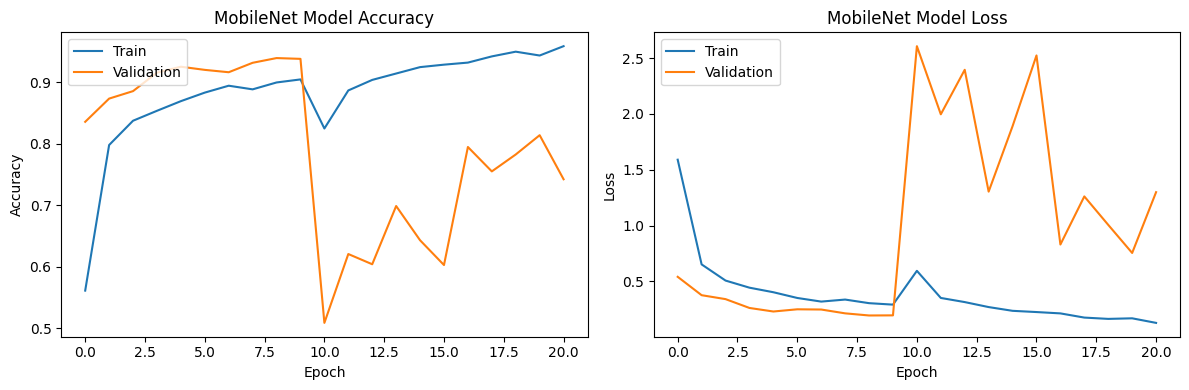

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set the paths to your train and test directories
train_dir = 'Leaf-Dataset/train'  
test_dir = 'Leaf-Dataset/test'    

# Image dimensions
img_height, img_width = 224, 224  # MobileNet default input size

# Batch size
batch_size = 32

# Number of classes
num_classes = 39  # 38 diseases + 1 unknown class

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocess images as per MobileNet requirements
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing for validation/test data
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Generators for reading images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the class indices for label mapping
class_indices = train_generator.class_indices
print("Class indices:", class_indices)

# Build the model using transfer learning with MobileNet
def build_mobilenet_model():
    # Load the MobileNet model with pre-trained weights, excluding the top classification layer
    base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_height, img_width, 3)))
    
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    # Create the full model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

mobilenet_model = build_mobilenet_model()

# Compile the model
mobilenet_model.compile(optimizer=Adam(lr=1e-4),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('MobileNetModel_best.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = mobilenet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Fine-tuning
for layer in mobilenet_model.layers[:75]:
    layer.trainable = False
for layer in mobilenet_model.layers[75:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate
mobilenet_model.compile(optimizer=Adam(lr=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Continue training
fine_tune_epochs = 10
total_epochs = len(history.history['accuracy']) + fine_tune_epochs

history_fine = mobilenet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=total_epochs,
    initial_epoch=history.epoch[-1],
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Save the final model
mobilenet_model.save('MobileNetModel_final.h5')

# Combine history for plotting
def combine_history(h1, h2):
    history = {}
    for key in h1.history.keys():
        history[key] = h1.history[key] + h2.history[key]
    return history

combined_history = combine_history(history, history_fine)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(combined_history['accuracy'])
plt.plot(combined_history['val_accuracy'])
plt.title('MobileNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(combined_history['loss'])
plt.plot(combined_history['val_loss'])
plt.title('MobileNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Found 6240 images belonging to 39 classes.
Found 1560 images belonging to 39 classes.


Epoch 1/10
195/195 [==============================] - 947s 5s/step - loss: 2.8827 - accuracy: 0.3415 - val_loss: 0.9723 - val_accuracy: 0.6885
Epoch 2/10


C:\Users\0860\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


195/195 [==============================] - 902s 5s/step - loss: 1.2941 - accuracy: 0.6079 - val_loss: 0.7108 - val_accuracy: 0.7679
Epoch 3/10
195/195 [==============================] - 856s 4s/step - loss: 1.0095 - accuracy: 0.6941 - val_loss: 0.5134 - val_accuracy: 0.8404
Epoch 4/10
195/195 [==============================] - 805s 4s/step - loss: 0.8595 - accuracy: 0.7274 - val_loss: 0.4717 - val_accuracy: 0.8397
Epoch 5/10
195/195 [==============================] - 804s 4s/step - loss: 0.7470 - accuracy: 0.7694 - val_loss: 0.4547 - val_accuracy: 0.8455
Epoch 6/10
195/195 [==============================] - 804s 4s/step - loss: 0.7066 - accuracy: 0.7723 - val_loss: 0.4412 - val_accuracy: 0.8590
Epoch 7/10
195/195 [==============================] - 804s 4s/step - loss: 0.6726 - accuracy: 0.7869 - val_loss: 0.4338 - val_accuracy: 0.8577
Epoch 8/10
195/195 [==============================] - 804s 4s/step - loss: 0.6293 - accuracy: 0.7952 - val_loss: 0.3581 - val_accuracy: 0.8808
Epoch 9/10

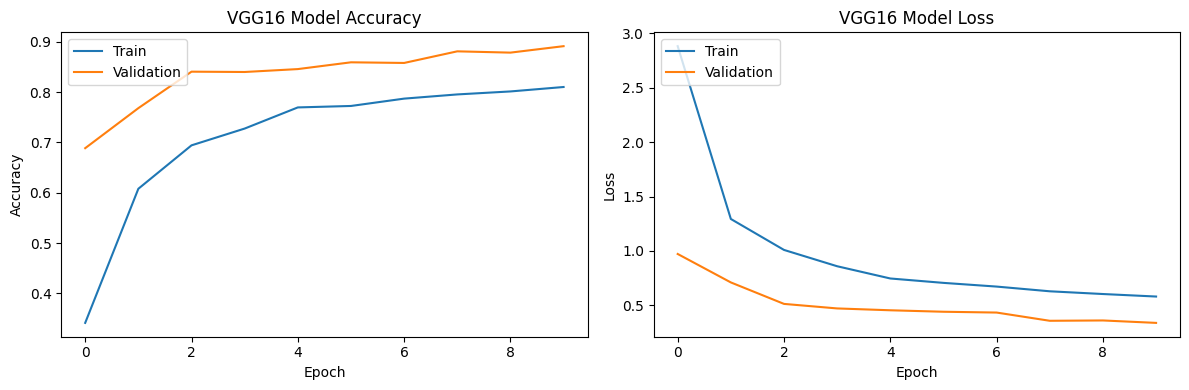

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set the paths to your train and test directories
train_dir = 'Leaf-Dataset/train'  
test_dir = 'Leaf-Dataset/test'    

# Image dimensions
img_height, img_width = 224, 224  # Input size for VGG

# Batch size
batch_size = 32

# Number of classes
num_classes = 39  # 38 diseases + 1 unknown class

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing for validation/test data
test_datagen = ImageDataGenerator()

# Generators for reading images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# VGG16 Model
def build_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_height, img_width, 3)))
    
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    # Create the full model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Build VGG16 model
model = build_vgg16_model()

# Compile the model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('VGG16Model_best.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the final model
model.save('VGG16Model_final.h5')

Found 6240 images belonging to 39 classes.
Found 1560 images belonging to 39 classes.


Epoch 1/10
195/195 [==============================] - 1013s 5s/step - loss: 2.7564 - accuracy: 0.3606 - val_loss: 0.9695 - val_accuracy: 0.7026
Epoch 2/10
195/195 [==============================] - 1011s 5s/step - loss: 1.2720 - accuracy: 0.6143 - val_loss: 0.6074 - val_accuracy: 0.7981
Epoch 3/10
195/195 [==============================] - 1011s 5s/step - loss: 0.9885 - accuracy: 0.6936 - val_loss: 0.4729 - val_accuracy: 0.8455
Epoch 4/10
195/195 [==============================] - 1011s 5s/step - loss: 0.8525 - accuracy: 0.7303 - val_loss: 0.4619 - val_accuracy: 0.8429
Epoch 5/10
195/195 [==============================] - 1010s 5s/step - loss: 0.7559 - accuracy: 0.7619 - val_loss: 0.4750 - val_accuracy: 0.8449
Epoch 6/10
195/195 [==============================] - 1011s 5s/step - loss: 0.6789 - accuracy: 0.7840 - val_loss: 0.4241 - val_accuracy: 0.8571
Epoch 7/10
195/195 [==============================] - 1011s 5s/step - loss: 0.6361 - accuracy: 0.7954 - val_loss: 0.3601 - val_accuracy:

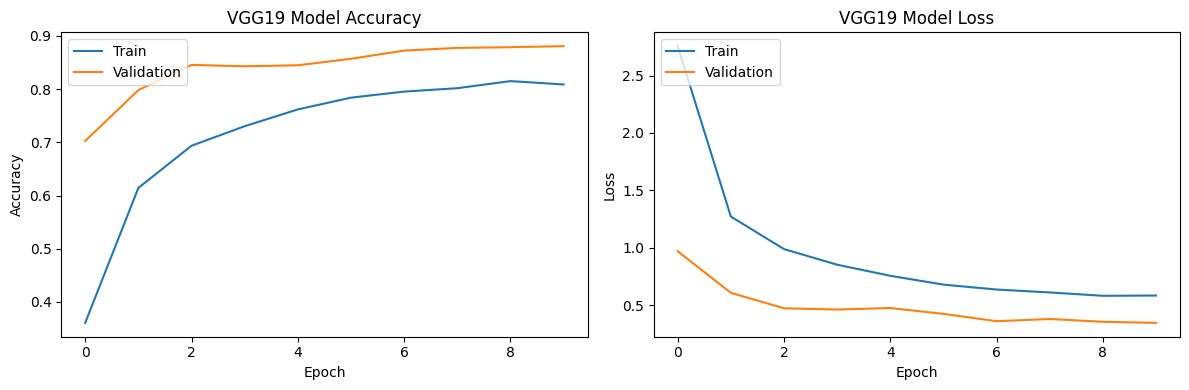

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set the paths to your train and test directories
train_dir = 'Leaf-Dataset/train'  
test_dir = 'Leaf-Dataset/test'    

# Image dimensions
img_height, img_width = 224, 224  # Input size for VGG

# Batch size
batch_size = 32

# Number of classes
num_classes = 39  # 38 diseases + 1 unknown class

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing for validation/test data
test_datagen = ImageDataGenerator()

# Generators for reading images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# VGG19 Model
def build_vgg19_model():
    base_model = VGG19(weights='imagenet', include_top=False, input_tensor=Input(shape=(img_height, img_width, 3)))
    
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    
    # Create the full model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Build VGG19 model
model = build_vgg19_model()

# Compile the model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('VGG19Model_best.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG19 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG19 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the final model
model.save('VGG19Model_final.h5')

Found 6240 images belonging to 39 classes.
Found 1560 images belonging to 39 classes.


Epoch 1/10
195/195 [==============================] - 294s 1s/step - loss: 16.4767 - accuracy: 0.0614 - val_loss: 3.4729 - val_accuracy: 0.0718
Epoch 2/10
195/195 [==============================] - 291s 1s/step - loss: 3.5247 - accuracy: 0.0688 - val_loss: 3.4635 - val_accuracy: 0.0795
Epoch 3/10
195/195 [==============================] - 292s 1s/step - loss: 3.4718 - accuracy: 0.0699 - val_loss: 3.4760 - val_accuracy: 0.0756
Epoch 4/10
195/195 [==============================] - 291s 1s/step - loss: 3.4538 - accuracy: 0.0728 - val_loss: 3.4566 - val_accuracy: 0.0763
Epoch 5/10
195/195 [==============================] - 293s 1s/step - loss: 3.4658 - accuracy: 0.0696 - val_loss: 3.4521 - val_accuracy: 0.0705
Epoch 6/10
195/195 [==============================] - 292s 1s/step - loss: 3.4146 - accuracy: 0.0780 - val_loss: 3.3642 - val_accuracy: 0.0897
Epoch 7/10
195/195 [==============================] - 293s 1s/step - loss: 3.4231 - accuracy: 0.0787 - val_loss: 3.3300 - val_accuracy: 0.103

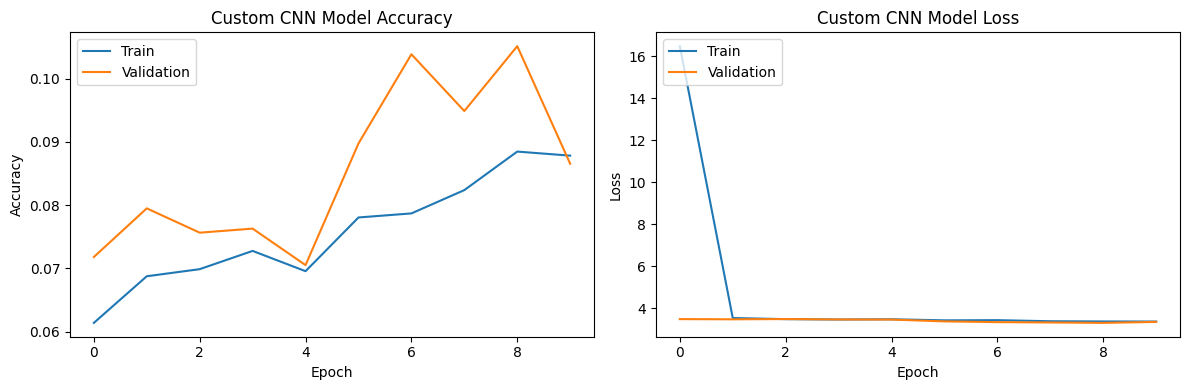

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set the paths to your train and test directories
train_dir = 'Leaf-Dataset/train'  
test_dir = 'Leaf-Dataset/test'    

# Image dimensions
img_height, img_width = 224, 224  # Input size for custom CNN

# Batch size
batch_size = 32

# Number of classes
num_classes = 39  # 38 diseases + 1 unknown class

# Data augmentation and preprocessing for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing for validation/test data
test_datagen = ImageDataGenerator()

# Generators for reading images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Custom CNN Model
def build_custom_cnn_model():
    model = Sequential()

    # Add layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Build custom CNN model
model = build_custom_cnn_model()

# Compile the model
model.compile(optimizer=Adam(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('CustomCNNModel_best.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Custom CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custom CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Save the final model
model.save('CustomCNNModel_final.h5')


In [14]:
import os
import numpy as np
from tqdm import tqdm
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Set the paths to your train and test directories
data_dir = 'New_dataset'  

# Image dimensions
img_height, img_width = 224, 224  # MobileNetV2 default input size

# Number of classes
num_classes = 39  # 38 diseases + 1 unknown class


In [16]:
# Initialize MobileNetV2 model for feature extraction
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(img_height, img_width, 3))

# Get the list of class names
classes = sorted(os.listdir(data_dir))

# Initialize lists to hold features and labels
features = []
labels = []

# Loop over each class directory
for cls in classes:
    class_dir = os.path.join(data_dir, cls)
    if not os.path.isdir(class_dir):
        continue
    print(f"Processing class '{cls}'")
    image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    for img_path in tqdm(image_files):
        # Load image and preprocess
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        
        # Extract features
        feature = base_model.predict(img_array)
        features.append(feature.flatten())
        labels.append(cls)

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)


Processing class 'Apple___Apple_scab'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  0%|          | 1/200 [00:01<03:40,  1.11s/it]

1/1 [==============================] - 0s 46ms/step


  1%|          | 2/200 [00:01<01:42,  1.94it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 4/200 [00:01<00:49,  3.96it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 6/200 [00:01<00:34,  5.62it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 8/200 [00:01<00:27,  6.90it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 10/200 [00:01<00:24,  7.87it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 12/200 [00:02<00:21,  8.60it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 14/200 [00:02<00:20,  9.27it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 16/200 [00:02<00:19,  9.63it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 18/200 [00:02<00:18,  9.90it/s]

1/1 [==============================] - 0s 52ms/step


 10%|█         | 20/200 [00:02<00:18,  9.85it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 22/200 [00:03<00:17, 10.16it/s]

1/1 [==============================] - 0s 45ms/step


 12%|█▏        | 24/200 [00:03<00:17, 10.28it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 26/200 [00:03<00:16, 10.39it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 28/200 [00:03<00:16, 10.39it/s]

1/1 [==============================] - 0s 45ms/step


 15%|█▌        | 30/200 [00:03<00:16, 10.39it/s]

1/1 [==============================] - 0s 44ms/step


 16%|█▌        | 32/200 [00:04<00:15, 10.52it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 34/200 [00:04<00:15, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 36/200 [00:04<00:15, 10.61it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 38/200 [00:04<00:15, 10.52it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 40/200 [00:04<00:15, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 21%|██        | 42/200 [00:05<00:14, 10.56it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 44/200 [00:05<00:14, 10.65it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 46/200 [00:05<00:14, 10.60it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 48/200 [00:05<00:14, 10.47it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 50/200 [00:05<00:14, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 52/200 [00:05<00:13, 10.67it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 54/200 [00:06<00:13, 10.64it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 56/200 [00:06<00:13, 10.50it/s]

1/1 [==============================] - 0s 44ms/step


 29%|██▉       | 58/200 [00:06<00:13, 10.53it/s]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 60/200 [00:06<00:13, 10.59it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 62/200 [00:06<00:13, 10.61it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 64/200 [00:07<00:12, 10.54it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 66/200 [00:07<00:12, 10.46it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 68/200 [00:07<00:12, 10.62it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▌      | 70/200 [00:07<00:12, 10.59it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▌      | 72/200 [00:07<00:12, 10.54it/s]

1/1 [==============================] - 0s 44ms/step


 37%|███▋      | 74/200 [00:08<00:12, 10.50it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 76/200 [00:08<00:11, 10.60it/s]

1/1 [==============================] - 0s 44ms/step


 39%|███▉      | 78/200 [00:08<00:11, 10.57it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 80/200 [00:08<00:11, 10.50it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 82/200 [00:08<00:11, 10.48it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 84/200 [00:08<00:11, 10.42it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 86/200 [00:09<00:10, 10.54it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 88/200 [00:09<00:10, 10.55it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 90/200 [00:09<00:10, 10.53it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 92/200 [00:09<00:10, 10.42it/s]

1/1 [==============================] - 0s 43ms/step


 47%|████▋     | 94/200 [00:09<00:10, 10.46it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 96/200 [00:10<00:09, 10.57it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 98/200 [00:10<00:09, 10.52it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 100/200 [00:10<00:09, 10.51it/s]

1/1 [==============================] - 0s 42ms/step


 51%|█████     | 102/200 [00:10<00:09, 10.56it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 104/200 [00:10<00:09, 10.54it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 106/200 [00:11<00:08, 10.53it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 108/200 [00:11<00:09,  9.37it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 110/200 [00:11<00:09,  9.68it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▌    | 112/200 [00:11<00:08,  9.91it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 114/200 [00:11<00:08, 10.11it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 116/200 [00:12<00:08, 10.34it/s]

1/1 [==============================] - 0s 44ms/step


 59%|█████▉    | 118/200 [00:12<00:07, 10.35it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 120/200 [00:12<00:07, 10.36it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 122/200 [00:12<00:07, 10.54it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 124/200 [00:12<00:07, 10.54it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 126/200 [00:13<00:07, 10.54it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 128/200 [00:13<00:06, 10.51it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 130/200 [00:13<00:06, 10.63it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 132/200 [00:13<00:06, 10.57it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 134/200 [00:13<00:06, 10.55it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 136/200 [00:13<00:06, 10.62it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 138/200 [00:14<00:05, 10.53it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 140/200 [00:14<00:05, 10.59it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 142/200 [00:14<00:05, 10.63it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 144/200 [00:14<00:05, 10.59it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 146/200 [00:14<00:05, 10.43it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 148/200 [00:15<00:04, 10.52it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 150/200 [00:15<00:04, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 152/200 [00:15<00:04, 10.52it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 154/200 [00:15<00:04, 10.51it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 156/200 [00:15<00:04, 10.48it/s]

1/1 [==============================] - 0s 45ms/step


 79%|███████▉  | 158/200 [00:16<00:03, 10.53it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 160/200 [00:16<00:03, 10.49it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 162/200 [00:16<00:03, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 164/200 [00:16<00:03, 10.42it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 166/200 [00:16<00:03, 10.56it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 168/200 [00:17<00:03, 10.59it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 170/200 [00:17<00:02, 10.60it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 172/200 [00:17<00:02, 10.58it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 174/200 [00:17<00:02, 10.59it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 176/200 [00:17<00:02, 10.60it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 178/200 [00:17<00:02, 10.35it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 180/200 [00:18<00:01, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 182/200 [00:18<00:01, 10.32it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 184/200 [00:18<00:01, 10.46it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 186/200 [00:18<00:01, 10.55it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 188/200 [00:18<00:01, 10.55it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 190/200 [00:19<00:00, 10.59it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 192/200 [00:19<00:00, 10.58it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 194/200 [00:19<00:00, 10.60it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 196/200 [00:19<00:00, 10.57it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 198/200 [00:19<00:00, 10.60it/s]

1/1 [==============================] - 0s 45ms/step


100%|██████████| 200/200 [00:20<00:00,  9.96it/s]


Processing class 'Apple___Black_rot'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 2/200 [00:00<00:18, 10.50it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 4/200 [00:00<00:18, 10.53it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 6/200 [00:00<00:18, 10.44it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 8/200 [00:00<00:18, 10.51it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 10/200 [00:00<00:17, 10.56it/s]

1/1 [==============================] - 0s 79ms/step


  6%|▌         | 12/200 [00:01<00:20,  9.35it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 14/200 [00:01<00:19,  9.70it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 16/200 [00:01<00:18, 10.07it/s]

1/1 [==============================] - 0s 46ms/step


  9%|▉         | 18/200 [00:01<00:17, 10.12it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 20/200 [00:01<00:17, 10.27it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 22/200 [00:02<00:17, 10.40it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 24/200 [00:02<00:16, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 26/200 [00:02<00:16, 10.42it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 28/200 [00:02<00:16, 10.41it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 30/200 [00:02<00:16, 10.55it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 32/200 [00:03<00:15, 10.55it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 34/200 [00:03<00:15, 10.52it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 36/200 [00:03<00:15, 10.51it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 38/200 [00:03<00:15, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 40/200 [00:03<00:15, 10.42it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 42/200 [00:04<00:14, 10.54it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 44/200 [00:04<00:14, 10.56it/s]

1/1 [==============================] - 0s 43ms/step


 23%|██▎       | 46/200 [00:04<00:14, 10.44it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 48/200 [00:04<00:14, 10.53it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▌       | 50/200 [00:04<00:14, 10.55it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 52/200 [00:05<00:14, 10.52it/s]

1/1 [==============================] - 0s 44ms/step


 27%|██▋       | 54/200 [00:05<00:13, 10.48it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 56/200 [00:05<00:13, 10.55it/s]

1/1 [==============================] - 0s 45ms/step


 29%|██▉       | 58/200 [00:05<00:13, 10.52it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 60/200 [00:05<00:13, 10.51it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 62/200 [00:05<00:13, 10.59it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 64/200 [00:06<00:12, 10.50it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 66/200 [00:06<00:12, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 68/200 [00:06<00:12, 10.61it/s]

1/1 [==============================] - 0s 42ms/step


 35%|███▌      | 70/200 [00:06<00:12, 10.69it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 72/200 [00:06<00:12, 10.52it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 74/200 [00:07<00:11, 10.65it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 76/200 [00:07<00:11, 10.65it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 78/200 [00:07<00:11, 10.52it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 80/200 [00:07<00:11, 10.34it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 82/200 [00:07<00:11, 10.40it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 84/200 [00:08<00:11, 10.51it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 86/200 [00:08<00:10, 10.61it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 88/200 [00:08<00:10, 10.51it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 90/200 [00:08<00:10, 10.46it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 92/200 [00:08<00:10, 10.62it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 94/200 [00:08<00:10, 10.57it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 96/200 [00:09<00:10,  9.48it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 98/200 [00:09<00:10,  9.77it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 100/200 [00:09<00:09, 10.01it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 102/200 [00:09<00:09, 10.13it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 104/200 [00:10<00:09, 10.27it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 106/200 [00:10<00:09, 10.40it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 108/200 [00:10<00:08, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▌    | 110/200 [00:10<00:08, 10.40it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 112/200 [00:10<00:08, 10.48it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 114/200 [00:10<00:08, 10.59it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 116/200 [00:11<00:07, 10.53it/s]

1/1 [==============================] - 0s 45ms/step


 59%|█████▉    | 118/200 [00:11<00:07, 10.42it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 120/200 [00:11<00:07, 10.53it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 122/200 [00:11<00:07, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 124/200 [00:11<00:07, 10.59it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 126/200 [00:12<00:07, 10.51it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 128/200 [00:12<00:06, 10.59it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 130/200 [00:12<00:06, 10.58it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 132/200 [00:12<00:06, 10.62it/s]

1/1 [==============================] - 0s 52ms/step


 67%|██████▋   | 134/200 [00:12<00:06, 10.34it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 136/200 [00:13<00:06, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 138/200 [00:13<00:06, 10.32it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 140/200 [00:13<00:05, 10.41it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 142/200 [00:13<00:05, 10.40it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 144/200 [00:13<00:05,  9.83it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 146/200 [00:14<00:05,  9.98it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 148/200 [00:14<00:05, 10.24it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 150/200 [00:14<00:04, 10.30it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 152/200 [00:14<00:04, 10.37it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 154/200 [00:14<00:04, 10.51it/s]

1/1 [==============================] - 0s 45ms/step


 78%|███████▊  | 156/200 [00:14<00:04, 10.52it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 158/200 [00:15<00:03, 10.67it/s]

1/1 [==============================] - 0s 43ms/step


 80%|████████  | 160/200 [00:15<00:03, 10.55it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 162/200 [00:15<00:03, 10.57it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 164/200 [00:15<00:03, 10.56it/s]

1/1 [==============================] - 0s 83ms/step


 83%|████████▎ | 166/200 [00:16<00:03,  9.54it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 168/200 [00:16<00:03,  9.82it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 170/200 [00:16<00:02, 10.03it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 172/200 [00:16<00:02, 10.10it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 174/200 [00:16<00:02, 10.20it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 176/200 [00:16<00:02, 10.39it/s]

1/1 [==============================] - 0s 44ms/step


 89%|████████▉ | 178/200 [00:17<00:02, 10.36it/s]

1/1 [==============================] - 0s 43ms/step


 90%|█████████ | 180/200 [00:17<00:01, 10.33it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 182/200 [00:17<00:01, 10.40it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 184/200 [00:17<00:01, 10.40it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 186/200 [00:17<00:01, 10.39it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 188/200 [00:18<00:01, 10.54it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 190/200 [00:18<00:00, 10.41it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 192/200 [00:18<00:00, 10.36it/s]

1/1 [==============================] - 0s 45ms/step


 97%|█████████▋| 194/200 [00:18<00:00, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 196/200 [00:18<00:00, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 198/200 [00:19<00:00, 10.48it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████| 200/200 [00:19<00:00, 10.39it/s]


Processing class 'Apple___Cedar_apple_rust'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 2/200 [00:00<00:18, 10.55it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 4/200 [00:00<00:18, 10.62it/s]

1/1 [==============================] - 0s 45ms/step


  3%|▎         | 6/200 [00:00<00:18, 10.56it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 8/200 [00:00<00:18, 10.41it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 10/200 [00:00<00:18, 10.52it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 12/200 [00:01<00:18, 10.42it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 14/200 [00:01<00:17, 10.36it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 16/200 [00:01<00:17, 10.35it/s]

1/1 [==============================] - 0s 45ms/step


  9%|▉         | 18/200 [00:01<00:17, 10.38it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 20/200 [00:01<00:17, 10.47it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 22/200 [00:02<00:17, 10.46it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 24/200 [00:02<00:16, 10.46it/s]

1/1 [==============================] - 0s 43ms/step


 13%|█▎        | 26/200 [00:02<00:16, 10.49it/s]

1/1 [==============================] - 0s 143ms/step


 14%|█▍        | 28/200 [00:02<00:19,  9.00it/s]

1/1 [==============================] - 0s 45ms/step


 14%|█▍        | 29/200 [00:02<00:19,  8.96it/s]

1/1 [==============================] - 0s 50ms/step


 15%|█▌        | 30/200 [00:02<00:18,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 31/200 [00:03<00:18,  9.10it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▋        | 33/200 [00:03<00:17,  9.47it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 35/200 [00:03<00:16,  9.78it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 37/200 [00:03<00:16, 10.15it/s]

1/1 [==============================] - 0s 44ms/step


 20%|█▉        | 39/200 [00:03<00:15, 10.24it/s]

1/1 [==============================] - 0s 47ms/step


 20%|██        | 41/200 [00:04<00:15, 10.24it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▏       | 43/200 [00:04<00:16,  9.67it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 44/200 [00:04<00:16,  9.53it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██▎       | 45/200 [00:04<00:16,  9.42it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▎       | 47/200 [00:04<00:15,  9.60it/s]

1/1 [==============================] - 0s 54ms/step


 24%|██▍       | 48/200 [00:04<00:16,  9.44it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 50/200 [00:05<00:15,  9.70it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 52/200 [00:05<00:14,  9.98it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 54/200 [00:05<00:14, 10.29it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 56/200 [00:05<00:14, 10.14it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 58/200 [00:05<00:13, 10.47it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 60/200 [00:05<00:13, 10.67it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 62/200 [00:06<00:12, 10.75it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 64/200 [00:06<00:13, 10.45it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 66/200 [00:06<00:12, 10.32it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 68/200 [00:06<00:12, 10.25it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 70/200 [00:06<00:12, 10.15it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 72/200 [00:07<00:12, 10.16it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 74/200 [00:07<00:12, 10.19it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 76/200 [00:07<00:13,  8.98it/s]

1/1 [==============================] - 0s 45ms/step


 39%|███▉      | 78/200 [00:07<00:13,  9.35it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 79/200 [00:07<00:12,  9.45it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 81/200 [00:08<00:12,  9.70it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 83/200 [00:08<00:11,  9.90it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▎     | 85/200 [00:08<00:11,  9.95it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▎     | 87/200 [00:08<00:12,  9.22it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 88/200 [00:08<00:12,  9.03it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 89/200 [00:09<00:12,  8.65it/s]

1/1 [==============================] - 0s 55ms/step


 45%|████▌     | 90/200 [00:09<00:12,  8.65it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 91/200 [00:09<00:12,  8.78it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 92/200 [00:09<00:12,  8.80it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 94/200 [00:09<00:11,  9.55it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 96/200 [00:09<00:10, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 98/200 [00:09<00:09, 10.26it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 100/200 [00:10<00:09, 10.50it/s]

1/1 [==============================] - 0s 45ms/step


 51%|█████     | 102/200 [00:10<00:09, 10.59it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 104/200 [00:10<00:09, 10.58it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 106/200 [00:10<00:08, 10.61it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 108/200 [00:10<00:08, 10.80it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▌    | 110/200 [00:11<00:08, 10.90it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 112/200 [00:11<00:08, 10.99it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 114/200 [00:11<00:07, 11.05it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 116/200 [00:11<00:07, 11.01it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▉    | 118/200 [00:11<00:07, 11.05it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 120/200 [00:11<00:07, 11.02it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 122/200 [00:12<00:07, 11.07it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▏   | 124/200 [00:12<00:06, 10.88it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████▎   | 126/200 [00:12<00:07, 10.30it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 128/200 [00:12<00:07, 10.17it/s]

1/1 [==============================] - 0s 43ms/step


 65%|██████▌   | 130/200 [00:12<00:06, 10.05it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 132/200 [00:13<00:06, 10.18it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 134/200 [00:13<00:06, 10.04it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 136/200 [00:13<00:06,  9.96it/s]

1/1 [==============================] - 0s 42ms/step


 69%|██████▉   | 138/200 [00:13<00:06, 10.13it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 140/200 [00:13<00:05, 10.37it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 142/200 [00:14<00:05, 10.59it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 144/200 [00:14<00:05, 10.70it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 146/200 [00:14<00:05, 10.76it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 148/200 [00:14<00:04, 10.80it/s]

1/1 [==============================] - 0s 41ms/step


 75%|███████▌  | 150/200 [00:14<00:04, 10.86it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 152/200 [00:14<00:04, 10.87it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 154/200 [00:15<00:04, 10.99it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 156/200 [00:15<00:04, 11.00it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 158/200 [00:15<00:03, 11.00it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████  | 160/200 [00:15<00:03, 11.04it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 162/200 [00:15<00:03, 11.04it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 164/200 [00:16<00:03, 10.98it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 166/200 [00:16<00:03, 11.03it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 168/200 [00:16<00:02, 11.06it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 170/200 [00:16<00:02, 11.01it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 172/200 [00:16<00:02, 11.07it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 174/200 [00:16<00:02, 11.13it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 176/200 [00:17<00:02, 11.13it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 178/200 [00:17<00:01, 11.04it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 180/200 [00:17<00:01, 11.02it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████ | 182/200 [00:17<00:01, 11.09it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 184/200 [00:17<00:01, 11.12it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 186/200 [00:18<00:01, 11.02it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 188/200 [00:18<00:01, 10.96it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 190/200 [00:18<00:01,  9.72it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 192/200 [00:18<00:00, 10.08it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 194/200 [00:18<00:00, 10.39it/s]

1/1 [==============================] - 0s 41ms/step


 98%|█████████▊| 196/200 [00:19<00:00, 10.59it/s]

1/1 [==============================] - 0s 50ms/step


 99%|█████████▉| 198/200 [00:19<00:00, 10.41it/s]

1/1 [==============================] - 0s 53ms/step


100%|██████████| 200/200 [00:19<00:00, 10.29it/s]


Processing class 'Apple___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 2/200 [00:00<00:17, 11.02it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 4/200 [00:00<00:17, 11.02it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 6/200 [00:00<00:17, 10.88it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 8/200 [00:00<00:17, 10.89it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 10/200 [00:00<00:17, 10.66it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 12/200 [00:01<00:17, 10.68it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 14/200 [00:01<00:17, 10.62it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 16/200 [00:01<00:17, 10.36it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 18/200 [00:01<00:17, 10.32it/s]

1/1 [==============================] - 0s 52ms/step


 10%|█         | 20/200 [00:01<00:17, 10.04it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 22/200 [00:02<00:19,  9.10it/s]

1/1 [==============================] - 0s 48ms/step


 12%|█▏        | 23/200 [00:02<00:19,  9.03it/s]

1/1 [==============================] - 0s 51ms/step


 12%|█▏        | 24/200 [00:02<00:19,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▎        | 25/200 [00:02<00:19,  9.03it/s]

1/1 [==============================] - 0s 52ms/step


 13%|█▎        | 26/200 [00:02<00:19,  9.05it/s]

1/1 [==============================] - 0s 84ms/step


 14%|█▎        | 27/200 [00:02<00:22,  7.82it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 28/200 [00:02<00:20,  8.24it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 29/200 [00:03<00:19,  8.61it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 31/200 [00:03<00:18,  9.02it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▌        | 32/200 [00:03<00:18,  9.08it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▋        | 33/200 [00:03<00:18,  9.24it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 35/200 [00:03<00:17,  9.58it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 37/200 [00:03<00:16,  9.79it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 38/200 [00:03<00:17,  9.43it/s]

1/1 [==============================] - 0s 57ms/step


 20%|██        | 40/200 [00:04<00:17,  9.37it/s]

1/1 [==============================] - 0s 50ms/step


 20%|██        | 41/200 [00:04<00:17,  9.23it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 42/200 [00:04<00:17,  9.22it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 44/200 [00:04<00:16,  9.71it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 46/200 [00:04<00:15,  9.86it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▎       | 47/200 [00:04<00:15,  9.83it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 49/200 [00:05<00:14, 10.14it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 51/200 [00:05<00:14, 10.32it/s]

1/1 [==============================] - 0s 41ms/step


 26%|██▋       | 53/200 [00:05<00:13, 10.61it/s]

1/1 [==============================] - 0s 80ms/step


 28%|██▊       | 55/200 [00:05<00:15,  9.39it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 57/200 [00:05<00:14,  9.83it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 59/200 [00:06<00:13, 10.20it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 61/200 [00:06<00:13, 10.31it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 63/200 [00:06<00:13, 10.53it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▎      | 65/200 [00:06<00:12, 10.69it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▎      | 67/200 [00:06<00:12, 10.75it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 69/200 [00:06<00:12, 10.46it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 71/200 [00:07<00:12, 10.26it/s]

1/1 [==============================] - 0s 46ms/step


 36%|███▋      | 73/200 [00:07<00:12,  9.99it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 75/200 [00:07<00:12, 10.00it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 77/200 [00:07<00:12,  9.89it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 78/200 [00:07<00:12,  9.83it/s]

1/1 [==============================] - 0s 47ms/step


 40%|███▉      | 79/200 [00:08<00:12,  9.75it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 80/200 [00:08<00:12,  9.68it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 82/200 [00:08<00:11,  9.95it/s]

1/1 [==============================] - 0s 46ms/step


 42%|████▏     | 83/200 [00:08<00:11,  9.90it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 84/200 [00:08<00:11,  9.77it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▎     | 85/200 [00:08<00:11,  9.60it/s]

1/1 [==============================] - 0s 47ms/step


 43%|████▎     | 86/200 [00:08<00:11,  9.61it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▎     | 87/200 [00:08<00:12,  9.25it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 88/200 [00:08<00:12,  9.19it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 89/200 [00:09<00:11,  9.34it/s]

1/1 [==============================] - 0s 84ms/step


 45%|████▌     | 90/200 [00:09<00:14,  7.86it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 91/200 [00:09<00:13,  8.25it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▋     | 93/200 [00:09<00:11,  9.09it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 95/200 [00:09<00:11,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 97/200 [00:09<00:10,  9.73it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 99/200 [00:10<00:09, 10.15it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 101/200 [00:10<00:09, 10.31it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 103/200 [00:10<00:09, 10.11it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▎    | 105/200 [00:10<00:09, 10.26it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▎    | 107/200 [00:10<00:09, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▍    | 109/200 [00:11<00:08, 10.50it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 111/200 [00:11<00:08, 10.63it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 113/200 [00:11<00:08, 10.71it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▊    | 115/200 [00:11<00:07, 10.77it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 117/200 [00:11<00:07, 10.84it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 119/200 [00:12<00:07, 10.84it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 121/200 [00:12<00:07, 10.93it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 123/200 [00:12<00:07, 10.99it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▎   | 125/200 [00:12<00:07,  9.69it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▎   | 127/200 [00:12<00:07, 10.07it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 129/200 [00:12<00:06, 10.30it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 131/200 [00:13<00:06, 10.46it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▋   | 133/200 [00:13<00:06, 10.34it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 135/200 [00:13<00:06, 10.25it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 137/200 [00:13<00:06, 10.18it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 139/200 [00:13<00:05, 10.32it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 141/200 [00:14<00:05, 10.33it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 143/200 [00:14<00:05, 10.49it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▎  | 145/200 [00:14<00:05, 10.66it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▎  | 147/200 [00:14<00:04, 10.75it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 149/200 [00:14<00:05,  9.50it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 151/200 [00:15<00:05,  9.80it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▋  | 153/200 [00:15<00:04, 10.13it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 155/200 [00:15<00:04, 10.38it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 157/200 [00:15<00:04, 10.53it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 159/200 [00:15<00:03, 10.64it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████  | 161/200 [00:16<00:03, 10.70it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 163/200 [00:16<00:03, 10.74it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▎ | 165/200 [00:16<00:03, 10.82it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▎ | 167/200 [00:16<00:03, 10.86it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 169/200 [00:16<00:02, 10.82it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 171/200 [00:16<00:02, 10.86it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▋ | 173/200 [00:17<00:02,  9.57it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 175/200 [00:17<00:02,  9.99it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 177/200 [00:17<00:02, 10.29it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 179/200 [00:17<00:02, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 90%|█████████ | 181/200 [00:17<00:01, 10.58it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 183/200 [00:18<00:01, 10.69it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▎| 185/200 [00:18<00:01, 10.77it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▎| 187/200 [00:18<00:01, 10.79it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 189/200 [00:18<00:01, 10.84it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 191/200 [00:18<00:00, 10.88it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▋| 193/200 [00:19<00:00, 10.90it/s]

1/1 [==============================] - 0s 102ms/step


 98%|█████████▊| 195/200 [00:19<00:00,  9.20it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 197/200 [00:19<00:00,  9.63it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 199/200 [00:19<00:00, 10.02it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████| 200/200 [00:19<00:00, 10.08it/s]


Processing class 'Background_without_leaves'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 41ms/step


  1%|          | 2/200 [00:00<00:18, 10.90it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 4/200 [00:00<00:17, 10.97it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 6/200 [00:00<00:18, 10.72it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 8/200 [00:00<00:17, 10.79it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 10/200 [00:00<00:17, 10.85it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 12/200 [00:01<00:17, 10.87it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 14/200 [00:01<00:17, 10.84it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 16/200 [00:01<00:19,  9.39it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 18/200 [00:01<00:18,  9.83it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 20/200 [00:01<00:17, 10.15it/s]

1/1 [==============================] - 0s 41ms/step


 11%|█         | 22/200 [00:02<00:17, 10.45it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 24/200 [00:02<00:16, 10.53it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 26/200 [00:02<00:16, 10.61it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 28/200 [00:02<00:16, 10.66it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 30/200 [00:02<00:15, 10.73it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 32/200 [00:03<00:15, 10.76it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 34/200 [00:03<00:15, 10.77it/s]

1/1 [==============================] - 0s 68ms/step


 18%|█▊        | 36/200 [00:03<00:17,  9.43it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 38/200 [00:03<00:16,  9.87it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 40/200 [00:03<00:15, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 42/200 [00:04<00:15, 10.33it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 44/200 [00:04<00:14, 10.45it/s]

1/1 [==============================] - 0s 41ms/step


 23%|██▎       | 46/200 [00:04<00:14, 10.61it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 48/200 [00:04<00:14, 10.66it/s]

1/1 [==============================] - 0s 41ms/step


 25%|██▌       | 50/200 [00:04<00:13, 10.78it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 52/200 [00:04<00:13, 10.80it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 54/200 [00:05<00:13, 10.78it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 56/200 [00:05<00:13, 10.87it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 58/200 [00:05<00:14,  9.62it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 60/200 [00:05<00:14,  9.90it/s]

1/1 [==============================] - 0s 43ms/step


 31%|███       | 62/200 [00:05<00:13, 10.19it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 64/200 [00:06<00:13, 10.36it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 66/200 [00:06<00:12, 10.54it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 68/200 [00:06<00:12, 10.68it/s]

1/1 [==============================] - 0s 41ms/step


 35%|███▌      | 70/200 [00:06<00:12, 10.69it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 72/200 [00:06<00:11, 10.82it/s]

1/1 [==============================] - 0s 41ms/step


 37%|███▋      | 74/200 [00:07<00:11, 10.77it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 76/200 [00:07<00:11, 10.85it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 78/200 [00:07<00:12,  9.70it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 80/200 [00:07<00:12, 10.00it/s]

1/1 [==============================] - 0s 42ms/step


 41%|████      | 82/200 [00:07<00:11, 10.30it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 84/200 [00:08<00:11, 10.41it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 86/200 [00:08<00:10, 10.55it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 88/200 [00:08<00:10, 10.63it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 90/200 [00:08<00:10, 10.73it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 92/200 [00:08<00:10, 10.80it/s]

1/1 [==============================] - 0s 50ms/step


 47%|████▋     | 94/200 [00:08<00:09, 10.62it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 96/200 [00:09<00:09, 10.69it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 98/200 [00:09<00:09, 10.80it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 100/200 [00:09<00:10,  9.55it/s]

1/1 [==============================] - 0s 43ms/step


 51%|█████     | 102/200 [00:09<00:09,  9.92it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 104/200 [00:09<00:09, 10.19it/s]

1/1 [==============================] - 0s 42ms/step


 53%|█████▎    | 106/200 [00:10<00:09, 10.38it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 108/200 [00:10<00:08, 10.51it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 110/200 [00:10<00:08, 10.62it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 112/200 [00:10<00:08, 10.69it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▋    | 114/200 [00:10<00:08, 10.73it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 116/200 [00:11<00:07, 10.80it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 118/200 [00:11<00:07, 10.83it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 120/200 [00:11<00:08,  9.60it/s]

1/1 [==============================] - 0s 42ms/step


 61%|██████    | 122/200 [00:11<00:07,  9.96it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 124/200 [00:11<00:07, 10.19it/s]

1/1 [==============================] - 0s 43ms/step


 63%|██████▎   | 126/200 [00:12<00:07, 10.33it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 128/200 [00:12<00:07,  9.72it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▌   | 130/200 [00:12<00:07,  9.85it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 132/200 [00:12<00:06,  9.96it/s]

1/1 [==============================] - 0s 45ms/step


 67%|██████▋   | 134/200 [00:12<00:06,  9.98it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 136/200 [00:13<00:06, 10.22it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▉   | 138/200 [00:13<00:05, 10.43it/s]

1/1 [==============================] - 0s 44ms/step


 70%|███████   | 140/200 [00:13<00:06,  9.09it/s]

1/1 [==============================] - 0s 41ms/step


 71%|███████   | 142/200 [00:13<00:06,  9.55it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 144/200 [00:13<00:05,  9.93it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 146/200 [00:14<00:05, 10.25it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 148/200 [00:14<00:05, 10.15it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▌  | 150/200 [00:14<00:04, 10.37it/s]

1/1 [==============================] - 0s 41ms/step


 76%|███████▌  | 152/200 [00:14<00:04, 10.47it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 154/200 [00:14<00:04, 10.63it/s]

1/1 [==============================] - 0s 44ms/step


 78%|███████▊  | 156/200 [00:15<00:04, 10.49it/s]

1/1 [==============================] - 0s 42ms/step


 79%|███████▉  | 158/200 [00:15<00:03, 10.56it/s]

1/1 [==============================] - 0s 42ms/step


 80%|████████  | 160/200 [00:15<00:04,  9.39it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 162/200 [00:15<00:03,  9.82it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▏ | 164/200 [00:15<00:03, 10.15it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 166/200 [00:16<00:03, 10.32it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 168/200 [00:16<00:03, 10.44it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 170/200 [00:16<00:02, 10.52it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 172/200 [00:16<00:02, 10.58it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 174/200 [00:16<00:02, 10.59it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 176/200 [00:17<00:02, 10.70it/s]

1/1 [==============================] - 0s 41ms/step


 89%|████████▉ | 178/200 [00:17<00:02, 10.65it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 180/200 [00:17<00:02,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 182/200 [00:17<00:01,  9.91it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 184/200 [00:17<00:01, 10.14it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 186/200 [00:18<00:01, 10.35it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 188/200 [00:18<00:01, 10.46it/s]

1/1 [==============================] - 0s 42ms/step


 95%|█████████▌| 190/200 [00:18<00:00, 10.61it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▌| 192/200 [00:18<00:00, 10.52it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 194/200 [00:18<00:00, 10.60it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 196/200 [00:18<00:00, 10.59it/s]

1/1 [==============================] - 0s 83ms/step


 99%|█████████▉| 198/200 [00:19<00:00,  9.55it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████| 200/200 [00:19<00:00, 10.31it/s]


Processing class 'Blueberry___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 2/200 [00:00<00:18, 10.50it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 4/200 [00:00<00:18, 10.76it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 6/200 [00:00<00:18, 10.67it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 8/200 [00:00<00:17, 10.80it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 10/200 [00:00<00:17, 10.77it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 12/200 [00:01<00:17, 10.84it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 14/200 [00:01<00:17, 10.72it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 16/200 [00:01<00:19,  9.44it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 18/200 [00:01<00:18,  9.81it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 20/200 [00:01<00:17, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


 11%|█         | 22/200 [00:02<00:17, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 24/200 [00:02<00:16, 10.38it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 26/200 [00:02<00:16, 10.57it/s]

1/1 [==============================] - 0s 41ms/step


 14%|█▍        | 28/200 [00:02<00:16, 10.56it/s]

1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 30/200 [00:02<00:15, 10.63it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 32/200 [00:03<00:15, 10.66it/s]

1/1 [==============================] - 0s 70ms/step


 17%|█▋        | 34/200 [00:03<00:17,  9.40it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 36/200 [00:03<00:16,  9.75it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 38/200 [00:03<00:16, 10.05it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 40/200 [00:03<00:15, 10.32it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 42/200 [00:04<00:15, 10.47it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 44/200 [00:04<00:14, 10.50it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 46/200 [00:04<00:14, 10.58it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 48/200 [00:04<00:14, 10.52it/s]

1/1 [==============================] - 0s 63ms/step


 25%|██▌       | 50/200 [00:04<00:15,  9.47it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 52/200 [00:05<00:15,  9.82it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 54/200 [00:05<00:14, 10.12it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 56/200 [00:05<00:13, 10.29it/s]

1/1 [==============================] - 0s 42ms/step


 29%|██▉       | 58/200 [00:05<00:13, 10.47it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 60/200 [00:05<00:13, 10.44it/s]

1/1 [==============================] - 0s 42ms/step


 31%|███       | 62/200 [00:06<00:13, 10.61it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 64/200 [00:06<00:12, 10.64it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 66/200 [00:06<00:12, 10.72it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 68/200 [00:06<00:14,  9.39it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▌      | 70/200 [00:06<00:13,  9.80it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 72/200 [00:07<00:12, 10.09it/s]

1/1 [==============================] - 0s 42ms/step


 37%|███▋      | 74/200 [00:07<00:12, 10.30it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 76/200 [00:07<00:12, 10.31it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 78/200 [00:07<00:11, 10.38it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 80/200 [00:07<00:11, 10.55it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 82/200 [00:07<00:11, 10.49it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 84/200 [00:08<00:10, 10.64it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 86/200 [00:08<00:12,  9.50it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 88/200 [00:08<00:11,  9.85it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 90/200 [00:08<00:10, 10.13it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 92/200 [00:08<00:10, 10.38it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 94/200 [00:09<00:10, 10.50it/s]

1/1 [==============================] - 0s 41ms/step


 48%|████▊     | 96/200 [00:09<00:09, 10.58it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 98/200 [00:09<00:09, 10.57it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 100/200 [00:09<00:09, 10.67it/s]

1/1 [==============================] - 0s 50ms/step


 51%|█████     | 102/200 [00:09<00:09, 10.48it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 104/200 [00:10<00:10,  9.38it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▎    | 105/200 [00:10<00:10,  9.48it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▎    | 107/200 [00:10<00:09,  9.84it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 109/200 [00:10<00:09, 10.00it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 111/200 [00:10<00:08, 10.32it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 113/200 [00:11<00:08, 10.44it/s]

1/1 [==============================] - 0s 46ms/step


 57%|█████▊    | 115/200 [00:11<00:08, 10.46it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 117/200 [00:11<00:07, 10.55it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 119/200 [00:11<00:07, 10.67it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 121/200 [00:11<00:08,  9.40it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 123/200 [00:12<00:07,  9.78it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▎   | 125/200 [00:12<00:07, 10.08it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▎   | 127/200 [00:12<00:07, 10.31it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 129/200 [00:12<00:06, 10.37it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 131/200 [00:12<00:06, 10.55it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▋   | 133/200 [00:12<00:06, 10.57it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 135/200 [00:13<00:06, 10.70it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 137/200 [00:13<00:06,  9.22it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 139/200 [00:13<00:06,  9.65it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 141/200 [00:13<00:05,  9.92it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 143/200 [00:13<00:05, 10.19it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▎  | 145/200 [00:14<00:05, 10.35it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 147/200 [00:14<00:05, 10.51it/s]

1/1 [==============================] - 0s 41ms/step


 74%|███████▍  | 149/200 [00:14<00:04, 10.59it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 151/200 [00:14<00:04, 10.63it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▋  | 153/200 [00:14<00:04, 10.66it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 155/200 [00:15<00:04,  9.48it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 157/200 [00:15<00:04,  9.85it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 159/200 [00:15<00:04, 10.02it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 161/200 [00:15<00:03, 10.21it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▏ | 163/200 [00:15<00:03, 10.47it/s]

1/1 [==============================] - 0s 41ms/step


 82%|████████▎ | 165/200 [00:16<00:03, 10.54it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▎ | 167/200 [00:16<00:03, 10.68it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▍ | 169/200 [00:16<00:02, 10.64it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▌ | 171/200 [00:16<00:03,  9.46it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▋ | 173/200 [00:16<00:02,  9.76it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 175/200 [00:17<00:02, 10.14it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 177/200 [00:17<00:02, 10.24it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 179/200 [00:17<00:02, 10.43it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 181/200 [00:17<00:01, 10.49it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▏| 183/200 [00:17<00:01, 10.62it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▎| 185/200 [00:18<00:01, 10.64it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 187/200 [00:18<00:01, 10.68it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 189/200 [00:18<00:01,  9.49it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▌| 191/200 [00:18<00:00,  9.83it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▋| 193/200 [00:18<00:00, 10.16it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 195/200 [00:19<00:00, 10.37it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 197/200 [00:19<00:00, 10.44it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 199/200 [00:19<00:00, 10.47it/s]

1/1 [==============================] - 0s 42ms/step


100%|██████████| 200/200 [00:19<00:00, 10.24it/s]


Processing class 'Cherry___Powdery_mildew'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


  1%|          | 2/200 [00:00<00:18, 10.61it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 4/200 [00:00<00:23,  8.49it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▎         | 5/200 [00:00<00:22,  8.83it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▎         | 7/200 [00:00<00:19,  9.67it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 9/200 [00:00<00:19, 10.00it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 11/200 [00:01<00:18, 10.25it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▋         | 13/200 [00:01<00:18, 10.39it/s]

1/1 [==============================] - 0s 41ms/step


  8%|▊         | 15/200 [00:01<00:17, 10.48it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 17/200 [00:01<00:17, 10.61it/s]

1/1 [==============================] - 0s 104ms/step


 10%|▉         | 19/200 [00:01<00:19,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 21/200 [00:02<00:18,  9.47it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 23/200 [00:02<00:18,  9.77it/s]

1/1 [==============================] - 0s 41ms/step


 12%|█▏        | 24/200 [00:02<00:26,  6.59it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 26/200 [00:02<00:23,  7.54it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 28/200 [00:03<00:20,  8.19it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.64it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 32/200 [00:03<00:18,  9.26it/s]

1/1 [==============================] - 0s 41ms/step


 16%|█▋        | 33/200 [00:03<00:17,  9.36it/s]

1/1 [==============================] - 0s 96ms/step


 17%|█▋        | 34/200 [00:03<00:20,  8.18it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 36/200 [00:03<00:18,  8.95it/s]

1/1 [==============================] - 0s 42ms/step


 19%|█▉        | 38/200 [00:04<00:17,  9.51it/s]

1/1 [==============================] - 0s 42ms/step


 20%|██        | 40/200 [00:04<00:16,  9.85it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 42/200 [00:04<00:15, 10.15it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 44/200 [00:04<00:15, 10.34it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 46/200 [00:04<00:14, 10.51it/s]

1/1 [==============================] - 0s 41ms/step


 24%|██▍       | 48/200 [00:05<00:14, 10.52it/s]

1/1 [==============================] - 0s 48ms/step


 25%|██▌       | 50/200 [00:05<00:16,  9.31it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 51/200 [00:05<00:16,  9.30it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▋       | 53/200 [00:05<00:15,  9.60it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 55/200 [00:05<00:14, 10.02it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 57/200 [00:06<00:13, 10.25it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 59/200 [00:06<00:13, 10.43it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 61/200 [00:06<00:13, 10.52it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▏      | 63/200 [00:06<00:12, 10.54it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▎      | 65/200 [00:06<00:14,  9.39it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▎      | 67/200 [00:07<00:13,  9.70it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 69/200 [00:07<00:13,  9.94it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 71/200 [00:07<00:12, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▋      | 73/200 [00:07<00:12, 10.34it/s]

1/1 [==============================] - 0s 41ms/step


 38%|███▊      | 75/200 [00:07<00:11, 10.50it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 77/200 [00:07<00:11, 10.58it/s]

1/1 [==============================] - 0s 46ms/step


 40%|███▉      | 79/200 [00:08<00:11, 10.48it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 81/200 [00:08<00:11, 10.63it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 83/200 [00:08<00:10, 10.64it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▎     | 85/200 [00:08<00:10, 10.75it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 87/200 [00:08<00:10, 10.68it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 89/200 [00:09<00:10, 10.72it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 91/200 [00:09<00:11,  9.57it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▋     | 93/200 [00:09<00:10,  9.83it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 95/200 [00:09<00:10, 10.15it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 97/200 [00:09<00:10, 10.26it/s]

1/1 [==============================] - 0s 41ms/step


 50%|████▉     | 99/200 [00:10<00:09, 10.43it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 101/200 [00:10<00:09, 10.52it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 103/200 [00:10<00:09, 10.58it/s]

1/1 [==============================] - 0s 78ms/step


 52%|█████▎    | 105/200 [00:10<00:09,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▎    | 107/200 [00:10<00:09,  9.77it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▍    | 109/200 [00:11<00:09, 10.06it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 111/200 [00:11<00:08, 10.29it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▋    | 113/200 [00:11<00:08, 10.45it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▊    | 115/200 [00:11<00:08, 10.48it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 117/200 [00:11<00:07, 10.57it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 119/200 [00:12<00:08,  9.35it/s]

1/1 [==============================] - 0s 42ms/step


 60%|██████    | 121/200 [00:12<00:08,  9.75it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 123/200 [00:12<00:07, 10.00it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▎   | 125/200 [00:12<00:07, 10.20it/s]

1/1 [==============================] - 0s 41ms/step


 64%|██████▎   | 127/200 [00:12<00:07, 10.39it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▍   | 129/200 [00:13<00:06, 10.42it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 131/200 [00:13<00:06,  9.98it/s]

1/1 [==============================] - 0s 83ms/step


 66%|██████▋   | 133/200 [00:13<00:07,  9.14it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 135/200 [00:13<00:06,  9.47it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 137/200 [00:13<00:06,  9.83it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 139/200 [00:14<00:06, 10.07it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 141/200 [00:14<00:05, 10.22it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 143/200 [00:14<00:05, 10.35it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▎  | 145/200 [00:14<00:05, 10.44it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 147/200 [00:14<00:05, 10.59it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 149/200 [00:15<00:05,  9.31it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 151/200 [00:15<00:05,  9.68it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▋  | 153/200 [00:15<00:04, 10.00it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 155/200 [00:15<00:04, 10.22it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 157/200 [00:15<00:04, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 159/200 [00:16<00:03, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 80%|████████  | 161/200 [00:16<00:03, 10.57it/s]

1/1 [==============================] - 0s 109ms/step


 82%|████████▏ | 163/200 [00:16<00:04,  9.17it/s]

1/1 [==============================] - 0s 42ms/step


 82%|████████▎ | 165/200 [00:16<00:03,  9.60it/s]

1/1 [==============================] - 0s 41ms/step


 84%|████████▎ | 167/200 [00:16<00:03,  9.94it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 169/200 [00:17<00:03, 10.10it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 171/200 [00:17<00:02, 10.27it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▋ | 173/200 [00:17<00:02, 10.41it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 175/200 [00:17<00:02, 10.56it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 177/200 [00:17<00:02, 10.47it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 179/200 [00:18<00:02,  9.39it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 181/200 [00:18<00:01,  9.78it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 183/200 [00:18<00:01, 10.08it/s]

1/1 [==============================] - 0s 42ms/step


 92%|█████████▎| 185/200 [00:18<00:01, 10.25it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 187/200 [00:18<00:01, 10.34it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 189/200 [00:19<00:01, 10.48it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 191/200 [00:19<00:00, 10.50it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▋| 193/200 [00:19<00:00,  9.34it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 195/200 [00:19<00:00,  9.68it/s]

1/1 [==============================] - 0s 46ms/step


 98%|█████████▊| 197/200 [00:19<00:00,  9.91it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 199/200 [00:20<00:00, 10.17it/s]

1/1 [==============================] - 0s 42ms/step


100%|██████████| 200/200 [00:20<00:00,  9.92it/s]


Processing class 'Cherry___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


  1%|          | 2/200 [00:00<00:19, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 4/200 [00:00<00:19, 10.03it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 6/200 [00:00<00:22,  8.61it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 8/200 [00:00<00:20,  9.39it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 10/200 [00:01<00:19,  9.74it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 12/200 [00:01<00:18, 10.04it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 14/200 [00:01<00:18, 10.22it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 16/200 [00:01<00:17, 10.29it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 18/200 [00:01<00:17, 10.46it/s]

1/1 [==============================] - 0s 41ms/step


 10%|█         | 20/200 [00:01<00:17, 10.55it/s]

1/1 [==============================] - 0s 42ms/step


 11%|█         | 22/200 [00:02<00:17, 10.44it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 24/200 [00:02<00:16, 10.52it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 26/200 [00:02<00:16, 10.62it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 28/200 [00:02<00:16, 10.55it/s]

1/1 [==============================] - 0s 98ms/step


 15%|█▌        | 30/200 [00:03<00:18,  9.27it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▌        | 31/200 [00:03<00:18,  9.24it/s]

1/1 [==============================] - 0s 42ms/step


 16%|█▋        | 33/200 [00:03<00:17,  9.66it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 35/200 [00:03<00:16,  9.90it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 37/200 [00:03<00:16, 10.12it/s]

1/1 [==============================] - 0s 44ms/step


 20%|█▉        | 39/200 [00:03<00:15, 10.20it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 41/200 [00:04<00:15, 10.27it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 43/200 [00:04<00:15, 10.37it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▎       | 45/200 [00:04<00:14, 10.41it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▎       | 47/200 [00:04<00:14, 10.54it/s]

1/1 [==============================] - 0s 43ms/step


 24%|██▍       | 49/200 [00:04<00:14, 10.49it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 51/200 [00:05<00:14, 10.51it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▋       | 53/200 [00:05<00:15,  9.30it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 55/200 [00:05<00:15,  9.66it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 57/200 [00:05<00:14,  9.91it/s]

1/1 [==============================] - 0s 42ms/step


 30%|██▉       | 59/200 [00:05<00:13, 10.14it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 61/200 [00:06<00:13, 10.26it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 63/200 [00:06<00:13, 10.33it/s]

1/1 [==============================] - 0s 41ms/step


 32%|███▎      | 65/200 [00:06<00:12, 10.45it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 67/200 [00:06<00:12, 10.45it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 69/200 [00:06<00:12, 10.50it/s]

1/1 [==============================] - 0s 41ms/step


 36%|███▌      | 71/200 [00:06<00:12, 10.56it/s]

1/1 [==============================] - 0s 100ms/step


 36%|███▋      | 73/200 [00:07<00:13,  9.26it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 75/200 [00:07<00:13,  9.57it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 77/200 [00:07<00:12,  9.82it/s]

1/1 [==============================] - 0s 43ms/step


 40%|███▉      | 79/200 [00:07<00:12, 10.07it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 81/200 [00:08<00:11, 10.20it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 83/200 [00:08<00:11, 10.37it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▎     | 85/200 [00:08<00:11, 10.34it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▎     | 87/200 [00:08<00:10, 10.37it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 89/200 [00:08<00:10, 10.49it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▌     | 91/200 [00:08<00:10, 10.51it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▋     | 93/200 [00:09<00:10, 10.52it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 95/200 [00:09<00:09, 10.52it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 97/200 [00:09<00:09, 10.56it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 99/200 [00:09<00:10,  9.27it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 101/200 [00:10<00:10,  9.65it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 103/200 [00:10<00:09,  9.87it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▎    | 105/200 [00:10<00:09,  9.92it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 107/200 [00:10<00:09, 10.13it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 109/200 [00:10<00:08, 10.32it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 111/200 [00:10<00:08, 10.31it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 113/200 [00:11<00:09,  9.07it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▊    | 115/200 [00:11<00:08,  9.54it/s]

1/1 [==============================] - 0s 42ms/step


 58%|█████▊    | 117/200 [00:11<00:08,  9.79it/s]

1/1 [==============================] - 0s 42ms/step


 60%|█████▉    | 119/200 [00:11<00:08, 10.02it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 121/200 [00:12<00:07, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▏   | 123/200 [00:12<00:07, 10.26it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▎   | 125/200 [00:12<00:07, 10.38it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▎   | 127/200 [00:12<00:06, 10.45it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▍   | 129/200 [00:12<00:06, 10.50it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▌   | 131/200 [00:12<00:06, 10.50it/s]

1/1 [==============================] - 0s 69ms/step


 66%|██████▋   | 133/200 [00:13<00:07,  9.19it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 135/200 [00:13<00:06,  9.57it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 137/200 [00:13<00:06,  9.92it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 139/200 [00:13<00:06, 10.04it/s]

1/1 [==============================] - 0s 41ms/step


 70%|███████   | 141/200 [00:13<00:05, 10.21it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 143/200 [00:14<00:05, 10.34it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▎  | 145/200 [00:14<00:05, 10.42it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 147/200 [00:14<00:05,  9.19it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 149/200 [00:14<00:05,  9.58it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 151/200 [00:15<00:04,  9.84it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▋  | 153/200 [00:15<00:04,  9.86it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 155/200 [00:15<00:04, 10.08it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 157/200 [00:15<00:04, 10.12it/s]

1/1 [==============================] - 0s 43ms/step


 80%|███████▉  | 159/200 [00:15<00:03, 10.30it/s]

1/1 [==============================] - 0s 81ms/step


 80%|████████  | 161/200 [00:16<00:04,  9.20it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 163/200 [00:16<00:03,  9.53it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▎ | 165/200 [00:16<00:03,  9.81it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▎ | 167/200 [00:16<00:03, 10.00it/s]

1/1 [==============================] - 0s 42ms/step


 84%|████████▍ | 169/200 [00:16<00:03, 10.16it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 171/200 [00:17<00:02, 10.27it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▋ | 173/200 [00:17<00:02, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 175/200 [00:17<00:02,  9.00it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 177/200 [00:17<00:02,  9.47it/s]

1/1 [==============================] - 0s 41ms/step


 90%|████████▉ | 179/200 [00:17<00:02,  9.79it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 181/200 [00:18<00:01,  9.79it/s]

1/1 [==============================] - 0s 46ms/step


 92%|█████████▏| 183/200 [00:18<00:01, 10.05it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▎| 185/200 [00:18<00:01, 10.10it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 187/200 [00:18<00:01, 10.25it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 189/200 [00:18<00:01, 10.36it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 191/200 [00:19<00:00, 10.41it/s]

1/1 [==============================] - 0s 42ms/step


 96%|█████████▋| 193/200 [00:19<00:00, 10.39it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 195/200 [00:19<00:00, 10.44it/s]

1/1 [==============================] - 0s 85ms/step


 98%|█████████▊| 197/200 [00:19<00:00,  9.22it/s]

1/1 [==============================] - 0s 44ms/step


100%|█████████▉| 199/200 [00:19<00:00,  9.54it/s]

1/1 [==============================] - 0s 41ms/step


100%|██████████| 200/200 [00:19<00:00, 10.01it/s]


Processing class 'Corn___Cercospora_leaf_spot Gray_leaf_spot'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 2/200 [00:00<00:19, 10.13it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 4/200 [00:00<00:19, 10.28it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 6/200 [00:00<00:18, 10.45it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 8/200 [00:00<00:18, 10.54it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 10/200 [00:00<00:18, 10.42it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▌         | 12/200 [00:01<00:18, 10.43it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 14/200 [00:01<00:17, 10.47it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 16/200 [00:01<00:17, 10.45it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 18/200 [00:01<00:19,  9.29it/s]

1/1 [==============================] - 0s 41ms/step


 10%|█         | 20/200 [00:01<00:18,  9.58it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 22/200 [00:02<00:18,  9.81it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 24/200 [00:02<00:17, 10.07it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 26/200 [00:02<00:17, 10.23it/s]

1/1 [==============================] - 0s 46ms/step


 14%|█▍        | 28/200 [00:02<00:16, 10.29it/s]

1/1 [==============================] - 0s 45ms/step


 15%|█▌        | 30/200 [00:02<00:16, 10.31it/s]

1/1 [==============================] - 0s 143ms/step


 16%|█▌        | 32/200 [00:03<00:18,  8.94it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 34/200 [00:03<00:17,  9.30it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 36/200 [00:03<00:16,  9.67it/s]

1/1 [==============================] - 0s 42ms/step


 19%|█▉        | 38/200 [00:03<00:16,  9.89it/s]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 40/200 [00:04<00:15, 10.03it/s]

1/1 [==============================] - 0s 42ms/step


 21%|██        | 42/200 [00:04<00:15, 10.25it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 44/200 [00:04<00:15, 10.31it/s]

1/1 [==============================] - 0s 44ms/step


 23%|██▎       | 46/200 [00:04<00:14, 10.35it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 48/200 [00:04<00:16,  9.05it/s]

1/1 [==============================] - 0s 42ms/step


 25%|██▌       | 50/200 [00:05<00:15,  9.46it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 52/200 [00:05<00:15,  9.73it/s]

1/1 [==============================] - 0s 43ms/step


 27%|██▋       | 54/200 [00:05<00:14, 10.03it/s]

1/1 [==============================] - 0s 41ms/step


 28%|██▊       | 56/200 [00:05<00:14, 10.13it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 58/200 [00:05<00:13, 10.21it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 60/200 [00:06<00:13, 10.20it/s]

1/1 [==============================] - 0s 41ms/step


 31%|███       | 62/200 [00:06<00:13, 10.32it/s]

1/1 [==============================] - 0s 70ms/step


 32%|███▏      | 64/200 [00:06<00:15,  8.98it/s]

1/1 [==============================] - 0s 43ms/step


 33%|███▎      | 66/200 [00:06<00:14,  9.33it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 68/200 [00:06<00:13,  9.66it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 70/200 [00:07<00:13,  9.85it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 72/200 [00:07<00:12, 10.13it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 74/200 [00:07<00:12, 10.16it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 76/200 [00:07<00:12, 10.23it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 78/200 [00:07<00:11, 10.34it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 80/200 [00:08<00:11, 10.40it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 82/200 [00:08<00:11, 10.32it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 84/200 [00:08<00:11, 10.34it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 86/200 [00:08<00:12,  9.14it/s]

1/1 [==============================] - 0s 46ms/step


 44%|████▍     | 88/200 [00:08<00:11,  9.45it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 90/200 [00:09<00:11,  9.77it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▌     | 92/200 [00:09<00:10,  9.95it/s]

1/1 [==============================] - 0s 47ms/step


 47%|████▋     | 94/200 [00:09<00:10, 10.03it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 96/200 [00:09<00:10, 10.25it/s]

1/1 [==============================] - 0s 41ms/step


 49%|████▉     | 98/200 [00:09<00:09, 10.37it/s]

1/1 [==============================] - 0s 45ms/step


 50%|█████     | 100/200 [00:10<00:09, 10.38it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 102/200 [00:10<00:09, 10.24it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 104/200 [00:10<00:09, 10.31it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 106/200 [00:10<00:09, 10.32it/s]

1/1 [==============================] - 0s 71ms/step


 54%|█████▍    | 108/200 [00:10<00:10,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▌    | 110/200 [00:11<00:09,  9.46it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 112/200 [00:11<00:09,  9.74it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▋    | 114/200 [00:11<00:08, 10.03it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 116/200 [00:11<00:08, 10.21it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▉    | 118/200 [00:11<00:07, 10.28it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 120/200 [00:12<00:07, 10.31it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 122/200 [00:12<00:07, 10.35it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 124/200 [00:12<00:07, 10.48it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 126/200 [00:12<00:07, 10.53it/s]

1/1 [==============================] - 0s 42ms/step


 64%|██████▍   | 128/200 [00:12<00:06, 10.42it/s]

1/1 [==============================] - 0s 97ms/step


 65%|██████▌   | 130/200 [00:13<00:07,  9.18it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 132/200 [00:13<00:07,  9.49it/s]

1/1 [==============================] - 0s 42ms/step


 67%|██████▋   | 134/200 [00:13<00:06,  9.83it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 136/200 [00:13<00:06, 10.04it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 138/200 [00:13<00:06, 10.08it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 140/200 [00:14<00:05, 10.22it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 142/200 [00:14<00:05, 10.19it/s]

1/1 [==============================] - 0s 73ms/step


 72%|███████▏  | 144/200 [00:14<00:06,  9.09it/s]

1/1 [==============================] - 0s 43ms/step


 73%|███████▎  | 146/200 [00:14<00:05,  9.39it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 148/200 [00:14<00:05,  9.70it/s]

1/1 [==============================] - 0s 43ms/step


 75%|███████▌  | 150/200 [00:15<00:05,  9.93it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 152/200 [00:15<00:04, 10.06it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 154/200 [00:15<00:04, 10.25it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 156/200 [00:15<00:04, 10.26it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 158/200 [00:15<00:04, 10.32it/s]

1/1 [==============================] - 0s 43ms/step


 80%|████████  | 160/200 [00:16<00:03, 10.40it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 162/200 [00:16<00:03, 10.40it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 164/200 [00:16<00:03, 10.43it/s]

1/1 [==============================] - 0s 43ms/step


 83%|████████▎ | 166/200 [00:16<00:03,  9.12it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 168/200 [00:16<00:03,  9.46it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 170/200 [00:17<00:03,  9.72it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 172/200 [00:17<00:02,  9.93it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 174/200 [00:17<00:02, 10.09it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 176/200 [00:17<00:02, 10.29it/s]

1/1 [==============================] - 0s 102ms/step


 89%|████████▉ | 178/200 [00:17<00:02,  9.02it/s]

1/1 [==============================] - 0s 44ms/step


 90%|█████████ | 180/200 [00:18<00:02,  9.41it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████ | 182/200 [00:18<00:01,  9.61it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 184/200 [00:18<00:01,  9.91it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 186/200 [00:18<00:01, 10.12it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 188/200 [00:18<00:01, 10.22it/s]

1/1 [==============================] - 0s 45ms/step


 95%|█████████▌| 190/200 [00:19<00:00, 10.32it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 192/200 [00:19<00:00, 10.26it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 194/200 [00:19<00:00, 10.41it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 196/200 [00:19<00:00,  9.19it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 197/200 [00:19<00:00,  9.25it/s]

1/1 [==============================] - 0s 42ms/step


100%|█████████▉| 199/200 [00:20<00:00,  9.62it/s]

1/1 [==============================] - 0s 42ms/step


100%|██████████| 200/200 [00:20<00:00,  9.93it/s]


Processing class 'Corn___Common_rust'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


  0%|          | 1/200 [00:00<00:24,  8.09it/s]

1/1 [==============================] - 0s 46ms/step


  1%|          | 2/200 [00:00<00:22,  8.75it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 4/200 [00:00<00:20,  9.71it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 6/200 [00:00<00:19, 10.07it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 8/200 [00:00<00:18, 10.17it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 10/200 [00:01<00:18, 10.23it/s]

1/1 [==============================] - 0s 100ms/step


  6%|▌         | 12/200 [00:01<00:21,  8.83it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 14/200 [00:01<00:19,  9.30it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 16/200 [00:01<00:19,  9.64it/s]

1/1 [==============================] - 0s 42ms/step


  9%|▉         | 18/200 [00:01<00:18,  9.76it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 20/200 [00:02<00:18,  9.99it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 22/200 [00:02<00:17, 10.08it/s]

1/1 [==============================] - 0s 42ms/step


 12%|█▏        | 24/200 [00:02<00:17, 10.25it/s]

1/1 [==============================] - 0s 42ms/step


 13%|█▎        | 26/200 [00:02<00:16, 10.32it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 28/200 [00:02<00:16, 10.22it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 30/200 [00:03<00:16, 10.35it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▌        | 32/200 [00:03<00:18,  9.09it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 34/200 [00:03<00:17,  9.47it/s]

1/1 [==============================] - 0s 42ms/step


 18%|█▊        | 36/200 [00:03<00:16,  9.69it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 37/200 [00:03<00:16,  9.71it/s]

1/1 [==============================] - 0s 41ms/step


 20%|█▉        | 39/200 [00:03<00:16, 10.01it/s]

1/1 [==============================] - 0s 41ms/step


 20%|██        | 41/200 [00:04<00:15, 10.20it/s]

1/1 [==============================] - 0s 42ms/step


 22%|██▏       | 43/200 [00:04<00:15, 10.21it/s]

1/1 [==============================] - 0s 41ms/step


 22%|██▎       | 45/200 [00:04<00:15, 10.23it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▎       | 47/200 [00:04<00:14, 10.23it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 49/200 [00:04<00:15, 10.06it/s]

1/1 [==============================] - 0s 98ms/step


 26%|██▌       | 51/200 [00:05<00:17,  8.56it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 52/200 [00:05<00:16,  8.74it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 54/200 [00:05<00:15,  9.16it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 56/200 [00:05<00:15,  9.57it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 57/200 [00:05<00:14,  9.64it/s]

1/1 [==============================] - 0s 43ms/step


 30%|██▉       | 59/200 [00:06<00:14,  9.97it/s]

1/1 [==============================] - 0s 44ms/step


 30%|███       | 61/200 [00:06<00:13, 10.11it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 63/200 [00:06<00:13, 10.08it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▎      | 65/200 [00:06<00:15,  8.90it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▎      | 67/200 [00:06<00:14,  9.31it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 69/200 [00:07<00:13,  9.68it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▌      | 71/200 [00:07<00:13,  9.91it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▋      | 73/200 [00:07<00:12,  9.99it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 75/200 [00:07<00:12, 10.17it/s]

1/1 [==============================] - 0s 47ms/step


 38%|███▊      | 77/200 [00:07<00:12, 10.22it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 79/200 [00:08<00:11, 10.40it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 81/200 [00:08<00:11, 10.36it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 83/200 [00:08<00:11, 10.40it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▎     | 85/200 [00:08<00:11, 10.40it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 87/200 [00:08<00:10, 10.32it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 89/200 [00:09<00:10, 10.37it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▌     | 91/200 [00:09<00:10, 10.34it/s]

1/1 [==============================] - 0s 139ms/step


 46%|████▋     | 93/200 [00:09<00:11,  9.09it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 95/200 [00:09<00:11,  9.39it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 97/200 [00:09<00:10,  9.74it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 99/200 [00:10<00:10,  9.91it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 101/200 [00:10<00:09, 10.05it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 103/200 [00:10<00:09, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████▎    | 105/200 [00:10<00:09, 10.23it/s]

1/1 [==============================] - 0s 45ms/step


 54%|█████▎    | 107/200 [00:10<00:09, 10.24it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 109/200 [00:11<00:08, 10.19it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 111/200 [00:11<00:08, 10.28it/s]

1/1 [==============================] - 0s 104ms/step


 56%|█████▋    | 113/200 [00:11<00:09,  8.96it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▊    | 115/200 [00:11<00:09,  9.36it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 117/200 [00:11<00:08,  9.58it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 119/200 [00:12<00:08,  9.85it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 121/200 [00:12<00:07, 10.04it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 123/200 [00:12<00:07, 10.08it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▎   | 125/200 [00:12<00:08,  9.04it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 127/200 [00:12<00:07,  9.34it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 129/200 [00:13<00:07,  9.68it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 131/200 [00:13<00:07,  9.81it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▋   | 133/200 [00:13<00:06, 10.02it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 135/200 [00:13<00:06, 10.08it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 137/200 [00:13<00:06, 10.20it/s]

1/1 [==============================] - 0s 44ms/step


 70%|██████▉   | 139/200 [00:14<00:05, 10.31it/s]

1/1 [==============================] - 0s 42ms/step


 70%|███████   | 141/200 [00:14<00:05, 10.24it/s]

1/1 [==============================] - 0s 76ms/step


 72%|███████▏  | 143/200 [00:14<00:06,  9.08it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 144/200 [00:14<00:06,  9.22it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▎  | 145/200 [00:14<00:05,  9.32it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▎  | 147/200 [00:14<00:05,  9.70it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 149/200 [00:15<00:05,  9.84it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 151/200 [00:15<00:04, 10.07it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▋  | 153/200 [00:15<00:04, 10.13it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 155/200 [00:15<00:04, 10.21it/s]

1/1 [==============================] - 0s 93ms/step


 78%|███████▊  | 157/200 [00:16<00:04,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 158/200 [00:16<00:04,  9.14it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 160/200 [00:16<00:04,  9.54it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 162/200 [00:16<00:03,  9.76it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 163/200 [00:16<00:03,  9.79it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▎ | 165/200 [00:16<00:03,  9.99it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 167/200 [00:17<00:03, 10.07it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 169/200 [00:17<00:03, 10.19it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 171/200 [00:17<00:02, 10.19it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▋ | 173/200 [00:17<00:02, 10.28it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 175/200 [00:17<00:02,  9.13it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 176/200 [00:17<00:02,  9.22it/s]

1/1 [==============================] - 0s 45ms/step


 89%|████████▉ | 178/200 [00:18<00:02,  9.59it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 180/200 [00:18<00:02,  9.77it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 182/200 [00:18<00:01,  9.98it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 184/200 [00:18<00:01, 10.13it/s]

1/1 [==============================] - 0s 43ms/step


 93%|█████████▎| 186/200 [00:18<00:01, 10.16it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 188/200 [00:19<00:01, 10.26it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 190/200 [00:19<00:00, 10.17it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 192/200 [00:19<00:00, 10.27it/s]

1/1 [==============================] - 0s 51ms/step


 97%|█████████▋| 194/200 [00:19<00:00, 10.26it/s]

1/1 [==============================] - 0s 45ms/step


 98%|█████████▊| 196/200 [00:19<00:00, 10.27it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 198/200 [00:20<00:00, 10.07it/s]

1/1 [==============================] - 0s 97ms/step


100%|██████████| 200/200 [00:20<00:00,  9.80it/s]


Processing class 'Corn___Northern_Leaf_Blight'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


  0%|          | 1/200 [00:00<00:20,  9.93it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 3/200 [00:00<00:19, 10.00it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▎         | 5/200 [00:00<00:19, 10.20it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▎         | 7/200 [00:00<00:18, 10.21it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 9/200 [00:00<00:18, 10.28it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 11/200 [00:01<00:18, 10.32it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▋         | 13/200 [00:01<00:18, 10.32it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 15/200 [00:01<00:17, 10.35it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 17/200 [00:01<00:20,  8.88it/s]

1/1 [==============================] - 0s 46ms/step


 10%|▉         | 19/200 [00:01<00:19,  9.33it/s]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 21/200 [00:02<00:18,  9.59it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█▏        | 23/200 [00:02<00:17,  9.85it/s]

1/1 [==============================] - 0s 46ms/step


 12%|█▎        | 25/200 [00:02<00:17,  9.92it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 27/200 [00:02<00:17, 10.04it/s]

1/1 [==============================] - 0s 47ms/step


 14%|█▍        | 29/200 [00:02<00:16, 10.16it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 31/200 [00:03<00:16, 10.13it/s]

1/1 [==============================] - 0s 142ms/step


 16%|█▋        | 33/200 [00:03<00:18,  8.89it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 34/200 [00:03<00:18,  9.00it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 36/200 [00:03<00:17,  9.44it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 38/200 [00:03<00:16,  9.76it/s]

1/1 [==============================] - 0s 44ms/step


 20%|█▉        | 39/200 [00:03<00:16,  9.74it/s]

1/1 [==============================] - 0s 46ms/step


 20%|██        | 41/200 [00:04<00:15,  9.95it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 43/200 [00:04<00:15, 10.01it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▎       | 45/200 [00:04<00:15, 10.15it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▎       | 47/200 [00:04<00:14, 10.27it/s]

1/1 [==============================] - 0s 97ms/step


 24%|██▍       | 49/200 [00:05<00:16,  8.96it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 51/200 [00:05<00:15,  9.40it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 52/200 [00:05<00:15,  9.44it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██▋       | 53/200 [00:05<00:15,  9.52it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 55/200 [00:05<00:14,  9.82it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 57/200 [00:05<00:14,  9.96it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 59/200 [00:06<00:13, 10.10it/s]

1/1 [==============================] - 0s 42ms/step


 30%|███       | 61/200 [00:06<00:13, 10.14it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▏      | 63/200 [00:06<00:13, 10.14it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▎      | 65/200 [00:06<00:15,  8.93it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 66/200 [00:06<00:14,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 68/200 [00:06<00:13,  9.46it/s]

1/1 [==============================] - 0s 46ms/step


 35%|███▌      | 70/200 [00:07<00:13,  9.72it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 72/200 [00:07<00:12,  9.91it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 74/200 [00:07<00:12, 10.07it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 76/200 [00:07<00:12, 10.07it/s]

1/1 [==============================] - 0s 42ms/step


 39%|███▉      | 78/200 [00:07<00:11, 10.18it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 80/200 [00:08<00:11, 10.09it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 82/200 [00:08<00:13,  8.87it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 84/200 [00:08<00:12,  9.21it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▎     | 85/200 [00:08<00:12,  9.29it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 87/200 [00:08<00:11,  9.62it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 88/200 [00:09<00:11,  9.62it/s]

1/1 [==============================] - 0s 78ms/step


 44%|████▍     | 89/200 [00:09<00:12,  9.17it/s]

1/1 [==============================] - 0s 44ms/step


 45%|████▌     | 90/200 [00:09<00:11,  9.30it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 91/200 [00:09<00:11,  9.34it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▋     | 93/200 [00:09<00:11,  9.61it/s]

1/1 [==============================] - 0s 96ms/step


 47%|████▋     | 94/200 [00:09<00:12,  8.16it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 95/200 [00:09<00:12,  8.50it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 97/200 [00:10<00:11,  9.11it/s]

1/1 [==============================] - 0s 45ms/step


 49%|████▉     | 98/200 [00:10<00:10,  9.28it/s]

1/1 [==============================] - 0s 48ms/step


 50%|█████     | 100/200 [00:10<00:10,  9.67it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 102/200 [00:10<00:09,  9.83it/s]

1/1 [==============================] - 0s 95ms/step


 52%|█████▏    | 103/200 [00:10<00:11,  8.46it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 104/200 [00:10<00:11,  8.71it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 106/200 [00:11<00:10,  9.22it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▎    | 107/200 [00:11<00:10,  8.71it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▍    | 109/200 [00:11<00:09,  9.29it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 111/200 [00:11<00:09,  9.58it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 113/200 [00:11<00:08,  9.84it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▊    | 115/200 [00:11<00:08,  9.95it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 117/200 [00:12<00:08, 10.05it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 119/200 [00:12<00:07, 10.16it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 121/200 [00:12<00:07, 10.18it/s]

1/1 [==============================] - 0s 42ms/step


 62%|██████▏   | 123/200 [00:12<00:07, 10.24it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▎   | 125/200 [00:12<00:07, 10.11it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▎   | 127/200 [00:13<00:07, 10.18it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 129/200 [00:13<00:07,  8.92it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 131/200 [00:13<00:07,  9.32it/s]

1/1 [==============================] - 0s 42ms/step


 66%|██████▋   | 133/200 [00:13<00:07,  9.55it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 135/200 [00:14<00:06,  9.79it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 137/200 [00:14<00:06,  9.96it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 139/200 [00:14<00:06, 10.00it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 141/200 [00:14<00:05, 10.16it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 143/200 [00:14<00:05,  9.83it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▎  | 145/200 [00:14<00:05,  9.99it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▎  | 147/200 [00:15<00:05,  9.97it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 149/200 [00:15<00:05, 10.10it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 151/200 [00:15<00:04, 10.15it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▋  | 153/200 [00:15<00:04, 10.16it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 155/200 [00:16<00:04,  9.00it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 156/200 [00:16<00:04,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 79%|███████▉  | 158/200 [00:16<00:04,  9.43it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 160/200 [00:16<00:04,  9.66it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 162/200 [00:16<00:03,  9.85it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 164/200 [00:16<00:03, 10.03it/s]

1/1 [==============================] - 0s 44ms/step


 83%|████████▎ | 166/200 [00:17<00:03,  8.81it/s]

1/1 [==============================] - 0s 43ms/step


 84%|████████▍ | 168/200 [00:17<00:03,  9.22it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 170/200 [00:17<00:03,  9.39it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 172/200 [00:17<00:02,  9.64it/s]

1/1 [==============================] - 0s 48ms/step


 87%|████████▋ | 174/200 [00:18<00:02,  9.78it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 176/200 [00:18<00:02,  9.84it/s]

1/1 [==============================] - 0s 48ms/step


 89%|████████▉ | 178/200 [00:18<00:02,  9.97it/s]

1/1 [==============================] - 0s 47ms/step


 90%|█████████ | 180/200 [00:18<00:02,  9.99it/s]

1/1 [==============================] - 0s 85ms/step


 91%|█████████ | 182/200 [00:18<00:02,  8.99it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 183/200 [00:19<00:01,  9.00it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▎| 185/200 [00:19<00:01,  9.36it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▎| 187/200 [00:19<00:01,  9.67it/s]

1/1 [==============================] - 0s 45ms/step


 94%|█████████▍| 188/200 [00:19<00:01,  9.67it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 190/200 [00:19<00:01,  8.56it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████▌| 192/200 [00:20<00:00,  8.44it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████▋| 194/200 [00:20<00:00,  8.97it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 196/200 [00:20<00:00,  9.29it/s]

1/1 [==============================] - 0s 47ms/step


 99%|█████████▉| 198/200 [00:20<00:00,  9.57it/s]

1/1 [==============================] - 0s 51ms/step


100%|██████████| 200/200 [00:20<00:00,  9.61it/s]


Processing class 'Corn___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step


  1%|          | 2/200 [00:00<00:19, 10.34it/s]

1/1 [==============================] - 0s 49ms/step


  2%|▏         | 4/200 [00:00<00:19, 10.24it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 6/200 [00:00<00:22,  8.45it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 8/200 [00:00<00:21,  9.01it/s]

1/1 [==============================] - 0s 45ms/step


  5%|▌         | 10/200 [00:01<00:20,  9.48it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 12/200 [00:01<00:19,  9.67it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 14/200 [00:01<00:18,  9.90it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 16/200 [00:01<00:18,  9.92it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 17/200 [00:01<00:18,  9.92it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 18/200 [00:01<00:18,  9.92it/s]

1/1 [==============================] - 0s 70ms/step


 10%|▉         | 19/200 [00:01<00:19,  9.47it/s]

1/1 [==============================] - 0s 120ms/step


 10%|█         | 20/200 [00:02<00:23,  7.52it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 22/200 [00:02<00:21,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 12%|█▏        | 24/200 [00:02<00:19,  8.93it/s]

1/1 [==============================] - 0s 46ms/step


 13%|█▎        | 26/200 [00:02<00:18,  9.41it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▍        | 28/200 [00:02<00:17,  9.65it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 29/200 [00:03<00:17,  9.65it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 30/200 [00:03<00:17,  9.65it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 32/200 [00:03<00:17,  9.82it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▋        | 33/200 [00:03<00:20,  8.22it/s]

1/1 [==============================] - 0s 49ms/step


 17%|█▋        | 34/200 [00:03<00:19,  8.52it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 36/200 [00:03<00:18,  9.05it/s]

1/1 [==============================] - 0s 46ms/step


 19%|█▉        | 38/200 [00:04<00:17,  9.44it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 40/200 [00:04<00:16,  9.68it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 42/200 [00:04<00:16,  9.83it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▏       | 44/200 [00:04<00:15,  9.89it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██▎       | 46/200 [00:04<00:15, 10.09it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 48/200 [00:05<00:15, 10.10it/s]

1/1 [==============================] - 0s 43ms/step


 25%|██▌       | 50/200 [00:05<00:14, 10.14it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 52/200 [00:05<00:14, 10.09it/s]

1/1 [==============================] - 0s 42ms/step


 27%|██▋       | 54/200 [00:05<00:14, 10.16it/s]

1/1 [==============================] - 0s 46ms/step


 28%|██▊       | 56/200 [00:05<00:14, 10.22it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 58/200 [00:06<00:15,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 60/200 [00:06<00:16,  8.74it/s]

1/1 [==============================] - 0s 47ms/step


 31%|███       | 62/200 [00:06<00:15,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▏      | 64/200 [00:06<00:14,  9.44it/s]

1/1 [==============================] - 0s 49ms/step


 33%|███▎      | 66/200 [00:06<00:13,  9.66it/s]

1/1 [==============================] - 0s 44ms/step


 34%|███▍      | 68/200 [00:07<00:13,  9.67it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 69/200 [00:07<00:13,  9.63it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 70/200 [00:07<00:13,  9.65it/s]

1/1 [==============================] - 0s 109ms/step


 36%|███▌      | 71/200 [00:07<00:16,  8.01it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 72/200 [00:07<00:15,  8.22it/s]

1/1 [==============================] - 0s 47ms/step


 37%|███▋      | 74/200 [00:07<00:14,  8.97it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 75/200 [00:08<00:14,  8.74it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 76/200 [00:08<00:13,  8.88it/s]

1/1 [==============================] - 0s 154ms/step


 38%|███▊      | 77/200 [00:08<00:16,  7.35it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 78/200 [00:08<00:15,  7.77it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 80/200 [00:08<00:13,  8.60it/s]

1/1 [==============================] - 0s 46ms/step


 41%|████      | 82/200 [00:08<00:12,  9.17it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 83/200 [00:08<00:12,  9.16it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 84/200 [00:09<00:12,  9.17it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 86/200 [00:09<00:11,  9.61it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▎     | 87/200 [00:09<00:11,  9.65it/s]

1/1 [==============================] - 0s 167ms/step


 44%|████▍     | 88/200 [00:09<00:14,  7.56it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 89/200 [00:09<00:13,  8.04it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▌     | 90/200 [00:09<00:13,  8.45it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 92/200 [00:09<00:11,  9.05it/s]

1/1 [==============================] - 0s 45ms/step


 47%|████▋     | 94/200 [00:10<00:11,  9.52it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 96/200 [00:10<00:10,  9.69it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 98/200 [00:10<00:10,  9.88it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 100/200 [00:10<00:10,  9.99it/s]

1/1 [==============================] - 0s 135ms/step


 50%|█████     | 101/200 [00:10<00:11,  8.63it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 102/200 [00:11<00:11,  8.82it/s]

1/1 [==============================] - 0s 50ms/step


 52%|█████▏    | 104/200 [00:11<00:10,  9.22it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 106/200 [00:11<00:09,  9.52it/s]

1/1 [==============================] - 0s 47ms/step


 54%|█████▍    | 108/200 [00:11<00:09,  9.73it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 110/200 [00:11<00:09,  9.93it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▌    | 112/200 [00:12<00:08, 10.01it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 114/200 [00:12<00:08, 10.02it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 116/200 [00:12<00:09,  8.81it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 118/200 [00:12<00:08,  9.24it/s]

1/1 [==============================] - 0s 47ms/step


 60%|██████    | 120/200 [00:12<00:08,  9.51it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 122/200 [00:13<00:08,  9.74it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 124/200 [00:13<00:07,  9.81it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 126/200 [00:13<00:07,  9.97it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 128/200 [00:13<00:07, 10.03it/s]

1/1 [==============================] - 0s 46ms/step


 65%|██████▌   | 130/200 [00:13<00:06, 10.13it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 132/200 [00:14<00:06, 10.07it/s]

1/1 [==============================] - 0s 50ms/step


 67%|██████▋   | 134/200 [00:14<00:06, 10.15it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 136/200 [00:14<00:06, 10.13it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████▉   | 138/200 [00:14<00:06, 10.19it/s]

1/1 [==============================] - 0s 53ms/step


 70%|███████   | 140/200 [00:14<00:05, 10.17it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 142/200 [00:15<00:05, 10.19it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 144/200 [00:15<00:05, 10.12it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 146/200 [00:15<00:05, 10.20it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 148/200 [00:15<00:05, 10.20it/s]

1/1 [==============================] - 0s 46ms/step


 75%|███████▌  | 150/200 [00:15<00:05,  8.93it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 152/200 [00:16<00:05,  9.25it/s]

1/1 [==============================] - 0s 45ms/step


 77%|███████▋  | 154/200 [00:16<00:04,  9.58it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 156/200 [00:16<00:04,  9.70it/s]

1/1 [==============================] - 0s 43ms/step


 79%|███████▉  | 158/200 [00:16<00:04,  9.85it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 160/200 [00:16<00:04,  9.89it/s]

1/1 [==============================] - 0s 45ms/step


 81%|████████  | 162/200 [00:17<00:03, 10.02it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 164/200 [00:17<00:03,  9.89it/s]

1/1 [==============================] - 0s 94ms/step


 82%|████████▎ | 165/200 [00:17<00:04,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 166/200 [00:17<00:03,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 168/200 [00:17<00:03,  9.12it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████▌ | 170/200 [00:17<00:03,  9.52it/s]

1/1 [==============================] - 0s 144ms/step


 86%|████████▌ | 171/200 [00:18<00:03,  8.17it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 172/200 [00:18<00:03,  8.30it/s]

1/1 [==============================] - 0s 46ms/step


 87%|████████▋ | 174/200 [00:18<00:02,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 176/200 [00:18<00:02,  9.27it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 177/200 [00:18<00:02,  9.40it/s]

1/1 [==============================] - 0s 52ms/step


 89%|████████▉ | 178/200 [00:18<00:02,  9.51it/s]

1/1 [==============================] - 0s 48ms/step


 90%|████████▉ | 179/200 [00:19<00:02,  9.59it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 180/200 [00:19<00:02,  9.51it/s]

1/1 [==============================] - 0s 159ms/step


 90%|█████████ | 181/200 [00:19<00:02,  7.52it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 182/200 [00:19<00:02,  8.01it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▏| 183/200 [00:19<00:02,  8.41it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 184/200 [00:19<00:01,  8.69it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▎| 185/200 [00:19<00:01,  8.20it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 186/200 [00:19<00:01,  8.49it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 188/200 [00:20<00:01,  9.06it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▌| 190/200 [00:20<00:01,  9.56it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 192/200 [00:20<00:00,  9.74it/s]

1/1 [==============================] - 0s 49ms/step


 97%|█████████▋| 194/200 [00:20<00:00,  9.92it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 196/200 [00:20<00:00,  9.94it/s]

1/1 [==============================] - 0s 148ms/step


 99%|█████████▉| 198/200 [00:21<00:00,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


100%|██████████| 200/200 [00:21<00:00,  9.36it/s]


Processing class 'Grape___Black_rot'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 48ms/step


  0%|          | 1/200 [00:00<00:20,  9.83it/s]

1/1 [==============================] - 0s 52ms/step


  1%|          | 2/200 [00:00<00:20,  9.77it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 3/200 [00:00<00:20,  9.76it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 4/200 [00:00<00:20,  9.39it/s]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 6/200 [00:00<00:19,  9.84it/s]

1/1 [==============================] - 0s 148ms/step


  4%|▍         | 8/200 [00:00<00:23,  8.26it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 9/200 [00:01<00:22,  8.60it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 10/200 [00:01<00:21,  8.84it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 12/200 [00:01<00:20,  9.27it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 13/200 [00:01<00:19,  9.41it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 14/200 [00:01<00:19,  9.51it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 15/200 [00:01<00:19,  9.62it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 16/200 [00:01<00:19,  9.57it/s]

1/1 [==============================] - 0s 156ms/step


  8%|▊         | 17/200 [00:01<00:24,  7.49it/s]

1/1 [==============================] - 0s 51ms/step


 10%|▉         | 19/200 [00:02<00:21,  8.41it/s]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 20/200 [00:02<00:20,  8.71it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 22/200 [00:02<00:19,  9.17it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▏        | 23/200 [00:02<00:19,  9.08it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 24/200 [00:02<00:19,  9.19it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▎        | 25/200 [00:02<00:18,  9.37it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 26/200 [00:02<00:18,  9.37it/s]

1/1 [==============================] - 0s 155ms/step


 14%|█▎        | 27/200 [00:03<00:23,  7.42it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 28/200 [00:03<00:21,  7.84it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▍        | 29/200 [00:03<00:20,  8.32it/s]

1/1 [==============================] - 0s 49ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.69it/s]

1/1 [==============================] - 0s 63ms/step


 16%|█▌        | 31/200 [00:03<00:19,  8.66it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▌        | 32/200 [00:03<00:18,  9.00it/s]

1/1 [==============================] - 0s 51ms/step


 17%|█▋        | 34/200 [00:03<00:17,  9.44it/s]

1/1 [==============================] - 0s 147ms/step


 18%|█▊        | 36/200 [00:04<00:20,  8.16it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 37/200 [00:04<00:19,  8.41it/s]

1/1 [==============================] - 0s 61ms/step


 19%|█▉        | 38/200 [00:04<00:19,  8.30it/s]

1/1 [==============================] - 0s 54ms/step


 20%|█▉        | 39/200 [00:04<00:19,  8.35it/s]

1/1 [==============================] - 0s 64ms/step


 20%|██        | 40/200 [00:04<00:19,  8.12it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 41/200 [00:04<00:18,  8.53it/s]

1/1 [==============================] - 0s 57ms/step


 21%|██        | 42/200 [00:04<00:18,  8.75it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 43/200 [00:04<00:17,  8.97it/s]

1/1 [==============================] - 0s 163ms/step


 22%|██▏       | 44/200 [00:05<00:21,  7.12it/s]

1/1 [==============================] - 0s 58ms/step


 22%|██▎       | 45/200 [00:05<00:20,  7.58it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▎       | 47/200 [00:05<00:18,  8.50it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.79it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.81it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 50/200 [00:05<00:16,  9.07it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 51/200 [00:05<00:16,  9.27it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 52/200 [00:05<00:15,  9.32it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▋       | 53/200 [00:06<00:15,  9.34it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 54/200 [00:06<00:15,  9.35it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 55/200 [00:06<00:15,  9.38it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 56/200 [00:06<00:15,  9.45it/s]

1/1 [==============================] - 0s 127ms/step


 28%|██▊       | 57/200 [00:06<00:18,  7.83it/s]

1/1 [==============================] - 0s 73ms/step


 29%|██▉       | 58/200 [00:06<00:18,  7.74it/s]

1/1 [==============================] - 0s 54ms/step


 30%|██▉       | 59/200 [00:06<00:17,  8.03it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 60/200 [00:06<00:16,  8.37it/s]

1/1 [==============================] - 0s 77ms/step


 30%|███       | 61/200 [00:07<00:18,  7.50it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 62/200 [00:07<00:17,  8.06it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 63/200 [00:07<00:16,  8.45it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▎      | 65/200 [00:07<00:14,  9.04it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███▎      | 67/200 [00:07<00:16,  8.17it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 69/200 [00:07<00:14,  8.77it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 71/200 [00:08<00:13,  9.26it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 72/200 [00:08<00:13,  9.39it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▋      | 73/200 [00:08<00:13,  9.33it/s]

1/1 [==============================] - 0s 45ms/step


 38%|███▊      | 75/200 [00:08<00:13,  9.53it/s]

1/1 [==============================] - 0s 42ms/step


 38%|███▊      | 76/200 [00:08<00:12,  9.57it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 77/200 [00:08<00:12,  9.65it/s]

1/1 [==============================] - 0s 54ms/step


 39%|███▉      | 78/200 [00:08<00:12,  9.67it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███▉      | 79/200 [00:08<00:12,  9.62it/s]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 80/200 [00:09<00:12,  9.67it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 82/200 [00:09<00:12,  9.66it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 84/200 [00:09<00:11,  9.89it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 86/200 [00:09<00:11,  9.97it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 88/200 [00:09<00:11, 10.11it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 90/200 [00:10<00:10, 10.08it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 92/200 [00:10<00:10, 10.11it/s]

1/1 [==============================] - 0s 69ms/step


 47%|████▋     | 94/200 [00:10<00:12,  8.74it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 96/200 [00:10<00:11,  9.08it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 98/200 [00:10<00:10,  9.43it/s]

1/1 [==============================] - 0s 52ms/step


 50%|█████     | 100/200 [00:11<00:10,  9.62it/s]

1/1 [==============================] - 0s 47ms/step


 50%|█████     | 101/200 [00:11<00:10,  9.67it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 102/200 [00:11<00:10,  9.72it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 103/200 [00:11<00:10,  9.52it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▎    | 105/200 [00:11<00:09,  9.75it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 107/200 [00:11<00:09,  9.85it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 109/200 [00:12<00:09,  9.94it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 111/200 [00:12<00:08, 10.02it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 112/200 [00:12<00:08,  9.92it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▋    | 114/200 [00:12<00:08,  9.91it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 116/200 [00:12<00:08, 10.08it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 118/200 [00:12<00:08, 10.05it/s]

1/1 [==============================] - 0s 50ms/step


 60%|██████    | 120/200 [00:13<00:07, 10.12it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 122/200 [00:13<00:07,  9.95it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 124/200 [00:13<00:07, 10.08it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 126/200 [00:13<00:07, 10.07it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 128/200 [00:13<00:07, 10.01it/s]

1/1 [==============================] - 0s 47ms/step


 65%|██████▌   | 130/200 [00:14<00:06, 10.04it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▌   | 132/200 [00:14<00:06, 10.02it/s]

1/1 [==============================] - 0s 144ms/step


 67%|██████▋   | 134/200 [00:14<00:07,  8.82it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 135/200 [00:14<00:07,  8.99it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 136/200 [00:14<00:07,  9.07it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 137/200 [00:14<00:06,  9.21it/s]

1/1 [==============================] - 0s 52ms/step


 69%|██████▉   | 138/200 [00:15<00:06,  9.35it/s]

1/1 [==============================] - 0s 60ms/step


 70%|██████▉   | 139/200 [00:15<00:06,  9.25it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 140/200 [00:15<00:06,  9.33it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████   | 141/200 [00:15<00:06,  9.31it/s]

1/1 [==============================] - 0s 172ms/step


 71%|███████   | 142/200 [00:15<00:08,  7.13it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 143/200 [00:15<00:07,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▎  | 145/200 [00:15<00:06,  8.55it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▎  | 147/200 [00:16<00:05,  9.06it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▍  | 148/200 [00:16<00:05,  9.18it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 149/200 [00:16<00:05,  9.24it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 151/200 [00:16<00:05,  9.45it/s]

1/1 [==============================] - 0s 93ms/step


 76%|███████▌  | 152/200 [00:16<00:05,  8.10it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▋  | 153/200 [00:16<00:05,  8.41it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 154/200 [00:16<00:05,  8.60it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 155/200 [00:17<00:05,  8.88it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 156/200 [00:17<00:04,  8.97it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 157/200 [00:17<00:04,  8.76it/s]

1/1 [==============================] - 0s 49ms/step


 79%|███████▉  | 158/200 [00:17<00:04,  8.73it/s]

1/1 [==============================] - 0s 52ms/step


 80%|███████▉  | 159/200 [00:17<00:07,  5.57it/s]

1/1 [==============================] - 0s 57ms/step


 80%|████████  | 160/200 [00:17<00:06,  6.29it/s]

1/1 [==============================] - 0s 56ms/step


 80%|████████  | 161/200 [00:17<00:05,  6.97it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 162/200 [00:18<00:05,  7.53it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 163/200 [00:18<00:04,  8.11it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▏ | 164/200 [00:18<00:04,  8.34it/s]

1/1 [==============================] - 0s 119ms/step


 82%|████████▎ | 165/200 [00:18<00:04,  7.46it/s]

1/1 [==============================] - 0s 48ms/step


 83%|████████▎ | 166/200 [00:18<00:04,  8.02it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▎ | 167/200 [00:18<00:03,  8.44it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 168/200 [00:18<00:03,  8.72it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 169/200 [00:18<00:03,  8.84it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 170/200 [00:18<00:03,  9.11it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  9.16it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 172/200 [00:19<00:03,  9.05it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▋ | 173/200 [00:19<00:02,  9.07it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 174/200 [00:19<00:02,  9.26it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 175/200 [00:19<00:02,  9.17it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 176/200 [00:19<00:02,  9.28it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 177/200 [00:19<00:02,  9.33it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 178/200 [00:19<00:02,  9.42it/s]

1/1 [==============================] - 0s 55ms/step


 90%|████████▉ | 179/200 [00:19<00:02,  9.43it/s]

1/1 [==============================] - 0s 55ms/step


 90%|█████████ | 180/200 [00:20<00:02,  9.39it/s]

1/1 [==============================] - 0s 172ms/step


 90%|█████████ | 181/200 [00:20<00:02,  7.09it/s]

1/1 [==============================] - 0s 55ms/step


 91%|█████████ | 182/200 [00:20<00:02,  7.56it/s]

1/1 [==============================] - 0s 54ms/step


 92%|█████████▏| 183/200 [00:20<00:02,  8.07it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 184/200 [00:20<00:01,  8.42it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▎| 185/200 [00:20<00:01,  8.55it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 186/200 [00:20<00:01,  8.83it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▎| 187/200 [00:20<00:01,  8.96it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 188/200 [00:20<00:01,  9.15it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 189/200 [00:21<00:01,  9.24it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 190/200 [00:21<00:01,  9.41it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 191/200 [00:21<00:00,  9.35it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 192/200 [00:21<00:00,  9.41it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▋| 193/200 [00:21<00:00,  9.14it/s]

1/1 [==============================] - 0s 42ms/step


 97%|█████████▋| 194/200 [00:21<00:01,  5.01it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  5.89it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  6.60it/s]

1/1 [==============================] - 0s 166ms/step


 98%|█████████▊| 197/200 [00:22<00:00,  5.83it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 198/200 [00:22<00:00,  6.62it/s]

1/1 [==============================] - 0s 60ms/step


100%|█████████▉| 199/200 [00:22<00:00,  7.20it/s]

1/1 [==============================] - 0s 52ms/step


100%|██████████| 200/200 [00:22<00:00,  8.82it/s]


Processing class 'Grape___Esca_(Black_Measles)'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


  0%|          | 1/200 [00:00<00:20,  9.64it/s]

1/1 [==============================] - 0s 61ms/step


  1%|          | 2/200 [00:00<00:28,  7.02it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 3/200 [00:00<00:24,  7.99it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▏         | 4/200 [00:00<00:22,  8.57it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▎         | 5/200 [00:00<00:22,  8.78it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▎         | 7/200 [00:00<00:20,  9.33it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 8/200 [00:00<00:20,  9.41it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 9/200 [00:00<00:20,  9.47it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▌         | 10/200 [00:01<00:20,  9.49it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 11/200 [00:01<00:20,  9.41it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 12/200 [00:01<00:20,  9.40it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▋         | 13/200 [00:01<00:20,  9.26it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 14/200 [00:01<00:26,  7.07it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 15/200 [00:01<00:24,  7.61it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 16/200 [00:01<00:22,  8.08it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 17/200 [00:01<00:21,  8.55it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▉         | 18/200 [00:02<00:20,  8.81it/s]

1/1 [==============================] - 0s 58ms/step


 10%|▉         | 19/200 [00:02<00:20,  8.92it/s]

1/1 [==============================] - 0s 59ms/step


 10%|█         | 20/200 [00:02<00:20,  8.88it/s]

1/1 [==============================] - 0s 57ms/step


 10%|█         | 21/200 [00:02<00:19,  9.02it/s]

1/1 [==============================] - 0s 87ms/step


 11%|█         | 22/200 [00:02<00:23,  7.56it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 23/200 [00:02<00:22,  7.78it/s]

1/1 [==============================] - 0s 52ms/step


 12%|█▏        | 24/200 [00:02<00:21,  8.22it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▎        | 25/200 [00:02<00:20,  8.58it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 26/200 [00:03<00:19,  8.80it/s]

1/1 [==============================] - 0s 55ms/step


 14%|█▎        | 27/200 [00:03<00:19,  8.80it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▍        | 28/200 [00:03<00:19,  8.99it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█▍        | 29/200 [00:03<00:19,  8.86it/s]

1/1 [==============================] - 0s 58ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.89it/s]

1/1 [==============================] - 0s 57ms/step


 16%|█▌        | 31/200 [00:03<00:19,  8.86it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 32/200 [00:03<00:18,  8.96it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▋        | 33/200 [00:03<00:18,  9.10it/s]

1/1 [==============================] - 0s 58ms/step


 17%|█▋        | 34/200 [00:03<00:18,  9.08it/s]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 35/200 [00:04<00:18,  9.09it/s]

1/1 [==============================] - 0s 56ms/step


 18%|█▊        | 36/200 [00:04<00:17,  9.22it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 37/200 [00:04<00:17,  9.24it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▉        | 38/200 [00:04<00:17,  9.05it/s]

1/1 [==============================] - 0s 132ms/step


 20%|█▉        | 39/200 [00:04<00:23,  6.83it/s]

1/1 [==============================] - 0s 57ms/step


 20%|██        | 40/200 [00:04<00:21,  7.43it/s]

1/1 [==============================] - 0s 56ms/step


 20%|██        | 41/200 [00:04<00:20,  7.93it/s]

1/1 [==============================] - 0s 59ms/step


 21%|██        | 42/200 [00:04<00:19,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 43/200 [00:05<00:18,  8.59it/s]

1/1 [==============================] - 0s 47ms/step


 22%|██▏       | 44/200 [00:05<00:17,  8.95it/s]

1/1 [==============================] - 0s 56ms/step


 22%|██▎       | 45/200 [00:05<00:17,  8.95it/s]

1/1 [==============================] - 0s 72ms/step


 23%|██▎       | 46/200 [00:05<00:18,  8.52it/s]

1/1 [==============================] - 0s 59ms/step


 24%|██▎       | 47/200 [00:05<00:17,  8.60it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.91it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 49/200 [00:05<00:18,  8.20it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 50/200 [00:05<00:18,  8.15it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▌       | 51/200 [00:05<00:17,  8.54it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 52/200 [00:06<00:16,  8.75it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▋       | 53/200 [00:06<00:16,  8.79it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.88it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 55/200 [00:06<00:16,  8.86it/s]

1/1 [==============================] - 0s 77ms/step


 28%|██▊       | 56/200 [00:06<00:18,  7.59it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 57/200 [00:06<00:18,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 58/200 [00:06<00:17,  7.94it/s]

1/1 [==============================] - 0s 53ms/step


 30%|██▉       | 59/200 [00:06<00:16,  8.34it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 60/200 [00:07<00:16,  8.72it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 61/200 [00:07<00:15,  8.88it/s]

1/1 [==============================] - 0s 51ms/step


 31%|███       | 62/200 [00:07<00:15,  8.92it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 63/200 [00:07<00:15,  9.05it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 64/200 [00:07<00:14,  9.30it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▎      | 65/200 [00:07<00:14,  9.02it/s]

1/1 [==============================] - 0s 52ms/step


 33%|███▎      | 66/200 [00:07<00:14,  9.10it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▎      | 67/200 [00:07<00:14,  9.08it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 68/200 [00:07<00:14,  8.97it/s]

1/1 [==============================] - 0s 48ms/step


 34%|███▍      | 69/200 [00:07<00:14,  9.23it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███▌      | 70/200 [00:08<00:13,  9.30it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 71/200 [00:08<00:14,  9.12it/s]

1/1 [==============================] - 0s 179ms/step


 36%|███▌      | 72/200 [00:08<00:19,  6.73it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▋      | 73/200 [00:08<00:17,  7.27it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 74/200 [00:08<00:16,  7.71it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 75/200 [00:08<00:15,  8.14it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 76/200 [00:08<00:14,  8.50it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 77/200 [00:08<00:14,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███▉      | 79/200 [00:09<00:13,  9.09it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 80/200 [00:09<00:13,  9.00it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 81/200 [00:09<00:12,  9.16it/s]

1/1 [==============================] - 0s 58ms/step


 41%|████      | 82/200 [00:09<00:12,  9.21it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 83/200 [00:09<00:12,  9.14it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 84/200 [00:09<00:12,  9.25it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▎     | 85/200 [00:09<00:12,  8.95it/s]

1/1 [==============================] - 0s 51ms/step


 43%|████▎     | 86/200 [00:09<00:12,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▎     | 87/200 [00:10<00:12,  9.13it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 88/200 [00:10<00:12,  8.89it/s]

1/1 [==============================] - 0s 89ms/step


 44%|████▍     | 89/200 [00:10<00:14,  7.57it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 90/200 [00:10<00:14,  7.79it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 91/200 [00:10<00:13,  8.18it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 92/200 [00:10<00:13,  8.23it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▋     | 93/200 [00:10<00:12,  8.33it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 94/200 [00:10<00:12,  8.62it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 95/200 [00:11<00:12,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 96/200 [00:11<00:12,  8.26it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 97/200 [00:11<00:12,  8.39it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 98/200 [00:11<00:11,  8.69it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 99/200 [00:11<00:11,  8.81it/s]

1/1 [==============================] - 0s 52ms/step


 50%|█████     | 100/200 [00:11<00:11,  8.83it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 101/200 [00:11<00:11,  8.82it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 102/200 [00:11<00:10,  8.93it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 103/200 [00:11<00:10,  9.03it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████▏    | 104/200 [00:12<00:10,  9.18it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▎    | 105/200 [00:12<00:10,  9.16it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 106/200 [00:12<00:10,  9.15it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.89it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 108/200 [00:12<00:10,  9.03it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▍    | 109/200 [00:12<00:10,  8.98it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 110/200 [00:12<00:10,  8.93it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▌    | 111/200 [00:12<00:09,  9.08it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▌    | 112/200 [00:12<00:09,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▋    | 113/200 [00:13<00:09,  8.91it/s]

1/1 [==============================] - 0s 87ms/step


 57%|█████▋    | 114/200 [00:13<00:10,  8.24it/s]

1/1 [==============================] - 0s 73ms/step


 57%|█████▊    | 115/200 [00:13<00:11,  7.45it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 116/200 [00:13<00:10,  7.82it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 117/200 [00:13<00:10,  8.03it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 118/200 [00:13<00:09,  8.50it/s]

1/1 [==============================] - 0s 54ms/step


 60%|█████▉    | 119/200 [00:13<00:09,  8.33it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 120/200 [00:13<00:09,  8.66it/s]

1/1 [==============================] - 0s 50ms/step


 60%|██████    | 121/200 [00:14<00:08,  8.84it/s]

1/1 [==============================] - 0s 50ms/step


 61%|██████    | 122/200 [00:14<00:08,  8.87it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 123/200 [00:14<00:08,  8.83it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 124/200 [00:14<00:08,  8.93it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▎   | 125/200 [00:14<00:08,  8.99it/s]

1/1 [==============================] - 0s 50ms/step


 63%|██████▎   | 126/200 [00:14<00:08,  9.00it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▎   | 127/200 [00:14<00:08,  9.01it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 128/200 [00:14<00:08,  8.97it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▍   | 129/200 [00:14<00:07,  9.01it/s]

1/1 [==============================] - 0s 101ms/step


 65%|██████▌   | 130/200 [00:15<00:09,  7.35it/s]

1/1 [==============================] - 0s 64ms/step


 66%|██████▌   | 131/200 [00:15<00:09,  7.51it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 132/200 [00:15<00:08,  8.02it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▋   | 133/200 [00:15<00:08,  8.20it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 134/200 [00:15<00:07,  8.41it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 135/200 [00:15<00:07,  8.61it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 136/200 [00:15<00:07,  8.64it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 137/200 [00:15<00:07,  8.67it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 139/200 [00:16<00:06,  8.94it/s]

1/1 [==============================] - 0s 80ms/step


 70%|███████   | 140/200 [00:16<00:07,  7.94it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 141/200 [00:16<00:07,  8.38it/s]

1/1 [==============================] - 0s 59ms/step


 71%|███████   | 142/200 [00:16<00:06,  8.57it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 143/200 [00:16<00:06,  8.78it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▏  | 144/200 [00:16<00:06,  9.01it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▎  | 145/200 [00:16<00:06,  9.04it/s]

1/1 [==============================] - 0s 75ms/step


 73%|███████▎  | 146/200 [00:17<00:06,  7.87it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 147/200 [00:17<00:06,  7.70it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 148/200 [00:17<00:06,  8.00it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 149/200 [00:17<00:06,  8.22it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 150/200 [00:17<00:05,  8.40it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 151/200 [00:17<00:05,  8.63it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 152/200 [00:17<00:05,  8.65it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 153/200 [00:17<00:05,  8.39it/s]

1/1 [==============================] - 0s 55ms/step


 77%|███████▋  | 154/200 [00:17<00:05,  8.49it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  8.62it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 156/200 [00:18<00:04,  8.93it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 157/200 [00:18<00:04,  8.98it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████▉  | 158/200 [00:18<00:04,  8.97it/s]

1/1 [==============================] - 0s 54ms/step


 80%|███████▉  | 159/200 [00:18<00:04,  8.94it/s]

1/1 [==============================] - 0s 52ms/step


 80%|████████  | 160/200 [00:18<00:04,  8.99it/s]

1/1 [==============================] - 0s 51ms/step


 80%|████████  | 161/200 [00:18<00:04,  9.03it/s]

1/1 [==============================] - 0s 80ms/step


 81%|████████  | 162/200 [00:18<00:04,  7.79it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  7.64it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  7.77it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▎ | 165/200 [00:19<00:04,  8.17it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 166/200 [00:19<00:04,  8.43it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▎ | 167/200 [00:19<00:03,  8.60it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▍ | 168/200 [00:19<00:03,  8.68it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  8.85it/s]

1/1 [==============================] - 0s 52ms/step


 85%|████████▌ | 170/200 [00:19<00:03,  8.70it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  8.99it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  9.15it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▋ | 173/200 [00:20<00:03,  8.73it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 174/200 [00:20<00:02,  8.94it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 175/200 [00:20<00:02,  9.01it/s]

1/1 [==============================] - 0s 48ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  8.97it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 177/200 [00:20<00:02,  9.09it/s]

1/1 [==============================] - 0s 91ms/step


 89%|████████▉ | 178/200 [00:20<00:03,  6.88it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 179/200 [00:20<00:02,  7.32it/s]

1/1 [==============================] - 0s 54ms/step


 90%|█████████ | 180/200 [00:21<00:02,  7.79it/s]

1/1 [==============================] - 0s 48ms/step


 90%|█████████ | 181/200 [00:21<00:02,  8.17it/s]

1/1 [==============================] - 0s 48ms/step


 91%|█████████ | 182/200 [00:21<00:02,  8.43it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 183/200 [00:21<00:01,  8.60it/s]

1/1 [==============================] - 0s 56ms/step


 92%|█████████▏| 184/200 [00:21<00:02,  7.51it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▎| 185/200 [00:21<00:01,  7.73it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 186/200 [00:21<00:01,  8.02it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  8.42it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▍| 188/200 [00:22<00:01,  8.60it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  8.79it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  9.06it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 191/200 [00:22<00:01,  8.93it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  8.91it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▋| 193/200 [00:22<00:00,  8.88it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████▋| 194/200 [00:22<00:00,  8.39it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  8.66it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  8.93it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  8.96it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 198/200 [00:23<00:00,  8.96it/s]

1/1 [==============================] - 0s 71ms/step


100%|█████████▉| 199/200 [00:23<00:00,  8.52it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████| 200/200 [00:23<00:00,  8.56it/s]


Processing class 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 55ms/step


  0%|          | 1/200 [00:00<00:20,  9.55it/s]

1/1 [==============================] - 0s 46ms/step


  1%|          | 2/200 [00:00<00:21,  9.09it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 3/200 [00:00<00:22,  8.88it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 4/200 [00:00<00:21,  9.27it/s]

1/1 [==============================] - 0s 57ms/step


  2%|▎         | 5/200 [00:00<00:21,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 6/200 [00:00<00:20,  9.28it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▎         | 7/200 [00:00<00:20,  9.25it/s]

1/1 [==============================] - 0s 55ms/step


  4%|▍         | 8/200 [00:00<00:21,  9.08it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 9/200 [00:00<00:20,  9.17it/s]

1/1 [==============================] - 0s 61ms/step


  5%|▌         | 10/200 [00:01<00:21,  8.88it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 11/200 [00:01<00:23,  8.17it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 12/200 [00:01<00:21,  8.59it/s]

1/1 [==============================] - 0s 68ms/step


  6%|▋         | 13/200 [00:01<00:22,  8.22it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 14/200 [00:01<00:21,  8.60it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 15/200 [00:01<00:21,  8.66it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 16/200 [00:01<00:21,  8.72it/s]

1/1 [==============================] - 0s 48ms/step


  8%|▊         | 17/200 [00:01<00:20,  8.98it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 18/200 [00:02<00:20,  8.88it/s]

1/1 [==============================] - 0s 52ms/step


 10%|▉         | 19/200 [00:02<00:20,  8.85it/s]

1/1 [==============================] - 0s 50ms/step


 10%|█         | 20/200 [00:02<00:19,  9.07it/s]

1/1 [==============================] - 0s 55ms/step


 10%|█         | 21/200 [00:02<00:19,  9.04it/s]

1/1 [==============================] - 0s 58ms/step


 11%|█         | 22/200 [00:02<00:21,  8.42it/s]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 23/200 [00:02<00:22,  7.79it/s]

1/1 [==============================] - 0s 51ms/step


 12%|█▏        | 24/200 [00:02<00:21,  8.01it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▎        | 25/200 [00:02<00:20,  8.42it/s]

1/1 [==============================] - 0s 51ms/step


 13%|█▎        | 26/200 [00:02<00:20,  8.66it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▎        | 27/200 [00:03<00:20,  8.54it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█▍        | 28/200 [00:03<00:21,  8.18it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▍        | 29/200 [00:03<00:20,  8.29it/s]

1/1 [==============================] - 0s 187ms/step


 15%|█▌        | 30/200 [00:03<00:26,  6.45it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 31/200 [00:03<00:24,  7.04it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 32/200 [00:03<00:22,  7.59it/s]

1/1 [==============================] - 0s 58ms/step


 16%|█▋        | 33/200 [00:03<00:20,  7.99it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█▋        | 34/200 [00:04<00:19,  8.45it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 35/200 [00:04<00:19,  8.64it/s]

1/1 [==============================] - 0s 59ms/step


 18%|█▊        | 36/200 [00:04<00:20,  7.81it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 37/200 [00:04<00:23,  6.97it/s]

1/1 [==============================] - 0s 59ms/step


 19%|█▉        | 38/200 [00:04<00:21,  7.38it/s]

1/1 [==============================] - 0s 58ms/step


 20%|█▉        | 39/200 [00:04<00:20,  7.85it/s]

1/1 [==============================] - 0s 58ms/step


 20%|██        | 40/200 [00:04<00:19,  8.21it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 41/200 [00:04<00:18,  8.50it/s]

1/1 [==============================] - 0s 49ms/step


 21%|██        | 42/200 [00:05<00:17,  8.79it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▏       | 43/200 [00:05<00:17,  8.73it/s]

1/1 [==============================] - 0s 85ms/step


 22%|██▏       | 44/200 [00:05<00:21,  7.20it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▎       | 45/200 [00:05<00:20,  7.65it/s]

1/1 [==============================] - 0s 57ms/step


 23%|██▎       | 46/200 [00:05<00:19,  7.96it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▎       | 47/200 [00:05<00:18,  8.32it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.88it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 50/200 [00:05<00:16,  8.84it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 51/200 [00:06<00:21,  6.87it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▌       | 52/200 [00:06<00:20,  7.35it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▋       | 53/200 [00:06<00:18,  7.78it/s]

1/1 [==============================] - 0s 58ms/step


 27%|██▋       | 54/200 [00:06<00:17,  8.20it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 55/200 [00:06<00:17,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 56/200 [00:06<00:16,  8.67it/s]

1/1 [==============================] - 0s 45ms/step


 28%|██▊       | 57/200 [00:06<00:16,  8.89it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 58/200 [00:06<00:16,  8.77it/s]

1/1 [==============================] - 0s 55ms/step


 30%|██▉       | 59/200 [00:07<00:15,  8.87it/s]

1/1 [==============================] - 0s 76ms/step


 30%|███       | 60/200 [00:07<00:17,  8.22it/s]

1/1 [==============================] - 0s 60ms/step


 30%|███       | 61/200 [00:07<00:16,  8.43it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 62/200 [00:07<00:16,  8.62it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 63/200 [00:07<00:15,  8.58it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.62it/s]

1/1 [==============================] - 0s 50ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.88it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 66/200 [00:07<00:15,  8.86it/s]

1/1 [==============================] - 0s 50ms/step


 34%|███▎      | 67/200 [00:08<00:14,  9.03it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▍      | 68/200 [00:08<00:14,  8.93it/s]

1/1 [==============================] - 0s 62ms/step


 34%|███▍      | 69/200 [00:08<00:15,  8.34it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▌      | 70/200 [00:08<00:15,  8.53it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 71/200 [00:08<00:14,  8.72it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 72/200 [00:08<00:14,  8.96it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▋      | 73/200 [00:08<00:14,  8.72it/s]

1/1 [==============================] - 0s 58ms/step


 37%|███▋      | 74/200 [00:08<00:15,  8.29it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 75/200 [00:08<00:14,  8.54it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 76/200 [00:09<00:14,  8.71it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 77/200 [00:09<00:13,  8.82it/s]

1/1 [==============================] - 0s 46ms/step


 39%|███▉      | 78/200 [00:09<00:13,  9.01it/s]

1/1 [==============================] - 0s 98ms/step


 40%|███▉      | 79/200 [00:09<00:16,  7.25it/s]

1/1 [==============================] - 0s 50ms/step


 40%|████      | 80/200 [00:09<00:16,  7.37it/s]

1/1 [==============================] - 0s 46ms/step


 40%|████      | 81/200 [00:09<00:14,  7.95it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████      | 82/200 [00:09<00:14,  7.99it/s]

1/1 [==============================] - 0s 99ms/step


 42%|████▏     | 83/200 [00:10<00:17,  6.81it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 84/200 [00:10<00:16,  6.97it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▎     | 85/200 [00:10<00:15,  7.57it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 86/200 [00:10<00:15,  7.49it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▎     | 87/200 [00:10<00:14,  7.75it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.13it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 89/200 [00:10<00:13,  8.38it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 90/200 [00:10<00:13,  8.40it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 91/200 [00:10<00:12,  8.60it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 92/200 [00:11<00:12,  8.77it/s]

1/1 [==============================] - 0s 68ms/step


 46%|████▋     | 93/200 [00:11<00:12,  8.49it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 94/200 [00:11<00:12,  8.26it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 95/200 [00:11<00:12,  8.52it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 96/200 [00:11<00:11,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 97/200 [00:11<00:11,  9.09it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 98/200 [00:11<00:11,  9.00it/s]

1/1 [==============================] - 0s 57ms/step


 50%|████▉     | 99/200 [00:11<00:11,  8.91it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 100/200 [00:11<00:10,  9.09it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.86it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 102/200 [00:12<00:10,  8.96it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 103/200 [00:12<00:11,  8.82it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 104/200 [00:12<00:11,  8.43it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▎    | 105/200 [00:12<00:10,  8.65it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 106/200 [00:12<00:10,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  9.04it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▍    | 108/200 [00:12<00:10,  9.14it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▍    | 109/200 [00:13<00:10,  8.72it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▌    | 110/200 [00:13<00:09,  9.03it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 111/200 [00:13<00:09,  8.96it/s]

1/1 [==============================] - 0s 53ms/step


 56%|█████▌    | 112/200 [00:13<00:09,  8.91it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▋    | 113/200 [00:13<00:09,  8.99it/s]

1/1 [==============================] - 0s 97ms/step


 57%|█████▋    | 114/200 [00:13<00:10,  8.07it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▊    | 115/200 [00:13<00:10,  8.38it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 116/200 [00:13<00:09,  8.50it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 117/200 [00:13<00:09,  8.68it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 118/200 [00:14<00:10,  8.14it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 119/200 [00:14<00:09,  8.49it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.69it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 121/200 [00:14<00:08,  8.86it/s]

1/1 [==============================] - 0s 48ms/step


 61%|██████    | 122/200 [00:14<00:08,  9.03it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 123/200 [00:14<00:08,  8.80it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 124/200 [00:14<00:08,  8.96it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▎   | 125/200 [00:14<00:08,  8.96it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 126/200 [00:14<00:08,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▎   | 127/200 [00:15<00:08,  8.66it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 128/200 [00:15<00:08,  8.63it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 129/200 [00:15<00:08,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.75it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▌   | 131/200 [00:15<00:07,  8.72it/s]

1/1 [==============================] - 0s 205ms/step


 66%|██████▌   | 132/200 [00:15<00:10,  6.22it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▋   | 133/200 [00:15<00:09,  6.87it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 134/200 [00:16<00:08,  7.47it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 135/200 [00:16<00:08,  7.81it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 136/200 [00:16<00:07,  8.22it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.40it/s]

1/1 [==============================] - 0s 110ms/step


 69%|██████▉   | 138/200 [00:16<00:08,  7.34it/s]

1/1 [==============================] - 0s 88ms/step


 70%|██████▉   | 139/200 [00:16<00:09,  6.63it/s]

1/1 [==============================] - 0s 53ms/step


 70%|███████   | 140/200 [00:16<00:08,  7.19it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████   | 141/200 [00:16<00:07,  7.84it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 142/200 [00:17<00:07,  8.27it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 143/200 [00:17<00:06,  8.23it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 144/200 [00:17<00:06,  8.39it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▎  | 145/200 [00:17<00:06,  8.24it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 146/200 [00:17<00:06,  8.59it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▎  | 147/200 [00:17<00:06,  8.72it/s]

1/1 [==============================] - 0s 142ms/step


 74%|███████▍  | 148/200 [00:17<00:08,  6.37it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▍  | 149/200 [00:17<00:07,  7.08it/s]

1/1 [==============================] - 0s 50ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  7.68it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 151/200 [00:18<00:06,  7.91it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 152/200 [00:18<00:05,  8.19it/s]

1/1 [==============================] - 0s 76ms/step


 76%|███████▋  | 153/200 [00:18<00:06,  7.12it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 154/200 [00:18<00:06,  7.52it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  8.01it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 156/200 [00:18<00:05,  8.27it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 157/200 [00:18<00:05,  8.49it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 158/200 [00:19<00:05,  8.30it/s]

1/1 [==============================] - 0s 53ms/step


 80%|███████▉  | 159/200 [00:19<00:04,  8.51it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.70it/s]

1/1 [==============================] - 0s 52ms/step


 80%|████████  | 161/200 [00:19<00:04,  8.78it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 162/200 [00:19<00:04,  8.99it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  8.68it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  8.95it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▎ | 165/200 [00:19<00:03,  9.07it/s]

1/1 [==============================] - 0s 50ms/step


 83%|████████▎ | 166/200 [00:19<00:03,  9.11it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▎ | 167/200 [00:20<00:03,  8.80it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 168/200 [00:20<00:03,  8.77it/s]

1/1 [==============================] - 0s 89ms/step


 84%|████████▍ | 169/200 [00:20<00:04,  7.69it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▌ | 170/200 [00:20<00:03,  7.88it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 171/200 [00:20<00:03,  7.86it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  7.91it/s]

1/1 [==============================] - 0s 99ms/step


 87%|████████▋ | 174/200 [00:21<00:03,  7.42it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 175/200 [00:21<00:03,  7.25it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 176/200 [00:21<00:03,  7.72it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 177/200 [00:21<00:02,  8.09it/s]

1/1 [==============================] - 0s 53ms/step


 89%|████████▉ | 178/200 [00:21<00:02,  8.22it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 180/200 [00:21<00:02,  8.81it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 181/200 [00:21<00:02,  8.54it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 182/200 [00:21<00:02,  8.76it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 183/200 [00:22<00:01,  8.83it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▏| 184/200 [00:22<00:01,  8.99it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▎| 185/200 [00:22<00:01,  9.05it/s]

1/1 [==============================] - 0s 58ms/step


 93%|█████████▎| 186/200 [00:22<00:01,  8.88it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 187/200 [00:22<00:01,  8.47it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 188/200 [00:22<00:01,  8.62it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  8.63it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  8.72it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 191/200 [00:22<00:01,  8.68it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 192/200 [00:23<00:01,  7.75it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▋| 193/200 [00:23<00:00,  7.94it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 194/200 [00:23<00:00,  8.18it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 195/200 [00:23<00:00,  8.48it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 196/200 [00:23<00:00,  8.80it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  8.64it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 198/200 [00:23<00:00,  8.80it/s]

1/1 [==============================] - 0s 48ms/step


100%|█████████▉| 199/200 [00:23<00:00,  8.84it/s]

1/1 [==============================] - 0s 57ms/step


100%|██████████| 200/200 [00:24<00:00,  8.32it/s]


Processing class 'Grape___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


  0%|          | 1/200 [00:00<00:22,  8.87it/s]

1/1 [==============================] - 0s 61ms/step


  1%|          | 2/200 [00:00<00:23,  8.60it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 3/200 [00:00<00:22,  8.83it/s]

1/1 [==============================] - 0s 62ms/step


  2%|▏         | 4/200 [00:00<00:22,  8.79it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▎         | 5/200 [00:00<00:22,  8.85it/s]

1/1 [==============================] - 0s 58ms/step


  3%|▎         | 6/200 [00:00<00:21,  8.83it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▎         | 7/200 [00:00<00:21,  9.08it/s]

1/1 [==============================] - 0s 62ms/step


  4%|▍         | 8/200 [00:00<00:21,  8.79it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 9/200 [00:01<00:21,  9.06it/s]

1/1 [==============================] - 0s 56ms/step


  5%|▌         | 10/200 [00:01<00:20,  9.21it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 11/200 [00:01<00:20,  9.34it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 12/200 [00:01<00:20,  9.29it/s]

1/1 [==============================] - 0s 46ms/step


  6%|▋         | 13/200 [00:01<00:19,  9.42it/s]

1/1 [==============================] - 0s 60ms/step


  7%|▋         | 14/200 [00:01<00:20,  9.10it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 16/200 [00:01<00:19,  9.28it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 17/200 [00:01<00:20,  8.95it/s]

1/1 [==============================] - 0s 58ms/step


  9%|▉         | 18/200 [00:01<00:20,  8.97it/s]

1/1 [==============================] - 0s 55ms/step


 10%|▉         | 19/200 [00:02<00:19,  9.08it/s]

1/1 [==============================] - 0s 48ms/step


 10%|█         | 20/200 [00:02<00:19,  9.18it/s]

1/1 [==============================] - 0s 58ms/step


 10%|█         | 21/200 [00:02<00:19,  9.07it/s]

1/1 [==============================] - 0s 64ms/step


 11%|█         | 22/200 [00:02<00:20,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


 12%|█▏        | 23/200 [00:02<00:19,  8.96it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 24/200 [00:02<00:19,  8.84it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▎        | 25/200 [00:02<00:21,  8.17it/s]

1/1 [==============================] - 0s 73ms/step


 13%|█▎        | 26/200 [00:02<00:23,  7.49it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▎        | 27/200 [00:03<00:21,  7.99it/s]

1/1 [==============================] - 0s 59ms/step


 14%|█▍        | 28/200 [00:03<00:21,  7.92it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▍        | 29/200 [00:03<00:20,  8.26it/s]

1/1 [==============================] - 0s 55ms/step


 15%|█▌        | 30/200 [00:03<00:20,  8.46it/s]

1/1 [==============================] - 0s 268ms/step


 16%|█▌        | 31/200 [00:03<00:30,  5.59it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 32/200 [00:03<00:26,  6.36it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▋        | 33/200 [00:03<00:23,  6.98it/s]

1/1 [==============================] - 0s 58ms/step


 17%|█▋        | 34/200 [00:04<00:22,  7.39it/s]

1/1 [==============================] - 0s 67ms/step


 18%|█▊        | 35/200 [00:04<00:22,  7.40it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 36/200 [00:04<00:20,  7.86it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 37/200 [00:04<00:19,  8.32it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 38/200 [00:04<00:19,  8.27it/s]

1/1 [==============================] - 0s 45ms/step


 20%|█▉        | 39/200 [00:04<00:18,  8.66it/s]

1/1 [==============================] - 0s 73ms/step


 20%|██        | 40/200 [00:04<00:19,  8.37it/s]

1/1 [==============================] - 0s 135ms/step


 20%|██        | 41/200 [00:05<00:24,  6.37it/s]

1/1 [==============================] - 0s 70ms/step


 21%|██        | 42/200 [00:05<00:23,  6.66it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▏       | 43/200 [00:05<00:22,  7.06it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 44/200 [00:05<00:21,  7.34it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▎       | 45/200 [00:05<00:20,  7.63it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 46/200 [00:05<00:18,  8.18it/s]

1/1 [==============================] - 0s 70ms/step


 24%|██▎       | 47/200 [00:05<00:18,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.51it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 49/200 [00:05<00:18,  8.15it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 50/200 [00:06<00:17,  8.50it/s]

1/1 [==============================] - 0s 60ms/step


 26%|██▌       | 51/200 [00:06<00:17,  8.59it/s]

1/1 [==============================] - 0s 49ms/step


 26%|██▌       | 52/200 [00:06<00:17,  8.63it/s]

1/1 [==============================] - 0s 71ms/step


 26%|██▋       | 53/200 [00:06<00:17,  8.27it/s]

1/1 [==============================] - 0s 49ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.64it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 55/200 [00:06<00:17,  8.53it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 56/200 [00:06<00:16,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 57/200 [00:06<00:16,  8.78it/s]

1/1 [==============================] - 0s 76ms/step


 29%|██▉       | 58/200 [00:07<00:17,  8.35it/s]

1/1 [==============================] - 0s 52ms/step


 30%|██▉       | 59/200 [00:07<00:18,  7.69it/s]

1/1 [==============================] - 0s 69ms/step


 30%|███       | 60/200 [00:07<00:18,  7.56it/s]

1/1 [==============================] - 0s 81ms/step


 30%|███       | 61/200 [00:07<00:18,  7.37it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 62/200 [00:07<00:18,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 63/200 [00:07<00:17,  7.79it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 64/200 [00:07<00:17,  7.84it/s]

1/1 [==============================] - 0s 109ms/step


 32%|███▎      | 65/200 [00:08<00:19,  6.83it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 66/200 [00:08<00:18,  7.16it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▎      | 67/200 [00:08<00:18,  7.29it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 68/200 [00:08<00:17,  7.75it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 69/200 [00:08<00:17,  7.48it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▌      | 70/200 [00:08<00:17,  7.29it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▌      | 71/200 [00:08<00:19,  6.55it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▌      | 72/200 [00:08<00:18,  6.96it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▋      | 73/200 [00:09<00:16,  7.51it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 74/200 [00:09<00:16,  7.87it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 75/200 [00:09<00:15,  8.31it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 76/200 [00:09<00:15,  8.24it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 77/200 [00:09<00:14,  8.49it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 78/200 [00:09<00:14,  8.53it/s]

1/1 [==============================] - 0s 51ms/step


 40%|███▉      | 79/200 [00:09<00:13,  8.70it/s]

1/1 [==============================] - 0s 137ms/step


 40%|████      | 80/200 [00:10<00:17,  6.77it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 81/200 [00:10<00:16,  7.04it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 82/200 [00:10<00:16,  7.21it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 83/200 [00:10<00:15,  7.73it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 84/200 [00:10<00:14,  8.18it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▎     | 85/200 [00:10<00:13,  8.25it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 86/200 [00:10<00:13,  8.41it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.37it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.56it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 89/200 [00:11<00:12,  8.61it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 90/200 [00:11<00:13,  8.42it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 91/200 [00:11<00:12,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 92/200 [00:11<00:12,  8.63it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▋     | 93/200 [00:11<00:12,  8.80it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 94/200 [00:11<00:12,  8.29it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 95/200 [00:11<00:12,  8.48it/s]

1/1 [==============================] - 0s 116ms/step


 48%|████▊     | 96/200 [00:11<00:14,  7.40it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 97/200 [00:12<00:14,  7.21it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▉     | 98/200 [00:12<00:15,  6.51it/s]

1/1 [==============================] - 0s 54ms/step


 50%|████▉     | 99/200 [00:12<00:14,  7.17it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 100/200 [00:12<00:13,  7.55it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 101/200 [00:12<00:12,  7.96it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 102/200 [00:12<00:12,  8.12it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 103/200 [00:12<00:11,  8.23it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▏    | 104/200 [00:12<00:11,  8.39it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 106/200 [00:13<00:10,  8.82it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▎    | 107/200 [00:13<00:10,  8.51it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 108/200 [00:13<00:10,  8.72it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 109/200 [00:13<00:10,  8.98it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.99it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 111/200 [00:13<00:09,  8.98it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 112/200 [00:13<00:09,  9.04it/s]

1/1 [==============================] - 0s 77ms/step


 56%|█████▋    | 113/200 [00:13<00:10,  8.63it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 114/200 [00:14<00:09,  8.84it/s]

1/1 [==============================] - 0s 49ms/step


 57%|█████▊    | 115/200 [00:14<00:09,  8.96it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 116/200 [00:14<00:09,  8.47it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 117/200 [00:14<00:09,  8.74it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 118/200 [00:14<00:09,  8.97it/s]

1/1 [==============================] - 0s 61ms/step


 60%|█████▉    | 119/200 [00:14<00:09,  8.91it/s]

1/1 [==============================] - 0s 44ms/step


 60%|██████    | 120/200 [00:14<00:08,  9.02it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 121/200 [00:14<00:08,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 122/200 [00:14<00:08,  8.96it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 123/200 [00:15<00:08,  8.93it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 124/200 [00:15<00:08,  8.84it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▎   | 125/200 [00:15<00:08,  8.81it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 126/200 [00:15<00:08,  8.85it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▎   | 127/200 [00:15<00:08,  8.83it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 128/200 [00:15<00:08,  8.71it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 129/200 [00:15<00:08,  8.78it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.67it/s]

1/1 [==============================] - 0s 83ms/step


 66%|██████▌   | 132/200 [00:16<00:07,  8.61it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▋   | 133/200 [00:16<00:07,  8.69it/s]

1/1 [==============================] - 0s 119ms/step


 67%|██████▋   | 134/200 [00:16<00:08,  7.48it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 135/200 [00:16<00:08,  7.86it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 136/200 [00:16<00:07,  8.14it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.38it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 138/200 [00:16<00:07,  8.53it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 139/200 [00:16<00:07,  8.61it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 140/200 [00:17<00:06,  8.66it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 141/200 [00:17<00:07,  8.24it/s]

1/1 [==============================] - 0s 56ms/step


 71%|███████   | 142/200 [00:17<00:06,  8.44it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 143/200 [00:17<00:07,  8.13it/s]

1/1 [==============================] - 0s 90ms/step


 72%|███████▏  | 144/200 [00:17<00:07,  7.76it/s]

1/1 [==============================] - 0s 121ms/step


 72%|███████▎  | 145/200 [00:17<00:08,  6.73it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 146/200 [00:17<00:07,  7.39it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▎  | 147/200 [00:18<00:07,  7.43it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 148/200 [00:18<00:06,  8.00it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 149/200 [00:18<00:06,  8.08it/s]

1/1 [==============================] - 0s 122ms/step


 76%|███████▌  | 151/200 [00:18<00:07,  6.59it/s]

1/1 [==============================] - 0s 54ms/step


 76%|███████▌  | 152/200 [00:18<00:06,  7.11it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▋  | 153/200 [00:18<00:06,  7.34it/s]

1/1 [==============================] - 0s 58ms/step


 77%|███████▋  | 154/200 [00:18<00:06,  7.58it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 155/200 [00:19<00:05,  7.66it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 156/200 [00:19<00:05,  7.76it/s]

1/1 [==============================] - 0s 46ms/step


 78%|███████▊  | 157/200 [00:19<00:05,  8.09it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 158/200 [00:19<00:05,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


 80%|███████▉  | 159/200 [00:19<00:04,  8.44it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.60it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 161/200 [00:19<00:04,  8.59it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 162/200 [00:19<00:04,  8.88it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 163/200 [00:20<00:04,  8.74it/s]

1/1 [==============================] - 0s 76ms/step


 82%|████████▏ | 164/200 [00:20<00:04,  8.38it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▎ | 165/200 [00:20<00:04,  8.19it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▎ | 167/200 [00:20<00:03,  8.86it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 168/200 [00:20<00:03,  9.02it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 169/200 [00:20<00:03,  8.90it/s]

1/1 [==============================] - 0s 94ms/step


 85%|████████▌ | 170/200 [00:20<00:03,  7.99it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 171/200 [00:20<00:03,  8.18it/s]

1/1 [==============================] - 0s 65ms/step


 86%|████████▌ | 172/200 [00:21<00:03,  8.25it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  8.65it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 174/200 [00:21<00:02,  8.74it/s]

1/1 [==============================] - 0s 60ms/step


 88%|████████▊ | 176/200 [00:21<00:02,  9.22it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 177/200 [00:21<00:02,  9.32it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▉ | 178/200 [00:21<00:02,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████▉ | 179/200 [00:21<00:02,  9.24it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 180/200 [00:21<00:02,  9.11it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 181/200 [00:22<00:02,  9.00it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 182/200 [00:22<00:02,  8.98it/s]

1/1 [==============================] - 0s 73ms/step


 92%|█████████▏| 183/200 [00:22<00:01,  8.53it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 184/200 [00:22<00:01,  8.65it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▎| 185/200 [00:22<00:01,  8.60it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 186/200 [00:22<00:01,  8.66it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▎| 187/200 [00:22<00:01,  8.84it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 188/200 [00:22<00:01,  8.47it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 189/200 [00:23<00:01,  8.79it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▌| 190/200 [00:23<00:01,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▌| 191/200 [00:23<00:01,  8.62it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 192/200 [00:23<00:00,  8.61it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▋| 193/200 [00:23<00:00,  8.85it/s]

1/1 [==============================] - 0s 71ms/step


 97%|█████████▋| 194/200 [00:23<00:00,  8.41it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 195/200 [00:23<00:00,  8.72it/s]

1/1 [==============================] - 0s 72ms/step


 98%|█████████▊| 196/200 [00:23<00:00,  8.27it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  7.83it/s]

1/1 [==============================] - 0s 75ms/step


 99%|█████████▉| 198/200 [00:24<00:00,  6.71it/s]

1/1 [==============================] - 0s 52ms/step


100%|██████████| 200/200 [00:24<00:00,  8.20it/s]


Processing class 'Orange___Haunglongbing_(Citrus_greening)'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


  0%|          | 1/200 [00:00<00:23,  8.57it/s]

1/1 [==============================] - 0s 50ms/step


  1%|          | 2/200 [00:00<00:21,  9.32it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 3/200 [00:00<00:21,  9.26it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▏         | 4/200 [00:00<00:20,  9.37it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▎         | 5/200 [00:00<00:30,  6.38it/s]

1/1 [==============================] - 0s 52ms/step


  3%|▎         | 6/200 [00:00<00:27,  7.06it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▎         | 7/200 [00:00<00:25,  7.53it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 9/200 [00:01<00:26,  7.19it/s]

1/1 [==============================] - 0s 66ms/step


  6%|▌         | 11/200 [00:01<00:23,  7.96it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 12/200 [00:01<00:22,  8.24it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▋         | 13/200 [00:01<00:22,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 14/200 [00:01<00:21,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


  8%|▊         | 15/200 [00:01<00:21,  8.61it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 16/200 [00:01<00:21,  8.46it/s]

1/1 [==============================] - 0s 63ms/step


  9%|▉         | 18/200 [00:02<00:20,  8.86it/s]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 19/200 [00:02<00:20,  8.92it/s]

1/1 [==============================] - 0s 64ms/step


 10%|█         | 20/200 [00:02<00:20,  8.79it/s]

1/1 [==============================] - 0s 49ms/step


 10%|█         | 21/200 [00:02<00:20,  8.85it/s]

1/1 [==============================] - 0s 59ms/step


 11%|█         | 22/200 [00:02<00:20,  8.88it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▏        | 23/200 [00:02<00:20,  8.83it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█▏        | 24/200 [00:02<00:21,  8.26it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▎        | 25/200 [00:02<00:20,  8.64it/s]

1/1 [==============================] - 0s 69ms/step


 13%|█▎        | 26/200 [00:03<00:21,  8.28it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▎        | 27/200 [00:03<00:20,  8.62it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 28/200 [00:03<00:19,  8.72it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▌        | 30/200 [00:03<00:18,  9.02it/s]

1/1 [==============================] - 0s 53ms/step


 16%|█▌        | 31/200 [00:03<00:18,  9.19it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 32/200 [00:03<00:18,  9.06it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█▋        | 33/200 [00:03<00:18,  8.97it/s]

1/1 [==============================] - 0s 50ms/step


 17%|█▋        | 34/200 [00:03<00:18,  9.15it/s]

1/1 [==============================] - 0s 67ms/step


 18%|█▊        | 35/200 [00:04<00:18,  8.84it/s]

1/1 [==============================] - 0s 61ms/step


 18%|█▊        | 36/200 [00:04<00:18,  8.67it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 37/200 [00:04<00:18,  8.89it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 38/200 [00:04<00:18,  8.79it/s]

1/1 [==============================] - 0s 54ms/step


 20%|█▉        | 39/200 [00:04<00:18,  8.91it/s]

1/1 [==============================] - 0s 55ms/step


 20%|██        | 40/200 [00:04<00:17,  9.07it/s]

1/1 [==============================] - 0s 69ms/step


 20%|██        | 41/200 [00:04<00:18,  8.59it/s]

1/1 [==============================] - 0s 53ms/step


 21%|██        | 42/200 [00:04<00:18,  8.65it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 43/200 [00:05<00:18,  8.52it/s]

1/1 [==============================] - 0s 70ms/step


 22%|██▎       | 45/200 [00:05<00:17,  8.73it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 46/200 [00:05<00:17,  8.84it/s]

1/1 [==============================] - 0s 67ms/step


 24%|██▎       | 47/200 [00:05<00:17,  8.67it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 49/200 [00:05<00:19,  7.61it/s]

1/1 [==============================] - 0s 69ms/step


 25%|██▌       | 50/200 [00:05<00:19,  7.74it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 51/200 [00:06<00:18,  7.89it/s]

1/1 [==============================] - 0s 150ms/step


 26%|██▌       | 52/200 [00:06<00:23,  6.22it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▋       | 53/200 [00:06<00:21,  6.96it/s]

1/1 [==============================] - 0s 56ms/step


 27%|██▋       | 54/200 [00:06<00:19,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 55/200 [00:06<00:18,  7.94it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 56/200 [00:06<00:18,  7.96it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 57/200 [00:06<00:17,  8.38it/s]

1/1 [==============================] - 0s 238ms/step


 29%|██▉       | 58/200 [00:07<00:24,  5.73it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 59/200 [00:07<00:21,  6.46it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 60/200 [00:07<00:20,  6.98it/s]

1/1 [==============================] - 0s 89ms/step


 30%|███       | 61/200 [00:07<00:19,  6.96it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 62/200 [00:07<00:18,  7.39it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 63/200 [00:07<00:17,  7.78it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 64/200 [00:07<00:16,  8.12it/s]

1/1 [==============================] - 0s 69ms/step


 32%|███▎      | 65/200 [00:07<00:16,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


 33%|███▎      | 66/200 [00:08<00:16,  8.29it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▎      | 67/200 [00:08<00:15,  8.33it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 68/200 [00:08<00:15,  8.70it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 69/200 [00:08<00:15,  8.47it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 70/200 [00:08<00:14,  8.83it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▌      | 71/200 [00:08<00:14,  8.62it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▌      | 72/200 [00:08<00:15,  8.22it/s]

1/1 [==============================] - 0s 62ms/step


 36%|███▋      | 73/200 [00:08<00:15,  8.18it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 74/200 [00:09<00:15,  8.25it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 75/200 [00:09<00:14,  8.60it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 76/200 [00:09<00:14,  8.34it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 77/200 [00:09<00:14,  8.67it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▉      | 78/200 [00:09<00:15,  7.90it/s]

1/1 [==============================] - 0s 104ms/step


 40%|███▉      | 79/200 [00:09<00:18,  6.64it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 80/200 [00:09<00:16,  7.22it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 81/200 [00:09<00:16,  7.37it/s]

1/1 [==============================] - 0s 56ms/step


 41%|████      | 82/200 [00:10<00:15,  7.75it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 83/200 [00:10<00:16,  7.13it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 84/200 [00:10<00:15,  7.42it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▎     | 85/200 [00:10<00:14,  7.81it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.34it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.49it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 89/200 [00:10<00:12,  8.70it/s]

1/1 [==============================] - 0s 57ms/step


 45%|████▌     | 90/200 [00:11<00:12,  8.81it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 91/200 [00:11<00:12,  8.74it/s]

1/1 [==============================] - 0s 45ms/step


 46%|████▌     | 92/200 [00:11<00:12,  8.87it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▋     | 93/200 [00:11<00:12,  8.73it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 94/200 [00:11<00:12,  8.71it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 95/200 [00:11<00:11,  8.82it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 96/200 [00:11<00:12,  8.64it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 97/200 [00:11<00:11,  8.70it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 98/200 [00:11<00:11,  8.53it/s]

1/1 [==============================] - 0s 48ms/step


 50%|████▉     | 99/200 [00:12<00:11,  8.81it/s]

1/1 [==============================] - 0s 62ms/step


 50%|█████     | 100/200 [00:12<00:11,  8.58it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.49it/s]

1/1 [==============================] - 0s 72ms/step


 52%|█████▏    | 103/200 [00:12<00:11,  8.49it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 104/200 [00:12<00:10,  8.73it/s]

1/1 [==============================] - 0s 77ms/step


 52%|█████▎    | 105/200 [00:12<00:11,  8.28it/s]

1/1 [==============================] - 0s 49ms/step


 53%|█████▎    | 106/200 [00:12<00:11,  8.45it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▎    | 107/200 [00:13<00:10,  8.46it/s]

1/1 [==============================] - 0s 82ms/step


 54%|█████▍    | 108/200 [00:13<00:11,  7.92it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.46it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.58it/s]

1/1 [==============================] - 0s 77ms/step


 56%|█████▌    | 112/200 [00:13<00:10,  8.28it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▋    | 113/200 [00:13<00:10,  8.53it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 114/200 [00:13<00:10,  8.17it/s]

1/1 [==============================] - 0s 98ms/step


 57%|█████▊    | 115/200 [00:14<00:11,  7.48it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 116/200 [00:14<00:10,  7.96it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 117/200 [00:14<00:10,  8.07it/s]

1/1 [==============================] - 0s 62ms/step


 59%|█████▉    | 118/200 [00:14<00:10,  8.13it/s]

1/1 [==============================] - 0s 82ms/step


 60%|█████▉    | 119/200 [00:14<00:12,  6.66it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 121/200 [00:14<00:10,  7.59it/s]

1/1 [==============================] - 0s 56ms/step


 61%|██████    | 122/200 [00:14<00:10,  7.78it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 123/200 [00:15<00:09,  7.90it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▏   | 124/200 [00:15<00:09,  8.31it/s]

1/1 [==============================] - 0s 134ms/step


 62%|██████▎   | 125/200 [00:15<00:11,  6.46it/s]

1/1 [==============================] - 0s 49ms/step


 63%|██████▎   | 126/200 [00:15<00:10,  7.16it/s]

1/1 [==============================] - 0s 83ms/step


 64%|██████▎   | 127/200 [00:15<00:10,  7.24it/s]

1/1 [==============================] - 0s 48ms/step


 64%|██████▍   | 128/200 [00:15<00:09,  7.83it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▍   | 129/200 [00:15<00:08,  8.11it/s]

1/1 [==============================] - 0s 52ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.24it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 131/200 [00:16<00:09,  7.32it/s]

1/1 [==============================] - 0s 83ms/step


 66%|██████▌   | 132/200 [00:16<00:10,  6.65it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▋   | 133/200 [00:16<00:09,  7.27it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 134/200 [00:16<00:08,  7.38it/s]

1/1 [==============================] - 0s 68ms/step


 68%|██████▊   | 136/200 [00:16<00:07,  8.02it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.02it/s]

1/1 [==============================] - 0s 75ms/step


 69%|██████▉   | 138/200 [00:17<00:07,  7.92it/s]

1/1 [==============================] - 0s 50ms/step


 70%|██████▉   | 139/200 [00:17<00:07,  8.21it/s]

1/1 [==============================] - 0s 70ms/step


 70%|███████   | 140/200 [00:17<00:07,  8.10it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 141/200 [00:17<00:07,  8.15it/s]

1/1 [==============================] - 0s 70ms/step


 71%|███████   | 142/200 [00:17<00:07,  7.84it/s]

1/1 [==============================] - 0s 56ms/step


 72%|███████▏  | 143/200 [00:17<00:07,  7.86it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 144/200 [00:17<00:07,  7.87it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▎  | 145/200 [00:17<00:07,  7.54it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 146/200 [00:18<00:06,  7.95it/s]

1/1 [==============================] - 0s 87ms/step


 74%|███████▎  | 147/200 [00:18<00:07,  7.19it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 148/200 [00:18<00:06,  7.45it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 149/200 [00:18<00:06,  7.86it/s]

1/1 [==============================] - 0s 66ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  7.45it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 151/200 [00:18<00:06,  7.31it/s]

1/1 [==============================] - 0s 73ms/step


 76%|███████▌  | 152/200 [00:18<00:06,  7.24it/s]

1/1 [==============================] - 0s 73ms/step


 76%|███████▋  | 153/200 [00:19<00:06,  7.25it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 154/200 [00:19<00:07,  6.53it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 155/200 [00:19<00:06,  7.20it/s]

1/1 [==============================] - 0s 104ms/step


 78%|███████▊  | 156/200 [00:19<00:06,  6.85it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 157/200 [00:19<00:05,  7.42it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 158/200 [00:19<00:05,  7.76it/s]

1/1 [==============================] - 0s 69ms/step


 80%|███████▉  | 159/200 [00:19<00:05,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 160/200 [00:19<00:05,  7.56it/s]

1/1 [==============================] - 0s 60ms/step


 80%|████████  | 161/200 [00:20<00:05,  7.67it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████  | 162/200 [00:20<00:04,  7.77it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 163/200 [00:20<00:04,  7.63it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 164/200 [00:20<00:04,  7.99it/s]

1/1 [==============================] - 0s 78ms/step


 82%|████████▎ | 165/200 [00:20<00:04,  7.75it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████▎ | 166/200 [00:20<00:04,  7.65it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 167/200 [00:20<00:04,  7.98it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▍ | 168/200 [00:20<00:04,  7.84it/s]

1/1 [==============================] - 0s 44ms/step


 84%|████████▍ | 169/200 [00:21<00:03,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 170/200 [00:21<00:03,  8.42it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 171/200 [00:21<00:03,  8.26it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 172/200 [00:21<00:03,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  8.65it/s]

1/1 [==============================] - 0s 228ms/step


 87%|████████▋ | 174/200 [00:21<00:04,  5.63it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 176/200 [00:22<00:03,  6.97it/s]

1/1 [==============================] - 0s 60ms/step


 88%|████████▊ | 177/200 [00:22<00:03,  7.27it/s]

1/1 [==============================] - 0s 68ms/step


 89%|████████▉ | 178/200 [00:22<00:02,  7.34it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 179/200 [00:22<00:02,  7.68it/s]

1/1 [==============================] - 0s 133ms/step


 90%|█████████ | 180/200 [00:22<00:03,  6.61it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 181/200 [00:22<00:02,  6.66it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 182/200 [00:22<00:02,  7.06it/s]

1/1 [==============================] - 0s 55ms/step


 92%|█████████▏| 183/200 [00:23<00:02,  7.54it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 184/200 [00:23<00:02,  7.89it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 186/200 [00:23<00:01,  8.74it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▎| 187/200 [00:23<00:01,  8.59it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 188/200 [00:23<00:01,  8.58it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 189/200 [00:23<00:01,  8.62it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 190/200 [00:23<00:01,  8.03it/s]

1/1 [==============================] - 0s 54ms/step


 96%|█████████▌| 191/200 [00:23<00:01,  8.37it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 192/200 [00:24<00:00,  8.25it/s]

1/1 [==============================] - 0s 55ms/step


 96%|█████████▋| 193/200 [00:24<00:00,  8.50it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 194/200 [00:24<00:00,  8.29it/s]

1/1 [==============================] - 0s 51ms/step


 98%|█████████▊| 195/200 [00:24<00:00,  8.61it/s]

1/1 [==============================] - 0s 70ms/step


 98%|█████████▊| 196/200 [00:24<00:00,  8.20it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 197/200 [00:24<00:00,  8.21it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 198/200 [00:24<00:00,  8.17it/s]

1/1 [==============================] - 0s 73ms/step


100%|██████████| 200/200 [00:25<00:00,  7.99it/s]


Processing class 'Peach___Bacterial_spot'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 51ms/step


  0%|          | 1/200 [00:00<00:21,  9.46it/s]

1/1 [==============================] - 0s 56ms/step


  1%|          | 2/200 [00:00<00:21,  9.41it/s]

1/1 [==============================] - 0s 57ms/step


  2%|▏         | 3/200 [00:00<00:22,  8.68it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▎         | 5/200 [00:00<00:22,  8.58it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 6/200 [00:00<00:21,  8.84it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▎         | 7/200 [00:00<00:22,  8.41it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▍         | 8/200 [00:00<00:22,  8.36it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▍         | 9/200 [00:01<00:21,  8.72it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 11/200 [00:01<00:20,  9.29it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 12/200 [00:01<00:20,  9.21it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▋         | 13/200 [00:01<00:20,  9.25it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 14/200 [00:01<00:19,  9.31it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 15/200 [00:01<00:20,  9.09it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 16/200 [00:01<00:20,  9.00it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 17/200 [00:01<00:20,  8.99it/s]

1/1 [==============================] - 0s 59ms/step


 10%|▉         | 19/200 [00:02<00:19,  9.10it/s]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 20/200 [00:02<00:19,  9.04it/s]

1/1 [==============================] - 0s 78ms/step


 10%|█         | 21/200 [00:02<00:20,  8.62it/s]

1/1 [==============================] - 0s 58ms/step


 11%|█         | 22/200 [00:02<00:20,  8.59it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 23/200 [00:02<00:20,  8.52it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 24/200 [00:02<00:20,  8.70it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█▎        | 25/200 [00:02<00:20,  8.35it/s]

1/1 [==============================] - 0s 73ms/step


 13%|█▎        | 26/200 [00:02<00:22,  7.89it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▎        | 27/200 [00:03<00:22,  7.84it/s]

1/1 [==============================] - 0s 227ms/step


 14%|█▍        | 28/200 [00:03<00:29,  5.81it/s]

1/1 [==============================] - 0s 53ms/step


 14%|█▍        | 29/200 [00:03<00:25,  6.59it/s]

1/1 [==============================] - 0s 61ms/step


 16%|█▌        | 31/200 [00:03<00:23,  7.26it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▌        | 32/200 [00:03<00:22,  7.34it/s]

1/1 [==============================] - 0s 74ms/step


 16%|█▋        | 33/200 [00:03<00:22,  7.48it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█▋        | 34/200 [00:04<00:21,  7.89it/s]

1/1 [==============================] - 0s 108ms/step


 18%|█▊        | 35/200 [00:04<00:27,  5.96it/s]

1/1 [==============================] - 0s 71ms/step


 18%|█▊        | 37/200 [00:04<00:23,  7.02it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 38/200 [00:04<00:21,  7.39it/s]

1/1 [==============================] - 0s 54ms/step


 20%|█▉        | 39/200 [00:04<00:20,  7.69it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 40/200 [00:04<00:19,  8.09it/s]

1/1 [==============================] - 0s 71ms/step


 20%|██        | 41/200 [00:05<00:20,  7.81it/s]

1/1 [==============================] - 0s 45ms/step


 21%|██        | 42/200 [00:05<00:19,  8.31it/s]

1/1 [==============================] - 0s 82ms/step


 22%|██▏       | 43/200 [00:05<00:19,  8.04it/s]

1/1 [==============================] - 0s 50ms/step


 22%|██▏       | 44/200 [00:05<00:18,  8.41it/s]

1/1 [==============================] - 0s 56ms/step


 22%|██▎       | 45/200 [00:05<00:17,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 23%|██▎       | 46/200 [00:05<00:18,  8.47it/s]

1/1 [==============================] - 0s 52ms/step


 24%|██▎       | 47/200 [00:05<00:17,  8.84it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▍       | 48/200 [00:05<00:18,  8.26it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.63it/s]

1/1 [==============================] - 0s 68ms/step


 25%|██▌       | 50/200 [00:06<00:18,  8.17it/s]

1/1 [==============================] - 0s 62ms/step


 26%|██▌       | 51/200 [00:06<00:18,  8.13it/s]

1/1 [==============================] - 0s 62ms/step


 26%|██▌       | 52/200 [00:06<00:17,  8.23it/s]

1/1 [==============================] - 0s 65ms/step


 26%|██▋       | 53/200 [00:06<00:18,  8.07it/s]

1/1 [==============================] - 0s 48ms/step


 27%|██▋       | 54/200 [00:06<00:17,  8.51it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 55/200 [00:06<00:17,  8.46it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 56/200 [00:06<00:16,  8.60it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 57/200 [00:06<00:16,  8.91it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 58/200 [00:07<00:15,  9.00it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 59/200 [00:07<00:16,  8.57it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 60/200 [00:07<00:15,  8.86it/s]

1/1 [==============================] - 0s 98ms/step


 30%|███       | 61/200 [00:07<00:17,  7.85it/s]

1/1 [==============================] - 0s 48ms/step


 31%|███       | 62/200 [00:07<00:17,  7.77it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.69it/s]

1/1 [==============================] - 0s 76ms/step


 32%|███▎      | 65/200 [00:07<00:16,  8.27it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 66/200 [00:08<00:15,  8.49it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▎      | 67/200 [00:08<00:16,  8.19it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 68/200 [00:08<00:16,  8.20it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▍      | 69/200 [00:08<00:15,  8.57it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 70/200 [00:08<00:15,  8.30it/s]

1/1 [==============================] - 0s 50ms/step


 36%|███▌      | 71/200 [00:08<00:14,  8.67it/s]

1/1 [==============================] - 0s 70ms/step


 36%|███▌      | 72/200 [00:08<00:15,  8.41it/s]

1/1 [==============================] - 0s 82ms/step


 36%|███▋      | 73/200 [00:08<00:16,  7.76it/s]

1/1 [==============================] - 0s 57ms/step


 37%|███▋      | 74/200 [00:09<00:15,  7.91it/s]

1/1 [==============================] - 0s 80ms/step


 38%|███▊      | 75/200 [00:09<00:17,  7.33it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 76/200 [00:09<00:15,  7.79it/s]

1/1 [==============================] - 0s 75ms/step


 38%|███▊      | 77/200 [00:09<00:16,  7.52it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 78/200 [00:09<00:19,  6.15it/s]

1/1 [==============================] - 0s 70ms/step


 40%|███▉      | 79/200 [00:09<00:18,  6.60it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 80/200 [00:09<00:16,  7.11it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 81/200 [00:09<00:15,  7.78it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 82/200 [00:10<00:15,  7.67it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 83/200 [00:10<00:14,  8.17it/s]

1/1 [==============================] - 0s 126ms/step


 42%|████▏     | 84/200 [00:10<00:18,  6.28it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▎     | 85/200 [00:10<00:17,  6.64it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 86/200 [00:10<00:16,  7.03it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▎     | 87/200 [00:10<00:15,  7.30it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▍     | 88/200 [00:10<00:14,  7.67it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 89/200 [00:11<00:14,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


 45%|████▌     | 90/200 [00:11<00:13,  8.14it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 91/200 [00:11<00:12,  8.45it/s]

1/1 [==============================] - 0s 140ms/step


 46%|████▌     | 92/200 [00:11<00:17,  6.33it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▋     | 93/200 [00:11<00:15,  7.03it/s]

1/1 [==============================] - 0s 134ms/step


 47%|████▋     | 94/200 [00:11<00:16,  6.24it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 95/200 [00:11<00:15,  6.67it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 96/200 [00:12<00:14,  7.11it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 97/200 [00:12<00:13,  7.43it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 98/200 [00:12<00:13,  7.77it/s]

1/1 [==============================] - 0s 60ms/step


 50%|████▉     | 99/200 [00:12<00:12,  7.85it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 100/200 [00:12<00:12,  8.13it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 101/200 [00:12<00:12,  8.24it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 102/200 [00:12<00:11,  8.48it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 103/200 [00:12<00:11,  8.42it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 104/200 [00:13<00:11,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▎    | 105/200 [00:13<00:11,  8.36it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 106/200 [00:13<00:11,  8.40it/s]

1/1 [==============================] - 0s 69ms/step


 54%|█████▎    | 107/200 [00:13<00:11,  8.22it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▍    | 108/200 [00:13<00:10,  8.39it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 109/200 [00:13<00:10,  8.27it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.36it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.32it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 112/200 [00:14<00:10,  8.41it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▋    | 113/200 [00:14<00:10,  8.29it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 114/200 [00:14<00:10,  8.33it/s]

1/1 [==============================] - 0s 69ms/step


 57%|█████▊    | 115/200 [00:14<00:10,  8.26it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 116/200 [00:14<00:09,  8.56it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 117/200 [00:14<00:09,  8.52it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 118/200 [00:14<00:09,  8.47it/s]

1/1 [==============================] - 0s 58ms/step


 60%|█████▉    | 119/200 [00:14<00:09,  8.59it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


 60%|██████    | 121/200 [00:15<00:09,  8.58it/s]

1/1 [==============================] - 0s 77ms/step


 61%|██████    | 122/200 [00:15<00:09,  8.02it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 123/200 [00:15<00:09,  8.36it/s]

1/1 [==============================] - 0s 85ms/step


 62%|██████▏   | 124/200 [00:15<00:09,  7.70it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████▎   | 125/200 [00:15<00:09,  7.91it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 126/200 [00:15<00:09,  8.11it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▎   | 127/200 [00:15<00:09,  8.07it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▍   | 128/200 [00:15<00:08,  8.09it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 129/200 [00:16<00:08,  8.37it/s]

1/1 [==============================] - 0s 50ms/step


 65%|██████▌   | 130/200 [00:16<00:08,  8.67it/s]

1/1 [==============================] - 0s 98ms/step


 66%|██████▌   | 131/200 [00:16<00:10,  6.71it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 132/200 [00:16<00:10,  6.69it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▋   | 133/200 [00:16<00:09,  7.21it/s]

1/1 [==============================] - 0s 81ms/step


 67%|██████▋   | 134/200 [00:16<00:09,  7.07it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 135/200 [00:16<00:08,  7.38it/s]

1/1 [==============================] - 0s 134ms/step


 68%|██████▊   | 136/200 [00:17<00:10,  6.16it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 137/200 [00:17<00:09,  6.67it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 138/200 [00:17<00:08,  7.04it/s]

1/1 [==============================] - 0s 64ms/step


 70%|██████▉   | 139/200 [00:17<00:08,  7.46it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████   | 140/200 [00:17<00:07,  7.60it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 141/200 [00:17<00:07,  7.70it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 142/200 [00:17<00:07,  7.74it/s]

1/1 [==============================] - 0s 79ms/step


 72%|███████▏  | 143/200 [00:18<00:07,  7.59it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 144/200 [00:18<00:07,  7.84it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▎  | 145/200 [00:18<00:06,  8.11it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 146/200 [00:18<00:06,  8.22it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▎  | 147/200 [00:18<00:06,  8.18it/s]

1/1 [==============================] - 0s 67ms/step


 74%|███████▍  | 148/200 [00:18<00:06,  8.05it/s]

1/1 [==============================] - 0s 65ms/step


 74%|███████▍  | 149/200 [00:18<00:06,  8.10it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 151/200 [00:19<00:05,  8.35it/s]

1/1 [==============================] - 0s 65ms/step


 76%|███████▌  | 152/200 [00:19<00:05,  8.09it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 153/200 [00:19<00:05,  8.31it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 154/200 [00:19<00:06,  7.20it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 155/200 [00:19<00:05,  7.52it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 156/200 [00:19<00:05,  7.76it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 157/200 [00:19<00:05,  7.85it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▉  | 158/200 [00:19<00:05,  7.81it/s]

1/1 [==============================] - 0s 58ms/step


 80%|███████▉  | 159/200 [00:20<00:05,  7.84it/s]

1/1 [==============================] - 0s 58ms/step


 80%|████████  | 160/200 [00:20<00:05,  7.83it/s]

1/1 [==============================] - 0s 52ms/step


 80%|████████  | 161/200 [00:20<00:04,  7.91it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████  | 162/200 [00:20<00:04,  8.10it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 163/200 [00:20<00:04,  8.27it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 164/200 [00:20<00:04,  8.24it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▎ | 165/200 [00:20<00:04,  8.21it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 166/200 [00:20<00:04,  8.13it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▎ | 167/200 [00:21<00:04,  8.18it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 168/200 [00:21<00:03,  8.03it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 169/200 [00:21<00:03,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 170/200 [00:21<00:03,  8.13it/s]

1/1 [==============================] - 0s 158ms/step


 86%|████████▌ | 171/200 [00:21<00:04,  6.21it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 172/200 [00:21<00:04,  6.77it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  7.07it/s]

1/1 [==============================] - 0s 54ms/step


 87%|████████▋ | 174/200 [00:22<00:03,  7.31it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 175/200 [00:22<00:03,  7.70it/s]

1/1 [==============================] - 0s 146ms/step


 88%|████████▊ | 176/200 [00:22<00:03,  6.18it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 177/200 [00:22<00:03,  6.38it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 178/200 [00:22<00:03,  7.13it/s]

1/1 [==============================] - 0s 56ms/step


 90%|████████▉ | 179/200 [00:22<00:02,  7.46it/s]

1/1 [==============================] - 0s 63ms/step


 90%|█████████ | 180/200 [00:22<00:02,  7.48it/s]

1/1 [==============================] - 0s 58ms/step


 90%|█████████ | 181/200 [00:22<00:02,  7.74it/s]

1/1 [==============================] - 0s 60ms/step


 91%|█████████ | 182/200 [00:23<00:02,  7.90it/s]

1/1 [==============================] - 0s 76ms/step


 92%|█████████▏| 183/200 [00:23<00:02,  6.95it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 184/200 [00:23<00:02,  7.40it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▎| 185/200 [00:23<00:01,  7.64it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 186/200 [00:23<00:01,  7.66it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▎| 187/200 [00:23<00:01,  7.84it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 188/200 [00:23<00:01,  7.99it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 189/200 [00:24<00:01,  8.08it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▌| 190/200 [00:24<00:01,  7.35it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████▌| 191/200 [00:24<00:01,  6.94it/s]

1/1 [==============================] - 0s 61ms/step


 96%|█████████▌| 192/200 [00:24<00:01,  7.20it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 193/200 [00:24<00:00,  7.60it/s]

1/1 [==============================] - 0s 65ms/step


 97%|█████████▋| 194/200 [00:24<00:00,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 195/200 [00:24<00:00,  7.65it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 196/200 [00:24<00:00,  7.81it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 197/200 [00:25<00:00,  8.06it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 198/200 [00:25<00:00,  8.11it/s]

1/1 [==============================] - 0s 61ms/step


100%|█████████▉| 199/200 [00:25<00:00,  8.12it/s]

1/1 [==============================] - 0s 72ms/step


100%|██████████| 200/200 [00:25<00:00,  7.86it/s]


Processing class 'Peach___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 59ms/step


  0%|          | 1/200 [00:00<00:22,  8.72it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 2/200 [00:00<00:24,  8.06it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▏         | 3/200 [00:00<00:24,  7.93it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 4/200 [00:00<00:23,  8.17it/s]

1/1 [==============================] - 0s 55ms/step


  2%|▎         | 5/200 [00:00<00:23,  8.36it/s]

1/1 [==============================] - 0s 55ms/step


  3%|▎         | 6/200 [00:00<00:22,  8.50it/s]

1/1 [==============================] - 0s 62ms/step


  4%|▎         | 7/200 [00:00<00:23,  8.36it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▍         | 8/200 [00:00<00:22,  8.56it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▍         | 9/200 [00:01<00:23,  8.11it/s]

1/1 [==============================] - 0s 63ms/step


  5%|▌         | 10/200 [00:01<00:22,  8.35it/s]

1/1 [==============================] - 0s 67ms/step


  6%|▌         | 11/200 [00:01<00:22,  8.29it/s]

1/1 [==============================] - 0s 77ms/step


  6%|▌         | 12/200 [00:01<00:23,  7.85it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 13/200 [00:01<00:25,  7.48it/s]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 14/200 [00:01<00:23,  7.81it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 15/200 [00:01<00:22,  8.12it/s]

1/1 [==============================] - 0s 58ms/step


  8%|▊         | 16/200 [00:01<00:22,  8.07it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 17/200 [00:02<00:22,  8.00it/s]

1/1 [==============================] - 0s 49ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.43it/s]

1/1 [==============================] - 0s 53ms/step


 10%|▉         | 19/200 [00:02<00:21,  8.45it/s]

1/1 [==============================] - 0s 55ms/step


 10%|█         | 20/200 [00:02<00:21,  8.40it/s]

1/1 [==============================] - 0s 56ms/step


 10%|█         | 21/200 [00:02<00:21,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 11%|█         | 22/200 [00:02<00:21,  8.20it/s]

1/1 [==============================] - 0s 52ms/step


 12%|█▏        | 23/200 [00:02<00:21,  8.31it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 24/200 [00:02<00:20,  8.40it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▎        | 25/200 [00:03<00:20,  8.43it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 26/200 [00:03<00:20,  8.58it/s]

1/1 [==============================] - 0s 200ms/step


 14%|█▎        | 27/200 [00:03<00:28,  6.10it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█▍        | 28/200 [00:03<00:25,  6.71it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 29/200 [00:03<00:23,  7.40it/s]

1/1 [==============================] - 0s 53ms/step


 15%|█▌        | 30/200 [00:03<00:21,  7.99it/s]

1/1 [==============================] - 0s 51ms/step


 16%|█▌        | 31/200 [00:03<00:20,  8.12it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 32/200 [00:03<00:19,  8.56it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█▋        | 34/200 [00:04<00:24,  6.74it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 35/200 [00:04<00:23,  7.07it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 36/200 [00:04<00:22,  7.42it/s]

1/1 [==============================] - 0s 59ms/step


 18%|█▊        | 37/200 [00:04<00:21,  7.52it/s]

1/1 [==============================] - 0s 71ms/step


 20%|█▉        | 39/200 [00:04<00:19,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 40/200 [00:05<00:19,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 21%|██        | 42/200 [00:05<00:17,  8.82it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 43/200 [00:05<00:18,  8.70it/s]

1/1 [==============================] - 0s 74ms/step


 22%|██▏       | 44/200 [00:05<00:19,  8.12it/s]

1/1 [==============================] - 0s 121ms/step


 22%|██▎       | 45/200 [00:05<00:21,  7.21it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 46/200 [00:05<00:19,  7.77it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▎       | 47/200 [00:05<00:18,  8.17it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 48/200 [00:06<00:18,  8.34it/s]

1/1 [==============================] - 0s 72ms/step


 25%|██▌       | 50/200 [00:06<00:17,  8.59it/s]

1/1 [==============================] - 0s 48ms/step


 26%|██▌       | 51/200 [00:06<00:17,  8.65it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 52/200 [00:06<00:16,  8.83it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▋       | 53/200 [00:06<00:17,  8.56it/s]

1/1 [==============================] - 0s 51ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.70it/s]

1/1 [==============================] - 0s 172ms/step


 28%|██▊       | 56/200 [00:07<00:21,  6.75it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 57/200 [00:07<00:19,  7.24it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 58/200 [00:07<00:20,  7.08it/s]

1/1 [==============================] - 0s 49ms/step


 30%|██▉       | 59/200 [00:07<00:18,  7.53it/s]

1/1 [==============================] - 0s 102ms/step


 30%|███       | 60/200 [00:07<00:19,  7.09it/s]

1/1 [==============================] - 0s 41ms/step


 30%|███       | 61/200 [00:07<00:18,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 62/200 [00:07<00:17,  7.84it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 63/200 [00:07<00:16,  8.06it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▏      | 64/200 [00:08<00:16,  8.47it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▎      | 65/200 [00:08<00:16,  8.31it/s]

1/1 [==============================] - 0s 64ms/step


 33%|███▎      | 66/200 [00:08<00:16,  8.05it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▎      | 67/200 [00:08<00:16,  8.10it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 68/200 [00:08<00:16,  7.96it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▍      | 69/200 [00:08<00:16,  8.13it/s]

1/1 [==============================] - 0s 60ms/step


 35%|███▌      | 70/200 [00:08<00:15,  8.18it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 71/200 [00:08<00:15,  8.15it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 72/200 [00:09<00:15,  8.07it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▋      | 73/200 [00:09<00:15,  8.06it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 74/200 [00:09<00:15,  8.05it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 75/200 [00:09<00:15,  8.16it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 76/200 [00:09<00:15,  7.98it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 77/200 [00:09<00:15,  8.03it/s]

1/1 [==============================] - 0s 97ms/step


 39%|███▉      | 78/200 [00:09<00:17,  6.86it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 79/200 [00:09<00:16,  7.28it/s]

1/1 [==============================] - 0s 63ms/step


 40%|████      | 80/200 [00:10<00:15,  7.57it/s]

1/1 [==============================] - 0s 60ms/step


 40%|████      | 81/200 [00:10<00:15,  7.77it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 82/200 [00:10<00:15,  7.68it/s]

1/1 [==============================] - 0s 71ms/step


 42%|████▏     | 83/200 [00:10<00:15,  7.67it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 84/200 [00:10<00:15,  7.72it/s]

1/1 [==============================] - 0s 64ms/step


 42%|████▎     | 85/200 [00:10<00:14,  7.83it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 86/200 [00:10<00:14,  7.96it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.11it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 88/200 [00:11<00:13,  8.20it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 89/200 [00:11<00:13,  8.35it/s]

1/1 [==============================] - 0s 64ms/step


 45%|████▌     | 90/200 [00:11<00:13,  8.35it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 91/200 [00:11<00:12,  8.59it/s]

1/1 [==============================] - 0s 142ms/step


 46%|████▌     | 92/200 [00:11<00:17,  6.10it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▋     | 93/200 [00:11<00:16,  6.62it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 94/200 [00:11<00:15,  6.96it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 95/200 [00:12<00:14,  7.49it/s]

1/1 [==============================] - 0s 118ms/step


 48%|████▊     | 96/200 [00:12<00:16,  6.36it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 97/200 [00:12<00:15,  6.47it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 98/200 [00:12<00:14,  7.00it/s]

1/1 [==============================] - 0s 52ms/step


 50%|████▉     | 99/200 [00:12<00:13,  7.44it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 100/200 [00:12<00:12,  7.85it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 101/200 [00:12<00:12,  8.09it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████     | 102/200 [00:13<00:11,  8.19it/s]

1/1 [==============================] - 0s 79ms/step


 52%|█████▏    | 103/200 [00:13<00:12,  7.83it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 104/200 [00:13<00:11,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▎    | 105/200 [00:13<00:11,  8.25it/s]

1/1 [==============================] - 0s 50ms/step


 53%|█████▎    | 106/200 [00:13<00:11,  8.36it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████▎    | 107/200 [00:13<00:12,  7.46it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 108/200 [00:13<00:11,  7.89it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▍    | 109/200 [00:13<00:11,  8.06it/s]

1/1 [==============================] - 0s 47ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.40it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 111/200 [00:14<00:10,  8.51it/s]

1/1 [==============================] - 0s 127ms/step


 56%|█████▌    | 112/200 [00:14<00:12,  7.14it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▋    | 113/200 [00:14<00:11,  7.27it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 114/200 [00:14<00:13,  6.48it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▊    | 115/200 [00:14<00:11,  7.20it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 116/200 [00:14<00:10,  7.65it/s]

1/1 [==============================] - 0s 201ms/step


 58%|█████▊    | 117/200 [00:15<00:14,  5.73it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 118/200 [00:15<00:13,  6.13it/s]

1/1 [==============================] - 0s 63ms/step


 60%|█████▉    | 119/200 [00:15<00:12,  6.59it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 120/200 [00:15<00:11,  7.16it/s]

1/1 [==============================] - 0s 63ms/step


 60%|██████    | 121/200 [00:15<00:10,  7.46it/s]

1/1 [==============================] - 0s 60ms/step


 61%|██████    | 122/200 [00:15<00:10,  7.73it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 123/200 [00:15<00:09,  7.89it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 124/200 [00:15<00:09,  8.32it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▎   | 125/200 [00:16<00:08,  8.50it/s]

1/1 [==============================] - 0s 58ms/step


 63%|██████▎   | 126/200 [00:16<00:08,  8.52it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▎   | 127/200 [00:16<00:08,  8.34it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▍   | 128/200 [00:16<00:08,  8.52it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 129/200 [00:16<00:08,  8.62it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▌   | 130/200 [00:16<00:08,  8.52it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▌   | 131/200 [00:16<00:08,  8.51it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 132/200 [00:16<00:07,  8.78it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▋   | 133/200 [00:16<00:07,  8.78it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 134/200 [00:17<00:07,  8.74it/s]

1/1 [==============================] - 0s 66ms/step


 68%|██████▊   | 135/200 [00:17<00:07,  8.16it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 137/200 [00:17<00:07,  8.71it/s]

1/1 [==============================] - 0s 82ms/step


 69%|██████▉   | 138/200 [00:17<00:08,  7.31it/s]

1/1 [==============================] - 0s 52ms/step


 70%|██████▉   | 139/200 [00:17<00:08,  7.53it/s]

1/1 [==============================] - 0s 59ms/step


 70%|███████   | 140/200 [00:17<00:07,  7.80it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 141/200 [00:18<00:07,  7.97it/s]

1/1 [==============================] - 0s 43ms/step


 71%|███████   | 142/200 [00:18<00:06,  8.44it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 143/200 [00:18<00:06,  8.58it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 144/200 [00:18<00:06,  8.33it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████▎  | 145/200 [00:18<00:06,  8.66it/s]

1/1 [==============================] - 0s 58ms/step


 74%|███████▎  | 147/200 [00:18<00:06,  8.60it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▍  | 148/200 [00:18<00:06,  8.63it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 149/200 [00:18<00:05,  8.75it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▌  | 150/200 [00:19<00:05,  8.50it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▌  | 151/200 [00:19<00:05,  8.48it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 152/200 [00:19<00:05,  8.42it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▋  | 153/200 [00:19<00:05,  8.51it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 154/200 [00:19<00:05,  8.30it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 155/200 [00:19<00:05,  8.23it/s]

1/1 [==============================] - 0s 86ms/step


 78%|███████▊  | 156/200 [00:19<00:06,  6.62it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 157/200 [00:19<00:06,  7.15it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 158/200 [00:20<00:05,  7.55it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 159/200 [00:20<00:05,  7.85it/s]

1/1 [==============================] - 0s 63ms/step


 80%|████████  | 160/200 [00:20<00:04,  8.03it/s]

1/1 [==============================] - 0s 146ms/step


 80%|████████  | 161/200 [00:20<00:06,  6.22it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 162/200 [00:20<00:05,  6.92it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 163/200 [00:20<00:05,  7.39it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 164/200 [00:20<00:04,  7.67it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▎ | 165/200 [00:21<00:04,  7.90it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 166/200 [00:21<00:04,  7.90it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▎ | 167/200 [00:21<00:04,  7.94it/s]

1/1 [==============================] - 0s 46ms/step


 84%|████████▍ | 168/200 [00:21<00:03,  8.30it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 169/200 [00:21<00:03,  8.44it/s]

1/1 [==============================] - 0s 81ms/step


 85%|████████▌ | 170/200 [00:21<00:03,  7.58it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▌ | 171/200 [00:21<00:03,  8.06it/s]

1/1 [==============================] - 0s 51ms/step


 86%|████████▌ | 172/200 [00:21<00:03,  8.43it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▋ | 173/200 [00:22<00:03,  8.56it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 174/200 [00:22<00:03,  8.39it/s]

1/1 [==============================] - 0s 60ms/step


 88%|████████▊ | 175/200 [00:22<00:03,  8.26it/s]

1/1 [==============================] - 0s 119ms/step


 88%|████████▊ | 176/200 [00:22<00:03,  6.61it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 177/200 [00:22<00:03,  6.78it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▉ | 178/200 [00:22<00:03,  7.17it/s]

1/1 [==============================] - 0s 70ms/step


 90%|████████▉ | 179/200 [00:22<00:02,  7.23it/s]

1/1 [==============================] - 0s 52ms/step


 90%|█████████ | 181/200 [00:23<00:02,  8.11it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 182/200 [00:23<00:02,  8.22it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 183/200 [00:23<00:02,  8.24it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 184/200 [00:23<00:01,  8.35it/s]

1/1 [==============================] - 0s 54ms/step


 92%|█████████▎| 185/200 [00:23<00:01,  8.20it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 186/200 [00:23<00:01,  7.94it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▎| 187/200 [00:23<00:01,  8.10it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 188/200 [00:23<00:01,  8.07it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 189/200 [00:24<00:01,  8.19it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▌| 190/200 [00:24<00:01,  8.01it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 191/200 [00:24<00:01,  8.05it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 192/200 [00:24<00:00,  8.00it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▋| 193/200 [00:24<00:00,  8.18it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 194/200 [00:24<00:00,  8.08it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 195/200 [00:24<00:00,  8.34it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 196/200 [00:24<00:00,  8.49it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 197/200 [00:25<00:00,  8.52it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 198/200 [00:25<00:00,  8.55it/s]

1/1 [==============================] - 0s 88ms/step


100%|█████████▉| 199/200 [00:25<00:00,  7.31it/s]

1/1 [==============================] - 0s 44ms/step


100%|██████████| 200/200 [00:25<00:00,  7.87it/s]


Processing class 'Pepper,_bell___Bacterial_spot'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 60ms/step


  0%|          | 1/200 [00:00<00:22,  8.87it/s]

1/1 [==============================] - 0s 64ms/step


  1%|          | 2/200 [00:00<00:24,  8.23it/s]

1/1 [==============================] - 0s 63ms/step


  2%|▏         | 3/200 [00:00<00:23,  8.38it/s]

1/1 [==============================] - 0s 60ms/step


  2%|▏         | 4/200 [00:00<00:23,  8.37it/s]

1/1 [==============================] - 0s 58ms/step


  3%|▎         | 6/200 [00:00<00:21,  8.98it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▎         | 7/200 [00:00<00:21,  8.99it/s]

1/1 [==============================] - 0s 76ms/step


  4%|▍         | 8/200 [00:00<00:22,  8.49it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▌         | 10/200 [00:01<00:21,  8.98it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 11/200 [00:01<00:22,  8.48it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▋         | 13/200 [00:01<00:22,  8.42it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 14/200 [00:01<00:25,  7.33it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 15/200 [00:01<00:24,  7.70it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 16/200 [00:01<00:23,  7.91it/s]

1/1 [==============================] - 0s 72ms/step


  8%|▊         | 17/200 [00:02<00:23,  7.90it/s]

1/1 [==============================] - 0s 67ms/step


  9%|▉         | 18/200 [00:02<00:22,  7.94it/s]

1/1 [==============================] - 0s 92ms/step


 10%|▉         | 19/200 [00:02<00:23,  7.67it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 20/200 [00:02<00:28,  6.37it/s]

1/1 [==============================] - 0s 67ms/step


 11%|█         | 22/200 [00:02<00:24,  7.40it/s]

1/1 [==============================] - 0s 71ms/step


 12%|█▏        | 23/200 [00:02<00:23,  7.50it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 24/200 [00:03<00:22,  7.86it/s]

1/1 [==============================] - 0s 63ms/step


 12%|█▎        | 25/200 [00:03<00:22,  7.92it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 26/200 [00:03<00:21,  8.04it/s]

1/1 [==============================] - 0s 80ms/step


 14%|█▍        | 28/200 [00:03<00:20,  8.32it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▍        | 29/200 [00:03<00:20,  8.38it/s]

1/1 [==============================] - 0s 58ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.63it/s]

1/1 [==============================] - 0s 84ms/step


 16%|█▌        | 31/200 [00:03<00:21,  7.94it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▌        | 32/200 [00:03<00:20,  8.07it/s]

1/1 [==============================] - 0s 50ms/step


 16%|█▋        | 33/200 [00:04<00:19,  8.50it/s]

1/1 [==============================] - 0s 105ms/step


 17%|█▋        | 34/200 [00:04<00:23,  7.15it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 35/200 [00:04<00:21,  7.50it/s]

1/1 [==============================] - 0s 87ms/step


 18%|█▊        | 36/200 [00:04<00:24,  6.82it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 37/200 [00:04<00:23,  6.88it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 38/200 [00:04<00:22,  7.20it/s]

1/1 [==============================] - 0s 52ms/step


 20%|█▉        | 39/200 [00:04<00:21,  7.61it/s]

1/1 [==============================] - 0s 58ms/step


 20%|██        | 40/200 [00:05<00:20,  7.82it/s]

1/1 [==============================] - 0s 61ms/step


 20%|██        | 41/200 [00:05<00:19,  7.95it/s]

1/1 [==============================] - 0s 78ms/step


 21%|██        | 42/200 [00:05<00:20,  7.75it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▏       | 43/200 [00:05<00:19,  8.00it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 44/200 [00:05<00:19,  8.06it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██▎       | 45/200 [00:05<00:18,  8.37it/s]

1/1 [==============================] - 0s 54ms/step


 23%|██▎       | 46/200 [00:05<00:17,  8.58it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▎       | 47/200 [00:05<00:18,  8.43it/s]

1/1 [==============================] - 0s 63ms/step


 24%|██▍       | 48/200 [00:06<00:18,  8.43it/s]

1/1 [==============================] - 0s 76ms/step


 24%|██▍       | 49/200 [00:06<00:19,  7.82it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 51/200 [00:06<00:17,  8.53it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▌       | 52/200 [00:06<00:17,  8.36it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▋       | 53/200 [00:06<00:17,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 54/200 [00:06<00:17,  8.44it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 55/200 [00:06<00:17,  8.32it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 56/200 [00:07<00:17,  8.08it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 57/200 [00:07<00:17,  8.33it/s]

1/1 [==============================] - 0s 54ms/step


 29%|██▉       | 58/200 [00:07<00:17,  8.24it/s]

1/1 [==============================] - 0s 48ms/step


 30%|██▉       | 59/200 [00:07<00:16,  8.65it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 61/200 [00:07<00:16,  8.61it/s]

1/1 [==============================] - 0s 52ms/step


 31%|███       | 62/200 [00:07<00:15,  8.71it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 63/200 [00:07<00:15,  8.73it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.61it/s]

1/1 [==============================] - 0s 82ms/step


 32%|███▎      | 65/200 [00:08<00:18,  7.13it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 66/200 [00:08<00:17,  7.54it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▎      | 67/200 [00:08<00:17,  7.59it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 68/200 [00:08<00:16,  8.00it/s]

1/1 [==============================] - 0s 54ms/step


 34%|███▍      | 69/200 [00:08<00:15,  8.24it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 70/200 [00:08<00:15,  8.37it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 71/200 [00:08<00:15,  8.35it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 72/200 [00:08<00:15,  8.01it/s]

1/1 [==============================] - 0s 51ms/step


 37%|███▋      | 74/200 [00:09<00:14,  8.60it/s]

1/1 [==============================] - 0s 195ms/step


 38%|███▊      | 75/200 [00:09<00:19,  6.54it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 76/200 [00:09<00:17,  7.01it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 77/200 [00:09<00:16,  7.42it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 78/200 [00:09<00:16,  7.53it/s]

1/1 [==============================] - 0s 52ms/step


 40%|███▉      | 79/200 [00:09<00:15,  8.01it/s]

1/1 [==============================] - 0s 206ms/step


 40%|████      | 80/200 [00:10<00:20,  5.96it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████      | 82/200 [00:10<00:16,  7.11it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 83/200 [00:10<00:15,  7.42it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▎     | 85/200 [00:10<00:14,  8.18it/s]

1/1 [==============================] - 0s 54ms/step


 43%|████▎     | 86/200 [00:10<00:13,  8.31it/s]

1/1 [==============================] - 0s 56ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.50it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 88/200 [00:11<00:13,  8.59it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 89/200 [00:11<00:12,  8.75it/s]

1/1 [==============================] - 0s 46ms/step


 45%|████▌     | 90/200 [00:11<00:12,  8.91it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▌     | 92/200 [00:11<00:12,  8.77it/s]

1/1 [==============================] - 0s 53ms/step


 47%|████▋     | 94/200 [00:11<00:11,  9.17it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 95/200 [00:11<00:11,  9.02it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 96/200 [00:11<00:11,  9.00it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 97/200 [00:12<00:11,  8.93it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 98/200 [00:12<00:11,  8.71it/s]

1/1 [==============================] - 0s 87ms/step


 50%|████▉     | 99/200 [00:12<00:14,  7.09it/s]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 100/200 [00:12<00:13,  7.45it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 101/200 [00:12<00:14,  6.98it/s]

1/1 [==============================] - 0s 66ms/step


 52%|█████▏    | 103/200 [00:12<00:12,  7.81it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 104/200 [00:12<00:12,  7.96it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▎    | 105/200 [00:13<00:11,  8.34it/s]

1/1 [==============================] - 0s 77ms/step


 53%|█████▎    | 106/200 [00:13<00:11,  8.20it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▎    | 107/200 [00:13<00:11,  8.32it/s]

1/1 [==============================] - 0s 54ms/step


 54%|█████▍    | 108/200 [00:13<00:10,  8.61it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▍    | 109/200 [00:13<00:10,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.76it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 111/200 [00:13<00:09,  8.91it/s]

1/1 [==============================] - 0s 74ms/step


 56%|█████▌    | 112/200 [00:13<00:10,  8.45it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▋    | 113/200 [00:14<00:10,  8.66it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████▋    | 114/200 [00:14<00:09,  8.98it/s]

1/1 [==============================] - 0s 77ms/step


 57%|█████▊    | 115/200 [00:14<00:09,  8.54it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 116/200 [00:14<00:09,  8.46it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 117/200 [00:14<00:09,  8.41it/s]

1/1 [==============================] - 0s 49ms/step


 60%|█████▉    | 119/200 [00:14<00:08,  9.08it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.76it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 121/200 [00:14<00:09,  8.57it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 122/200 [00:15<00:09,  8.65it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 123/200 [00:15<00:08,  8.69it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 124/200 [00:15<00:08,  8.66it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▎   | 125/200 [00:15<00:08,  8.92it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▎   | 127/200 [00:15<00:07,  9.33it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 128/200 [00:15<00:08,  8.74it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 129/200 [00:15<00:07,  8.94it/s]

1/1 [==============================] - 0s 49ms/step


 65%|██████▌   | 130/200 [00:15<00:07,  9.19it/s]

1/1 [==============================] - 0s 69ms/step


 66%|██████▌   | 131/200 [00:16<00:07,  8.76it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 132/200 [00:16<00:07,  9.00it/s]

1/1 [==============================] - 0s 74ms/step


 67%|██████▋   | 134/200 [00:16<00:07,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 135/200 [00:16<00:07,  8.85it/s]

1/1 [==============================] - 0s 57ms/step


 68%|██████▊   | 136/200 [00:16<00:07,  8.70it/s]

1/1 [==============================] - 0s 147ms/step


 68%|██████▊   | 137/200 [00:16<00:08,  7.15it/s]

1/1 [==============================] - 0s 51ms/step


 69%|██████▉   | 138/200 [00:16<00:08,  7.51it/s]

1/1 [==============================] - 0s 49ms/step


 70%|██████▉   | 139/200 [00:17<00:07,  8.07it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 140/200 [00:17<00:07,  8.29it/s]

1/1 [==============================] - 0s 128ms/step


 70%|███████   | 141/200 [00:17<00:08,  6.57it/s]

1/1 [==============================] - 0s 52ms/step


 71%|███████   | 142/200 [00:17<00:07,  7.25it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 144/200 [00:17<00:07,  7.96it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▎  | 145/200 [00:17<00:06,  8.20it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 146/200 [00:17<00:06,  8.06it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▎  | 147/200 [00:18<00:06,  8.07it/s]

1/1 [==============================] - 0s 162ms/step


 74%|███████▍  | 148/200 [00:18<00:07,  6.59it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 149/200 [00:18<00:07,  7.10it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  7.36it/s]

1/1 [==============================] - 0s 45ms/step


 76%|███████▌  | 151/200 [00:18<00:06,  7.93it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 152/200 [00:18<00:05,  8.14it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▋  | 153/200 [00:18<00:05,  8.31it/s]

1/1 [==============================] - 0s 47ms/step


 77%|███████▋  | 154/200 [00:18<00:05,  8.55it/s]

1/1 [==============================] - 0s 50ms/step


 78%|███████▊  | 155/200 [00:19<00:05,  8.90it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 156/200 [00:19<00:05,  8.59it/s]

1/1 [==============================] - 0s 88ms/step


 78%|███████▊  | 157/200 [00:19<00:05,  7.99it/s]

1/1 [==============================] - 0s 62ms/step


 80%|███████▉  | 159/200 [00:19<00:04,  8.69it/s]

1/1 [==============================] - 0s 54ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.64it/s]

1/1 [==============================] - 0s 43ms/step


 80%|████████  | 161/200 [00:19<00:04,  8.95it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████  | 162/200 [00:19<00:04,  8.97it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 163/200 [00:20<00:04,  8.62it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 164/200 [00:20<00:04,  8.87it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▎ | 165/200 [00:20<00:04,  8.35it/s]

1/1 [==============================] - 0s 198ms/step


 83%|████████▎ | 166/200 [00:20<00:05,  6.04it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▎ | 167/200 [00:20<00:04,  6.78it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 168/200 [00:20<00:04,  7.32it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 169/200 [00:20<00:04,  7.60it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 170/200 [00:20<00:03,  8.13it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▌ | 172/200 [00:21<00:03,  7.32it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  7.48it/s]

1/1 [==============================] - 0s 43ms/step


 87%|████████▋ | 174/200 [00:21<00:05,  4.36it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 175/200 [00:22<00:04,  5.08it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 176/200 [00:22<00:04,  5.89it/s]

1/1 [==============================] - 0s 72ms/step


 88%|████████▊ | 177/200 [00:22<00:03,  6.36it/s]

1/1 [==============================] - 0s 56ms/step


 89%|████████▉ | 178/200 [00:22<00:03,  6.96it/s]

1/1 [==============================] - 0s 73ms/step


 90%|█████████ | 180/200 [00:22<00:02,  7.71it/s]

1/1 [==============================] - 0s 64ms/step


 90%|█████████ | 181/200 [00:22<00:02,  7.78it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 182/200 [00:22<00:02,  8.02it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 183/200 [00:22<00:02,  8.13it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 184/200 [00:23<00:02,  7.94it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▎| 185/200 [00:23<00:01,  8.13it/s]

1/1 [==============================] - 0s 56ms/step


 93%|█████████▎| 186/200 [00:23<00:01,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


 94%|█████████▎| 187/200 [00:23<00:01,  8.50it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 188/200 [00:23<00:01,  8.29it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 189/200 [00:23<00:01,  8.48it/s]

1/1 [==============================] - 0s 65ms/step


 95%|█████████▌| 190/200 [00:23<00:01,  8.44it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 191/200 [00:23<00:01,  8.39it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 192/200 [00:24<00:00,  8.58it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▋| 193/200 [00:24<00:00,  8.57it/s]

1/1 [==============================] - 0s 122ms/step


 97%|█████████▋| 194/200 [00:24<00:00,  6.78it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 195/200 [00:24<00:00,  6.85it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 196/200 [00:24<00:00,  7.52it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 197/200 [00:24<00:00,  7.92it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 198/200 [00:24<00:00,  8.18it/s]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 199/200 [00:24<00:00,  7.94it/s]

1/1 [==============================] - 0s 46ms/step


100%|██████████| 200/200 [00:25<00:00,  7.98it/s]


Processing class 'Pepper,_bell___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 90ms/step


  0%|          | 1/200 [00:00<00:31,  6.31it/s]

1/1 [==============================] - 0s 120ms/step


  1%|          | 2/200 [00:00<00:40,  4.89it/s]

1/1 [==============================] - 0s 42ms/step


  2%|▏         | 3/200 [00:00<00:32,  6.00it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 4/200 [00:00<00:27,  7.03it/s]

1/1 [==============================] - 0s 57ms/step


  2%|▎         | 5/200 [00:00<00:25,  7.58it/s]

1/1 [==============================] - 0s 61ms/step


  3%|▎         | 6/200 [00:00<00:24,  8.00it/s]

1/1 [==============================] - 0s 63ms/step


  4%|▎         | 7/200 [00:00<00:23,  8.15it/s]

1/1 [==============================] - 0s 56ms/step


  4%|▍         | 8/200 [00:01<00:23,  8.30it/s]

1/1 [==============================] - 0s 64ms/step


  4%|▍         | 9/200 [00:01<00:23,  8.15it/s]

1/1 [==============================] - 0s 51ms/step


  5%|▌         | 10/200 [00:01<00:22,  8.51it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 11/200 [00:01<00:21,  8.69it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▌         | 12/200 [00:01<00:21,  8.63it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▋         | 13/200 [00:01<00:21,  8.77it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 14/200 [00:01<00:21,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 15/200 [00:01<00:21,  8.76it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 16/200 [00:01<00:21,  8.66it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 17/200 [00:02<00:22,  8.25it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.30it/s]

1/1 [==============================] - 0s 61ms/step


 10%|▉         | 19/200 [00:02<00:21,  8.40it/s]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 20/200 [00:02<00:20,  8.74it/s]

1/1 [==============================] - 0s 52ms/step


 10%|█         | 21/200 [00:02<00:20,  8.71it/s]

1/1 [==============================] - 0s 61ms/step


 11%|█         | 22/200 [00:02<00:20,  8.58it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 23/200 [00:02<00:20,  8.64it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▏        | 24/200 [00:02<00:20,  8.49it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 26/200 [00:03<00:19,  8.87it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▎        | 27/200 [00:03<00:19,  8.72it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 29/200 [00:03<00:19,  9.00it/s]

1/1 [==============================] - 0s 53ms/step


 15%|█▌        | 30/200 [00:03<00:18,  9.15it/s]

1/1 [==============================] - 0s 77ms/step


 16%|█▌        | 31/200 [00:03<00:19,  8.62it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 32/200 [00:03<00:19,  8.77it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▋        | 33/200 [00:03<00:20,  8.34it/s]

1/1 [==============================] - 0s 102ms/step


 17%|█▋        | 34/200 [00:04<00:23,  7.09it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 35/200 [00:04<00:21,  7.70it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 36/200 [00:04<00:20,  7.97it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 37/200 [00:04<00:20,  8.12it/s]

1/1 [==============================] - 0s 57ms/step


 19%|█▉        | 38/200 [00:04<00:20,  8.07it/s]

1/1 [==============================] - 0s 65ms/step


 20%|█▉        | 39/200 [00:04<00:20,  8.04it/s]

1/1 [==============================] - 0s 48ms/step


 20%|██        | 40/200 [00:04<00:19,  8.31it/s]

1/1 [==============================] - 0s 63ms/step


 20%|██        | 41/200 [00:04<00:19,  8.34it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 42/200 [00:05<00:20,  7.73it/s]

1/1 [==============================] - 0s 109ms/step


 22%|██▏       | 43/200 [00:05<00:22,  6.90it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▏       | 44/200 [00:05<00:21,  7.31it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▎       | 45/200 [00:05<00:20,  7.66it/s]

1/1 [==============================] - 0s 54ms/step


 23%|██▎       | 46/200 [00:05<00:19,  7.97it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▎       | 47/200 [00:05<00:18,  8.20it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.59it/s]

1/1 [==============================] - 0s 156ms/step


 24%|██▍       | 49/200 [00:06<00:23,  6.46it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██▌       | 50/200 [00:06<00:21,  6.90it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 51/200 [00:06<00:20,  7.41it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 52/200 [00:06<00:19,  7.72it/s]

1/1 [==============================] - 0s 55ms/step


 27%|██▋       | 54/200 [00:06<00:17,  8.31it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 55/200 [00:06<00:17,  8.36it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 56/200 [00:06<00:17,  8.30it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 57/200 [00:07<00:16,  8.55it/s]

1/1 [==============================] - 0s 56ms/step


 29%|██▉       | 58/200 [00:07<00:16,  8.66it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 59/200 [00:07<00:16,  8.70it/s]

1/1 [==============================] - 0s 60ms/step


 30%|███       | 60/200 [00:07<00:16,  8.64it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███       | 61/200 [00:07<00:16,  8.57it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███       | 62/200 [00:07<00:16,  8.49it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▏      | 63/200 [00:07<00:15,  8.75it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.72it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.68it/s]

1/1 [==============================] - 0s 84ms/step


 33%|███▎      | 66/200 [00:08<00:16,  7.99it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▎      | 67/200 [00:08<00:16,  7.88it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 69/200 [00:08<00:15,  8.51it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 71/200 [00:08<00:14,  8.88it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 72/200 [00:08<00:15,  8.48it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 74/200 [00:09<00:14,  8.86it/s]

1/1 [==============================] - 0s 63ms/step


 38%|███▊      | 75/200 [00:09<00:14,  8.73it/s]

1/1 [==============================] - 0s 63ms/step


 38%|███▊      | 77/200 [00:09<00:13,  8.92it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▉      | 78/200 [00:09<00:14,  8.44it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 79/200 [00:09<00:13,  8.64it/s]

1/1 [==============================] - 0s 242ms/step


 40%|████      | 80/200 [00:09<00:19,  6.10it/s]

1/1 [==============================] - 0s 48ms/step


 40%|████      | 81/200 [00:10<00:17,  6.66it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 82/200 [00:10<00:16,  7.22it/s]

1/1 [==============================] - 0s 57ms/step


 42%|████▏     | 83/200 [00:10<00:15,  7.55it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 84/200 [00:10<00:14,  7.91it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▎     | 85/200 [00:10<00:13,  8.36it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 86/200 [00:10<00:13,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.50it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 89/200 [00:10<00:12,  9.19it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▌     | 90/200 [00:11<00:12,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 91/200 [00:11<00:12,  8.91it/s]

1/1 [==============================] - 0s 57ms/step


 46%|████▋     | 93/200 [00:11<00:11,  9.39it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 94/200 [00:11<00:11,  9.15it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 95/200 [00:11<00:11,  9.31it/s]

1/1 [==============================] - 0s 58ms/step


 48%|████▊     | 96/200 [00:11<00:11,  9.30it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 97/200 [00:11<00:11,  8.76it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 98/200 [00:11<00:11,  8.69it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 99/200 [00:12<00:11,  8.90it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 100/200 [00:12<00:11,  8.93it/s]

1/1 [==============================] - 0s 92ms/step


 50%|█████     | 101/200 [00:12<00:12,  7.89it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 102/200 [00:12<00:12,  8.08it/s]

1/1 [==============================] - 0s 73ms/step


 52%|█████▏    | 104/200 [00:12<00:11,  8.57it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▎    | 105/200 [00:12<00:11,  8.34it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.83it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 108/200 [00:13<00:10,  8.65it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▍    | 109/200 [00:13<00:10,  8.42it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.69it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.65it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▌    | 112/200 [00:13<00:10,  8.67it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 114/200 [00:13<00:09,  8.78it/s]

1/1 [==============================] - 0s 55ms/step


 57%|█████▊    | 115/200 [00:13<00:09,  8.78it/s]

1/1 [==============================] - 0s 52ms/step


 58%|█████▊    | 116/200 [00:13<00:09,  8.73it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 117/200 [00:14<00:09,  8.74it/s]

1/1 [==============================] - 0s 62ms/step


 59%|█████▉    | 118/200 [00:14<00:09,  8.32it/s]

1/1 [==============================] - 0s 61ms/step


 60%|█████▉    | 119/200 [00:14<00:09,  8.43it/s]

1/1 [==============================] - 0s 75ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.04it/s]

1/1 [==============================] - 0s 57ms/step


 60%|██████    | 121/200 [00:14<00:09,  8.30it/s]

1/1 [==============================] - 0s 53ms/step


 61%|██████    | 122/200 [00:14<00:09,  8.34it/s]

1/1 [==============================] - 0s 160ms/step


 62%|██████▏   | 123/200 [00:14<00:11,  6.50it/s]

1/1 [==============================] - 0s 53ms/step


 62%|██████▏   | 124/200 [00:15<00:10,  6.99it/s]

1/1 [==============================] - 0s 73ms/step


 62%|██████▎   | 125/200 [00:15<00:10,  7.00it/s]

1/1 [==============================] - 0s 45ms/step


 63%|██████▎   | 126/200 [00:15<00:09,  7.62it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▎   | 127/200 [00:15<00:09,  7.83it/s]

1/1 [==============================] - 0s 98ms/step


 64%|██████▍   | 128/200 [00:15<00:10,  6.82it/s]

1/1 [==============================] - 0s 105ms/step


 64%|██████▍   | 129/200 [00:15<00:10,  6.63it/s]

1/1 [==============================] - 0s 56ms/step


 65%|██████▌   | 130/200 [00:15<00:09,  7.18it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▌   | 131/200 [00:16<00:08,  7.79it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▌   | 132/200 [00:16<00:08,  8.11it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▋   | 133/200 [00:16<00:08,  8.30it/s]

1/1 [==============================] - 0s 129ms/step


 67%|██████▋   | 134/200 [00:16<00:09,  6.65it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 135/200 [00:16<00:08,  7.36it/s]

1/1 [==============================] - 0s 53ms/step


 68%|██████▊   | 136/200 [00:16<00:08,  7.62it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.03it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 138/200 [00:16<00:07,  8.33it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 139/200 [00:17<00:07,  8.44it/s]

1/1 [==============================] - 0s 86ms/step


 70%|███████   | 140/200 [00:17<00:07,  7.72it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 141/200 [00:17<00:07,  8.13it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 142/200 [00:17<00:07,  8.26it/s]

1/1 [==============================] - 0s 105ms/step


 72%|███████▏  | 143/200 [00:17<00:08,  6.91it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 144/200 [00:17<00:07,  7.40it/s]

1/1 [==============================] - 0s 76ms/step


 72%|███████▎  | 145/200 [00:17<00:07,  7.30it/s]

1/1 [==============================] - 0s 52ms/step


 73%|███████▎  | 146/200 [00:17<00:07,  7.67it/s]

1/1 [==============================] - 0s 56ms/step


 74%|███████▎  | 147/200 [00:18<00:06,  8.09it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 148/200 [00:18<00:06,  8.44it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 149/200 [00:18<00:05,  8.72it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 150/200 [00:18<00:05,  8.77it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 151/200 [00:18<00:05,  8.59it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 152/200 [00:18<00:05,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▋  | 153/200 [00:18<00:05,  8.78it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 154/200 [00:18<00:05,  8.98it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  8.92it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 156/200 [00:19<00:05,  8.65it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 157/200 [00:19<00:04,  8.76it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▉  | 158/200 [00:19<00:04,  8.66it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 159/200 [00:19<00:04,  8.84it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.78it/s]

1/1 [==============================] - 0s 48ms/step


 80%|████████  | 161/200 [00:19<00:04,  8.97it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 162/200 [00:19<00:04,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  8.61it/s]

1/1 [==============================] - 0s 53ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  8.64it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▎ | 165/200 [00:20<00:04,  7.40it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▎ | 167/200 [00:20<00:03,  8.26it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▍ | 168/200 [00:20<00:03,  8.18it/s]

1/1 [==============================] - 0s 50ms/step


 84%|████████▍ | 169/200 [00:20<00:03,  8.50it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▌ | 170/200 [00:20<00:03,  8.68it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 171/200 [00:20<00:03,  8.80it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  8.44it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  8.39it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 174/200 [00:21<00:03,  8.36it/s]

1/1 [==============================] - 0s 63ms/step


 88%|████████▊ | 175/200 [00:21<00:02,  8.34it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 176/200 [00:21<00:02,  8.39it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 177/200 [00:21<00:02,  8.25it/s]

1/1 [==============================] - 0s 57ms/step


 90%|████████▉ | 179/200 [00:21<00:02,  8.71it/s]

1/1 [==============================] - 0s 203ms/step


 90%|█████████ | 180/200 [00:22<00:03,  6.59it/s]

1/1 [==============================] - 0s 59ms/step


 90%|█████████ | 181/200 [00:22<00:02,  6.79it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 182/200 [00:22<00:02,  7.40it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 184/200 [00:22<00:01,  8.43it/s]

1/1 [==============================] - 0s 228ms/step


 92%|█████████▎| 185/200 [00:22<00:02,  6.26it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 186/200 [00:22<00:02,  6.79it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 187/200 [00:22<00:01,  7.20it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 188/200 [00:23<00:01,  7.44it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 189/200 [00:23<00:01,  7.68it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 190/200 [00:23<00:01,  8.12it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 191/200 [00:23<00:01,  8.19it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 192/200 [00:23<00:00,  8.46it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 193/200 [00:23<00:00,  8.47it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 194/200 [00:23<00:00,  8.27it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 195/200 [00:23<00:00,  8.34it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 196/200 [00:24<00:00,  8.24it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 197/200 [00:24<00:00,  7.94it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 198/200 [00:24<00:00,  7.78it/s]

1/1 [==============================] - 0s 57ms/step


100%|█████████▉| 199/200 [00:24<00:00,  8.04it/s]

1/1 [==============================] - 0s 68ms/step


100%|██████████| 200/200 [00:24<00:00,  8.14it/s]


Processing class 'Potato___Early_blight'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 1/200 [00:00<00:23,  8.57it/s]

1/1 [==============================] - 0s 59ms/step


  1%|          | 2/200 [00:00<00:22,  8.79it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 3/200 [00:00<00:22,  8.76it/s]

1/1 [==============================] - 0s 59ms/step


  2%|▏         | 4/200 [00:00<00:22,  8.90it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▎         | 5/200 [00:00<00:21,  8.94it/s]

1/1 [==============================] - 0s 72ms/step


  3%|▎         | 6/200 [00:00<00:23,  8.22it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▍         | 8/200 [00:00<00:21,  8.94it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▍         | 9/200 [00:01<00:23,  8.15it/s]

1/1 [==============================] - 0s 71ms/step


  5%|▌         | 10/200 [00:01<00:25,  7.51it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▌         | 11/200 [00:01<00:24,  7.71it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 12/200 [00:01<00:23,  8.12it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▋         | 13/200 [00:01<00:22,  8.38it/s]

1/1 [==============================] - 0s 69ms/step


  7%|▋         | 14/200 [00:01<00:22,  8.25it/s]

1/1 [==============================] - 0s 47ms/step


  8%|▊         | 15/200 [00:01<00:21,  8.49it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 16/200 [00:01<00:21,  8.62it/s]

1/1 [==============================] - 0s 64ms/step


  8%|▊         | 17/200 [00:02<00:21,  8.48it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.64it/s]

1/1 [==============================] - 0s 51ms/step


 10%|▉         | 19/200 [00:02<00:20,  8.82it/s]

1/1 [==============================] - 0s 57ms/step


 10%|█         | 20/200 [00:02<00:20,  8.68it/s]

1/1 [==============================] - 0s 52ms/step


 10%|█         | 21/200 [00:02<00:20,  8.94it/s]

1/1 [==============================] - 0s 53ms/step


 11%|█         | 22/200 [00:02<00:19,  8.97it/s]

1/1 [==============================] - 0s 62ms/step


 12%|█▏        | 23/200 [00:02<00:20,  8.78it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 24/200 [00:02<00:19,  8.92it/s]

1/1 [==============================] - 0s 61ms/step


 12%|█▎        | 25/200 [00:02<00:19,  8.84it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 26/200 [00:03<00:19,  8.82it/s]

1/1 [==============================] - 0s 67ms/step


 14%|█▎        | 27/200 [00:03<00:20,  8.63it/s]

1/1 [==============================] - 0s 182ms/step


 14%|█▍        | 28/200 [00:03<00:26,  6.55it/s]

1/1 [==============================] - 0s 75ms/step


 14%|█▍        | 29/200 [00:03<00:27,  6.27it/s]

1/1 [==============================] - 0s 71ms/step


 16%|█▌        | 31/200 [00:03<00:23,  7.25it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 32/200 [00:03<00:21,  7.74it/s]

1/1 [==============================] - 0s 58ms/step


 16%|█▋        | 33/200 [00:04<00:21,  7.81it/s]

1/1 [==============================] - 0s 165ms/step


 17%|█▋        | 34/200 [00:04<00:27,  6.04it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 35/200 [00:04<00:24,  6.68it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 36/200 [00:04<00:23,  7.13it/s]

1/1 [==============================] - 0s 58ms/step


 18%|█▊        | 37/200 [00:04<00:21,  7.59it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▉        | 38/200 [00:04<00:20,  7.98it/s]

1/1 [==============================] - 0s 56ms/step


 20%|█▉        | 39/200 [00:04<00:19,  8.27it/s]

1/1 [==============================] - 0s 55ms/step


 20%|██        | 40/200 [00:04<00:19,  8.42it/s]

1/1 [==============================] - 0s 50ms/step


 20%|██        | 41/200 [00:05<00:18,  8.55it/s]

1/1 [==============================] - 0s 104ms/step


 21%|██        | 42/200 [00:05<00:20,  7.66it/s]

1/1 [==============================] - 0s 127ms/step


 22%|██▏       | 43/200 [00:05<00:24,  6.39it/s]

1/1 [==============================] - 0s 57ms/step


 22%|██▏       | 44/200 [00:05<00:22,  6.94it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▎       | 45/200 [00:05<00:20,  7.39it/s]

1/1 [==============================] - 0s 52ms/step


 23%|██▎       | 46/200 [00:05<00:19,  7.80it/s]

1/1 [==============================] - 0s 69ms/step


 24%|██▎       | 47/200 [00:05<00:19,  7.77it/s]

1/1 [==============================] - 0s 49ms/step


 24%|██▍       | 48/200 [00:06<00:18,  8.05it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▍       | 49/200 [00:06<00:18,  8.26it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 50/200 [00:06<00:17,  8.35it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 51/200 [00:06<00:17,  8.55it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 52/200 [00:06<00:17,  8.32it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▋       | 53/200 [00:06<00:16,  8.65it/s]

1/1 [==============================] - 0s 54ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.63it/s]

1/1 [==============================] - 0s 71ms/step


 28%|██▊       | 55/200 [00:06<00:17,  8.29it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 56/200 [00:06<00:16,  8.54it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 57/200 [00:07<00:16,  8.64it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 58/200 [00:07<00:16,  8.66it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 59/200 [00:07<00:16,  8.59it/s]

1/1 [==============================] - 0s 81ms/step


 30%|███       | 60/200 [00:07<00:17,  7.80it/s]

1/1 [==============================] - 0s 90ms/step


 30%|███       | 61/200 [00:07<00:20,  6.94it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 63/200 [00:07<00:17,  7.88it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 64/200 [00:07<00:16,  8.19it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▎      | 65/200 [00:08<00:16,  8.28it/s]

1/1 [==============================] - 0s 76ms/step


 33%|███▎      | 66/200 [00:08<00:16,  8.00it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 67/200 [00:08<00:16,  8.30it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 68/200 [00:08<00:15,  8.38it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 69/200 [00:08<00:15,  8.35it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▌      | 70/200 [00:08<00:15,  8.54it/s]

1/1 [==============================] - 0s 139ms/step


 36%|███▌      | 71/200 [00:08<00:20,  6.29it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▋      | 73/200 [00:09<00:16,  7.50it/s]

1/1 [==============================] - 0s 77ms/step


 37%|███▋      | 74/200 [00:09<00:16,  7.47it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 75/200 [00:09<00:16,  7.68it/s]

1/1 [==============================] - 0s 63ms/step


 38%|███▊      | 76/200 [00:09<00:15,  7.90it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 77/200 [00:09<00:14,  8.23it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 78/200 [00:09<00:14,  8.34it/s]

1/1 [==============================] - 0s 67ms/step


 40%|███▉      | 79/200 [00:09<00:14,  8.13it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 80/200 [00:09<00:14,  8.27it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 81/200 [00:10<00:13,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 41%|████      | 82/200 [00:10<00:13,  8.68it/s]

1/1 [==============================] - 0s 73ms/step


 42%|████▏     | 83/200 [00:10<00:14,  8.32it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 84/200 [00:10<00:13,  8.52it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▎     | 85/200 [00:10<00:13,  8.56it/s]

1/1 [==============================] - 0s 78ms/step


 43%|████▎     | 86/200 [00:10<00:14,  8.13it/s]

1/1 [==============================] - 0s 70ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.11it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.18it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 89/200 [00:11<00:12,  8.64it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 90/200 [00:11<00:12,  8.60it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 91/200 [00:11<00:12,  8.48it/s]

1/1 [==============================] - 0s 152ms/step


 46%|████▌     | 92/200 [00:11<00:15,  6.85it/s]

1/1 [==============================] - 0s 43ms/step


 46%|████▋     | 93/200 [00:11<00:14,  7.21it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 94/200 [00:11<00:13,  7.75it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 95/200 [00:11<00:13,  8.01it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 96/200 [00:11<00:12,  8.51it/s]

1/1 [==============================] - 0s 51ms/step


 48%|████▊     | 97/200 [00:12<00:11,  8.75it/s]

1/1 [==============================] - 0s 72ms/step


 49%|████▉     | 98/200 [00:12<00:12,  8.12it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 99/200 [00:12<00:11,  8.44it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 100/200 [00:12<00:11,  8.50it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.56it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 102/200 [00:12<00:11,  8.46it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 103/200 [00:12<00:11,  8.74it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 104/200 [00:12<00:10,  8.73it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▎    | 105/200 [00:12<00:10,  8.84it/s]

1/1 [==============================] - 0s 53ms/step


 53%|█████▎    | 106/200 [00:13<00:10,  9.07it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▎    | 107/200 [00:13<00:10,  8.86it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 108/200 [00:13<00:10,  8.87it/s]

1/1 [==============================] - 0s 128ms/step


 55%|█████▍    | 109/200 [00:13<00:14,  6.44it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▌    | 110/200 [00:13<00:13,  6.92it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▌    | 111/200 [00:13<00:12,  7.41it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 112/200 [00:13<00:11,  7.74it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▋    | 113/200 [00:14<00:10,  8.09it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▋    | 114/200 [00:14<00:10,  8.15it/s]

1/1 [==============================] - 0s 168ms/step


 57%|█████▊    | 115/200 [00:14<00:13,  6.29it/s]

1/1 [==============================] - 0s 53ms/step


 58%|█████▊    | 116/200 [00:14<00:12,  6.74it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 117/200 [00:14<00:11,  7.08it/s]

1/1 [==============================] - 0s 54ms/step


 59%|█████▉    | 118/200 [00:14<00:11,  7.39it/s]

1/1 [==============================] - 0s 51ms/step


 60%|█████▉    | 119/200 [00:14<00:10,  7.91it/s]

1/1 [==============================] - 0s 52ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.13it/s]

1/1 [==============================] - 0s 63ms/step


 60%|██████    | 121/200 [00:15<00:09,  8.16it/s]

1/1 [==============================] - 0s 144ms/step


 61%|██████    | 122/200 [00:15<00:11,  6.80it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 123/200 [00:15<00:10,  7.18it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 124/200 [00:15<00:10,  7.53it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▎   | 125/200 [00:15<00:09,  7.91it/s]

1/1 [==============================] - 0s 62ms/step


 63%|██████▎   | 126/200 [00:15<00:09,  8.16it/s]

1/1 [==============================] - 0s 71ms/step


 64%|██████▎   | 127/200 [00:15<00:09,  8.10it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 128/200 [00:16<00:09,  7.85it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 130/200 [00:16<00:08,  8.43it/s]

1/1 [==============================] - 0s 55ms/step


 66%|██████▌   | 131/200 [00:16<00:08,  8.52it/s]

1/1 [==============================] - 0s 53ms/step


 66%|██████▌   | 132/200 [00:16<00:07,  8.61it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▋   | 133/200 [00:16<00:08,  8.07it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 134/200 [00:16<00:07,  8.46it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 135/200 [00:16<00:07,  8.55it/s]

1/1 [==============================] - 0s 107ms/step


 68%|██████▊   | 136/200 [00:17<00:08,  7.72it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 137/200 [00:17<00:08,  7.86it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▉   | 138/200 [00:17<00:07,  7.94it/s]

1/1 [==============================] - 0s 54ms/step


 70%|██████▉   | 139/200 [00:17<00:07,  8.20it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 140/200 [00:17<00:07,  8.24it/s]

1/1 [==============================] - 0s 142ms/step


 70%|███████   | 141/200 [00:17<00:09,  6.39it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 142/200 [00:17<00:08,  6.59it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 143/200 [00:17<00:08,  7.03it/s]

1/1 [==============================] - 0s 48ms/step


 72%|███████▏  | 144/200 [00:18<00:07,  7.65it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▎  | 145/200 [00:18<00:07,  7.85it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 146/200 [00:18<00:06,  8.01it/s]

1/1 [==============================] - 0s 90ms/step


 74%|███████▎  | 147/200 [00:18<00:07,  7.40it/s]

1/1 [==============================] - 0s 78ms/step


 74%|███████▍  | 148/200 [00:18<00:07,  6.80it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 149/200 [00:18<00:07,  7.28it/s]

1/1 [==============================] - 0s 45ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  7.90it/s]

1/1 [==============================] - 0s 53ms/step


 76%|███████▌  | 151/200 [00:18<00:06,  8.03it/s]

1/1 [==============================] - 0s 69ms/step


 76%|███████▌  | 152/200 [00:19<00:06,  7.12it/s]

1/1 [==============================] - 0s 71ms/step


 76%|███████▋  | 153/200 [00:19<00:06,  7.24it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 155/200 [00:19<00:05,  7.96it/s]

1/1 [==============================] - 0s 49ms/step


 78%|███████▊  | 156/200 [00:19<00:05,  8.22it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 157/200 [00:19<00:04,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


 79%|███████▉  | 158/200 [00:19<00:04,  8.67it/s]

1/1 [==============================] - 0s 69ms/step


 80%|███████▉  | 159/200 [00:19<00:04,  8.21it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 161/200 [00:20<00:04,  8.56it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 162/200 [00:20<00:04,  8.49it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 163/200 [00:20<00:04,  8.36it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▎ | 165/200 [00:20<00:04,  8.70it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 166/200 [00:20<00:03,  8.90it/s]

1/1 [==============================] - 0s 71ms/step


 84%|████████▎ | 167/200 [00:20<00:03,  8.61it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 168/200 [00:21<00:03,  8.66it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 169/200 [00:21<00:03,  8.80it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 170/200 [00:21<00:03,  8.42it/s]

1/1 [==============================] - 0s 70ms/step


 86%|████████▌ | 171/200 [00:21<00:03,  8.19it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 172/200 [00:21<00:03,  8.28it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  8.57it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 174/200 [00:21<00:03,  8.61it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 175/200 [00:21<00:02,  8.58it/s]

1/1 [==============================] - 0s 87ms/step


 88%|████████▊ | 176/200 [00:21<00:02,  8.02it/s]

1/1 [==============================] - 0s 178ms/step


 88%|████████▊ | 177/200 [00:22<00:03,  6.37it/s]

1/1 [==============================] - 0s 54ms/step


 89%|████████▉ | 178/200 [00:22<00:03,  6.88it/s]

1/1 [==============================] - 0s 60ms/step


 90%|████████▉ | 179/200 [00:22<00:02,  7.14it/s]

1/1 [==============================] - 0s 56ms/step


 90%|█████████ | 180/200 [00:22<00:02,  7.43it/s]

1/1 [==============================] - 0s 62ms/step


 90%|█████████ | 181/200 [00:22<00:02,  7.60it/s]

1/1 [==============================] - 0s 107ms/step


 91%|█████████ | 182/200 [00:22<00:02,  6.88it/s]

1/1 [==============================] - 0s 134ms/step


 92%|█████████▏| 183/200 [00:23<00:02,  5.76it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 184/200 [00:23<00:02,  6.45it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 186/200 [00:23<00:01,  7.60it/s]

1/1 [==============================] - 0s 75ms/step


 94%|█████████▎| 187/200 [00:23<00:01,  7.54it/s]

1/1 [==============================] - 0s 58ms/step


 94%|█████████▍| 188/200 [00:23<00:01,  7.79it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 189/200 [00:23<00:01,  7.72it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 191/200 [00:24<00:01,  8.60it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████▌| 192/200 [00:24<00:00,  8.47it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▋| 193/200 [00:24<00:00,  8.53it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 194/200 [00:24<00:00,  6.48it/s]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 195/200 [00:24<00:00,  7.11it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 196/200 [00:24<00:00,  7.44it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 197/200 [00:24<00:00,  7.63it/s]

1/1 [==============================] - 0s 76ms/step


 99%|█████████▉| 198/200 [00:25<00:00,  7.52it/s]

1/1 [==============================] - 0s 48ms/step


100%|██████████| 200/200 [00:25<00:00,  7.94it/s]


Processing class 'Potato___Late_blight'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step


  0%|          | 1/200 [00:00<00:22,  8.87it/s]

1/1 [==============================] - 0s 65ms/step


  1%|          | 2/200 [00:00<00:24,  8.11it/s]

1/1 [==============================] - 0s 73ms/step


  2%|▏         | 3/200 [00:00<00:24,  7.90it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▏         | 4/200 [00:00<00:23,  8.31it/s]

1/1 [==============================] - 0s 54ms/step


  2%|▎         | 5/200 [00:00<00:22,  8.77it/s]

1/1 [==============================] - 0s 71ms/step


  3%|▎         | 6/200 [00:00<00:23,  8.31it/s]

1/1 [==============================] - 0s 56ms/step


  4%|▎         | 7/200 [00:00<00:23,  8.21it/s]

1/1 [==============================] - 0s 73ms/step


  4%|▍         | 8/200 [00:00<00:23,  8.01it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▍         | 9/200 [00:01<00:23,  8.26it/s]

1/1 [==============================] - 0s 59ms/step


  5%|▌         | 10/200 [00:01<00:22,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 11/200 [00:01<00:21,  8.63it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 12/200 [00:01<00:21,  8.57it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▋         | 13/200 [00:01<00:21,  8.66it/s]

1/1 [==============================] - 0s 63ms/step


  7%|▋         | 14/200 [00:01<00:21,  8.63it/s]

1/1 [==============================] - 0s 63ms/step


  8%|▊         | 15/200 [00:01<00:21,  8.44it/s]

1/1 [==============================] - 0s 90ms/step


  8%|▊         | 16/200 [00:01<00:24,  7.40it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 17/200 [00:02<00:23,  7.94it/s]

1/1 [==============================] - 0s 55ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.38it/s]

1/1 [==============================] - 0s 54ms/step


 10%|▉         | 19/200 [00:02<00:21,  8.46it/s]

1/1 [==============================] - 0s 52ms/step


 10%|█         | 20/200 [00:02<00:20,  8.78it/s]

1/1 [==============================] - 0s 52ms/step


 10%|█         | 21/200 [00:02<00:20,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


 11%|█         | 22/200 [00:02<00:20,  8.85it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 23/200 [00:02<00:20,  8.76it/s]

1/1 [==============================] - 0s 52ms/step


 12%|█▏        | 24/200 [00:02<00:20,  8.80it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▎        | 25/200 [00:02<00:19,  8.75it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 26/200 [00:03<00:19,  8.76it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▎        | 27/200 [00:03<00:20,  8.59it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▍        | 28/200 [00:03<00:19,  8.72it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 29/200 [00:03<00:19,  8.70it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.73it/s]

1/1 [==============================] - 0s 73ms/step


 16%|█▌        | 31/200 [00:03<00:21,  7.97it/s]

1/1 [==============================] - 0s 106ms/step


 16%|█▌        | 32/200 [00:03<00:24,  6.89it/s]

1/1 [==============================] - 0s 58ms/step


 16%|█▋        | 33/200 [00:03<00:22,  7.45it/s]

1/1 [==============================] - 0s 56ms/step


 17%|█▋        | 34/200 [00:04<00:21,  7.66it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 35/200 [00:04<00:20,  8.15it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 36/200 [00:04<00:19,  8.21it/s]

1/1 [==============================] - 0s 49ms/step


 18%|█▊        | 37/200 [00:04<00:19,  8.53it/s]

1/1 [==============================] - 0s 63ms/step


 19%|█▉        | 38/200 [00:04<00:19,  8.37it/s]

1/1 [==============================] - 0s 135ms/step


 20%|█▉        | 39/200 [00:04<00:23,  6.74it/s]

1/1 [==============================] - 0s 52ms/step


 20%|██        | 40/200 [00:04<00:21,  7.38it/s]

1/1 [==============================] - 0s 60ms/step


 20%|██        | 41/200 [00:05<00:21,  7.51it/s]

1/1 [==============================] - 0s 49ms/step


 21%|██        | 42/200 [00:05<00:19,  7.97it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 43/200 [00:05<00:20,  7.76it/s]

1/1 [==============================] - 0s 67ms/step


 22%|██▏       | 44/200 [00:05<00:19,  7.86it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▎       | 45/200 [00:05<00:19,  7.87it/s]

1/1 [==============================] - 0s 58ms/step


 23%|██▎       | 46/200 [00:05<00:19,  8.05it/s]

1/1 [==============================] - 0s 114ms/step


 24%|██▎       | 47/200 [00:05<00:21,  7.27it/s]

1/1 [==============================] - 0s 77ms/step


 24%|██▍       | 48/200 [00:05<00:21,  7.16it/s]

1/1 [==============================] - 0s 51ms/step


 25%|██▌       | 50/200 [00:06<00:17,  8.39it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▌       | 51/200 [00:06<00:17,  8.28it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 52/200 [00:06<00:17,  8.56it/s]

1/1 [==============================] - 0s 59ms/step


 26%|██▋       | 53/200 [00:06<00:17,  8.50it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.77it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 55/200 [00:06<00:16,  8.65it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 56/200 [00:06<00:16,  8.63it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 57/200 [00:06<00:16,  8.54it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 58/200 [00:07<00:16,  8.53it/s]

1/1 [==============================] - 0s 62ms/step


 30%|██▉       | 59/200 [00:07<00:16,  8.44it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 60/200 [00:07<00:16,  8.43it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 61/200 [00:07<00:15,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 62/200 [00:07<00:15,  8.68it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 63/200 [00:07<00:15,  8.97it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.75it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.48it/s]

1/1 [==============================] - 0s 151ms/step


 33%|███▎      | 66/200 [00:08<00:20,  6.53it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▎      | 67/200 [00:08<00:18,  7.12it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 68/200 [00:08<00:17,  7.43it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 69/200 [00:08<00:17,  7.58it/s]

1/1 [==============================] - 0s 65ms/step


 35%|███▌      | 70/200 [00:08<00:17,  7.57it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 71/200 [00:08<00:15,  8.09it/s]

1/1 [==============================] - 0s 59ms/step


 36%|███▋      | 73/200 [00:08<00:14,  8.62it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 74/200 [00:09<00:14,  8.43it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 75/200 [00:09<00:14,  8.60it/s]

1/1 [==============================] - 0s 87ms/step


 38%|███▊      | 76/200 [00:09<00:15,  8.06it/s]

1/1 [==============================] - 0s 121ms/step


 38%|███▊      | 77/200 [00:09<00:19,  6.44it/s]

1/1 [==============================] - 0s 55ms/step


 40%|███▉      | 79/200 [00:09<00:16,  7.52it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 80/200 [00:09<00:15,  7.78it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 81/200 [00:10<00:16,  7.18it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 82/200 [00:10<00:15,  7.43it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 83/200 [00:10<00:15,  7.63it/s]

1/1 [==============================] - 0s 48ms/step


 42%|████▏     | 84/200 [00:10<00:14,  7.95it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▎     | 85/200 [00:10<00:13,  8.39it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 86/200 [00:10<00:13,  8.22it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.32it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 89/200 [00:10<00:13,  8.39it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▌     | 90/200 [00:11<00:12,  8.75it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 91/200 [00:11<00:12,  8.91it/s]

1/1 [==============================] - 0s 67ms/step


 46%|████▌     | 92/200 [00:11<00:12,  8.49it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▋     | 93/200 [00:11<00:12,  8.54it/s]

1/1 [==============================] - 0s 57ms/step


 47%|████▋     | 94/200 [00:11<00:12,  8.61it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 95/200 [00:11<00:12,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 48%|████▊     | 96/200 [00:11<00:11,  8.74it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 97/200 [00:11<00:11,  8.76it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 98/200 [00:11<00:11,  8.86it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 99/200 [00:12<00:11,  8.84it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 100/200 [00:12<00:11,  8.76it/s]

1/1 [==============================] - 0s 66ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.37it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 102/200 [00:12<00:11,  8.56it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 103/200 [00:12<00:11,  8.46it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 104/200 [00:12<00:11,  8.47it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▎    | 105/200 [00:12<00:11,  8.29it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 106/200 [00:12<00:12,  7.79it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▎    | 107/200 [00:13<00:13,  6.90it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▍    | 108/200 [00:13<00:12,  7.39it/s]

1/1 [==============================] - 0s 59ms/step


 55%|█████▌    | 110/200 [00:13<00:11,  8.11it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.29it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▌    | 112/200 [00:13<00:10,  8.17it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▋    | 113/200 [00:13<00:10,  8.38it/s]

1/1 [==============================] - 0s 62ms/step


 57%|█████▋    | 114/200 [00:14<00:11,  7.17it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▊    | 115/200 [00:14<00:10,  7.79it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 116/200 [00:14<00:10,  8.15it/s]

1/1 [==============================] - 0s 51ms/step


 58%|█████▊    | 117/200 [00:14<00:09,  8.43it/s]

1/1 [==============================] - 0s 62ms/step


 59%|█████▉    | 118/200 [00:14<00:09,  8.21it/s]

1/1 [==============================] - 0s 50ms/step


 60%|█████▉    | 119/200 [00:14<00:09,  8.56it/s]

1/1 [==============================] - 0s 60ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.44it/s]

1/1 [==============================] - 0s 96ms/step


 60%|██████    | 121/200 [00:14<00:10,  7.79it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████    | 122/200 [00:15<00:10,  7.42it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▏   | 123/200 [00:15<00:10,  7.51it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▏   | 124/200 [00:15<00:09,  7.72it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▎   | 125/200 [00:15<00:09,  8.02it/s]

1/1 [==============================] - 0s 52ms/step


 63%|██████▎   | 126/200 [00:15<00:09,  8.22it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▎   | 127/200 [00:15<00:08,  8.18it/s]

1/1 [==============================] - 0s 177ms/step


 64%|██████▍   | 128/200 [00:15<00:11,  6.48it/s]

1/1 [==============================] - 0s 57ms/step


 64%|██████▍   | 129/200 [00:15<00:10,  6.89it/s]

1/1 [==============================] - 0s 55ms/step


 65%|██████▌   | 130/200 [00:16<00:09,  7.43it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 131/200 [00:16<00:09,  7.46it/s]

1/1 [==============================] - 0s 115ms/step


 66%|██████▌   | 132/200 [00:16<00:10,  6.46it/s]

1/1 [==============================] - 0s 60ms/step


 67%|██████▋   | 134/200 [00:16<00:08,  7.65it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 135/200 [00:16<00:08,  7.92it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 136/200 [00:16<00:08,  7.98it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


 70%|██████▉   | 139/200 [00:17<00:07,  8.65it/s]

1/1 [==============================] - 0s 58ms/step


 70%|███████   | 141/200 [00:17<00:06,  8.96it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 142/200 [00:17<00:06,  8.76it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 143/200 [00:17<00:06,  8.68it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▎  | 145/200 [00:17<00:06,  9.11it/s]

1/1 [==============================] - 0s 59ms/step


 73%|███████▎  | 146/200 [00:17<00:06,  8.62it/s]

1/1 [==============================] - 0s 78ms/step


 74%|███████▎  | 147/200 [00:18<00:07,  7.56it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 148/200 [00:18<00:06,  7.75it/s]

1/1 [==============================] - 0s 52ms/step


 74%|███████▍  | 149/200 [00:18<00:06,  8.20it/s]

1/1 [==============================] - 0s 74ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  8.11it/s]

1/1 [==============================] - 0s 128ms/step


 76%|███████▌  | 151/200 [00:18<00:07,  6.53it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▌  | 152/200 [00:18<00:07,  6.85it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▋  | 153/200 [00:18<00:06,  7.46it/s]

1/1 [==============================] - 0s 64ms/step


 77%|███████▋  | 154/200 [00:19<00:05,  7.72it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 155/200 [00:19<00:05,  7.83it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 156/200 [00:19<00:05,  7.87it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 157/200 [00:19<00:05,  8.30it/s]

1/1 [==============================] - 0s 59ms/step


 79%|███████▉  | 158/200 [00:19<00:05,  8.36it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 159/200 [00:19<00:04,  8.68it/s]

1/1 [==============================] - 0s 61ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.63it/s]

1/1 [==============================] - 0s 97ms/step


 80%|████████  | 161/200 [00:19<00:04,  7.92it/s]

1/1 [==============================] - 0s 149ms/step


 81%|████████  | 162/200 [00:20<00:06,  6.25it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 164/200 [00:20<00:04,  7.55it/s]

1/1 [==============================] - 0s 57ms/step


 82%|████████▎ | 165/200 [00:20<00:04,  7.81it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▎ | 167/200 [00:20<00:03,  8.45it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████▍ | 168/200 [00:20<00:03,  8.03it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▍ | 169/200 [00:20<00:03,  7.99it/s]

1/1 [==============================] - 0s 58ms/step


 85%|████████▌ | 170/200 [00:21<00:03,  8.28it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▌ | 171/200 [00:21<00:03,  8.45it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 172/200 [00:21<00:03,  8.54it/s]

1/1 [==============================] - 0s 73ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  8.19it/s]

1/1 [==============================] - 0s 62ms/step


 87%|████████▋ | 174/200 [00:21<00:03,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 175/200 [00:21<00:02,  8.59it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 177/200 [00:21<00:02,  9.32it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▉ | 178/200 [00:21<00:02,  8.55it/s]

1/1 [==============================] - 0s 59ms/step


 90%|████████▉ | 179/200 [00:22<00:02,  8.30it/s]

1/1 [==============================] - 0s 67ms/step


 90%|█████████ | 180/200 [00:22<00:02,  8.06it/s]

1/1 [==============================] - 0s 69ms/step


 90%|█████████ | 181/200 [00:22<00:02,  7.15it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 183/200 [00:22<00:02,  8.24it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 184/200 [00:22<00:01,  8.09it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▎| 185/200 [00:22<00:01,  8.21it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 186/200 [00:23<00:01,  8.03it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▎| 187/200 [00:23<00:01,  8.10it/s]

1/1 [==============================] - 0s 51ms/step


 94%|█████████▍| 189/200 [00:23<00:01,  8.96it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▌| 190/200 [00:23<00:01,  8.90it/s]

1/1 [==============================] - 0s 61ms/step


 96%|█████████▌| 191/200 [00:23<00:01,  8.45it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▌| 192/200 [00:23<00:00,  8.26it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▋| 193/200 [00:23<00:00,  8.17it/s]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 195/200 [00:24<00:00,  8.90it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 196/200 [00:24<00:00,  8.76it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 197/200 [00:24<00:00,  8.60it/s]

1/1 [==============================] - 0s 74ms/step


 99%|█████████▉| 198/200 [00:24<00:00,  8.14it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 199/200 [00:24<00:00,  8.33it/s]

1/1 [==============================] - 0s 49ms/step


100%|██████████| 200/200 [00:24<00:00,  8.12it/s]


Processing class 'Potato___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


  0%|          | 1/200 [00:00<00:20,  9.93it/s]

1/1 [==============================] - 0s 68ms/step


  1%|          | 2/200 [00:00<00:22,  8.71it/s]

1/1 [==============================] - 0s 56ms/step


  2%|▏         | 3/200 [00:00<00:22,  8.65it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 4/200 [00:00<00:25,  7.65it/s]

1/1 [==============================] - 0s 72ms/step


  2%|▎         | 5/200 [00:00<00:30,  6.46it/s]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 6/200 [00:00<00:27,  7.10it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▍         | 8/200 [00:01<00:23,  8.33it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 10/200 [00:01<00:21,  8.99it/s]

1/1 [==============================] - 0s 74ms/step


  6%|▌         | 11/200 [00:01<00:21,  8.64it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 12/200 [00:01<00:21,  8.70it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▋         | 13/200 [00:01<00:22,  8.17it/s]

1/1 [==============================] - 0s 63ms/step


  7%|▋         | 14/200 [00:01<00:23,  7.92it/s]

1/1 [==============================] - 0s 46ms/step


  8%|▊         | 16/200 [00:01<00:20,  8.87it/s]

1/1 [==============================] - 0s 50ms/step


  8%|▊         | 17/200 [00:02<00:20,  9.08it/s]

1/1 [==============================] - 0s 52ms/step


  9%|▉         | 18/200 [00:02<00:19,  9.24it/s]

1/1 [==============================] - 0s 66ms/step


 10%|▉         | 19/200 [00:02<00:23,  7.58it/s]

1/1 [==============================] - 0s 56ms/step


 10%|█         | 20/200 [00:02<00:23,  7.68it/s]

1/1 [==============================] - 0s 64ms/step


 11%|█         | 22/200 [00:02<00:21,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 24/200 [00:02<00:19,  9.11it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▎        | 25/200 [00:02<00:18,  9.22it/s]

1/1 [==============================] - 0s 68ms/step


 13%|█▎        | 26/200 [00:03<00:19,  8.98it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█▎        | 27/200 [00:03<00:20,  8.61it/s]

1/1 [==============================] - 0s 59ms/step


 14%|█▍        | 28/200 [00:03<00:20,  8.52it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▍        | 29/200 [00:03<00:20,  8.32it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 31/200 [00:03<00:18,  9.08it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▌        | 32/200 [00:03<00:18,  9.19it/s]

1/1 [==============================] - 0s 107ms/step


 16%|█▋        | 33/200 [00:03<00:20,  8.15it/s]

1/1 [==============================] - 0s 115ms/step


 17%|█▋        | 34/200 [00:04<00:24,  6.76it/s]

1/1 [==============================] - 0s 99ms/step


 18%|█▊        | 35/200 [00:04<00:24,  6.68it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 36/200 [00:04<00:22,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 19%|█▉        | 38/200 [00:04<00:19,  8.43it/s]

1/1 [==============================] - 0s 52ms/step


 20%|█▉        | 39/200 [00:04<00:18,  8.72it/s]

1/1 [==============================] - 0s 67ms/step


 20%|██        | 40/200 [00:04<00:18,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 20%|██        | 41/200 [00:04<00:18,  8.52it/s]

1/1 [==============================] - 0s 68ms/step


 21%|██        | 42/200 [00:05<00:19,  8.00it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 43/200 [00:05<00:19,  8.06it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▎       | 45/200 [00:05<00:17,  8.80it/s]

1/1 [==============================] - 0s 51ms/step


 23%|██▎       | 46/200 [00:05<00:17,  8.95it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▎       | 47/200 [00:05<00:17,  8.75it/s]

1/1 [==============================] - 0s 59ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.64it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.58it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▌       | 50/200 [00:05<00:17,  8.47it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 51/200 [00:06<00:17,  8.74it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 52/200 [00:06<00:16,  8.87it/s]

1/1 [==============================] - 0s 111ms/step


 26%|██▋       | 53/200 [00:06<00:19,  7.72it/s]

1/1 [==============================] - 0s 75ms/step


 27%|██▋       | 54/200 [00:06<00:19,  7.58it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 56/200 [00:06<00:17,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 57/200 [00:06<00:16,  8.53it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 58/200 [00:06<00:16,  8.46it/s]

1/1 [==============================] - 0s 52ms/step


 30%|██▉       | 59/200 [00:07<00:16,  8.49it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 60/200 [00:07<00:16,  8.55it/s]

1/1 [==============================] - 0s 68ms/step


 30%|███       | 61/200 [00:07<00:16,  8.43it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 62/200 [00:07<00:16,  8.60it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 63/200 [00:07<00:15,  8.79it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 64/200 [00:07<00:16,  8.46it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.47it/s]

1/1 [==============================] - 0s 64ms/step


 33%|███▎      | 66/200 [00:07<00:15,  8.50it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▎      | 67/200 [00:07<00:15,  8.68it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▍      | 68/200 [00:08<00:15,  8.51it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 69/200 [00:08<00:15,  8.55it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███▌      | 70/200 [00:08<00:14,  8.90it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 71/200 [00:08<00:14,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 72/200 [00:08<00:14,  8.69it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▋      | 73/200 [00:08<00:14,  8.65it/s]

1/1 [==============================] - 0s 52ms/step


 37%|███▋      | 74/200 [00:08<00:14,  8.70it/s]

1/1 [==============================] - 0s 62ms/step


 38%|███▊      | 75/200 [00:08<00:14,  8.57it/s]

1/1 [==============================] - 0s 137ms/step


 38%|███▊      | 76/200 [00:09<00:18,  6.53it/s]

1/1 [==============================] - 0s 72ms/step


 38%|███▊      | 77/200 [00:09<00:18,  6.80it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███▉      | 78/200 [00:09<00:16,  7.23it/s]

1/1 [==============================] - 0s 64ms/step


 40%|████      | 80/200 [00:09<00:14,  8.10it/s]

1/1 [==============================] - 0s 190ms/step


 40%|████      | 81/200 [00:09<00:18,  6.40it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████      | 82/200 [00:10<00:17,  6.70it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 83/200 [00:10<00:16,  7.28it/s]

1/1 [==============================] - 0s 70ms/step


 42%|████▏     | 84/200 [00:10<00:16,  6.83it/s]

1/1 [==============================] - 0s 50ms/step


 42%|████▎     | 85/200 [00:10<00:15,  7.22it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▎     | 87/200 [00:10<00:14,  7.99it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.05it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 89/200 [00:10<00:13,  7.97it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 90/200 [00:10<00:13,  8.36it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▌     | 91/200 [00:11<00:13,  8.17it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▋     | 93/200 [00:11<00:12,  8.75it/s]

1/1 [==============================] - 0s 69ms/step


 47%|████▋     | 94/200 [00:11<00:12,  8.30it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 95/200 [00:11<00:12,  8.32it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 96/200 [00:11<00:12,  8.16it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 97/200 [00:11<00:12,  8.51it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 98/200 [00:11<00:11,  8.73it/s]

1/1 [==============================] - 0s 58ms/step


 50%|████▉     | 99/200 [00:12<00:11,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 100/200 [00:12<00:11,  8.49it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.58it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 102/200 [00:12<00:11,  8.30it/s]

1/1 [==============================] - 0s 52ms/step


 52%|█████▏    | 104/200 [00:12<00:11,  8.67it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▎    | 105/200 [00:12<00:10,  8.65it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 106/200 [00:12<00:11,  8.51it/s]

1/1 [==============================] - 0s 49ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.83it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 108/200 [00:13<00:10,  8.53it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 110/200 [00:13<00:09,  9.03it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.53it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 112/200 [00:13<00:10,  8.43it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▋    | 113/200 [00:13<00:10,  8.24it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 114/200 [00:13<00:10,  8.57it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 116/200 [00:13<00:09,  9.31it/s]

1/1 [==============================] - 0s 150ms/step


 58%|█████▊    | 117/200 [00:14<00:10,  7.71it/s]

1/1 [==============================] - 0s 89ms/step


 59%|█████▉    | 118/200 [00:14<00:11,  7.24it/s]

1/1 [==============================] - 0s 49ms/step


 60%|█████▉    | 119/200 [00:14<00:10,  7.68it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.03it/s]

1/1 [==============================] - 0s 49ms/step


 61%|██████    | 122/200 [00:14<00:08,  8.85it/s]

1/1 [==============================] - 0s 208ms/step


 62%|██████▏   | 123/200 [00:15<00:12,  6.41it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▏   | 124/200 [00:15<00:11,  6.43it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▎   | 125/200 [00:15<00:10,  7.00it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 127/200 [00:15<00:08,  8.17it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 128/200 [00:15<00:08,  8.51it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 129/200 [00:15<00:08,  8.29it/s]

1/1 [==============================] - 0s 54ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.48it/s]

1/1 [==============================] - 0s 70ms/step


 66%|██████▌   | 131/200 [00:15<00:08,  8.03it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▋   | 133/200 [00:16<00:07,  8.87it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 134/200 [00:16<00:07,  8.76it/s]

1/1 [==============================] - 0s 108ms/step


 68%|██████▊   | 135/200 [00:16<00:09,  6.53it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 136/200 [00:16<00:09,  6.95it/s]

1/1 [==============================] - 0s 49ms/step


 68%|██████▊   | 137/200 [00:16<00:08,  7.47it/s]

1/1 [==============================] - 0s 48ms/step


 70%|██████▉   | 139/200 [00:16<00:07,  8.48it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████   | 140/200 [00:17<00:07,  8.31it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 141/200 [00:17<00:07,  8.13it/s]

1/1 [==============================] - 0s 61ms/step


 71%|███████   | 142/200 [00:17<00:07,  7.93it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 143/200 [00:17<00:07,  8.12it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████▏  | 144/200 [00:17<00:06,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▎  | 145/200 [00:17<00:06,  8.61it/s]

1/1 [==============================] - 0s 55ms/step


 73%|███████▎  | 146/200 [00:17<00:06,  8.79it/s]

1/1 [==============================] - 0s 122ms/step


 74%|███████▎  | 147/200 [00:17<00:07,  7.43it/s]

1/1 [==============================] - 0s 55ms/step


 74%|███████▍  | 148/200 [00:18<00:06,  7.84it/s]

1/1 [==============================] - 0s 49ms/step


 74%|███████▍  | 149/200 [00:18<00:06,  8.18it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  8.08it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▌  | 151/200 [00:18<00:05,  8.51it/s]

1/1 [==============================] - 0s 125ms/step


 76%|███████▋  | 153/200 [00:18<00:05,  7.92it/s]

1/1 [==============================] - 0s 50ms/step


 77%|███████▋  | 154/200 [00:18<00:05,  8.32it/s]

1/1 [==============================] - 0s 57ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  8.27it/s]

1/1 [==============================] - 0s 48ms/step


 78%|███████▊  | 156/200 [00:19<00:05,  8.62it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 157/200 [00:19<00:04,  8.67it/s]

1/1 [==============================] - 0s 55ms/step


 79%|███████▉  | 158/200 [00:19<00:04,  8.60it/s]

1/1 [==============================] - 0s 51ms/step


 80%|███████▉  | 159/200 [00:19<00:04,  8.95it/s]

1/1 [==============================] - 0s 52ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.93it/s]

1/1 [==============================] - 0s 71ms/step


 80%|████████  | 161/200 [00:19<00:04,  8.42it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 162/200 [00:19<00:04,  8.30it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  8.73it/s]

1/1 [==============================] - 0s 58ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  8.59it/s]

1/1 [==============================] - 0s 48ms/step


 82%|████████▎ | 165/200 [00:20<00:03,  8.76it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 166/200 [00:20<00:03,  8.64it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▎ | 167/200 [00:20<00:03,  8.62it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 168/200 [00:20<00:03,  8.78it/s]

1/1 [==============================] - 0s 52ms/step


 84%|████████▍ | 169/200 [00:20<00:03,  8.79it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 170/200 [00:20<00:03,  8.79it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 171/200 [00:20<00:03,  8.46it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  8.58it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▋ | 173/200 [00:21<00:03,  8.78it/s]

1/1 [==============================] - 0s 216ms/step


 87%|████████▋ | 174/200 [00:21<00:04,  6.12it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 175/200 [00:21<00:03,  6.79it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 176/200 [00:21<00:03,  7.10it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 177/200 [00:21<00:02,  7.74it/s]

1/1 [==============================] - 0s 62ms/step


 90%|████████▉ | 179/200 [00:21<00:02,  8.37it/s]

1/1 [==============================] - 0s 63ms/step


 90%|█████████ | 180/200 [00:21<00:02,  8.35it/s]

1/1 [==============================] - 0s 63ms/step


 90%|█████████ | 181/200 [00:22<00:02,  8.42it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 182/200 [00:22<00:02,  8.52it/s]

1/1 [==============================] - 0s 140ms/step


 92%|█████████▏| 183/200 [00:22<00:02,  7.15it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 184/200 [00:22<00:02,  7.54it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▎| 185/200 [00:22<00:01,  8.11it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▎| 187/200 [00:22<00:01,  8.65it/s]

1/1 [==============================] - 0s 71ms/step


 94%|█████████▍| 188/200 [00:22<00:01,  8.49it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 189/200 [00:23<00:01,  8.27it/s]

1/1 [==============================] - 0s 47ms/step


 95%|█████████▌| 190/200 [00:23<00:01,  8.58it/s]

1/1 [==============================] - 0s 74ms/step


 96%|█████████▌| 191/200 [00:23<00:01,  8.32it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 192/200 [00:23<00:00,  8.55it/s]

1/1 [==============================] - 0s 51ms/step


 96%|█████████▋| 193/200 [00:23<00:00,  8.89it/s]

1/1 [==============================] - 0s 55ms/step


 97%|█████████▋| 194/200 [00:23<00:00,  8.91it/s]

1/1 [==============================] - 0s 70ms/step


 98%|█████████▊| 195/200 [00:23<00:00,  8.45it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 196/200 [00:23<00:00,  8.68it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  8.65it/s]

1/1 [==============================] - 0s 64ms/step


 99%|█████████▉| 198/200 [00:24<00:00,  8.52it/s]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 199/200 [00:24<00:00,  8.87it/s]

1/1 [==============================] - 0s 43ms/step


100%|██████████| 200/200 [00:24<00:00,  8.23it/s]


Processing class 'Raspberry___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 54ms/step


  0%|          | 1/200 [00:00<00:22,  9.03it/s]

1/1 [==============================] - 0s 66ms/step


  1%|          | 2/200 [00:00<00:23,  8.49it/s]

1/1 [==============================] - 0s 68ms/step


  2%|▏         | 3/200 [00:00<00:24,  8.00it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 4/200 [00:00<00:22,  8.55it/s]

1/1 [==============================] - 0s 63ms/step


  2%|▎         | 5/200 [00:00<00:23,  8.40it/s]

1/1 [==============================] - 0s 61ms/step


  3%|▎         | 6/200 [00:00<00:23,  8.11it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 8/200 [00:00<00:20,  9.28it/s]

1/1 [==============================] - 0s 44ms/step


  5%|▌         | 10/200 [00:01<00:19,  9.67it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 12/200 [00:01<00:19,  9.54it/s]

1/1 [==============================] - 0s 87ms/step


  6%|▋         | 13/200 [00:01<00:22,  8.37it/s]

1/1 [==============================] - 0s 133ms/step


  7%|▋         | 14/200 [00:01<00:25,  7.24it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 15/200 [00:01<00:26,  6.92it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 16/200 [00:01<00:24,  7.40it/s]

1/1 [==============================] - 0s 70ms/step


  8%|▊         | 17/200 [00:02<00:24,  7.48it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 19/200 [00:02<00:20,  8.69it/s]

1/1 [==============================] - 0s 51ms/step


 10%|█         | 21/200 [00:02<00:19,  9.09it/s]

1/1 [==============================] - 0s 67ms/step


 11%|█         | 22/200 [00:02<00:20,  8.77it/s]

1/1 [==============================] - 0s 52ms/step


 12%|█▏        | 23/200 [00:02<00:20,  8.76it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 24/200 [00:02<00:20,  8.64it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▎        | 25/200 [00:02<00:19,  8.90it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 27/200 [00:03<00:17,  9.62it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▍        | 28/200 [00:03<00:17,  9.67it/s]

1/1 [==============================] - 0s 71ms/step


 14%|█▍        | 29/200 [00:03<00:18,  9.11it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.84it/s]

1/1 [==============================] - 0s 67ms/step


 16%|█▌        | 31/200 [00:03<00:21,  8.00it/s]

1/1 [==============================] - 0s 152ms/step


 16%|█▌        | 32/200 [00:03<00:26,  6.43it/s]

1/1 [==============================] - 0s 52ms/step


 17%|█▋        | 34/200 [00:04<00:21,  7.75it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 35/200 [00:04<00:20,  7.94it/s]

1/1 [==============================] - 0s 88ms/step


 18%|█▊        | 36/200 [00:04<00:21,  7.55it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 37/200 [00:04<00:21,  7.59it/s]

1/1 [==============================] - 0s 61ms/step


 19%|█▉        | 38/200 [00:04<00:20,  7.87it/s]

1/1 [==============================] - 0s 58ms/step


 20%|█▉        | 39/200 [00:04<00:20,  7.93it/s]

1/1 [==============================] - 0s 58ms/step


 20%|██        | 41/200 [00:04<00:18,  8.53it/s]

1/1 [==============================] - 0s 69ms/step


 21%|██        | 42/200 [00:05<00:18,  8.40it/s]

1/1 [==============================] - 0s 58ms/step


 22%|██▏       | 43/200 [00:05<00:18,  8.32it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 44/200 [00:05<00:18,  8.52it/s]

1/1 [==============================] - 0s 70ms/step


 22%|██▎       | 45/200 [00:05<00:18,  8.34it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▎       | 47/200 [00:05<00:16,  9.10it/s]

1/1 [==============================] - 0s 68ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.69it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.43it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 50/200 [00:05<00:17,  8.51it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 51/200 [00:06<00:19,  7.58it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 52/200 [00:06<00:19,  7.67it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▋       | 53/200 [00:06<00:18,  8.09it/s]

1/1 [==============================] - 0s 63ms/step


 27%|██▋       | 54/200 [00:06<00:17,  8.19it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 55/200 [00:06<00:18,  7.95it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 56/200 [00:06<00:17,  8.24it/s]

1/1 [==============================] - 0s 54ms/step


 28%|██▊       | 57/200 [00:06<00:17,  8.40it/s]

1/1 [==============================] - 0s 51ms/step


 29%|██▉       | 58/200 [00:06<00:16,  8.41it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 60/200 [00:07<00:15,  8.91it/s]

1/1 [==============================] - 0s 77ms/step


 30%|███       | 61/200 [00:07<00:16,  8.51it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 62/200 [00:07<00:16,  8.31it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 63/200 [00:07<00:16,  8.53it/s]

1/1 [==============================] - 0s 73ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.68it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 66/200 [00:07<00:15,  8.91it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▎      | 67/200 [00:07<00:14,  8.94it/s]

1/1 [==============================] - 0s 71ms/step


 34%|███▍      | 68/200 [00:08<00:15,  8.58it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 69/200 [00:08<00:15,  8.32it/s]

1/1 [==============================] - 0s 54ms/step


 35%|███▌      | 70/200 [00:08<00:15,  8.35it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 71/200 [00:08<00:15,  8.41it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 72/200 [00:08<00:14,  8.56it/s]

1/1 [==============================] - 0s 55ms/step


 36%|███▋      | 73/200 [00:08<00:14,  8.70it/s]

1/1 [==============================] - 0s 157ms/step


 37%|███▋      | 74/200 [00:08<00:19,  6.32it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 75/200 [00:09<00:18,  6.61it/s]

1/1 [==============================] - 0s 80ms/step


 38%|███▊      | 76/200 [00:09<00:20,  5.92it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 77/200 [00:09<00:18,  6.69it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███▉      | 78/200 [00:09<00:17,  7.09it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 80/200 [00:09<00:14,  8.06it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 81/200 [00:09<00:14,  8.36it/s]

1/1 [==============================] - 0s 93ms/step


 41%|████      | 82/200 [00:10<00:17,  6.82it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▏     | 83/200 [00:10<00:16,  7.26it/s]

1/1 [==============================] - 0s 44ms/step


 42%|████▏     | 84/200 [00:10<00:14,  7.85it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▎     | 85/200 [00:10<00:14,  8.14it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 86/200 [00:10<00:14,  7.97it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.47it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 89/200 [00:10<00:13,  8.44it/s]

1/1 [==============================] - 0s 83ms/step


 45%|████▌     | 90/200 [00:11<00:13,  8.02it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▌     | 91/200 [00:11<00:13,  8.31it/s]

1/1 [==============================] - 0s 68ms/step


 46%|████▋     | 93/200 [00:11<00:12,  8.43it/s]

1/1 [==============================] - 0s 55ms/step


 48%|████▊     | 95/200 [00:11<00:11,  9.03it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 96/200 [00:11<00:11,  8.98it/s]

1/1 [==============================] - 0s 77ms/step


 48%|████▊     | 97/200 [00:11<00:12,  8.46it/s]

1/1 [==============================] - 0s 44ms/step


 49%|████▉     | 98/200 [00:11<00:11,  8.72it/s]

1/1 [==============================] - 0s 70ms/step


 50%|█████     | 100/200 [00:12<00:11,  8.54it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.51it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 102/200 [00:12<00:12,  8.13it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 103/200 [00:12<00:11,  8.24it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▎    | 105/200 [00:12<00:10,  9.08it/s]

1/1 [==============================] - 0s 75ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.85it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 108/200 [00:13<00:10,  8.71it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 110/200 [00:13<00:09,  9.02it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.71it/s]

1/1 [==============================] - 0s 79ms/step


 56%|█████▌    | 112/200 [00:13<00:10,  8.13it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▋    | 113/200 [00:13<00:10,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 57%|█████▋    | 114/200 [00:13<00:10,  8.52it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▊    | 115/200 [00:13<00:10,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 116/200 [00:14<00:10,  8.39it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 117/200 [00:14<00:09,  8.69it/s]

1/1 [==============================] - 0s 48ms/step


 60%|█████▉    | 119/200 [00:14<00:08,  9.44it/s]

1/1 [==============================] - 0s 108ms/step


 60%|██████    | 120/200 [00:14<00:11,  6.92it/s]

1/1 [==============================] - 0s 91ms/step


 60%|██████    | 121/200 [00:14<00:11,  6.70it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 122/200 [00:14<00:11,  6.90it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 124/200 [00:15<00:09,  8.20it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████▎   | 126/200 [00:15<00:08,  8.87it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▍   | 128/200 [00:15<00:08,  8.90it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 129/200 [00:15<00:08,  8.43it/s]

1/1 [==============================] - 0s 89ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  7.98it/s]

1/1 [==============================] - 0s 84ms/step


 66%|██████▌   | 131/200 [00:15<00:09,  7.22it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▋   | 133/200 [00:16<00:08,  8.18it/s]

1/1 [==============================] - 0s 61ms/step


 67%|██████▋   | 134/200 [00:16<00:07,  8.38it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 135/200 [00:16<00:08,  8.01it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 136/200 [00:16<00:07,  8.01it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.30it/s]

1/1 [==============================] - 0s 50ms/step


 69%|██████▉   | 138/200 [00:16<00:07,  8.62it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 140/200 [00:16<00:06,  8.88it/s]

1/1 [==============================] - 0s 69ms/step


 70%|███████   | 141/200 [00:17<00:06,  8.48it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 142/200 [00:17<00:06,  8.58it/s]

1/1 [==============================] - 0s 69ms/step


 72%|███████▏  | 143/200 [00:17<00:06,  8.37it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 144/200 [00:17<00:06,  8.46it/s]

1/1 [==============================] - 0s 47ms/step


 73%|███████▎  | 146/200 [00:17<00:05,  9.33it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▎  | 147/200 [00:17<00:05,  9.30it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▍  | 148/200 [00:17<00:05,  8.91it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 149/200 [00:17<00:05,  8.92it/s]

1/1 [==============================] - 0s 48ms/step


 75%|███████▌  | 150/200 [00:18<00:05,  8.98it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 152/200 [00:18<00:04,  9.61it/s]

1/1 [==============================] - 0s 48ms/step


 76%|███████▋  | 153/200 [00:18<00:04,  9.64it/s]

1/1 [==============================] - 0s 70ms/step


 77%|███████▋  | 154/200 [00:18<00:05,  9.19it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  8.91it/s]

1/1 [==============================] - 0s 72ms/step


 78%|███████▊  | 156/200 [00:18<00:05,  8.48it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 157/200 [00:18<00:05,  8.33it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 158/200 [00:18<00:04,  8.58it/s]

1/1 [==============================] - 0s 70ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.73it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████  | 162/200 [00:19<00:04,  9.31it/s]

1/1 [==============================] - 0s 63ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  9.12it/s]

1/1 [==============================] - 0s 55ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  8.94it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▎ | 165/200 [00:19<00:04,  8.73it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████▎ | 166/200 [00:19<00:03,  8.51it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 167/200 [00:20<00:03,  8.65it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 169/200 [00:20<00:03,  9.47it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▌ | 171/200 [00:20<00:02,  9.72it/s]

1/1 [==============================] - 0s 78ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  8.85it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▋ | 173/200 [00:20<00:03,  8.97it/s]

1/1 [==============================] - 0s 59ms/step


 87%|████████▋ | 174/200 [00:20<00:02,  8.78it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 175/200 [00:20<00:02,  8.65it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 176/200 [00:21<00:02,  8.56it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▉ | 178/200 [00:21<00:02,  8.87it/s]

1/1 [==============================] - 0s 284ms/step


 90%|████████▉ | 179/200 [00:21<00:03,  5.88it/s]

1/1 [==============================] - 0s 56ms/step


 90%|█████████ | 180/200 [00:21<00:03,  6.35it/s]

1/1 [==============================] - 0s 54ms/step


 90%|█████████ | 181/200 [00:21<00:02,  6.92it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████ | 182/200 [00:21<00:02,  7.21it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████▏| 184/200 [00:22<00:01,  8.23it/s]

1/1 [==============================] - 0s 67ms/step


 92%|█████████▎| 185/200 [00:22<00:01,  8.16it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 186/200 [00:22<00:01,  7.90it/s]

1/1 [==============================] - 0s 182ms/step


 94%|█████████▎| 187/200 [00:22<00:02,  6.44it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 188/200 [00:22<00:01,  6.92it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  7.48it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  7.87it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████▌| 191/200 [00:23<00:01,  7.68it/s]

1/1 [==============================] - 0s 56ms/step


 96%|█████████▌| 192/200 [00:23<00:01,  7.89it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████▋| 193/200 [00:23<00:00,  7.91it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 194/200 [00:23<00:00,  6.89it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 195/200 [00:23<00:00,  7.19it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 196/200 [00:23<00:00,  7.76it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  8.12it/s]

1/1 [==============================] - 0s 99ms/step


 99%|█████████▉| 198/200 [00:24<00:00,  7.53it/s]

1/1 [==============================] - 0s 53ms/step


100%|█████████▉| 199/200 [00:24<00:00,  7.85it/s]

1/1 [==============================] - 0s 48ms/step


100%|██████████| 200/200 [00:24<00:00,  8.25it/s]


Processing class 'Soybean___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


  0%|          | 1/200 [00:00<00:22,  8.72it/s]

1/1 [==============================] - 0s 52ms/step


  1%|          | 2/200 [00:00<00:23,  8.42it/s]

1/1 [==============================] - 0s 51ms/step


  2%|▏         | 3/200 [00:00<00:22,  8.86it/s]

1/1 [==============================] - 0s 58ms/step


  2%|▏         | 4/200 [00:00<00:22,  8.74it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▎         | 5/200 [00:00<00:21,  8.99it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 6/200 [00:00<00:22,  8.46it/s]

1/1 [==============================] - 0s 63ms/step


  4%|▎         | 7/200 [00:00<00:23,  8.18it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 8/200 [00:00<00:22,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


  5%|▌         | 10/200 [00:01<00:21,  9.00it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 11/200 [00:01<00:21,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▋         | 13/200 [00:01<00:19,  9.43it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 14/200 [00:01<00:20,  9.03it/s]

1/1 [==============================] - 0s 55ms/step


  8%|▊         | 15/200 [00:01<00:20,  9.07it/s]

1/1 [==============================] - 0s 87ms/step


  8%|▊         | 16/200 [00:01<00:21,  8.42it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 17/200 [00:01<00:21,  8.48it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.65it/s]

1/1 [==============================] - 0s 54ms/step


 10%|▉         | 19/200 [00:02<00:20,  8.76it/s]

1/1 [==============================] - 0s 63ms/step


 10%|█         | 20/200 [00:02<00:20,  8.66it/s]

1/1 [==============================] - 0s 43ms/step


 10%|█         | 21/200 [00:02<00:19,  8.97it/s]

1/1 [==============================] - 0s 60ms/step


 11%|█         | 22/200 [00:02<00:20,  8.85it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█▏        | 23/200 [00:02<00:24,  7.17it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 24/200 [00:02<00:23,  7.57it/s]

1/1 [==============================] - 0s 86ms/step


 12%|█▎        | 25/200 [00:03<00:25,  6.75it/s]

1/1 [==============================] - 0s 54ms/step


 13%|█▎        | 26/200 [00:03<00:23,  7.27it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█▍        | 28/200 [00:03<00:20,  8.23it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▍        | 29/200 [00:03<00:20,  8.30it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.59it/s]

1/1 [==============================] - 0s 64ms/step


 16%|█▌        | 32/200 [00:03<00:19,  8.79it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▋        | 33/200 [00:03<00:19,  8.76it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 35/200 [00:04<00:18,  9.02it/s]

1/1 [==============================] - 0s 53ms/step


 18%|█▊        | 36/200 [00:04<00:18,  8.95it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 37/200 [00:04<00:18,  8.77it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▉        | 38/200 [00:04<00:19,  8.51it/s]

1/1 [==============================] - 0s 60ms/step


 20%|██        | 40/200 [00:04<00:17,  8.92it/s]

1/1 [==============================] - 0s 59ms/step


 20%|██        | 41/200 [00:04<00:17,  8.89it/s]

1/1 [==============================] - 0s 53ms/step


 21%|██        | 42/200 [00:04<00:18,  8.73it/s]

1/1 [==============================] - 0s 254ms/step


 22%|██▏       | 43/200 [00:05<00:26,  6.02it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▎       | 45/200 [00:05<00:21,  7.35it/s]

1/1 [==============================] - 0s 51ms/step


 23%|██▎       | 46/200 [00:05<00:20,  7.54it/s]

1/1 [==============================] - 0s 60ms/step


 24%|██▎       | 47/200 [00:05<00:19,  7.77it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 48/200 [00:05<00:18,  8.05it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 49/200 [00:05<00:18,  8.13it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 50/200 [00:05<00:17,  8.41it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 51/200 [00:06<00:17,  8.43it/s]

1/1 [==============================] - 0s 73ms/step


 26%|██▌       | 52/200 [00:06<00:18,  8.21it/s]

1/1 [==============================] - 0s 65ms/step


 26%|██▋       | 53/200 [00:06<00:18,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 54/200 [00:06<00:17,  8.49it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 55/200 [00:06<00:17,  8.31it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 56/200 [00:06<00:16,  8.66it/s]

1/1 [==============================] - 0s 71ms/step


 29%|██▉       | 58/200 [00:06<00:17,  8.00it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 59/200 [00:07<00:17,  7.91it/s]

1/1 [==============================] - 0s 67ms/step


 30%|███       | 60/200 [00:07<00:18,  7.77it/s]

1/1 [==============================] - 0s 48ms/step


 30%|███       | 61/200 [00:07<00:17,  8.00it/s]

1/1 [==============================] - 0s 69ms/step


 32%|███▏      | 63/200 [00:07<00:16,  8.38it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.56it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.81it/s]

1/1 [==============================] - 0s 62ms/step


 33%|███▎      | 66/200 [00:07<00:15,  8.83it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▎      | 67/200 [00:08<00:15,  8.47it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▍      | 68/200 [00:08<00:15,  8.50it/s]

1/1 [==============================] - 0s 65ms/step


 35%|███▌      | 70/200 [00:08<00:14,  8.80it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 71/200 [00:08<00:14,  8.93it/s]

1/1 [==============================] - 0s 56ms/step


 36%|███▌      | 72/200 [00:08<00:14,  8.81it/s]

1/1 [==============================] - 0s 81ms/step


 36%|███▋      | 73/200 [00:08<00:15,  8.23it/s]

1/1 [==============================] - 0s 54ms/step


 37%|███▋      | 74/200 [00:08<00:15,  7.95it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 75/200 [00:08<00:15,  8.27it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 77/200 [00:09<00:13,  8.94it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 78/200 [00:09<00:13,  8.72it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 79/200 [00:09<00:13,  8.78it/s]

1/1 [==============================] - 0s 70ms/step


 40%|████      | 80/200 [00:09<00:14,  8.24it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 81/200 [00:09<00:14,  8.40it/s]

1/1 [==============================] - 0s 48ms/step


 41%|████      | 82/200 [00:09<00:13,  8.72it/s]

1/1 [==============================] - 0s 56ms/step


 42%|████▏     | 83/200 [00:09<00:13,  8.72it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 84/200 [00:10<00:13,  8.59it/s]

1/1 [==============================] - 0s 192ms/step


 42%|████▎     | 85/200 [00:10<00:17,  6.39it/s]

1/1 [==============================] - 0s 79ms/step


 43%|████▎     | 86/200 [00:10<00:18,  6.19it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▎     | 87/200 [00:10<00:16,  6.79it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 89/200 [00:10<00:13,  8.07it/s]

1/1 [==============================] - 0s 98ms/step


 45%|████▌     | 90/200 [00:10<00:14,  7.36it/s]

1/1 [==============================] - 0s 52ms/step


 46%|████▌     | 91/200 [00:11<00:14,  7.76it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 92/200 [00:11<00:13,  7.93it/s]

1/1 [==============================] - 0s 75ms/step


 46%|████▋     | 93/200 [00:11<00:13,  7.72it/s]

1/1 [==============================] - 0s 52ms/step


 47%|████▋     | 94/200 [00:11<00:13,  8.02it/s]

1/1 [==============================] - 0s 53ms/step


 48%|████▊     | 95/200 [00:11<00:12,  8.21it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 97/200 [00:11<00:11,  8.87it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▉     | 98/200 [00:11<00:11,  8.78it/s]

1/1 [==============================] - 0s 65ms/step


 50%|████▉     | 99/200 [00:11<00:11,  8.61it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 100/200 [00:12<00:11,  8.56it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.44it/s]

1/1 [==============================] - 0s 52ms/step


 51%|█████     | 102/200 [00:12<00:11,  8.36it/s]

1/1 [==============================] - 0s 46ms/step


 52%|█████▏    | 104/200 [00:12<00:10,  9.33it/s]

1/1 [==============================] - 0s 55ms/step


 52%|█████▎    | 105/200 [00:12<00:10,  9.36it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 106/200 [00:12<00:10,  8.91it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.70it/s]

1/1 [==============================] - 0s 58ms/step


 54%|█████▍    | 108/200 [00:12<00:10,  8.77it/s]

1/1 [==============================] - 0s 56ms/step


 55%|█████▍    | 109/200 [00:13<00:10,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.68it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 112/200 [00:13<00:09,  9.38it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▋    | 113/200 [00:13<00:09,  9.51it/s]

1/1 [==============================] - 0s 51ms/step


 57%|█████▊    | 115/200 [00:13<00:08,  9.73it/s]

1/1 [==============================] - 0s 83ms/step


 58%|█████▊    | 116/200 [00:13<00:09,  8.98it/s]

1/1 [==============================] - 0s 57ms/step


 58%|█████▊    | 117/200 [00:13<00:09,  9.03it/s]

1/1 [==============================] - 0s 73ms/step


 59%|█████▉    | 118/200 [00:14<00:09,  8.52it/s]

1/1 [==============================] - 0s 65ms/step


 60%|█████▉    | 119/200 [00:14<00:09,  8.23it/s]

1/1 [==============================] - 0s 50ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.13it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 122/200 [00:14<00:08,  9.22it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▏   | 124/200 [00:14<00:08,  9.40it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▎   | 125/200 [00:14<00:09,  7.83it/s]

1/1 [==============================] - 0s 172ms/step


 63%|██████▎   | 126/200 [00:15<00:11,  6.21it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▎   | 127/200 [00:15<00:10,  6.86it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 128/200 [00:15<00:09,  7.36it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▍   | 129/200 [00:15<00:09,  7.48it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 131/200 [00:15<00:08,  8.61it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 132/200 [00:15<00:07,  8.67it/s]

1/1 [==============================] - 0s 67ms/step


 66%|██████▋   | 133/200 [00:15<00:07,  8.48it/s]

1/1 [==============================] - 0s 56ms/step


 67%|██████▋   | 134/200 [00:16<00:07,  8.43it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 135/200 [00:16<00:07,  8.67it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 136/200 [00:16<00:07,  8.09it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.03it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 139/200 [00:16<00:06,  9.13it/s]

1/1 [==============================] - 0s 57ms/step


 70%|███████   | 140/200 [00:16<00:06,  9.13it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 142/200 [00:16<00:06,  9.57it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 143/200 [00:17<00:06,  9.34it/s]

1/1 [==============================] - 0s 77ms/step


 72%|███████▏  | 144/200 [00:17<00:06,  8.55it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▎  | 145/200 [00:17<00:06,  8.67it/s]

1/1 [==============================] - 0s 60ms/step


 73%|███████▎  | 146/200 [00:17<00:06,  8.43it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▎  | 147/200 [00:17<00:06,  8.22it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 149/200 [00:17<00:05,  9.24it/s]

1/1 [==============================] - 0s 52ms/step


 75%|███████▌  | 150/200 [00:17<00:05,  9.38it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 151/200 [00:17<00:05,  9.37it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 152/200 [00:18<00:05,  9.44it/s]

1/1 [==============================] - 0s 69ms/step


 76%|███████▋  | 153/200 [00:18<00:05,  8.91it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 154/200 [00:18<00:05,  8.92it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  8.78it/s]

1/1 [==============================] - 0s 73ms/step


 78%|███████▊  | 156/200 [00:18<00:05,  8.35it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 157/200 [00:18<00:05,  8.50it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 159/200 [00:18<00:04,  9.17it/s]

1/1 [==============================] - 0s 48ms/step


 80%|████████  | 161/200 [00:19<00:04,  9.58it/s]

1/1 [==============================] - 0s 51ms/step


 82%|████████▏ | 163/200 [00:19<00:03,  9.67it/s]

1/1 [==============================] - 0s 71ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  8.11it/s]

1/1 [==============================] - 0s 91ms/step


 82%|████████▎ | 165/200 [00:19<00:04,  7.75it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 166/200 [00:19<00:04,  7.73it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▎ | 167/200 [00:19<00:04,  7.77it/s]

1/1 [==============================] - 0s 53ms/step


 84%|████████▍ | 168/200 [00:19<00:04,  7.99it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 169/200 [00:20<00:03,  8.43it/s]

1/1 [==============================] - 0s 43ms/step


 85%|████████▌ | 170/200 [00:20<00:03,  8.70it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▌ | 172/200 [00:20<00:02,  9.52it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 174/200 [00:20<00:02,  9.88it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  9.34it/s]

1/1 [==============================] - 0s 145ms/step


 88%|████████▊ | 177/200 [00:21<00:03,  7.28it/s]

1/1 [==============================] - 0s 58ms/step


 89%|████████▉ | 178/200 [00:21<00:02,  7.43it/s]

1/1 [==============================] - 0s 61ms/step


 90%|████████▉ | 179/200 [00:21<00:02,  7.65it/s]

1/1 [==============================] - 0s 51ms/step


 90%|█████████ | 180/200 [00:21<00:02,  7.85it/s]

1/1 [==============================] - 0s 52ms/step


 90%|█████████ | 181/200 [00:21<00:02,  8.17it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 182/200 [00:21<00:02,  8.43it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 183/200 [00:21<00:01,  8.81it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▎| 185/200 [00:21<00:01,  9.58it/s]

1/1 [==============================] - 0s 47ms/step


 94%|█████████▎| 187/200 [00:22<00:01,  9.80it/s]

1/1 [==============================] - 0s 50ms/step


 94%|█████████▍| 188/200 [00:22<00:01,  9.83it/s]

1/1 [==============================] - 0s 70ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  9.03it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  8.64it/s]

1/1 [==============================] - 0s 73ms/step


 96%|█████████▌| 191/200 [00:22<00:01,  8.35it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  8.39it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 194/200 [00:22<00:00,  8.86it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 195/200 [00:23<00:00,  8.63it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  9.37it/s]

1/1 [==============================] - 0s 53ms/step


 99%|█████████▉| 198/200 [00:23<00:00,  9.31it/s]

1/1 [==============================] - 0s 52ms/step


100%|█████████▉| 199/200 [00:23<00:00,  9.26it/s]

1/1 [==============================] - 0s 78ms/step


100%|██████████| 200/200 [00:23<00:00,  8.45it/s]


Processing class 'Squash___Powdery_mildew'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 72ms/step


  0%|          | 1/200 [00:00<00:27,  7.32it/s]

1/1 [==============================] - 0s 62ms/step


  1%|          | 2/200 [00:00<00:29,  6.63it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▏         | 3/200 [00:00<00:25,  7.76it/s]

1/1 [==============================] - 0s 68ms/step


  2%|▎         | 5/200 [00:00<00:23,  8.36it/s]

1/1 [==============================] - 0s 65ms/step


  3%|▎         | 6/200 [00:00<00:23,  8.40it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 8/200 [00:00<00:20,  9.15it/s]

1/1 [==============================] - 0s 59ms/step


  4%|▍         | 9/200 [00:01<00:21,  9.08it/s]

1/1 [==============================] - 0s 56ms/step


  5%|▌         | 10/200 [00:01<00:20,  9.13it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▌         | 11/200 [00:01<00:22,  8.58it/s]

1/1 [==============================] - 0s 66ms/step


  6%|▌         | 12/200 [00:01<00:22,  8.26it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▋         | 13/200 [00:01<00:22,  8.49it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 15/200 [00:01<00:19,  9.42it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 16/200 [00:01<00:19,  9.47it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 17/200 [00:01<00:20,  9.05it/s]

1/1 [==============================] - 0s 54ms/step


 10%|▉         | 19/200 [00:02<00:19,  9.31it/s]

1/1 [==============================] - 0s 150ms/step


 10%|█         | 20/200 [00:02<00:26,  6.89it/s]

1/1 [==============================] - 0s 57ms/step


 10%|█         | 21/200 [00:02<00:24,  7.32it/s]

1/1 [==============================] - 0s 70ms/step


 11%|█         | 22/200 [00:02<00:24,  7.33it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▏        | 23/200 [00:02<00:22,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


 12%|█▎        | 25/200 [00:02<00:20,  8.74it/s]

1/1 [==============================] - 0s 66ms/step


 13%|█▎        | 26/200 [00:03<00:20,  8.46it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▎        | 27/200 [00:03<00:19,  8.79it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▍        | 28/200 [00:03<00:19,  9.00it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▍        | 29/200 [00:03<00:18,  9.19it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.83it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▌        | 31/200 [00:03<00:20,  8.43it/s]

1/1 [==============================] - 0s 63ms/step


 16%|█▌        | 32/200 [00:03<00:20,  8.39it/s]

1/1 [==============================] - 0s 46ms/step


 17%|█▋        | 34/200 [00:03<00:17,  9.35it/s]

1/1 [==============================] - 0s 152ms/step


 18%|█▊        | 35/200 [00:04<00:22,  7.48it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 36/200 [00:04<00:21,  7.48it/s]

1/1 [==============================] - 0s 60ms/step


 19%|█▉        | 38/200 [00:04<00:19,  8.25it/s]

1/1 [==============================] - 0s 53ms/step


 20%|█▉        | 39/200 [00:04<00:19,  8.37it/s]

1/1 [==============================] - 0s 60ms/step


 20%|██        | 40/200 [00:04<00:18,  8.42it/s]

1/1 [==============================] - 0s 69ms/step


 20%|██        | 41/200 [00:04<00:19,  8.29it/s]

1/1 [==============================] - 0s 49ms/step


 21%|██        | 42/200 [00:05<00:18,  8.33it/s]

1/1 [==============================] - 0s 45ms/step


 22%|██▏       | 44/200 [00:05<00:16,  9.21it/s]

1/1 [==============================] - 0s 63ms/step


 22%|██▎       | 45/200 [00:05<00:17,  9.03it/s]

1/1 [==============================] - 0s 60ms/step


 23%|██▎       | 46/200 [00:05<00:17,  8.79it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▎       | 47/200 [00:05<00:17,  8.90it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.78it/s]

1/1 [==============================] - 0s 55ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.87it/s]

1/1 [==============================] - 0s 84ms/step


 25%|██▌       | 50/200 [00:05<00:18,  8.04it/s]

1/1 [==============================] - 0s 52ms/step


 26%|██▌       | 51/200 [00:06<00:18,  8.26it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▋       | 53/200 [00:06<00:16,  9.02it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.90it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 55/200 [00:06<00:16,  8.83it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 57/200 [00:06<00:15,  9.42it/s]

1/1 [==============================] - 0s 50ms/step


 29%|██▉       | 58/200 [00:06<00:15,  9.41it/s]

1/1 [==============================] - 0s 145ms/step


 30%|██▉       | 59/200 [00:07<00:20,  6.87it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 60/200 [00:07<00:20,  6.74it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 61/200 [00:07<00:18,  7.33it/s]

1/1 [==============================] - 0s 56ms/step


 32%|███▏      | 63/200 [00:07<00:16,  8.29it/s]

1/1 [==============================] - 0s 63ms/step


 32%|███▏      | 64/200 [00:07<00:16,  8.29it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.63it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▎      | 67/200 [00:07<00:14,  9.13it/s]

1/1 [==============================] - 0s 51ms/step


 34%|███▍      | 68/200 [00:08<00:14,  9.25it/s]

1/1 [==============================] - 0s 132ms/step


 34%|███▍      | 69/200 [00:08<00:16,  7.82it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▌      | 70/200 [00:08<00:16,  7.79it/s]

1/1 [==============================] - 0s 43ms/step


 36%|███▌      | 71/200 [00:08<00:15,  8.17it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▋      | 73/200 [00:08<00:14,  8.94it/s]

1/1 [==============================] - 0s 64ms/step


 37%|███▋      | 74/200 [00:08<00:14,  8.63it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 76/200 [00:08<00:13,  9.01it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 77/200 [00:09<00:13,  8.98it/s]

1/1 [==============================] - 0s 70ms/step


 39%|███▉      | 78/200 [00:09<00:14,  8.29it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 79/200 [00:09<00:14,  8.36it/s]

1/1 [==============================] - 0s 43ms/step


 40%|████      | 80/200 [00:09<00:13,  8.71it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 81/200 [00:09<00:13,  8.95it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 82/200 [00:09<00:12,  9.09it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 83/200 [00:09<00:12,  9.05it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 84/200 [00:09<00:12,  9.09it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▎     | 85/200 [00:10<00:13,  8.26it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 86/200 [00:10<00:13,  8.23it/s]

1/1 [==============================] - 0s 49ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.54it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▍     | 89/200 [00:10<00:12,  8.72it/s]

1/1 [==============================] - 0s 53ms/step


 45%|████▌     | 90/200 [00:10<00:12,  8.91it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 91/200 [00:10<00:12,  9.03it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 92/200 [00:10<00:12,  8.99it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▋     | 93/200 [00:10<00:11,  8.95it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 94/200 [00:11<00:11,  9.05it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 95/200 [00:11<00:11,  8.93it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 96/200 [00:11<00:11,  9.15it/s]

1/1 [==============================] - 0s 58ms/step


 49%|████▉     | 98/200 [00:11<00:10,  9.33it/s]

1/1 [==============================] - 0s 135ms/step


 50%|████▉     | 99/200 [00:11<00:15,  6.58it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████     | 100/200 [00:11<00:14,  6.97it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 101/200 [00:11<00:13,  7.32it/s]

1/1 [==============================] - 0s 133ms/step


 52%|█████▏    | 103/200 [00:12<00:13,  7.25it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 104/200 [00:12<00:12,  7.59it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 106/200 [00:12<00:10,  8.66it/s]

1/1 [==============================] - 0s 55ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.72it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 108/200 [00:12<00:10,  8.79it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▍    | 109/200 [00:12<00:10,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.59it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.85it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 112/200 [00:13<00:09,  8.84it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 113/200 [00:13<00:10,  8.65it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▊    | 115/200 [00:13<00:09,  9.03it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 116/200 [00:13<00:09,  8.92it/s]

1/1 [==============================] - 0s 75ms/step


 58%|█████▊    | 117/200 [00:13<00:10,  8.04it/s]

1/1 [==============================] - 0s 56ms/step


 59%|█████▉    | 118/200 [00:13<00:09,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 120/200 [00:14<00:08,  9.06it/s]

1/1 [==============================] - 0s 60ms/step


 60%|██████    | 121/200 [00:14<00:08,  8.94it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 122/200 [00:14<00:08,  9.15it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 123/200 [00:14<00:08,  9.27it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▏   | 124/200 [00:14<00:08,  9.37it/s]

1/1 [==============================] - 0s 61ms/step


 62%|██████▎   | 125/200 [00:14<00:08,  8.95it/s]

1/1 [==============================] - 0s 75ms/step


 63%|██████▎   | 126/200 [00:14<00:09,  8.19it/s]

1/1 [==============================] - 0s 74ms/step


 64%|██████▎   | 127/200 [00:14<00:09,  8.07it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 128/200 [00:15<00:08,  8.17it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▍   | 129/200 [00:15<00:08,  8.16it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.32it/s]

1/1 [==============================] - 0s 45ms/step


 66%|██████▌   | 132/200 [00:15<00:07,  9.24it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 134/200 [00:15<00:06,  9.52it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 136/200 [00:15<00:06,  9.94it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████▊   | 137/200 [00:16<00:06,  9.09it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▉   | 138/200 [00:16<00:07,  7.84it/s]

1/1 [==============================] - 0s 146ms/step


 70%|██████▉   | 139/200 [00:16<00:09,  6.65it/s]

1/1 [==============================] - 0s 54ms/step


 70%|███████   | 140/200 [00:16<00:08,  6.80it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 142/200 [00:16<00:07,  8.07it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 143/200 [00:16<00:06,  8.35it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 144/200 [00:17<00:11,  4.98it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▎  | 145/200 [00:17<00:09,  5.67it/s]

1/1 [==============================] - 0s 74ms/step


 73%|███████▎  | 146/200 [00:17<00:09,  5.72it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▎  | 147/200 [00:17<00:08,  6.22it/s]

1/1 [==============================] - 0s 53ms/step


 74%|███████▍  | 148/200 [00:17<00:07,  6.86it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 149/200 [00:17<00:06,  7.50it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  7.95it/s]

1/1 [==============================] - 0s 42ms/step


 76%|███████▌  | 152/200 [00:18<00:05,  8.81it/s]

1/1 [==============================] - 0s 49ms/step


 76%|███████▋  | 153/200 [00:18<00:05,  9.02it/s]

1/1 [==============================] - 0s 53ms/step


 77%|███████▋  | 154/200 [00:18<00:04,  9.24it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 155/200 [00:18<00:04,  9.12it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 156/200 [00:18<00:05,  8.55it/s]

1/1 [==============================] - 0s 53ms/step


 78%|███████▊  | 157/200 [00:18<00:05,  8.37it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 158/200 [00:18<00:04,  8.66it/s]

1/1 [==============================] - 0s 63ms/step


 80%|███████▉  | 159/200 [00:19<00:04,  8.32it/s]

1/1 [==============================] - 0s 55ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 161/200 [00:19<00:04,  8.46it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 163/200 [00:19<00:03,  9.26it/s]

1/1 [==============================] - 0s 49ms/step


 82%|████████▎ | 165/200 [00:19<00:03,  9.70it/s]

1/1 [==============================] - 0s 47ms/step


 84%|████████▎ | 167/200 [00:19<00:03, 10.01it/s]

1/1 [==============================] - 0s 58ms/step


 84%|████████▍ | 169/200 [00:20<00:03,  9.77it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 170/200 [00:20<00:03,  9.18it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 171/200 [00:20<00:03,  8.88it/s]

1/1 [==============================] - 0s 96ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  8.05it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 174/200 [00:20<00:03,  8.41it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 175/200 [00:20<00:03,  8.06it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  8.35it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 178/200 [00:21<00:02,  9.13it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 180/200 [00:21<00:02,  9.54it/s]

1/1 [==============================] - 0s 55ms/step


 90%|█████████ | 181/200 [00:21<00:02,  9.47it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 182/200 [00:21<00:01,  9.21it/s]

1/1 [==============================] - 0s 51ms/step


 92%|█████████▏| 183/200 [00:21<00:01,  8.94it/s]

1/1 [==============================] - 0s 123ms/step


 92%|█████████▏| 184/200 [00:21<00:02,  6.82it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▎| 185/200 [00:22<00:02,  7.41it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 186/200 [00:22<00:01,  7.58it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▎| 187/200 [00:22<00:01,  7.70it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  8.82it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  8.93it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▌| 191/200 [00:22<00:00,  9.12it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  9.08it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████▋| 193/200 [00:22<00:00,  8.35it/s]

1/1 [==============================] - 0s 58ms/step


 97%|█████████▋| 194/200 [00:23<00:00,  8.37it/s]

1/1 [==============================] - 0s 42ms/step


 98%|█████████▊| 196/200 [00:23<00:00,  9.30it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  9.43it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 198/200 [00:23<00:00,  8.86it/s]

1/1 [==============================] - 0s 47ms/step


100%|█████████▉| 199/200 [00:23<00:00,  9.10it/s]

1/1 [==============================] - 0s 45ms/step


100%|██████████| 200/200 [00:23<00:00,  8.44it/s]


Processing class 'Strawberry___Leaf_scorch'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step


  0%|          | 1/200 [00:00<00:23,  8.50it/s]

1/1 [==============================] - 0s 57ms/step


  1%|          | 2/200 [00:00<00:22,  8.76it/s]

1/1 [==============================] - 0s 61ms/step


  2%|▏         | 3/200 [00:00<00:22,  8.81it/s]

1/1 [==============================] - 0s 59ms/step


  2%|▏         | 4/200 [00:00<00:23,  8.29it/s]

1/1 [==============================] - 0s 55ms/step


  2%|▎         | 5/200 [00:00<00:23,  8.39it/s]

1/1 [==============================] - 0s 62ms/step


  3%|▎         | 6/200 [00:00<00:23,  8.42it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▎         | 7/200 [00:00<00:22,  8.71it/s]

1/1 [==============================] - 0s 81ms/step


  4%|▍         | 8/200 [00:00<00:23,  8.24it/s]

1/1 [==============================] - 0s 61ms/step


  4%|▍         | 9/200 [00:01<00:24,  7.72it/s]

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 10/200 [00:01<00:23,  8.20it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 12/200 [00:01<00:20,  9.40it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 14/200 [00:01<00:19,  9.42it/s]

1/1 [==============================] - 0s 51ms/step


  8%|▊         | 15/200 [00:01<00:19,  9.35it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 16/200 [00:01<00:20,  9.03it/s]

1/1 [==============================] - 0s 65ms/step


  8%|▊         | 17/200 [00:01<00:20,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.67it/s]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 19/200 [00:02<00:20,  8.76it/s]

1/1 [==============================] - 0s 56ms/step


 10%|█         | 21/200 [00:02<00:19,  9.28it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█         | 22/200 [00:02<00:20,  8.83it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▏        | 23/200 [00:02<00:19,  8.88it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▎        | 25/200 [00:02<00:18,  9.54it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 26/200 [00:02<00:18,  9.56it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▎        | 27/200 [00:03<00:25,  6.88it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▍        | 29/200 [00:03<00:22,  7.64it/s]

1/1 [==============================] - 0s 51ms/step


 15%|█▌        | 30/200 [00:03<00:21,  7.92it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 31/200 [00:03<00:20,  8.25it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▌        | 32/200 [00:03<00:19,  8.55it/s]

1/1 [==============================] - 0s 70ms/step


 16%|█▋        | 33/200 [00:03<00:20,  8.31it/s]

1/1 [==============================] - 0s 52ms/step


 17%|█▋        | 34/200 [00:03<00:20,  8.26it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 36/200 [00:04<00:18,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 37/200 [00:04<00:18,  8.83it/s]

1/1 [==============================] - 0s 58ms/step


 19%|█▉        | 38/200 [00:04<00:18,  8.88it/s]

1/1 [==============================] - 0s 70ms/step


 20%|█▉        | 39/200 [00:04<00:19,  8.42it/s]

1/1 [==============================] - 0s 52ms/step


 20%|██        | 40/200 [00:04<00:18,  8.70it/s]

1/1 [==============================] - 0s 129ms/step


 20%|██        | 41/200 [00:04<00:21,  7.43it/s]

1/1 [==============================] - 0s 54ms/step


 21%|██        | 42/200 [00:04<00:20,  7.78it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▏       | 44/200 [00:05<00:17,  8.88it/s]

1/1 [==============================] - 0s 53ms/step


 22%|██▎       | 45/200 [00:05<00:17,  9.03it/s]

1/1 [==============================] - 0s 53ms/step


 23%|██▎       | 46/200 [00:05<00:17,  9.01it/s]

1/1 [==============================] - 0s 78ms/step


 24%|██▎       | 47/200 [00:05<00:17,  8.52it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 48/200 [00:05<00:18,  8.30it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.39it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▌       | 51/200 [00:05<00:16,  8.91it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 52/200 [00:06<00:17,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 26%|██▋       | 53/200 [00:06<00:16,  8.84it/s]

1/1 [==============================] - 0s 59ms/step


 28%|██▊       | 55/200 [00:06<00:15,  9.31it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 56/200 [00:06<00:15,  9.13it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 57/200 [00:06<00:15,  9.21it/s]

1/1 [==============================] - 0s 63ms/step


 29%|██▉       | 58/200 [00:06<00:15,  8.88it/s]

1/1 [==============================] - 0s 58ms/step


 30%|██▉       | 59/200 [00:06<00:16,  8.75it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███       | 61/200 [00:07<00:15,  9.21it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 62/200 [00:07<00:15,  8.90it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▏      | 63/200 [00:07<00:15,  9.08it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.89it/s]

1/1 [==============================] - 0s 52ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.80it/s]

1/1 [==============================] - 0s 75ms/step


 34%|███▎      | 67/200 [00:07<00:15,  8.50it/s]

1/1 [==============================] - 0s 126ms/step


 34%|███▍      | 68/200 [00:07<00:18,  7.19it/s]

1/1 [==============================] - 0s 75ms/step


 35%|███▌      | 70/200 [00:08<00:16,  7.78it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 71/200 [00:08<00:15,  8.16it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 72/200 [00:08<00:15,  8.48it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▋      | 73/200 [00:08<00:15,  8.18it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 74/200 [00:08<00:14,  8.57it/s]

1/1 [==============================] - 0s 100ms/step


 38%|███▊      | 75/200 [00:08<00:15,  7.94it/s]

1/1 [==============================] - 0s 74ms/step


 38%|███▊      | 76/200 [00:08<00:16,  7.74it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 77/200 [00:09<00:14,  8.23it/s]

1/1 [==============================] - 0s 64ms/step


 39%|███▉      | 78/200 [00:09<00:14,  8.22it/s]

1/1 [==============================] - 0s 53ms/step


 40%|███▉      | 79/200 [00:09<00:14,  8.40it/s]

1/1 [==============================] - 0s 51ms/step


 40%|████      | 80/200 [00:09<00:13,  8.63it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 81/200 [00:09<00:13,  8.52it/s]

1/1 [==============================] - 0s 59ms/step


 41%|████      | 82/200 [00:09<00:13,  8.47it/s]

1/1 [==============================] - 0s 69ms/step


 42%|████▏     | 83/200 [00:09<00:14,  8.15it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 84/200 [00:09<00:13,  8.46it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▎     | 85/200 [00:09<00:13,  8.51it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 86/200 [00:10<00:13,  8.36it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.38it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 89/200 [00:10<00:12,  9.14it/s]

1/1 [==============================] - 0s 71ms/step


 45%|████▌     | 90/200 [00:10<00:12,  8.70it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 91/200 [00:10<00:12,  8.69it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▋     | 93/200 [00:10<00:11,  9.05it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 94/200 [00:10<00:11,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 95/200 [00:11<00:11,  9.22it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 96/200 [00:11<00:11,  8.87it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 97/200 [00:11<00:11,  8.60it/s]

1/1 [==============================] - 0s 57ms/step


 50%|████▉     | 99/200 [00:11<00:11,  9.17it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 100/200 [00:11<00:11,  8.87it/s]

1/1 [==============================] - 0s 62ms/step


 50%|█████     | 101/200 [00:11<00:11,  8.51it/s]

1/1 [==============================] - 0s 69ms/step


 51%|█████     | 102/200 [00:11<00:11,  8.33it/s]

1/1 [==============================] - 0s 56ms/step


 52%|█████▏    | 103/200 [00:12<00:11,  8.32it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 104/200 [00:12<00:11,  8.18it/s]

1/1 [==============================] - 0s 71ms/step


 52%|█████▎    | 105/200 [00:12<00:11,  7.98it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 106/200 [00:12<00:11,  8.16it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.46it/s]

1/1 [==============================] - 0s 265ms/step


 54%|█████▍    | 108/200 [00:12<00:17,  5.31it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▌    | 110/200 [00:13<00:13,  6.68it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▌    | 111/200 [00:13<00:12,  7.02it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▌    | 112/200 [00:13<00:11,  7.42it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 114/200 [00:13<00:10,  8.17it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▊    | 115/200 [00:13<00:10,  8.00it/s]

1/1 [==============================] - 0s 56ms/step


 58%|█████▊    | 117/200 [00:13<00:09,  8.76it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▉    | 118/200 [00:13<00:09,  8.75it/s]

1/1 [==============================] - 0s 63ms/step


 60%|█████▉    | 119/200 [00:14<00:09,  8.69it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 120/200 [00:14<00:09,  8.47it/s]

1/1 [==============================] - 0s 54ms/step


 61%|██████    | 122/200 [00:14<00:08,  9.17it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 123/200 [00:14<00:08,  9.14it/s]

1/1 [==============================] - 0s 77ms/step


 62%|██████▏   | 124/200 [00:14<00:08,  8.48it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▎   | 125/200 [00:14<00:08,  8.68it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 126/200 [00:14<00:09,  8.20it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▎   | 127/200 [00:15<00:08,  8.34it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 129/200 [00:15<00:08,  8.72it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.68it/s]

1/1 [==============================] - 0s 76ms/step


 66%|██████▌   | 131/200 [00:15<00:08,  8.32it/s]

1/1 [==============================] - 0s 56ms/step


 66%|██████▌   | 132/200 [00:15<00:07,  8.56it/s]

1/1 [==============================] - 0s 54ms/step


 66%|██████▋   | 133/200 [00:15<00:07,  8.60it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 134/200 [00:15<00:07,  8.39it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 136/200 [00:16<00:07,  8.80it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.91it/s]

1/1 [==============================] - 0s 78ms/step


 69%|██████▉   | 138/200 [00:16<00:07,  8.33it/s]

1/1 [==============================] - 0s 59ms/step


 70%|██████▉   | 139/200 [00:16<00:07,  8.38it/s]

1/1 [==============================] - 0s 49ms/step


 70%|███████   | 140/200 [00:16<00:06,  8.69it/s]

1/1 [==============================] - 0s 76ms/step


 70%|███████   | 141/200 [00:16<00:07,  7.58it/s]

1/1 [==============================] - 0s 50ms/step


 71%|███████   | 142/200 [00:16<00:07,  7.69it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 144/200 [00:17<00:06,  8.35it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▎  | 145/200 [00:17<00:06,  8.42it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 146/200 [00:17<00:09,  5.99it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▎  | 147/200 [00:17<00:08,  6.62it/s]

1/1 [==============================] - 0s 75ms/step


 74%|███████▍  | 148/200 [00:17<00:07,  6.73it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▍  | 149/200 [00:17<00:06,  7.34it/s]

1/1 [==============================] - 0s 55ms/step


 76%|███████▌  | 151/200 [00:17<00:05,  8.25it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 152/200 [00:18<00:05,  8.29it/s]

1/1 [==============================] - 0s 51ms/step


 76%|███████▋  | 153/200 [00:18<00:05,  8.29it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 154/200 [00:18<00:05,  8.48it/s]

1/1 [==============================] - 0s 76ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  7.72it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 156/200 [00:18<00:05,  8.09it/s]

1/1 [==============================] - 0s 58ms/step


 79%|███████▉  | 158/200 [00:18<00:04,  8.87it/s]

1/1 [==============================] - 0s 56ms/step


 80%|███████▉  | 159/200 [00:18<00:04,  8.95it/s]

1/1 [==============================] - 0s 76ms/step


 80%|████████  | 160/200 [00:19<00:04,  8.20it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 161/200 [00:19<00:04,  8.31it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████  | 162/200 [00:19<00:04,  8.31it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  8.20it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  8.47it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 166/200 [00:19<00:03,  9.16it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 168/200 [00:19<00:03,  9.43it/s]

1/1 [==============================] - 0s 229ms/step


 84%|████████▍ | 169/200 [00:20<00:04,  6.75it/s]

1/1 [==============================] - 0s 91ms/step


 85%|████████▌ | 170/200 [00:20<00:04,  6.78it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 171/200 [00:20<00:04,  7.17it/s]

1/1 [==============================] - 0s 53ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  7.62it/s]

1/1 [==============================] - 0s 46ms/step


 86%|████████▋ | 173/200 [00:20<00:03,  7.57it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 174/200 [00:20<00:03,  7.88it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 176/200 [00:21<00:02,  9.04it/s]

1/1 [==============================] - 0s 50ms/step


 89%|████████▉ | 178/200 [00:21<00:02,  9.44it/s]

1/1 [==============================] - 0s 58ms/step


 90%|████████▉ | 179/200 [00:21<00:02,  9.38it/s]

1/1 [==============================] - 0s 69ms/step


 90%|█████████ | 180/200 [00:21<00:02,  8.93it/s]

1/1 [==============================] - 0s 53ms/step


 90%|█████████ | 181/200 [00:21<00:02,  8.87it/s]

1/1 [==============================] - 0s 52ms/step


 91%|█████████ | 182/200 [00:21<00:02,  8.94it/s]

1/1 [==============================] - 0s 63ms/step


 92%|█████████▏| 183/200 [00:21<00:01,  8.56it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 184/200 [00:21<00:01,  8.40it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▎| 185/200 [00:22<00:01,  8.64it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▎| 187/200 [00:22<00:01,  9.53it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  9.64it/s]

1/1 [==============================] - 0s 52ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  9.71it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▌| 191/200 [00:22<00:00,  9.56it/s]

1/1 [==============================] - 0s 79ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  8.71it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▋| 193/200 [00:22<00:00,  8.31it/s]

1/1 [==============================] - 0s 70ms/step


 97%|█████████▋| 194/200 [00:23<00:00,  8.21it/s]

1/1 [==============================] - 0s 54ms/step


 98%|█████████▊| 195/200 [00:23<00:00,  7.96it/s]

1/1 [==============================] - 0s 71ms/step


 98%|█████████▊| 196/200 [00:23<00:00,  7.80it/s]

1/1 [==============================] - 0s 49ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  8.12it/s]

1/1 [==============================] - 0s 48ms/step


 99%|█████████▉| 198/200 [00:23<00:00,  8.58it/s]

1/1 [==============================] - 0s 46ms/step


100%|██████████| 200/200 [00:23<00:00,  8.43it/s]


Processing class 'Strawberry___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


  1%|          | 2/200 [00:00<00:19, 10.08it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 4/200 [00:00<00:18, 10.35it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 6/200 [00:00<00:20,  9.54it/s]

1/1 [==============================] - 0s 54ms/step


  4%|▎         | 7/200 [00:00<00:21,  9.13it/s]

1/1 [==============================] - 0s 64ms/step


  4%|▍         | 8/200 [00:00<00:22,  8.54it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▍         | 9/200 [00:00<00:22,  8.61it/s]

1/1 [==============================] - 0s 68ms/step


  5%|▌         | 10/200 [00:01<00:22,  8.40it/s]

1/1 [==============================] - 0s 59ms/step


  6%|▌         | 11/200 [00:01<00:22,  8.43it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▌         | 12/200 [00:01<00:22,  8.47it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▋         | 13/200 [00:01<00:23,  7.93it/s]

1/1 [==============================] - 0s 49ms/step


  7%|▋         | 14/200 [00:01<00:22,  8.30it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 15/200 [00:01<00:22,  8.28it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 17/200 [00:01<00:19,  9.40it/s]

1/1 [==============================] - 0s 48ms/step


 10%|▉         | 19/200 [00:02<00:18,  9.75it/s]

1/1 [==============================] - 0s 52ms/step


 10%|█         | 21/200 [00:02<00:18,  9.81it/s]

1/1 [==============================] - 0s 131ms/step


 12%|█▏        | 23/200 [00:02<00:22,  7.89it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 24/200 [00:02<00:23,  7.44it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▎        | 25/200 [00:02<00:23,  7.52it/s]

1/1 [==============================] - 0s 86ms/step


 13%|█▎        | 26/200 [00:03<00:23,  7.29it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█▎        | 27/200 [00:03<00:23,  7.47it/s]

1/1 [==============================] - 0s 56ms/step


 14%|█▍        | 28/200 [00:03<00:22,  7.73it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▍        | 29/200 [00:03<00:21,  8.10it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▌        | 30/200 [00:03<00:19,  8.51it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 31/200 [00:03<00:19,  8.85it/s]

1/1 [==============================] - 0s 52ms/step


 16%|█▌        | 32/200 [00:03<00:19,  8.79it/s]

1/1 [==============================] - 0s 43ms/step


 17%|█▋        | 34/200 [00:03<00:17,  9.70it/s]

1/1 [==============================] - 0s 54ms/step


 18%|█▊        | 36/200 [00:04<00:16,  9.88it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 38/200 [00:04<00:16,  9.95it/s]

1/1 [==============================] - 0s 58ms/step


 20%|██        | 40/200 [00:04<00:16,  9.83it/s]

1/1 [==============================] - 0s 75ms/step


 20%|██        | 41/200 [00:04<00:17,  9.05it/s]

1/1 [==============================] - 0s 65ms/step


 21%|██        | 42/200 [00:04<00:17,  8.80it/s]

1/1 [==============================] - 0s 56ms/step


 22%|██▏       | 43/200 [00:04<00:17,  8.89it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 44/200 [00:05<00:17,  9.01it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▎       | 45/200 [00:05<00:17,  8.83it/s]

1/1 [==============================] - 0s 71ms/step


 23%|██▎       | 46/200 [00:05<00:19,  7.92it/s]

1/1 [==============================] - 0s 63ms/step


 24%|██▎       | 47/200 [00:05<00:19,  7.69it/s]

1/1 [==============================] - 0s 54ms/step


 24%|██▍       | 48/200 [00:05<00:19,  7.64it/s]

1/1 [==============================] - 0s 50ms/step


 24%|██▍       | 49/200 [00:05<00:18,  8.15it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 51/200 [00:05<00:16,  9.13it/s]

1/1 [==============================] - 0s 53ms/step


 26%|██▋       | 53/200 [00:06<00:15,  9.64it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 55/200 [00:06<00:14,  9.92it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 56/200 [00:06<00:14,  9.88it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 57/200 [00:06<00:15,  9.33it/s]

1/1 [==============================] - 0s 145ms/step


 29%|██▉       | 58/200 [00:06<00:19,  7.32it/s]

1/1 [==============================] - 0s 54ms/step


 30%|██▉       | 59/200 [00:06<00:19,  7.12it/s]

1/1 [==============================] - 0s 54ms/step


 30%|███       | 60/200 [00:06<00:18,  7.55it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 61/200 [00:07<00:17,  8.00it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 62/200 [00:07<00:17,  8.12it/s]

1/1 [==============================] - 0s 78ms/step


 32%|███▏      | 63/200 [00:07<00:18,  7.40it/s]

1/1 [==============================] - 0s 68ms/step


 32%|███▏      | 64/200 [00:07<00:18,  7.44it/s]

1/1 [==============================] - 0s 54ms/step


 32%|███▎      | 65/200 [00:07<00:17,  7.69it/s]

1/1 [==============================] - 0s 50ms/step


 33%|███▎      | 66/200 [00:07<00:16,  8.08it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▍      | 68/200 [00:07<00:14,  9.19it/s]

1/1 [==============================] - 0s 44ms/step


 35%|███▌      | 70/200 [00:08<00:13,  9.80it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▌      | 72/200 [00:08<00:13,  9.81it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 74/200 [00:08<00:12,  9.83it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 75/200 [00:08<00:12,  9.68it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 76/200 [00:08<00:13,  9.44it/s]

1/1 [==============================] - 0s 80ms/step


 38%|███▊      | 77/200 [00:08<00:14,  8.49it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 78/200 [00:09<00:14,  8.24it/s]

1/1 [==============================] - 0s 54ms/step


 40%|███▉      | 79/200 [00:09<00:14,  8.40it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 80/200 [00:09<00:13,  8.65it/s]

1/1 [==============================] - 0s 62ms/step


 40%|████      | 81/200 [00:09<00:13,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 82/200 [00:09<00:13,  8.93it/s]

1/1 [==============================] - 0s 60ms/step


 42%|████▏     | 83/200 [00:09<00:13,  8.58it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 84/200 [00:09<00:14,  7.88it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▎     | 85/200 [00:09<00:13,  8.27it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▎     | 87/200 [00:10<00:12,  9.12it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 89/200 [00:10<00:11,  9.79it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 91/200 [00:10<00:11,  9.87it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 92/200 [00:10<00:10,  9.84it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▋     | 93/200 [00:10<00:14,  7.21it/s]

1/1 [==============================] - 0s 90ms/step


 47%|████▋     | 94/200 [00:10<00:16,  6.54it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 95/200 [00:11<00:15,  7.00it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 96/200 [00:11<00:14,  7.35it/s]

1/1 [==============================] - 0s 50ms/step


 48%|████▊     | 97/200 [00:11<00:13,  7.92it/s]

1/1 [==============================] - 0s 50ms/step


 50%|████▉     | 99/200 [00:11<00:11,  8.78it/s]

1/1 [==============================] - 0s 61ms/step


 50%|█████     | 100/200 [00:11<00:11,  8.50it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 101/200 [00:11<00:11,  8.54it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 103/200 [00:11<00:10,  9.40it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▎    | 105/200 [00:12<00:09,  9.78it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 106/200 [00:12<00:09,  9.52it/s]

1/1 [==============================] - 0s 53ms/step


 54%|█████▎    | 107/200 [00:12<00:09,  9.55it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 108/200 [00:12<00:09,  9.30it/s]

1/1 [==============================] - 0s 77ms/step


 55%|█████▍    | 109/200 [00:12<00:10,  8.44it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▌    | 110/200 [00:12<00:10,  8.39it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████▌    | 111/200 [00:12<00:11,  7.97it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 112/200 [00:12<00:10,  8.41it/s]

1/1 [==============================] - 0s 62ms/step


 57%|█████▋    | 114/200 [00:13<00:09,  8.71it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▊    | 115/200 [00:13<00:09,  8.53it/s]

1/1 [==============================] - 0s 55ms/step


 58%|█████▊    | 116/200 [00:13<00:09,  8.68it/s]

1/1 [==============================] - 0s 50ms/step


 59%|█████▉    | 118/200 [00:13<00:08,  9.48it/s]

1/1 [==============================] - 0s 61ms/step


 60%|█████▉    | 119/200 [00:13<00:08,  9.17it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 120/200 [00:13<00:08,  9.18it/s]

1/1 [==============================] - 0s 51ms/step


 60%|██████    | 121/200 [00:13<00:08,  9.27it/s]

1/1 [==============================] - 0s 137ms/step


 61%|██████    | 122/200 [00:14<00:10,  7.56it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 123/200 [00:14<00:10,  7.35it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▎   | 125/200 [00:14<00:08,  8.61it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▎   | 127/200 [00:14<00:07,  9.24it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▍   | 128/200 [00:14<00:07,  9.05it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 129/200 [00:14<00:08,  8.69it/s]

1/1 [==============================] - 0s 51ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.70it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 132/200 [00:15<00:07,  8.72it/s]

1/1 [==============================] - 0s 160ms/step


 66%|██████▋   | 133/200 [00:15<00:09,  6.82it/s]

1/1 [==============================] - 0s 56ms/step


 68%|██████▊   | 135/200 [00:15<00:08,  7.68it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 136/200 [00:15<00:08,  7.64it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 137/200 [00:15<00:07,  7.96it/s]

1/1 [==============================] - 0s 45ms/step


 70%|██████▉   | 139/200 [00:16<00:06,  8.96it/s]

1/1 [==============================] - 0s 70ms/step


 70%|███████   | 140/200 [00:16<00:06,  8.78it/s]

1/1 [==============================] - 0s 70ms/step


 70%|███████   | 141/200 [00:16<00:07,  8.37it/s]

1/1 [==============================] - 0s 47ms/step


 72%|███████▏  | 143/200 [00:16<00:06,  9.17it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 144/200 [00:16<00:06,  9.02it/s]

1/1 [==============================] - 0s 54ms/step


 72%|███████▎  | 145/200 [00:16<00:06,  8.99it/s]

1/1 [==============================] - 0s 68ms/step


 73%|███████▎  | 146/200 [00:16<00:06,  8.32it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▎  | 147/200 [00:17<00:06,  8.33it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████▍  | 148/200 [00:17<00:06,  8.47it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▌  | 150/200 [00:17<00:05,  8.71it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 151/200 [00:17<00:05,  8.61it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▌  | 152/200 [00:17<00:05,  8.69it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▋  | 153/200 [00:17<00:05,  8.97it/s]

1/1 [==============================] - 0s 67ms/step


 77%|███████▋  | 154/200 [00:17<00:05,  8.58it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 156/200 [00:18<00:05,  8.40it/s]

1/1 [==============================] - 0s 95ms/step


 78%|███████▊  | 157/200 [00:18<00:05,  7.27it/s]

1/1 [==============================] - 0s 81ms/step


 79%|███████▉  | 158/200 [00:18<00:05,  7.16it/s]

1/1 [==============================] - 0s 46ms/step


 80%|███████▉  | 159/200 [00:18<00:05,  7.66it/s]

1/1 [==============================] - 0s 60ms/step


 80%|████████  | 160/200 [00:18<00:05,  7.99it/s]

1/1 [==============================] - 0s 72ms/step


 80%|████████  | 161/200 [00:18<00:04,  7.87it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████  | 162/200 [00:18<00:04,  8.08it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  8.52it/s]

1/1 [==============================] - 0s 54ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  8.69it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▎ | 165/200 [00:19<00:04,  8.50it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 166/200 [00:19<00:03,  8.67it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▎ | 167/200 [00:19<00:03,  8.99it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 168/200 [00:19<00:03,  8.77it/s]

1/1 [==============================] - 0s 206ms/step


 84%|████████▍ | 169/200 [00:19<00:04,  6.30it/s]

1/1 [==============================] - 0s 53ms/step


 85%|████████▌ | 170/200 [00:19<00:04,  6.95it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  7.85it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▋ | 173/200 [00:20<00:03,  7.92it/s]

1/1 [==============================] - 0s 47ms/step


 87%|████████▋ | 174/200 [00:20<00:03,  8.29it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  9.06it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 177/200 [00:20<00:02,  8.58it/s]

1/1 [==============================] - 0s 55ms/step


 89%|████████▉ | 178/200 [00:20<00:02,  8.71it/s]

1/1 [==============================] - 0s 45ms/step


 90%|████████▉ | 179/200 [00:20<00:02,  8.94it/s]

1/1 [==============================] - 0s 48ms/step


 90%|█████████ | 181/200 [00:21<00:01,  9.69it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 182/200 [00:21<00:01,  9.08it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 183/200 [00:21<00:01,  9.11it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 184/200 [00:21<00:01,  9.31it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▎| 185/200 [00:21<00:01,  9.42it/s]

1/1 [==============================] - 0s 52ms/step


 93%|█████████▎| 186/200 [00:21<00:01,  9.12it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  8.91it/s]

1/1 [==============================] - 0s 46ms/step


 94%|█████████▍| 188/200 [00:21<00:01,  9.18it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  8.23it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▌| 191/200 [00:22<00:01,  8.02it/s]

1/1 [==============================] - 0s 50ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  8.26it/s]

1/1 [==============================] - 0s 44ms/step


 97%|█████████▋| 194/200 [00:22<00:00,  9.26it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  9.25it/s]

1/1 [==============================] - 0s 76ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  8.60it/s]

1/1 [==============================] - 0s 58ms/step


 98%|█████████▊| 197/200 [00:22<00:00,  8.57it/s]

1/1 [==============================] - 0s 45ms/step


100%|█████████▉| 199/200 [00:23<00:00,  9.44it/s]

1/1 [==============================] - 0s 57ms/step


100%|██████████| 200/200 [00:23<00:00,  8.59it/s]


Processing class 'Tomato___Bacterial_spot'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 67ms/step


  0%|          | 1/200 [00:00<00:24,  8.09it/s]

1/1 [==============================] - 0s 58ms/step


  1%|          | 2/200 [00:00<00:23,  8.57it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 3/200 [00:00<00:21,  9.07it/s]

1/1 [==============================] - 0s 53ms/step


  2%|▏         | 4/200 [00:00<00:21,  8.93it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▎         | 5/200 [00:00<00:23,  8.32it/s]

1/1 [==============================] - 0s 50ms/step


  3%|▎         | 6/200 [00:00<00:22,  8.78it/s]

1/1 [==============================] - 0s 54ms/step


  4%|▍         | 8/200 [00:00<00:20,  9.35it/s]

1/1 [==============================] - 0s 100ms/step


  4%|▍         | 9/200 [00:01<00:23,  8.25it/s]

1/1 [==============================] - 0s 123ms/step


  5%|▌         | 10/200 [00:01<00:28,  6.77it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 12/200 [00:01<00:24,  7.78it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▋         | 13/200 [00:01<00:24,  7.71it/s]

1/1 [==============================] - 0s 58ms/step


  7%|▋         | 14/200 [00:01<00:23,  7.75it/s]

1/1 [==============================] - 0s 43ms/step


  8%|▊         | 16/200 [00:01<00:20,  8.86it/s]

1/1 [==============================] - 0s 59ms/step


  9%|▉         | 18/200 [00:02<00:19,  9.26it/s]

1/1 [==============================] - 0s 56ms/step


 10%|▉         | 19/200 [00:02<00:19,  9.25it/s]

1/1 [==============================] - 0s 58ms/step


 10%|█         | 20/200 [00:02<00:19,  9.16it/s]

1/1 [==============================] - 0s 49ms/step


 10%|█         | 21/200 [00:02<00:19,  9.34it/s]

1/1 [==============================] - 0s 54ms/step


 11%|█         | 22/200 [00:02<00:19,  9.19it/s]

1/1 [==============================] - 0s 73ms/step


 12%|█▏        | 23/200 [00:02<00:21,  8.15it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▏        | 24/200 [00:02<00:21,  8.36it/s]

1/1 [==============================] - 0s 87ms/step


 12%|█▎        | 25/200 [00:02<00:21,  8.03it/s]

1/1 [==============================] - 0s 57ms/step


 13%|█▎        | 26/200 [00:03<00:21,  7.94it/s]

1/1 [==============================] - 0s 54ms/step


 14%|█▎        | 27/200 [00:03<00:22,  7.82it/s]

1/1 [==============================] - 0s 44ms/step


 14%|█▍        | 29/200 [00:03<00:19,  8.81it/s]

1/1 [==============================] - 0s 54ms/step


 15%|█▌        | 30/200 [00:03<00:18,  8.98it/s]

1/1 [==============================] - 0s 64ms/step


 16%|█▌        | 31/200 [00:03<00:19,  8.58it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▌        | 32/200 [00:03<00:19,  8.63it/s]

1/1 [==============================] - 0s 57ms/step


 17%|█▋        | 34/200 [00:03<00:18,  9.15it/s]

1/1 [==============================] - 0s 62ms/step


 18%|█▊        | 35/200 [00:04<00:18,  8.93it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 36/200 [00:04<00:18,  8.98it/s]

1/1 [==============================] - 0s 55ms/step


 18%|█▊        | 37/200 [00:04<00:19,  8.54it/s]

1/1 [==============================] - 0s 77ms/step


 19%|█▉        | 38/200 [00:04<00:20,  7.92it/s]

1/1 [==============================] - 0s 66ms/step


 20%|█▉        | 39/200 [00:04<00:20,  7.86it/s]

1/1 [==============================] - 0s 44ms/step


 20%|██        | 40/200 [00:04<00:19,  8.28it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 42/200 [00:04<00:17,  9.12it/s]

1/1 [==============================] - 0s 65ms/step


 22%|██▏       | 43/200 [00:05<00:17,  8.82it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██▏       | 44/200 [00:05<00:17,  8.84it/s]

1/1 [==============================] - 0s 49ms/step


 23%|██▎       | 46/200 [00:05<00:16,  9.42it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▎       | 47/200 [00:05<00:16,  9.03it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 48/200 [00:05<00:16,  9.09it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.82it/s]

1/1 [==============================] - 0s 96ms/step


 25%|██▌       | 50/200 [00:05<00:18,  8.03it/s]

1/1 [==============================] - 0s 136ms/step


 26%|██▌       | 51/200 [00:06<00:23,  6.46it/s]

1/1 [==============================] - 0s 55ms/step


 26%|██▌       | 52/200 [00:06<00:21,  6.99it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██▋       | 54/200 [00:06<00:18,  7.86it/s]

1/1 [==============================] - 0s 81ms/step


 28%|██▊       | 55/200 [00:06<00:18,  7.65it/s]

1/1 [==============================] - 0s 108ms/step


 28%|██▊       | 56/200 [00:06<00:20,  6.87it/s]

1/1 [==============================] - 0s 51ms/step


 28%|██▊       | 57/200 [00:06<00:19,  7.36it/s]

1/1 [==============================] - 0s 58ms/step


 29%|██▉       | 58/200 [00:06<00:18,  7.61it/s]

1/1 [==============================] - 0s 72ms/step


 30%|██▉       | 59/200 [00:07<00:18,  7.49it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 60/200 [00:07<00:17,  7.79it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 61/200 [00:07<00:17,  8.18it/s]

1/1 [==============================] - 0s 70ms/step


 31%|███       | 62/200 [00:07<00:18,  7.50it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 63/200 [00:07<00:17,  7.99it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 64/200 [00:07<00:17,  7.82it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▎      | 65/200 [00:07<00:16,  8.14it/s]

1/1 [==============================] - 0s 54ms/step


 33%|███▎      | 66/200 [00:07<00:16,  8.29it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▎      | 67/200 [00:08<00:17,  7.70it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███▍      | 68/200 [00:08<00:18,  7.24it/s]

1/1 [==============================] - 0s 127ms/step


 34%|███▍      | 69/200 [00:08<00:21,  6.02it/s]

1/1 [==============================] - 0s 71ms/step


 35%|███▌      | 70/200 [00:08<00:20,  6.44it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███▌      | 71/200 [00:08<00:19,  6.71it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▌      | 72/200 [00:08<00:18,  6.78it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▋      | 73/200 [00:09<00:17,  7.24it/s]

1/1 [==============================] - 0s 50ms/step


 37%|███▋      | 74/200 [00:09<00:16,  7.80it/s]

1/1 [==============================] - 0s 48ms/step


 38%|███▊      | 75/200 [00:09<00:14,  8.34it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 76/200 [00:09<00:14,  8.56it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 77/200 [00:09<00:14,  8.31it/s]

1/1 [==============================] - 0s 100ms/step


 39%|███▉      | 78/200 [00:09<00:16,  7.40it/s]

1/1 [==============================] - 0s 57ms/step


 40%|███▉      | 79/200 [00:09<00:15,  7.66it/s]

1/1 [==============================] - 0s 45ms/step


 40%|████      | 80/200 [00:09<00:14,  8.19it/s]

1/1 [==============================] - 0s 58ms/step


 40%|████      | 81/200 [00:09<00:14,  8.28it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 82/200 [00:10<00:14,  8.18it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 83/200 [00:10<00:13,  8.55it/s]

1/1 [==============================] - 0s 51ms/step


 42%|████▏     | 84/200 [00:10<00:13,  8.85it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▎     | 85/200 [00:10<00:13,  8.43it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 86/200 [00:10<00:14,  7.95it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▎     | 87/200 [00:10<00:14,  8.01it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.05it/s]

1/1 [==============================] - 0s 45ms/step


 45%|████▌     | 90/200 [00:11<00:12,  9.06it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 92/200 [00:11<00:11,  9.69it/s]

1/1 [==============================] - 0s 120ms/step


 47%|████▋     | 94/200 [00:11<00:12,  8.62it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 95/200 [00:11<00:12,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


 48%|████▊     | 96/200 [00:11<00:12,  8.14it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 97/200 [00:11<00:12,  8.52it/s]

1/1 [==============================] - 0s 53ms/step


 50%|████▉     | 99/200 [00:12<00:10,  9.18it/s]

1/1 [==============================] - 0s 68ms/step


 50%|█████     | 100/200 [00:12<00:11,  8.61it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 101/200 [00:12<00:11,  8.62it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 102/200 [00:12<00:11,  8.78it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▏    | 104/200 [00:12<00:10,  8.79it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▎    | 105/200 [00:12<00:11,  8.46it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 106/200 [00:12<00:11,  8.51it/s]

1/1 [==============================] - 0s 43ms/step


 54%|█████▍    | 108/200 [00:13<00:09,  9.42it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▌    | 110/200 [00:13<00:08, 10.01it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 111/200 [00:13<00:09,  9.79it/s]

1/1 [==============================] - 0s 103ms/step


 56%|█████▌    | 112/200 [00:13<00:10,  8.60it/s]

1/1 [==============================] - 0s 120ms/step


 56%|█████▋    | 113/200 [00:13<00:12,  7.07it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▊    | 115/200 [00:13<00:10,  7.99it/s]

1/1 [==============================] - 0s 70ms/step


 58%|█████▊    | 116/200 [00:14<00:10,  8.04it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 117/200 [00:14<00:09,  8.42it/s]

1/1 [==============================] - 0s 49ms/step


 59%|█████▉    | 118/200 [00:14<00:09,  8.53it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 119/200 [00:14<00:09,  8.46it/s]

1/1 [==============================] - 0s 79ms/step


 60%|██████    | 120/200 [00:14<00:10,  7.91it/s]

1/1 [==============================] - 0s 55ms/step


 60%|██████    | 121/200 [00:14<00:09,  8.26it/s]

1/1 [==============================] - 0s 43ms/step


 61%|██████    | 122/200 [00:14<00:09,  8.66it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▏   | 124/200 [00:14<00:08,  8.86it/s]

1/1 [==============================] - 0s 60ms/step


 62%|██████▎   | 125/200 [00:15<00:08,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 126/200 [00:15<00:08,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▎   | 127/200 [00:15<00:08,  9.06it/s]

1/1 [==============================] - 0s 132ms/step


 64%|██████▍   | 128/200 [00:15<00:10,  6.81it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▍   | 129/200 [00:15<00:10,  7.03it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▌   | 130/200 [00:15<00:10,  6.87it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▌   | 132/200 [00:16<00:08,  8.13it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▋   | 133/200 [00:16<00:08,  8.15it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 134/200 [00:16<00:08,  8.02it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 135/200 [00:16<00:07,  8.40it/s]

1/1 [==============================] - 0s 51ms/step


 68%|██████▊   | 137/200 [00:16<00:07,  8.95it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████▉   | 138/200 [00:16<00:07,  8.66it/s]

1/1 [==============================] - 0s 53ms/step


 70%|██████▉   | 139/200 [00:16<00:06,  8.77it/s]

1/1 [==============================] - 0s 48ms/step


 70%|███████   | 140/200 [00:16<00:06,  8.67it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 141/200 [00:17<00:06,  8.81it/s]

1/1 [==============================] - 0s 54ms/step


 71%|███████   | 142/200 [00:17<00:06,  8.72it/s]

1/1 [==============================] - 0s 58ms/step


 72%|███████▏  | 143/200 [00:17<00:06,  8.47it/s]

1/1 [==============================] - 0s 55ms/step


 72%|███████▏  | 144/200 [00:17<00:06,  8.43it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 146/200 [00:17<00:05,  9.13it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▎  | 147/200 [00:17<00:05,  8.85it/s]

1/1 [==============================] - 0s 191ms/step


 74%|███████▍  | 148/200 [00:18<00:08,  6.48it/s]

1/1 [==============================] - 0s 44ms/step


 75%|███████▌  | 150/200 [00:18<00:06,  7.75it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 151/200 [00:18<00:06,  8.11it/s]

1/1 [==============================] - 0s 69ms/step


 76%|███████▌  | 152/200 [00:18<00:05,  8.05it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▋  | 153/200 [00:18<00:05,  8.18it/s]

1/1 [==============================] - 0s 46ms/step


 77%|███████▋  | 154/200 [00:18<00:05,  8.54it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 155/200 [00:18<00:05,  8.89it/s]

1/1 [==============================] - 0s 55ms/step


 78%|███████▊  | 156/200 [00:18<00:04,  9.00it/s]

1/1 [==============================] - 0s 73ms/step


 78%|███████▊  | 157/200 [00:18<00:05,  8.54it/s]

1/1 [==============================] - 0s 54ms/step


 79%|███████▉  | 158/200 [00:19<00:04,  8.53it/s]

1/1 [==============================] - 0s 43ms/step


 80%|████████  | 160/200 [00:19<00:04,  9.57it/s]

1/1 [==============================] - 0s 102ms/step


 80%|████████  | 161/200 [00:19<00:04,  8.53it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████  | 162/200 [00:19<00:04,  8.21it/s]

1/1 [==============================] - 0s 80ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  7.64it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▎ | 165/200 [00:19<00:04,  8.62it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 166/200 [00:20<00:03,  8.52it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████▎ | 167/200 [00:20<00:04,  8.11it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 168/200 [00:20<00:03,  8.30it/s]

1/1 [==============================] - 0s 44ms/step


 85%|████████▌ | 170/200 [00:20<00:03,  9.11it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 171/200 [00:20<00:03,  9.29it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  8.99it/s]

1/1 [==============================] - 0s 81ms/step


 86%|████████▋ | 173/200 [00:20<00:03,  8.31it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 174/200 [00:20<00:03,  8.48it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 176/200 [00:21<00:02,  9.15it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 177/200 [00:21<00:02,  8.93it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▉ | 178/200 [00:21<00:02,  8.55it/s]

1/1 [==============================] - 0s 52ms/step


 90%|████████▉ | 179/200 [00:21<00:02,  8.73it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 180/200 [00:21<00:02,  9.01it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 181/200 [00:21<00:02,  9.09it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 182/200 [00:21<00:02,  8.91it/s]

1/1 [==============================] - 0s 131ms/step


 92%|█████████▏| 183/200 [00:22<00:02,  6.14it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 184/200 [00:22<00:02,  6.91it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▎| 185/200 [00:22<00:01,  7.59it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 187/200 [00:22<00:01,  8.71it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 188/200 [00:22<00:01,  8.55it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  8.44it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


 96%|█████████▌| 191/200 [00:22<00:01,  8.98it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 192/200 [00:23<00:00,  9.23it/s]

1/1 [==============================] - 0s 110ms/step


 96%|█████████▋| 193/200 [00:23<00:00,  7.90it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 194/200 [00:23<00:00,  7.90it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 195/200 [00:23<00:00,  8.06it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  9.04it/s]

1/1 [==============================] - 0s 54ms/step


100%|█████████▉| 199/200 [00:23<00:00,  9.42it/s]

1/1 [==============================] - 0s 61ms/step


100%|██████████| 200/200 [00:24<00:00,  8.33it/s]


Processing class 'Tomato___Early_blight'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


  0%|          | 1/200 [00:00<00:23,  8.50it/s]

1/1 [==============================] - 0s 51ms/step


  1%|          | 2/200 [00:00<00:23,  8.54it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 3/200 [00:00<00:21,  9.08it/s]

1/1 [==============================] - 0s 55ms/step


  2%|▎         | 5/200 [00:00<00:20,  9.54it/s]

1/1 [==============================] - 0s 71ms/step


  3%|▎         | 6/200 [00:00<00:21,  8.82it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▎         | 7/200 [00:00<00:22,  8.55it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 8/200 [00:00<00:21,  8.84it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 10/200 [00:01<00:19,  9.76it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▌         | 11/200 [00:01<00:19,  9.57it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 12/200 [00:01<00:21,  8.80it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▋         | 13/200 [00:01<00:21,  8.78it/s]

1/1 [==============================] - 0s 64ms/step


  7%|▋         | 14/200 [00:01<00:21,  8.68it/s]

1/1 [==============================] - 0s 53ms/step


  8%|▊         | 16/200 [00:01<00:20,  9.19it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 17/200 [00:01<00:20,  9.09it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.64it/s]

1/1 [==============================] - 0s 51ms/step


 10%|▉         | 19/200 [00:02<00:20,  8.76it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 21/200 [00:02<00:18,  9.44it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█         | 22/200 [00:02<00:19,  9.16it/s]

1/1 [==============================] - 0s 95ms/step


 12%|█▏        | 23/200 [00:02<00:21,  8.31it/s]

1/1 [==============================] - 0s 125ms/step


 12%|█▏        | 24/200 [00:02<00:26,  6.66it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 26/200 [00:03<00:21,  7.98it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▎        | 27/200 [00:03<00:21,  8.23it/s]

1/1 [==============================] - 0s 90ms/step


 14%|█▍        | 28/200 [00:03<00:24,  7.14it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█▍        | 29/200 [00:03<00:23,  7.23it/s]

1/1 [==============================] - 0s 64ms/step


 15%|█▌        | 30/200 [00:03<00:24,  6.94it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 31/200 [00:03<00:22,  7.53it/s]

1/1 [==============================] - 0s 55ms/step


 16%|█▋        | 33/200 [00:03<00:19,  8.42it/s]

1/1 [==============================] - 0s 68ms/step


 17%|█▋        | 34/200 [00:04<00:19,  8.31it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 35/200 [00:04<00:19,  8.48it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 36/200 [00:04<00:18,  8.78it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 38/200 [00:04<00:17,  9.21it/s]

1/1 [==============================] - 0s 60ms/step


 20%|█▉        | 39/200 [00:04<00:18,  8.79it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 40/200 [00:04<00:18,  8.69it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 41/200 [00:04<00:17,  8.97it/s]

1/1 [==============================] - 0s 54ms/step


 22%|██▏       | 43/200 [00:04<00:16,  9.41it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 44/200 [00:05<00:17,  8.95it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▎       | 45/200 [00:05<00:17,  8.70it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 46/200 [00:05<00:17,  8.95it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 48/200 [00:05<00:15,  9.60it/s]

1/1 [==============================] - 0s 56ms/step


 24%|██▍       | 49/200 [00:05<00:15,  9.52it/s]

1/1 [==============================] - 0s 63ms/step


 25%|██▌       | 50/200 [00:05<00:16,  9.07it/s]

1/1 [==============================] - 0s 51ms/step


 26%|██▌       | 51/200 [00:05<00:16,  9.06it/s]

1/1 [==============================] - 0s 50ms/step


 26%|██▌       | 52/200 [00:05<00:16,  9.24it/s]

1/1 [==============================] - 0s 56ms/step


 26%|██▋       | 53/200 [00:06<00:15,  9.27it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.83it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 55/200 [00:06<00:16,  8.89it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 56/200 [00:06<00:16,  8.88it/s]

1/1 [==============================] - 0s 59ms/step


 28%|██▊       | 57/200 [00:06<00:16,  8.81it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 58/200 [00:06<00:16,  8.63it/s]

1/1 [==============================] - 0s 51ms/step


 30%|██▉       | 59/200 [00:06<00:16,  8.52it/s]

1/1 [==============================] - 0s 65ms/step


 30%|███       | 60/200 [00:06<00:16,  8.52it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 62/200 [00:07<00:14,  9.21it/s]

1/1 [==============================] - 0s 214ms/step


 32%|███▏      | 63/200 [00:07<00:22,  6.03it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 64/200 [00:07<00:20,  6.49it/s]

1/1 [==============================] - 0s 47ms/step


 32%|███▎      | 65/200 [00:07<00:19,  6.85it/s]

1/1 [==============================] - 0s 47ms/step


 33%|███▎      | 66/200 [00:07<00:18,  7.43it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▎      | 67/200 [00:07<00:16,  7.95it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 68/200 [00:08<00:16,  7.95it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 69/200 [00:08<00:16,  7.81it/s]

1/1 [==============================] - 0s 57ms/step


 35%|███▌      | 70/200 [00:08<00:16,  7.98it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 71/200 [00:08<00:15,  8.37it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 72/200 [00:08<00:14,  8.69it/s]

1/1 [==============================] - 0s 66ms/step


 36%|███▋      | 73/200 [00:08<00:15,  8.27it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 74/200 [00:08<00:15,  8.00it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 75/200 [00:08<00:15,  7.93it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 76/200 [00:09<00:14,  8.33it/s]

1/1 [==============================] - 0s 51ms/step


 39%|███▉      | 78/200 [00:09<00:13,  8.89it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 79/200 [00:09<00:14,  8.64it/s]

1/1 [==============================] - 0s 66ms/step


 40%|████      | 80/200 [00:09<00:14,  8.21it/s]

1/1 [==============================] - 0s 71ms/step


 40%|████      | 81/200 [00:09<00:14,  8.11it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 83/200 [00:09<00:13,  8.92it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 84/200 [00:09<00:13,  8.81it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▎     | 85/200 [00:10<00:13,  8.69it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 86/200 [00:10<00:13,  8.35it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.30it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.51it/s]

1/1 [==============================] - 0s 47ms/step


 44%|████▍     | 89/200 [00:10<00:12,  8.88it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▌     | 90/200 [00:10<00:12,  8.63it/s]

1/1 [==============================] - 0s 67ms/step


 46%|████▌     | 91/200 [00:10<00:13,  8.26it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 92/200 [00:10<00:13,  7.98it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▋     | 93/200 [00:11<00:12,  8.26it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 95/200 [00:11<00:11,  9.22it/s]

1/1 [==============================] - 0s 52ms/step


 48%|████▊     | 96/200 [00:11<00:11,  9.34it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 97/200 [00:11<00:13,  7.83it/s]

1/1 [==============================] - 0s 137ms/step


 49%|████▉     | 98/200 [00:11<00:17,  5.97it/s]

1/1 [==============================] - 0s 46ms/step


 50%|████▉     | 99/200 [00:11<00:15,  6.70it/s]

1/1 [==============================] - 0s 57ms/step


 50%|█████     | 101/200 [00:12<00:12,  7.78it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 102/200 [00:12<00:12,  7.85it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 103/200 [00:12<00:12,  7.99it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▏    | 104/200 [00:12<00:11,  8.21it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▎    | 105/200 [00:12<00:11,  8.46it/s]

1/1 [==============================] - 0s 45ms/step


 53%|█████▎    | 106/200 [00:12<00:10,  8.83it/s]

1/1 [==============================] - 0s 50ms/step


 54%|█████▍    | 108/200 [00:12<00:09,  9.55it/s]

1/1 [==============================] - 0s 54ms/step


 55%|█████▍    | 109/200 [00:12<00:09,  9.46it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▌    | 110/200 [00:13<00:10,  8.80it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.65it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 113/200 [00:13<00:09,  9.41it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▊    | 115/200 [00:13<00:08,  9.98it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 116/200 [00:13<00:08,  9.95it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 117/200 [00:13<00:08,  9.40it/s]

1/1 [==============================] - 0s 51ms/step


 59%|█████▉    | 118/200 [00:13<00:08,  9.39it/s]

1/1 [==============================] - 0s 51ms/step


 60%|█████▉    | 119/200 [00:13<00:08,  9.36it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 120/200 [00:14<00:08,  9.18it/s]

1/1 [==============================] - 0s 69ms/step


 60%|██████    | 121/200 [00:14<00:09,  8.52it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████    | 122/200 [00:14<00:09,  8.39it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 123/200 [00:14<00:09,  8.49it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 124/200 [00:14<00:08,  8.60it/s]

1/1 [==============================] - 0s 44ms/step


 62%|██████▎   | 125/200 [00:14<00:08,  8.83it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▎   | 127/200 [00:14<00:07,  9.50it/s]

1/1 [==============================] - 0s 119ms/step


 64%|██████▍   | 128/200 [00:15<00:08,  8.14it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 129/200 [00:15<00:08,  7.91it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.06it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▌   | 131/200 [00:15<00:08,  8.18it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▋   | 133/200 [00:15<00:07,  9.12it/s]

1/1 [==============================] - 0s 45ms/step


 68%|██████▊   | 135/200 [00:15<00:06,  9.65it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 136/200 [00:15<00:06,  9.53it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 137/200 [00:16<00:06,  9.08it/s]

1/1 [==============================] - 0s 166ms/step


 69%|██████▉   | 138/200 [00:16<00:09,  6.48it/s]

1/1 [==============================] - 0s 47ms/step


 70%|██████▉   | 139/200 [00:16<00:08,  7.12it/s]

1/1 [==============================] - 0s 58ms/step


 70%|███████   | 141/200 [00:16<00:07,  8.04it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 142/200 [00:16<00:07,  7.92it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 143/200 [00:16<00:07,  7.90it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 144/200 [00:17<00:06,  8.11it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 146/200 [00:17<00:05,  9.03it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 148/200 [00:17<00:05,  9.42it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 149/200 [00:17<00:05,  9.19it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▌  | 150/200 [00:17<00:05,  8.74it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 151/200 [00:17<00:05,  8.66it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 152/200 [00:17<00:05,  8.96it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 154/200 [00:18<00:04,  9.78it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 155/200 [00:18<00:04,  9.82it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 156/200 [00:18<00:04,  9.40it/s]

1/1 [==============================] - 0s 66ms/step


 78%|███████▊  | 157/200 [00:18<00:04,  9.10it/s]

1/1 [==============================] - 0s 53ms/step


 79%|███████▉  | 158/200 [00:18<00:04,  9.13it/s]

1/1 [==============================] - 0s 48ms/step


 80%|███████▉  | 159/200 [00:18<00:04,  9.29it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 160/200 [00:18<00:04,  9.29it/s]

1/1 [==============================] - 0s 105ms/step


 80%|████████  | 161/200 [00:18<00:04,  8.07it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 162/200 [00:19<00:05,  7.57it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 163/200 [00:19<00:04,  7.86it/s]

1/1 [==============================] - 0s 47ms/step


 82%|████████▏ | 164/200 [00:19<00:04,  8.34it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▎ | 165/200 [00:19<00:04,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▎ | 167/200 [00:19<00:03,  9.30it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 168/200 [00:19<00:03,  8.93it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  8.52it/s]

1/1 [==============================] - 0s 56ms/step


 85%|████████▌ | 170/200 [00:19<00:03,  8.69it/s]

1/1 [==============================] - 0s 44ms/step


 86%|████████▌ | 172/200 [00:20<00:02,  9.56it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 174/200 [00:20<00:02,  9.71it/s]

1/1 [==============================] - 0s 70ms/step


 88%|████████▊ | 175/200 [00:20<00:02,  9.27it/s]

1/1 [==============================] - 0s 97ms/step


 88%|████████▊ | 176/200 [00:20<00:03,  7.35it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 177/200 [00:20<00:03,  6.97it/s]

1/1 [==============================] - 0s 51ms/step


 89%|████████▉ | 178/200 [00:20<00:02,  7.48it/s]

1/1 [==============================] - 0s 50ms/step


 90%|█████████ | 180/200 [00:21<00:02,  8.54it/s]

1/1 [==============================] - 0s 59ms/step


 90%|█████████ | 181/200 [00:21<00:02,  8.58it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 182/200 [00:21<00:02,  8.34it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 183/200 [00:21<00:02,  8.15it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▏| 184/200 [00:21<00:01,  8.53it/s]

1/1 [==============================] - 0s 44ms/step


 93%|█████████▎| 186/200 [00:21<00:01,  9.51it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  9.61it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 188/200 [00:22<00:01,  9.23it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  8.77it/s]

1/1 [==============================] - 0s 51ms/step


 95%|█████████▌| 190/200 [00:22<00:01,  8.76it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 191/200 [00:22<00:01,  8.90it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  9.17it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 194/200 [00:22<00:00,  9.58it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  8.38it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  8.32it/s]

1/1 [==============================] - 0s 57ms/step


 98%|█████████▊| 197/200 [00:23<00:00,  8.46it/s]

1/1 [==============================] - 0s 49ms/step


 99%|█████████▉| 198/200 [00:23<00:00,  8.80it/s]

1/1 [==============================] - 0s 50ms/step


100%|██████████| 200/200 [00:23<00:00,  8.57it/s]


Processing class 'Tomato___Late_blight'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


  0%|          | 1/200 [00:00<00:22,  8.87it/s]

1/1 [==============================] - 0s 78ms/step


  1%|          | 2/200 [00:00<00:25,  7.85it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 3/200 [00:00<00:25,  7.87it/s]

1/1 [==============================] - 0s 52ms/step


  2%|▏         | 4/200 [00:00<00:24,  8.03it/s]

1/1 [==============================] - 0s 45ms/step


  2%|▎         | 5/200 [00:00<00:22,  8.52it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▎         | 7/200 [00:00<00:20,  9.63it/s]

1/1 [==============================] - 0s 50ms/step


  4%|▍         | 8/200 [00:00<00:19,  9.66it/s]

1/1 [==============================] - 0s 73ms/step


  4%|▍         | 9/200 [00:01<00:22,  8.58it/s]

1/1 [==============================] - 0s 180ms/step


  5%|▌         | 10/200 [00:01<00:29,  6.53it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 11/200 [00:01<00:27,  6.91it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 12/200 [00:01<00:24,  7.55it/s]

1/1 [==============================] - 0s 56ms/step


  7%|▋         | 14/200 [00:01<00:22,  8.45it/s]

1/1 [==============================] - 0s 61ms/step


  8%|▊         | 15/200 [00:01<00:22,  8.36it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 16/200 [00:01<00:22,  8.29it/s]

1/1 [==============================] - 0s 57ms/step


  8%|▊         | 17/200 [00:02<00:21,  8.42it/s]

1/1 [==============================] - 0s 43ms/step


 10%|▉         | 19/200 [00:02<00:19,  9.07it/s]

1/1 [==============================] - 0s 53ms/step


 10%|█         | 21/200 [00:02<00:18,  9.59it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 22/200 [00:02<00:18,  9.54it/s]

1/1 [==============================] - 0s 65ms/step


 12%|█▏        | 23/200 [00:02<00:19,  9.25it/s]

1/1 [==============================] - 0s 65ms/step


 12%|█▏        | 24/200 [00:02<00:20,  8.79it/s]

1/1 [==============================] - 0s 50ms/step


 12%|█▎        | 25/200 [00:02<00:19,  9.02it/s]

1/1 [==============================] - 0s 44ms/step


 13%|█▎        | 26/200 [00:03<00:18,  9.16it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 28/200 [00:03<00:17,  9.81it/s]

1/1 [==============================] - 0s 51ms/step


 14%|█▍        | 29/200 [00:03<00:17,  9.84it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█▌        | 30/200 [00:03<00:20,  8.13it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▌        | 31/200 [00:03<00:21,  8.01it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▌        | 32/200 [00:03<00:20,  8.39it/s]

1/1 [==============================] - 0s 48ms/step


 16%|█▋        | 33/200 [00:03<00:19,  8.69it/s]

1/1 [==============================] - 0s 52ms/step


 18%|█▊        | 35/200 [00:04<00:17,  9.43it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 36/200 [00:04<00:17,  9.17it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 37/200 [00:04<00:18,  8.82it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▉        | 38/200 [00:04<00:18,  8.59it/s]

1/1 [==============================] - 0s 50ms/step


 20%|█▉        | 39/200 [00:04<00:18,  8.82it/s]

1/1 [==============================] - 0s 43ms/step


 20%|██        | 41/200 [00:04<00:16,  9.39it/s]

1/1 [==============================] - 0s 50ms/step


 21%|██        | 42/200 [00:04<00:16,  9.45it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▏       | 43/200 [00:04<00:17,  9.10it/s]

1/1 [==============================] - 0s 128ms/step


 22%|██▏       | 44/200 [00:05<00:20,  7.75it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▎       | 45/200 [00:05<00:22,  6.77it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██▎       | 46/200 [00:05<00:20,  7.40it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.65it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▌       | 50/200 [00:05<00:16,  9.36it/s]

1/1 [==============================] - 0s 58ms/step


 26%|██▌       | 51/200 [00:05<00:16,  9.27it/s]

1/1 [==============================] - 0s 68ms/step


 26%|██▌       | 52/200 [00:06<00:17,  8.54it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▋       | 53/200 [00:06<00:17,  8.37it/s]

1/1 [==============================] - 0s 52ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.63it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██▊       | 55/200 [00:06<00:16,  8.91it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 57/200 [00:06<00:15,  9.51it/s]

1/1 [==============================] - 0s 70ms/step


 29%|██▉       | 58/200 [00:06<00:15,  9.10it/s]

1/1 [==============================] - 0s 65ms/step


 30%|██▉       | 59/200 [00:06<00:15,  8.96it/s]

1/1 [==============================] - 0s 52ms/step


 30%|███       | 60/200 [00:06<00:16,  8.73it/s]

1/1 [==============================] - 0s 45ms/step


 30%|███       | 61/200 [00:07<00:15,  8.85it/s]

1/1 [==============================] - 0s 44ms/step


 31%|███       | 62/200 [00:07<00:15,  9.04it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▏      | 64/200 [00:07<00:14,  9.40it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▎      | 65/200 [00:07<00:14,  9.33it/s]

1/1 [==============================] - 0s 81ms/step


 33%|███▎      | 66/200 [00:07<00:16,  8.32it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▎      | 67/200 [00:07<00:16,  8.15it/s]

1/1 [==============================] - 0s 56ms/step


 34%|███▍      | 68/200 [00:07<00:16,  8.22it/s]

1/1 [==============================] - 0s 57ms/step


 34%|███▍      | 69/200 [00:07<00:15,  8.54it/s]

1/1 [==============================] - 0s 42ms/step


 36%|███▌      | 71/200 [00:08<00:13,  9.44it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▋      | 73/200 [00:08<00:13,  9.53it/s]

1/1 [==============================] - 0s 78ms/step


 37%|███▋      | 74/200 [00:08<00:14,  8.96it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 75/200 [00:08<00:14,  8.79it/s]

1/1 [==============================] - 0s 51ms/step


 38%|███▊      | 76/200 [00:08<00:13,  8.89it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 77/200 [00:08<00:13,  8.97it/s]

1/1 [==============================] - 0s 45ms/step


 40%|███▉      | 79/200 [00:09<00:12,  9.75it/s]

1/1 [==============================] - 0s 49ms/step


 40%|████      | 80/200 [00:09<00:12,  9.79it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 81/200 [00:09<00:12,  9.50it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 82/200 [00:09<00:13,  9.04it/s]

1/1 [==============================] - 0s 177ms/step


 42%|████▏     | 83/200 [00:09<00:17,  6.60it/s]

1/1 [==============================] - 0s 54ms/step


 42%|████▏     | 84/200 [00:09<00:16,  7.20it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 86/200 [00:09<00:13,  8.57it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 88/200 [00:10<00:12,  9.11it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 89/200 [00:10<00:12,  8.64it/s]

1/1 [==============================] - 0s 66ms/step


 45%|████▌     | 90/200 [00:10<00:12,  8.53it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 91/200 [00:10<00:12,  8.45it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▌     | 92/200 [00:10<00:12,  8.72it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▋     | 93/200 [00:10<00:12,  8.89it/s]

1/1 [==============================] - 0s 57ms/step


 48%|████▊     | 95/200 [00:10<00:11,  9.51it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 96/200 [00:10<00:11,  9.05it/s]

1/1 [==============================] - 0s 79ms/step


 48%|████▊     | 97/200 [00:11<00:12,  8.57it/s]

1/1 [==============================] - 0s 52ms/step


 49%|████▉     | 98/200 [00:11<00:11,  8.59it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████▉     | 99/200 [00:11<00:11,  8.79it/s]

1/1 [==============================] - 0s 44ms/step


 50%|█████     | 100/200 [00:11<00:11,  8.93it/s]

1/1 [==============================] - 0s 46ms/step


 51%|█████     | 102/200 [00:11<00:10,  9.80it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████▏    | 103/200 [00:11<00:09,  9.74it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 104/200 [00:11<00:11,  8.32it/s]

1/1 [==============================] - 0s 66ms/step


 52%|█████▎    | 105/200 [00:12<00:11,  8.19it/s]

1/1 [==============================] - 0s 56ms/step


 53%|█████▎    | 106/200 [00:12<00:11,  8.18it/s]

1/1 [==============================] - 0s 57ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.48it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 109/200 [00:12<00:09,  9.30it/s]

1/1 [==============================] - 0s 57ms/step


 56%|█████▌    | 111/200 [00:12<00:09,  9.41it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 112/200 [00:12<00:09,  9.12it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▋    | 113/200 [00:12<00:09,  8.74it/s]

1/1 [==============================] - 0s 54ms/step


 57%|█████▋    | 114/200 [00:13<00:09,  8.89it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▊    | 115/200 [00:13<00:09,  8.99it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 117/200 [00:13<00:08,  9.79it/s]

1/1 [==============================] - 0s 48ms/step


 59%|█████▉    | 118/200 [00:13<00:08,  9.75it/s]

1/1 [==============================] - 0s 68ms/step


 60%|█████▉    | 119/200 [00:13<00:08,  9.27it/s]

1/1 [==============================] - 0s 64ms/step


 60%|██████    | 120/200 [00:13<00:09,  8.84it/s]

1/1 [==============================] - 0s 150ms/step


 60%|██████    | 121/200 [00:13<00:11,  6.62it/s]

1/1 [==============================] - 0s 45ms/step


 62%|██████▏   | 123/200 [00:14<00:09,  7.84it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▎   | 125/200 [00:14<00:08,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


 63%|██████▎   | 126/200 [00:14<00:08,  8.92it/s]

1/1 [==============================] - 0s 73ms/step


 64%|██████▎   | 127/200 [00:14<00:08,  8.51it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 128/200 [00:14<00:08,  8.56it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▍   | 129/200 [00:14<00:08,  8.49it/s]

1/1 [==============================] - 0s 53ms/step


 65%|██████▌   | 130/200 [00:14<00:07,  8.76it/s]

1/1 [==============================] - 0s 44ms/step


 66%|██████▌   | 131/200 [00:14<00:07,  8.97it/s]

1/1 [==============================] - 0s 48ms/step


 66%|██████▋   | 133/200 [00:15<00:06,  9.67it/s]

1/1 [==============================] - 0s 53ms/step


 67%|██████▋   | 134/200 [00:15<00:06,  9.62it/s]

1/1 [==============================] - 0s 74ms/step


 68%|██████▊   | 135/200 [00:15<00:07,  8.76it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 136/200 [00:15<00:07,  8.55it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 137/200 [00:15<00:07,  8.68it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 138/200 [00:15<00:07,  8.80it/s]

1/1 [==============================] - 0s 50ms/step


 70%|███████   | 140/200 [00:15<00:06,  9.59it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 141/200 [00:16<00:06,  9.53it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████   | 142/200 [00:16<00:07,  8.01it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 143/200 [00:16<00:07,  8.10it/s]

1/1 [==============================] - 0s 51ms/step


 72%|███████▏  | 144/200 [00:16<00:06,  8.23it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████▎  | 145/200 [00:16<00:06,  8.38it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 147/200 [00:16<00:05,  9.41it/s]

1/1 [==============================] - 0s 48ms/step


 74%|███████▍  | 149/200 [00:16<00:05,  9.92it/s]

1/1 [==============================] - 0s 72ms/step


 75%|███████▌  | 150/200 [00:17<00:05,  9.26it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 151/200 [00:17<00:05,  8.88it/s]

1/1 [==============================] - 0s 166ms/step


 76%|███████▌  | 152/200 [00:17<00:07,  6.63it/s]

1/1 [==============================] - 0s 68ms/step


 76%|███████▋  | 153/200 [00:17<00:06,  7.06it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 155/200 [00:17<00:05,  8.25it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 157/200 [00:17<00:04,  8.79it/s]

1/1 [==============================] - 0s 71ms/step


 79%|███████▉  | 158/200 [00:18<00:05,  8.38it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 159/200 [00:18<00:04,  8.37it/s]

1/1 [==============================] - 0s 51ms/step


 80%|████████  | 160/200 [00:18<00:04,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


 80%|████████  | 161/200 [00:18<00:04,  8.96it/s]

1/1 [==============================] - 0s 43ms/step


 81%|████████  | 162/200 [00:18<00:04,  9.14it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 164/200 [00:18<00:03,  9.86it/s]

1/1 [==============================] - 0s 59ms/step


 83%|████████▎ | 166/200 [00:18<00:03,  9.79it/s]

1/1 [==============================] - 0s 77ms/step


 84%|████████▎ | 167/200 [00:19<00:03,  9.20it/s]

1/1 [==============================] - 0s 76ms/step


 84%|████████▍ | 168/200 [00:19<00:03,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  8.84it/s]

1/1 [==============================] - 0s 54ms/step


 85%|████████▌ | 170/200 [00:19<00:03,  8.93it/s]

1/1 [==============================] - 0s 45ms/step


 86%|████████▌ | 172/200 [00:19<00:02,  9.59it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▋ | 173/200 [00:19<00:02,  9.47it/s]

1/1 [==============================] - 0s 60ms/step


 87%|████████▋ | 174/200 [00:19<00:02,  8.86it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 175/200 [00:19<00:02,  8.64it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  8.87it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 178/200 [00:20<00:02,  9.27it/s]

1/1 [==============================] - 0s 137ms/step


 90%|█████████ | 180/200 [00:20<00:02,  8.17it/s]

1/1 [==============================] - 0s 64ms/step


 90%|█████████ | 181/200 [00:20<00:02,  7.95it/s]

1/1 [==============================] - 0s 51ms/step


 91%|█████████ | 182/200 [00:20<00:02,  8.02it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 183/200 [00:20<00:02,  8.30it/s]

1/1 [==============================] - 0s 44ms/step


 92%|█████████▎| 185/200 [00:21<00:01,  9.19it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  9.45it/s]

1/1 [==============================] - 0s 69ms/step


 94%|█████████▍| 188/200 [00:21<00:01,  9.04it/s]

1/1 [==============================] - 0s 130ms/step


 94%|█████████▍| 189/200 [00:21<00:01,  6.88it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▌| 190/200 [00:21<00:01,  7.26it/s]

1/1 [==============================] - 0s 45ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  8.46it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 194/200 [00:22<00:00,  8.75it/s]

1/1 [==============================] - 0s 63ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  8.36it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  8.38it/s]

1/1 [==============================] - 0s 44ms/step


 99%|█████████▉| 198/200 [00:22<00:00,  9.14it/s]

1/1 [==============================] - 0s 57ms/step


100%|██████████| 200/200 [00:22<00:00,  8.73it/s]


Processing class 'Tomato___Leaf_Mold'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 60ms/step


  0%|          | 1/200 [00:00<00:24,  8.22it/s]

1/1 [==============================] - 0s 60ms/step


  1%|          | 2/200 [00:00<00:23,  8.34it/s]

1/1 [==============================] - 0s 59ms/step


  2%|▏         | 3/200 [00:00<00:23,  8.54it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 4/200 [00:00<00:21,  8.91it/s]

1/1 [==============================] - 0s 59ms/step


  3%|▎         | 6/200 [00:00<00:20,  9.26it/s]

1/1 [==============================] - 0s 70ms/step


  4%|▎         | 7/200 [00:00<00:21,  8.78it/s]

1/1 [==============================] - 0s 51ms/step


  4%|▍         | 8/200 [00:00<00:21,  8.87it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 10/200 [00:01<00:19,  9.63it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 11/200 [00:01<00:19,  9.59it/s]

1/1 [==============================] - 0s 64ms/step


  6%|▌         | 12/200 [00:01<00:20,  9.01it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▋         | 13/200 [00:01<00:20,  8.99it/s]

1/1 [==============================] - 0s 50ms/step


  7%|▋         | 14/200 [00:01<00:20,  9.07it/s]

1/1 [==============================] - 0s 45ms/step


  8%|▊         | 15/200 [00:01<00:20,  9.20it/s]

1/1 [==============================] - 0s 116ms/step


  8%|▊         | 16/200 [00:01<00:23,  7.85it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 17/200 [00:01<00:23,  7.74it/s]

1/1 [==============================] - 0s 62ms/step


  9%|▉         | 18/200 [00:02<00:23,  7.84it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 20/200 [00:02<00:20,  8.88it/s]

1/1 [==============================] - 0s 52ms/step


 11%|█         | 22/200 [00:02<00:18,  9.39it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▏        | 23/200 [00:02<00:19,  9.29it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▏        | 24/200 [00:02<00:19,  9.09it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▎        | 25/200 [00:02<00:19,  9.03it/s]

1/1 [==============================] - 0s 55ms/step


 13%|█▎        | 26/200 [00:02<00:19,  9.07it/s]

1/1 [==============================] - 0s 55ms/step


 14%|█▎        | 27/200 [00:03<00:18,  9.18it/s]

1/1 [==============================] - 0s 79ms/step


 14%|█▍        | 28/200 [00:03<00:20,  8.36it/s]

1/1 [==============================] - 0s 138ms/step


 14%|█▍        | 29/200 [00:03<00:27,  6.26it/s]

1/1 [==============================] - 0s 58ms/step


 15%|█▌        | 30/200 [00:03<00:24,  6.91it/s]

1/1 [==============================] - 0s 57ms/step


 16%|█▌        | 32/200 [00:03<00:21,  7.98it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▋        | 33/200 [00:03<00:20,  8.16it/s]

1/1 [==============================] - 0s 69ms/step


 17%|█▋        | 34/200 [00:03<00:20,  8.06it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 35/200 [00:04<00:19,  8.43it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 37/200 [00:04<00:17,  9.34it/s]

1/1 [==============================] - 0s 55ms/step


 20%|█▉        | 39/200 [00:04<00:16,  9.50it/s]

1/1 [==============================] - 0s 63ms/step


 20%|██        | 40/200 [00:04<00:17,  9.30it/s]

1/1 [==============================] - 0s 51ms/step


 20%|██        | 41/200 [00:04<00:17,  9.08it/s]

1/1 [==============================] - 0s 54ms/step


 21%|██        | 42/200 [00:04<00:17,  9.13it/s]

1/1 [==============================] - 0s 48ms/step


 22%|██▏       | 44/200 [00:05<00:16,  9.56it/s]

1/1 [==============================] - 0s 63ms/step


 22%|██▎       | 45/200 [00:05<00:16,  9.25it/s]

1/1 [==============================] - 0s 67ms/step


 23%|██▎       | 46/200 [00:05<00:17,  8.72it/s]

1/1 [==============================] - 0s 59ms/step


 24%|██▎       | 47/200 [00:05<00:17,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


 24%|██▍       | 48/200 [00:05<00:16,  8.97it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▌       | 50/200 [00:05<00:16,  8.82it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██▌       | 51/200 [00:05<00:17,  8.60it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▌       | 52/200 [00:05<00:17,  8.34it/s]

1/1 [==============================] - 0s 66ms/step


 26%|██▋       | 53/200 [00:06<00:18,  8.16it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 55/200 [00:06<00:15,  9.19it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██▊       | 57/200 [00:06<00:15,  9.46it/s]

1/1 [==============================] - 0s 69ms/step


 29%|██▉       | 58/200 [00:06<00:15,  8.97it/s]

1/1 [==============================] - 0s 51ms/step


 30%|██▉       | 59/200 [00:06<00:15,  8.95it/s]

1/1 [==============================] - 0s 46ms/step


 30%|███       | 60/200 [00:06<00:15,  9.17it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███       | 62/200 [00:07<00:14,  9.59it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 63/200 [00:07<00:14,  9.25it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.82it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.94it/s]

1/1 [==============================] - 0s 51ms/step


 33%|███▎      | 66/200 [00:07<00:14,  9.09it/s]

1/1 [==============================] - 0s 53ms/step


 34%|███▍      | 68/200 [00:07<00:13,  9.52it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▍      | 69/200 [00:07<00:14,  9.23it/s]

1/1 [==============================] - 0s 148ms/step


 35%|███▌      | 70/200 [00:08<00:18,  6.95it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 71/200 [00:08<00:17,  7.32it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▋      | 73/200 [00:08<00:14,  8.53it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 74/200 [00:08<00:14,  8.64it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 75/200 [00:08<00:14,  8.59it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 76/200 [00:08<00:14,  8.56it/s]

1/1 [==============================] - 0s 50ms/step


 38%|███▊      | 77/200 [00:08<00:14,  8.69it/s]

1/1 [==============================] - 0s 47ms/step


 39%|███▉      | 78/200 [00:08<00:13,  8.98it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 80/200 [00:09<00:12,  9.34it/s]

1/1 [==============================] - 0s 69ms/step


 40%|████      | 81/200 [00:09<00:13,  8.91it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 82/200 [00:09<00:13,  8.76it/s]

1/1 [==============================] - 0s 45ms/step


 42%|████▏     | 83/200 [00:09<00:12,  9.02it/s]

1/1 [==============================] - 0s 49ms/step


 42%|████▎     | 85/200 [00:09<00:11,  9.61it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 86/200 [00:09<00:14,  7.85it/s]

1/1 [==============================] - 0s 71ms/step


 44%|████▎     | 87/200 [00:09<00:14,  7.73it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▍     | 88/200 [00:10<00:14,  7.85it/s]

1/1 [==============================] - 0s 45ms/step


 44%|████▍     | 89/200 [00:10<00:13,  8.22it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▌     | 91/200 [00:10<00:12,  9.07it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 92/200 [00:10<00:11,  9.00it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▋     | 93/200 [00:10<00:12,  8.56it/s]

1/1 [==============================] - 0s 51ms/step


 47%|████▋     | 94/200 [00:10<00:12,  8.74it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 96/200 [00:10<00:10,  9.52it/s]

1/1 [==============================] - 0s 53ms/step


 49%|████▉     | 98/200 [00:11<00:10,  9.67it/s]

1/1 [==============================] - 0s 54ms/step


 50%|████▉     | 99/200 [00:11<00:10,  9.26it/s]

1/1 [==============================] - 0s 63ms/step


 50%|█████     | 100/200 [00:11<00:11,  8.98it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 101/200 [00:11<00:10,  9.03it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 102/200 [00:11<00:10,  8.99it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 104/200 [00:11<00:10,  9.10it/s]

1/1 [==============================] - 0s 143ms/step


 52%|█████▎    | 105/200 [00:12<00:12,  7.45it/s]

1/1 [==============================] - 0s 57ms/step


 53%|█████▎    | 106/200 [00:12<00:13,  7.16it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▍    | 108/200 [00:12<00:11,  8.26it/s]

1/1 [==============================] - 0s 48ms/step


 55%|█████▌    | 110/200 [00:12<00:09,  9.08it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 111/200 [00:12<00:09,  9.04it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▌    | 112/200 [00:12<00:10,  8.74it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▋    | 113/200 [00:12<00:09,  8.79it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 114/200 [00:13<00:09,  8.94it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▊    | 115/200 [00:13<00:09,  9.10it/s]

1/1 [==============================] - 0s 48ms/step


 58%|█████▊    | 116/200 [00:13<00:09,  9.29it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 117/200 [00:13<00:09,  9.03it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 118/200 [00:13<00:09,  8.58it/s]

1/1 [==============================] - 0s 52ms/step


 60%|█████▉    | 119/200 [00:13<00:09,  8.78it/s]

1/1 [==============================] - 0s 45ms/step


 60%|██████    | 121/200 [00:13<00:08,  9.55it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████    | 122/200 [00:13<00:08,  8.67it/s]

1/1 [==============================] - 0s 63ms/step


 62%|██████▏   | 123/200 [00:14<00:09,  8.15it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 124/200 [00:14<00:09,  8.12it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▎   | 125/200 [00:14<00:09,  8.20it/s]

1/1 [==============================] - 0s 57ms/step


 63%|██████▎   | 126/200 [00:14<00:08,  8.34it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▍   | 128/200 [00:14<00:08,  8.97it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 129/200 [00:14<00:08,  8.59it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 130/200 [00:14<00:08,  8.55it/s]

1/1 [==============================] - 0s 50ms/step


 66%|██████▌   | 131/200 [00:15<00:07,  8.82it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 133/200 [00:15<00:06,  9.59it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████▊   | 135/200 [00:15<00:06, 10.00it/s]

1/1 [==============================] - 0s 54ms/step


 68%|██████▊   | 136/200 [00:15<00:06,  9.79it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 137/200 [00:15<00:06,  9.35it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 138/200 [00:15<00:06,  9.06it/s]

1/1 [==============================] - 0s 56ms/step


 70%|██████▉   | 139/200 [00:15<00:06,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 141/200 [00:16<00:06,  9.64it/s]

1/1 [==============================] - 0s 55ms/step


 71%|███████   | 142/200 [00:16<00:06,  9.49it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 143/200 [00:16<00:06,  8.87it/s]

1/1 [==============================] - 0s 102ms/step


 72%|███████▏  | 144/200 [00:16<00:08,  6.68it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▎  | 145/200 [00:16<00:07,  7.24it/s]

1/1 [==============================] - 0s 44ms/step


 74%|███████▎  | 147/200 [00:16<00:06,  8.41it/s]

1/1 [==============================] - 0s 50ms/step


 74%|███████▍  | 149/200 [00:17<00:05,  9.03it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▌  | 150/200 [00:17<00:05,  8.74it/s]

1/1 [==============================] - 0s 70ms/step


 76%|███████▌  | 151/200 [00:17<00:05,  8.56it/s]

1/1 [==============================] - 0s 57ms/step


 76%|███████▌  | 152/200 [00:17<00:05,  8.58it/s]

1/1 [==============================] - 0s 43ms/step


 77%|███████▋  | 154/200 [00:17<00:04,  9.27it/s]

1/1 [==============================] - 0s 52ms/step


 78%|███████▊  | 156/200 [00:17<00:04,  9.59it/s]

1/1 [==============================] - 0s 120ms/step


 78%|███████▊  | 157/200 [00:17<00:05,  8.17it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 158/200 [00:18<00:05,  8.04it/s]

1/1 [==============================] - 0s 50ms/step


 80%|████████  | 160/200 [00:18<00:04,  8.70it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 162/200 [00:18<00:04,  9.28it/s]

1/1 [==============================] - 0s 52ms/step


 82%|████████▏ | 163/200 [00:18<00:03,  9.31it/s]

1/1 [==============================] - 0s 63ms/step


 82%|████████▏ | 164/200 [00:18<00:03,  9.04it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▎ | 165/200 [00:18<00:04,  8.69it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 166/200 [00:18<00:03,  8.56it/s]

1/1 [==============================] - 0s 56ms/step


 84%|████████▎ | 167/200 [00:19<00:03,  8.59it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  8.88it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▌ | 170/200 [00:19<00:03,  8.60it/s]

1/1 [==============================] - 0s 73ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  8.27it/s]

1/1 [==============================] - 0s 52ms/step


 86%|████████▌ | 172/200 [00:19<00:03,  8.42it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 174/200 [00:19<00:02,  9.23it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  9.50it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 177/200 [00:20<00:02,  9.09it/s]

1/1 [==============================] - 0s 111ms/step


 89%|████████▉ | 178/200 [00:20<00:02,  7.87it/s]

1/1 [==============================] - 0s 84ms/step


 90%|████████▉ | 179/200 [00:20<00:02,  7.07it/s]

1/1 [==============================] - 0s 48ms/step


 90%|█████████ | 181/200 [00:20<00:02,  8.19it/s]

1/1 [==============================] - 0s 59ms/step


 91%|█████████ | 182/200 [00:20<00:02,  8.33it/s]

1/1 [==============================] - 0s 71ms/step


 92%|█████████▏| 183/200 [00:20<00:02,  8.12it/s]

1/1 [==============================] - 0s 71ms/step


 92%|█████████▏| 184/200 [00:21<00:02,  7.83it/s]

1/1 [==============================] - 0s 49ms/step


 92%|█████████▎| 185/200 [00:21<00:01,  8.31it/s]

1/1 [==============================] - 0s 44ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  9.29it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 189/200 [00:21<00:01,  9.51it/s]

1/1 [==============================] - 0s 79ms/step


 95%|█████████▌| 190/200 [00:21<00:01,  8.65it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▌| 191/200 [00:21<00:01,  8.23it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████▌| 192/200 [00:22<00:01,  7.92it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▋| 193/200 [00:22<00:00,  8.29it/s]

1/1 [==============================] - 0s 48ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  9.19it/s]

1/1 [==============================] - 0s 63ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  9.07it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 197/200 [00:22<00:00,  8.75it/s]

1/1 [==============================] - 0s 51ms/step


 99%|█████████▉| 198/200 [00:22<00:00,  8.86it/s]

1/1 [==============================] - 0s 53ms/step


100%|█████████▉| 199/200 [00:22<00:00,  8.99it/s]

1/1 [==============================] - 0s 60ms/step


100%|██████████| 200/200 [00:22<00:00,  8.73it/s]


Processing class 'Tomato___Septoria_leaf_spot'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 52ms/step


  1%|          | 2/200 [00:00<00:19, 10.03it/s]

1/1 [==============================] - 0s 63ms/step


  2%|▏         | 4/200 [00:00<00:23,  8.21it/s]

1/1 [==============================] - 0s 48ms/step


  2%|▎         | 5/200 [00:00<00:22,  8.66it/s]

1/1 [==============================] - 0s 44ms/step


  3%|▎         | 6/200 [00:00<00:22,  8.74it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▍         | 8/200 [00:00<00:19,  9.72it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 9/200 [00:00<00:19,  9.75it/s]

1/1 [==============================] - 0s 63ms/step


  5%|▌         | 10/200 [00:01<00:20,  9.12it/s]

1/1 [==============================] - 0s 68ms/step


  6%|▌         | 11/200 [00:01<00:23,  7.88it/s]

1/1 [==============================] - 0s 114ms/step


  6%|▌         | 12/200 [00:01<00:27,  6.90it/s]

1/1 [==============================] - 0s 61ms/step


  6%|▋         | 13/200 [00:01<00:25,  7.30it/s]

1/1 [==============================] - 0s 42ms/step


  8%|▊         | 15/200 [00:01<00:21,  8.56it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 17/200 [00:01<00:20,  8.83it/s]

1/1 [==============================] - 0s 67ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.62it/s]

1/1 [==============================] - 0s 69ms/step


 10%|▉         | 19/200 [00:02<00:21,  8.40it/s]

1/1 [==============================] - 0s 54ms/step


 10%|█         | 20/200 [00:02<00:21,  8.55it/s]

1/1 [==============================] - 0s 45ms/step


 10%|█         | 21/200 [00:02<00:20,  8.82it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 23/200 [00:02<00:18,  9.73it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▏        | 24/200 [00:02<00:18,  9.51it/s]

1/1 [==============================] - 0s 102ms/step


 12%|█▎        | 25/200 [00:02<00:21,  8.14it/s]

1/1 [==============================] - 0s 71ms/step


 13%|█▎        | 26/200 [00:03<00:21,  8.02it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▎        | 27/200 [00:03<00:21,  8.18it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 28/200 [00:03<00:21,  8.01it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 30/200 [00:03<00:18,  9.05it/s]

1/1 [==============================] - 0s 55ms/step


 16%|█▌        | 32/200 [00:03<00:17,  9.44it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▋        | 33/200 [00:03<00:18,  8.97it/s]

1/1 [==============================] - 0s 60ms/step


 17%|█▋        | 34/200 [00:03<00:18,  8.85it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 35/200 [00:04<00:18,  9.04it/s]

1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 36/200 [00:04<00:17,  9.24it/s]

1/1 [==============================] - 0s 45ms/step


 18%|█▊        | 37/200 [00:04<00:17,  9.16it/s]

1/1 [==============================] - 0s 58ms/step


 20%|█▉        | 39/200 [00:04<00:17,  9.34it/s]

1/1 [==============================] - 0s 62ms/step


 20%|██        | 40/200 [00:04<00:17,  8.91it/s]

1/1 [==============================] - 0s 62ms/step


 20%|██        | 41/200 [00:04<00:18,  8.61it/s]

1/1 [==============================] - 0s 48ms/step


 21%|██        | 42/200 [00:04<00:17,  8.82it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▏       | 43/200 [00:04<00:17,  8.97it/s]

1/1 [==============================] - 0s 43ms/step


 22%|██▎       | 45/200 [00:05<00:15,  9.83it/s]

1/1 [==============================] - 0s 55ms/step


 23%|██▎       | 46/200 [00:05<00:15,  9.79it/s]

1/1 [==============================] - 0s 51ms/step


 24%|██▎       | 47/200 [00:05<00:16,  9.49it/s]

1/1 [==============================] - 0s 63ms/step


 24%|██▍       | 48/200 [00:05<00:16,  8.98it/s]

1/1 [==============================] - 0s 134ms/step


 24%|██▍       | 49/200 [00:05<00:22,  6.64it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 50/200 [00:05<00:20,  7.25it/s]

1/1 [==============================] - 0s 42ms/step


 26%|██▌       | 52/200 [00:05<00:17,  8.51it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██▋       | 54/200 [00:06<00:16,  8.86it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 55/200 [00:06<00:16,  8.66it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 56/200 [00:06<00:16,  8.53it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 57/200 [00:06<00:16,  8.45it/s]

1/1 [==============================] - 0s 45ms/step


 30%|██▉       | 59/200 [00:06<00:15,  9.03it/s]

1/1 [==============================] - 0s 49ms/step


 30%|███       | 60/200 [00:06<00:15,  9.17it/s]

1/1 [==============================] - 0s 94ms/step


 30%|███       | 61/200 [00:07<00:16,  8.45it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███       | 62/200 [00:07<00:16,  8.29it/s]

1/1 [==============================] - 0s 71ms/step


 32%|███▏      | 63/200 [00:07<00:17,  8.00it/s]

1/1 [==============================] - 0s 78ms/step


 32%|███▏      | 64/200 [00:07<00:18,  7.47it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▎      | 65/200 [00:07<00:17,  7.91it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 67/200 [00:07<00:14,  9.06it/s]

1/1 [==============================] - 0s 49ms/step


 34%|███▍      | 69/200 [00:07<00:13,  9.61it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 70/200 [00:08<00:13,  9.56it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 71/200 [00:08<00:14,  9.20it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▌      | 72/200 [00:08<00:14,  9.07it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▋      | 73/200 [00:08<00:13,  9.13it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 74/200 [00:08<00:13,  9.31it/s]

1/1 [==============================] - 0s 43ms/step


 38%|███▊      | 75/200 [00:08<00:13,  9.40it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 77/200 [00:08<00:12,  9.84it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 78/200 [00:08<00:13,  9.06it/s]

1/1 [==============================] - 0s 76ms/step


 40%|███▉      | 79/200 [00:09<00:13,  8.65it/s]

1/1 [==============================] - 0s 159ms/step


 40%|████      | 80/200 [00:09<00:18,  6.57it/s]

1/1 [==============================] - 0s 56ms/step


 40%|████      | 81/200 [00:09<00:16,  7.13it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 83/200 [00:09<00:14,  8.15it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 84/200 [00:09<00:14,  8.07it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▎     | 85/200 [00:09<00:13,  8.23it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 86/200 [00:09<00:14,  8.06it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▎     | 87/200 [00:10<00:13,  8.22it/s]

1/1 [==============================] - 0s 59ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.47it/s]

1/1 [==============================] - 0s 43ms/step


 45%|████▌     | 90/200 [00:10<00:11,  9.45it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 92/200 [00:10<00:11,  9.74it/s]

1/1 [==============================] - 0s 142ms/step


 46%|████▋     | 93/200 [00:10<00:13,  8.14it/s]

1/1 [==============================] - 0s 69ms/step


 47%|████▋     | 94/200 [00:10<00:13,  7.94it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 95/200 [00:11<00:13,  7.98it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 96/200 [00:11<00:12,  8.34it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 98/200 [00:11<00:10,  9.34it/s]

1/1 [==============================] - 0s 42ms/step


 50%|█████     | 100/200 [00:11<00:10,  9.99it/s]

1/1 [==============================] - 0s 51ms/step


 50%|█████     | 101/200 [00:11<00:09,  9.98it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 102/200 [00:11<00:10,  9.63it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 103/200 [00:11<00:10,  9.36it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 104/200 [00:11<00:10,  8.88it/s]

1/1 [==============================] - 0s 54ms/step


 52%|█████▎    | 105/200 [00:12<00:10,  8.94it/s]

1/1 [==============================] - 0s 46ms/step


 53%|█████▎    | 106/200 [00:12<00:10,  8.95it/s]

1/1 [==============================] - 0s 52ms/step


 54%|█████▍    | 108/200 [00:12<00:09,  9.44it/s]

1/1 [==============================] - 0s 58ms/step


 55%|█████▍    | 109/200 [00:12<00:09,  9.36it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▌    | 110/200 [00:12<00:10,  8.99it/s]

1/1 [==============================] - 0s 178ms/step


 56%|█████▌    | 111/200 [00:12<00:13,  6.43it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 112/200 [00:12<00:12,  6.78it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 113/200 [00:13<00:11,  7.43it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▊    | 115/200 [00:13<00:09,  8.62it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 117/200 [00:13<00:08,  9.23it/s]

1/1 [==============================] - 0s 71ms/step


 59%|█████▉    | 118/200 [00:13<00:09,  8.85it/s]

1/1 [==============================] - 0s 69ms/step


 60%|█████▉    | 119/200 [00:13<00:09,  8.64it/s]

1/1 [==============================] - 0s 73ms/step


 60%|██████    | 120/200 [00:13<00:09,  8.24it/s]

1/1 [==============================] - 0s 48ms/step


 61%|██████    | 122/200 [00:14<00:08,  8.96it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▏   | 123/200 [00:14<00:08,  9.09it/s]

1/1 [==============================] - 0s 43ms/step


 62%|██████▎   | 125/200 [00:14<00:07,  9.83it/s]

1/1 [==============================] - 0s 53ms/step


 63%|██████▎   | 126/200 [00:14<00:07,  9.70it/s]

1/1 [==============================] - 0s 133ms/step


 64%|██████▎   | 127/200 [00:14<00:09,  8.06it/s]

1/1 [==============================] - 0s 69ms/step


 64%|██████▍   | 128/200 [00:14<00:09,  7.83it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 129/200 [00:14<00:09,  7.88it/s]

1/1 [==============================] - 0s 59ms/step


 65%|██████▌   | 130/200 [00:15<00:08,  8.17it/s]

1/1 [==============================] - 0s 49ms/step


 66%|██████▌   | 131/200 [00:15<00:08,  8.54it/s]

1/1 [==============================] - 0s 46ms/step


 66%|██████▋   | 133/200 [00:15<00:07,  9.35it/s]

1/1 [==============================] - 0s 48ms/step


 67%|██████▋   | 134/200 [00:15<00:06,  9.49it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 135/200 [00:15<00:07,  9.10it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 136/200 [00:15<00:07,  8.87it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 137/200 [00:15<00:07,  8.78it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 138/200 [00:15<00:07,  8.79it/s]

1/1 [==============================] - 0s 44ms/step


 70%|██████▉   | 139/200 [00:15<00:06,  9.04it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 140/200 [00:16<00:06,  9.23it/s]

1/1 [==============================] - 0s 96ms/step


 71%|███████   | 142/200 [00:16<00:12,  4.78it/s]

1/1 [==============================] - 0s 104ms/step


 72%|███████▏  | 143/200 [00:16<00:11,  4.99it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 144/200 [00:17<00:10,  5.55it/s]

1/1 [==============================] - 0s 53ms/step


 72%|███████▎  | 145/200 [00:17<00:08,  6.21it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▎  | 147/200 [00:17<00:06,  7.66it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▍  | 149/200 [00:17<00:05,  8.66it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 150/200 [00:17<00:05,  8.76it/s]

1/1 [==============================] - 0s 66ms/step


 76%|███████▌  | 151/200 [00:17<00:05,  8.34it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 152/200 [00:17<00:05,  8.19it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▋  | 153/200 [00:18<00:05,  8.09it/s]

1/1 [==============================] - 0s 54ms/step


 77%|███████▋  | 154/200 [00:18<00:05,  8.48it/s]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 156/200 [00:18<00:04,  9.50it/s]

1/1 [==============================] - 0s 50ms/step


 79%|███████▉  | 158/200 [00:18<00:04,  9.95it/s]

1/1 [==============================] - 0s 92ms/step


 80%|████████  | 160/200 [00:18<00:04,  8.64it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 161/200 [00:18<00:04,  8.59it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████  | 162/200 [00:19<00:04,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 164/200 [00:19<00:03,  9.05it/s]

1/1 [==============================] - 0s 42ms/step


 83%|████████▎ | 166/200 [00:19<00:03,  9.75it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▍ | 168/200 [00:19<00:03,  9.65it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  9.38it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▌ | 170/200 [00:19<00:03,  9.03it/s]

1/1 [==============================] - 0s 54ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  9.13it/s]

1/1 [==============================] - 0s 58ms/step


 86%|████████▌ | 172/200 [00:20<00:03,  9.08it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▋ | 173/200 [00:20<00:02,  9.29it/s]

1/1 [==============================] - 0s 51ms/step


 87%|████████▋ | 174/200 [00:20<00:02,  9.46it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 175/200 [00:20<00:02,  9.36it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  9.05it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 177/200 [00:20<00:02,  8.79it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▉ | 178/200 [00:20<00:02,  8.57it/s]

1/1 [==============================] - 0s 44ms/step


 90%|████████▉ | 179/200 [00:20<00:02,  8.91it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 181/200 [00:21<00:01,  9.85it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▏| 183/200 [00:21<00:01, 10.30it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▎| 185/200 [00:21<00:01,  9.98it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 186/200 [00:21<00:01,  9.49it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  7.19it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 188/200 [00:21<00:01,  7.18it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 189/200 [00:22<00:01,  7.64it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 191/200 [00:22<00:01,  8.07it/s]

1/1 [==============================] - 0s 58ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  8.26it/s]

1/1 [==============================] - 0s 70ms/step


 96%|█████████▋| 193/200 [00:22<00:00,  8.06it/s]

1/1 [==============================] - 0s 53ms/step


 97%|█████████▋| 194/200 [00:22<00:00,  8.37it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  8.73it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  8.99it/s]

1/1 [==============================] - 0s 45ms/step


 99%|█████████▉| 198/200 [00:23<00:00,  9.85it/s]

1/1 [==============================] - 0s 59ms/step


100%|█████████▉| 199/200 [00:23<00:00,  9.58it/s]

1/1 [==============================] - 0s 113ms/step


100%|██████████| 200/200 [00:23<00:00,  8.58it/s]


Processing class 'Tomato___Spider_mites Two-spotted_spider_mite'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 1/200 [00:00<00:25,  7.96it/s]

1/1 [==============================] - 0s 53ms/step


  1%|          | 2/200 [00:00<00:24,  8.15it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 4/200 [00:00<00:20,  9.51it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 6/200 [00:00<00:19, 10.19it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 8/200 [00:00<00:18, 10.44it/s]

1/1 [==============================] - 0s 59ms/step


  5%|▌         | 10/200 [00:01<00:19,  9.76it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▌         | 11/200 [00:01<00:19,  9.56it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 12/200 [00:01<00:19,  9.45it/s]

1/1 [==============================] - 0s 47ms/step


  7%|▋         | 14/200 [00:01<00:19,  9.51it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 15/200 [00:01<00:20,  9.08it/s]

1/1 [==============================] - 0s 59ms/step


  8%|▊         | 16/200 [00:01<00:20,  8.86it/s]

1/1 [==============================] - 0s 63ms/step


  8%|▊         | 17/200 [00:01<00:20,  8.80it/s]

1/1 [==============================] - 0s 134ms/step


  9%|▉         | 18/200 [00:02<00:26,  6.80it/s]

1/1 [==============================] - 0s 45ms/step


 10%|▉         | 19/200 [00:02<00:25,  7.12it/s]

1/1 [==============================] - 0s 49ms/step


 10%|█         | 20/200 [00:02<00:23,  7.74it/s]

1/1 [==============================] - 0s 44ms/step


 10%|█         | 21/200 [00:02<00:21,  8.26it/s]

1/1 [==============================] - 0s 51ms/step


 11%|█         | 22/200 [00:02<00:20,  8.69it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 23/200 [00:02<00:20,  8.79it/s]

1/1 [==============================] - 0s 61ms/step


 12%|█▏        | 24/200 [00:02<00:20,  8.79it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▎        | 25/200 [00:02<00:20,  8.42it/s]

1/1 [==============================] - 0s 54ms/step


 13%|█▎        | 26/200 [00:02<00:21,  8.26it/s]

1/1 [==============================] - 0s 53ms/step


 14%|█▎        | 27/200 [00:03<00:20,  8.35it/s]

1/1 [==============================] - 0s 43ms/step


 14%|█▍        | 29/200 [00:03<00:18,  9.40it/s]

1/1 [==============================] - 0s 43ms/step


 16%|█▌        | 31/200 [00:03<00:16, 10.06it/s]

1/1 [==============================] - 0s 49ms/step


 16%|█▋        | 33/200 [00:03<00:16, 10.12it/s]

1/1 [==============================] - 0s 62ms/step


 17%|█▋        | 34/200 [00:03<00:16,  9.78it/s]

1/1 [==============================] - 0s 61ms/step


 18%|█▊        | 35/200 [00:03<00:17,  9.41it/s]

1/1 [==============================] - 0s 51ms/step


 18%|█▊        | 36/200 [00:03<00:17,  9.19it/s]

1/1 [==============================] - 0s 57ms/step


 18%|█▊        | 37/200 [00:04<00:17,  9.09it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 38/200 [00:04<00:17,  9.09it/s]

1/1 [==============================] - 0s 51ms/step


 20%|█▉        | 39/200 [00:04<00:17,  9.31it/s]

1/1 [==============================] - 0s 108ms/step


 20%|██        | 40/200 [00:04<00:20,  7.99it/s]

1/1 [==============================] - 0s 68ms/step


 20%|██        | 41/200 [00:04<00:20,  7.95it/s]

1/1 [==============================] - 0s 59ms/step


 21%|██        | 42/200 [00:04<00:19,  8.14it/s]

1/1 [==============================] - 0s 63ms/step


 22%|██▏       | 43/200 [00:04<00:19,  7.92it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 44/200 [00:04<00:19,  7.97it/s]

1/1 [==============================] - 0s 55ms/step


 22%|██▎       | 45/200 [00:05<00:18,  8.22it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▎       | 47/200 [00:05<00:16,  9.22it/s]

1/1 [==============================] - 0s 42ms/step


 24%|██▍       | 49/200 [00:05<00:15,  9.90it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 51/200 [00:05<00:15,  9.82it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 52/200 [00:05<00:15,  9.41it/s]

1/1 [==============================] - 0s 97ms/step


 26%|██▋       | 53/200 [00:05<00:17,  8.45it/s]

1/1 [==============================] - 0s 120ms/step


 27%|██▋       | 54/200 [00:06<00:20,  7.20it/s]

1/1 [==============================] - 0s 56ms/step


 28%|██▊       | 55/200 [00:06<00:19,  7.42it/s]

1/1 [==============================] - 0s 52ms/step


 28%|██▊       | 56/200 [00:06<00:18,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


 29%|██▉       | 58/200 [00:06<00:15,  9.11it/s]

1/1 [==============================] - 0s 43ms/step


 30%|███       | 60/200 [00:06<00:14,  9.76it/s]

1/1 [==============================] - 0s 53ms/step


 30%|███       | 61/200 [00:06<00:14,  9.77it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███       | 62/200 [00:06<00:14,  9.68it/s]

1/1 [==============================] - 0s 58ms/step


 32%|███▏      | 63/200 [00:07<00:14,  9.18it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 64/200 [00:07<00:15,  8.88it/s]

1/1 [==============================] - 0s 53ms/step


 32%|███▎      | 65/200 [00:07<00:15,  8.73it/s]

1/1 [==============================] - 0s 53ms/step


 33%|███▎      | 66/200 [00:07<00:15,  8.92it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▎      | 67/200 [00:07<00:15,  8.62it/s]

1/1 [==============================] - 0s 55ms/step


 34%|███▍      | 68/200 [00:07<00:15,  8.34it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 69/200 [00:07<00:15,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 70/200 [00:07<00:14,  8.72it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▌      | 71/200 [00:08<00:14,  8.93it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███▌      | 72/200 [00:08<00:15,  8.28it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▋      | 73/200 [00:08<00:15,  8.24it/s]

1/1 [==============================] - 0s 56ms/step


 37%|███▋      | 74/200 [00:08<00:15,  8.40it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 76/200 [00:08<00:13,  9.37it/s]

1/1 [==============================] - 0s 43ms/step


 39%|███▉      | 78/200 [00:08<00:12,  9.94it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 80/200 [00:08<00:11, 10.34it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 82/200 [00:09<00:12,  9.46it/s]

1/1 [==============================] - 0s 53ms/step


 42%|████▏     | 83/200 [00:09<00:12,  9.44it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 84/200 [00:09<00:12,  9.51it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▎     | 85/200 [00:09<00:12,  9.33it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▎     | 87/200 [00:09<00:11,  9.92it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 88/200 [00:09<00:11,  9.92it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 89/200 [00:09<00:12,  9.20it/s]

1/1 [==============================] - 0s 50ms/step


 45%|████▌     | 90/200 [00:10<00:12,  9.15it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 91/200 [00:10<00:11,  9.14it/s]

1/1 [==============================] - 0s 117ms/step


 46%|████▌     | 92/200 [00:10<00:14,  7.28it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▋     | 93/200 [00:10<00:15,  6.96it/s]

1/1 [==============================] - 0s 85ms/step


 47%|████▋     | 94/200 [00:10<00:16,  6.55it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 95/200 [00:10<00:15,  6.98it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 96/200 [00:10<00:14,  7.27it/s]

1/1 [==============================] - 0s 56ms/step


 48%|████▊     | 97/200 [00:11<00:13,  7.50it/s]

1/1 [==============================] - 0s 54ms/step


 49%|████▉     | 98/200 [00:11<00:12,  7.91it/s]

1/1 [==============================] - 0s 51ms/step


 50%|████▉     | 99/200 [00:11<00:12,  8.40it/s]

1/1 [==============================] - 0s 50ms/step


 50%|█████     | 100/200 [00:11<00:11,  8.74it/s]

1/1 [==============================] - 0s 59ms/step


 50%|█████     | 101/200 [00:11<00:11,  8.78it/s]

1/1 [==============================] - 0s 49ms/step


 51%|█████     | 102/200 [00:11<00:10,  9.02it/s]

1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 104/200 [00:11<00:09,  9.60it/s]

1/1 [==============================] - 0s 59ms/step


 52%|█████▎    | 105/200 [00:11<00:10,  9.43it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 106/200 [00:12<00:10,  9.17it/s]

1/1 [==============================] - 0s 111ms/step


 54%|█████▎    | 107/200 [00:12<00:11,  8.02it/s]

1/1 [==============================] - 0s 51ms/step


 54%|█████▍    | 108/200 [00:12<00:11,  8.04it/s]

1/1 [==============================] - 0s 49ms/step


 55%|█████▍    | 109/200 [00:12<00:11,  8.13it/s]

1/1 [==============================] - 0s 52ms/step


 55%|█████▌    | 110/200 [00:12<00:10,  8.35it/s]

1/1 [==============================] - 0s 49ms/step


 56%|█████▌    | 112/200 [00:12<00:09,  9.07it/s]

1/1 [==============================] - 0s 45ms/step


 57%|█████▋    | 114/200 [00:12<00:08,  9.58it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 116/200 [00:13<00:08,  9.98it/s]

1/1 [==============================] - 0s 49ms/step


 58%|█████▊    | 117/200 [00:13<00:08,  9.91it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 119/200 [00:13<00:07, 10.37it/s]

1/1 [==============================] - 0s 43ms/step


 60%|██████    | 121/200 [00:13<00:07, 10.66it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 123/200 [00:13<00:07, 10.35it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▎   | 125/200 [00:13<00:07,  9.65it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 126/200 [00:14<00:07,  9.39it/s]

1/1 [==============================] - 0s 53ms/step


 64%|██████▎   | 127/200 [00:14<00:07,  9.39it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▍   | 128/200 [00:14<00:08,  8.24it/s]

1/1 [==============================] - 0s 52ms/step


 64%|██████▍   | 129/200 [00:14<00:08,  8.20it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▌   | 130/200 [00:14<00:08,  7.81it/s]

1/1 [==============================] - 0s 72ms/step


 66%|██████▌   | 131/200 [00:14<00:08,  7.67it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▌   | 132/200 [00:14<00:09,  7.55it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▋   | 133/200 [00:15<00:08,  7.80it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 134/200 [00:15<00:08,  7.95it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 135/200 [00:15<00:08,  7.84it/s]

1/1 [==============================] - 0s 55ms/step


 68%|██████▊   | 136/200 [00:15<00:07,  8.22it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 137/200 [00:15<00:07,  8.60it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 138/200 [00:15<00:06,  8.88it/s]

1/1 [==============================] - 0s 45ms/step


 70%|███████   | 140/200 [00:15<00:06,  9.43it/s]

1/1 [==============================] - 0s 44ms/step


 71%|███████   | 142/200 [00:16<00:05,  9.97it/s]

1/1 [==============================] - 0s 49ms/step


 72%|███████▏  | 144/200 [00:16<00:05, 10.17it/s]

1/1 [==============================] - 0s 48ms/step


 73%|███████▎  | 146/200 [00:16<00:05,  9.67it/s]

1/1 [==============================] - 0s 54ms/step


 74%|███████▎  | 147/200 [00:16<00:05,  9.56it/s]

1/1 [==============================] - 0s 85ms/step


 74%|███████▍  | 148/200 [00:16<00:06,  8.09it/s]

1/1 [==============================] - 0s 59ms/step


 74%|███████▍  | 149/200 [00:16<00:06,  7.71it/s]

1/1 [==============================] - 0s 49ms/step


 75%|███████▌  | 150/200 [00:17<00:07,  6.49it/s]

1/1 [==============================] - 0s 52ms/step


 76%|███████▌  | 151/200 [00:17<00:06,  7.04it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▋  | 153/200 [00:17<00:05,  8.37it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 155/200 [00:17<00:04,  9.28it/s]

1/1 [==============================] - 0s 43ms/step


 78%|███████▊  | 157/200 [00:17<00:04,  9.90it/s]

1/1 [==============================] - 0s 45ms/step


 80%|███████▉  | 159/200 [00:17<00:04, 10.14it/s]

1/1 [==============================] - 0s 53ms/step


 80%|████████  | 161/200 [00:18<00:03, 10.31it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 163/200 [00:18<00:03,  9.82it/s]

1/1 [==============================] - 0s 71ms/step


 82%|████████▏ | 164/200 [00:18<00:03,  9.29it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▎ | 165/200 [00:18<00:03,  9.06it/s]

1/1 [==============================] - 0s 53ms/step


 83%|████████▎ | 166/200 [00:18<00:03,  9.02it/s]

1/1 [==============================] - 0s 128ms/step


 84%|████████▎ | 167/200 [00:18<00:04,  7.22it/s]

1/1 [==============================] - 0s 83ms/step


 84%|████████▍ | 168/200 [00:19<00:04,  7.26it/s]

1/1 [==============================] - 0s 49ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  7.77it/s]

1/1 [==============================] - 0s 57ms/step


 85%|████████▌ | 170/200 [00:19<00:03,  8.14it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  8.35it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▌ | 172/200 [00:19<00:03,  7.88it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▋ | 173/200 [00:19<00:03,  8.03it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 174/200 [00:19<00:03,  7.95it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 175/200 [00:19<00:03,  7.90it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  8.01it/s]

1/1 [==============================] - 0s 50ms/step


 88%|████████▊ | 177/200 [00:20<00:02,  8.46it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 178/200 [00:20<00:02,  8.53it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 180/200 [00:20<00:02,  9.48it/s]

1/1 [==============================] - 0s 43ms/step


 91%|█████████ | 182/200 [00:20<00:01, 10.10it/s]

1/1 [==============================] - 0s 52ms/step


 92%|█████████▏| 184/200 [00:20<00:01, 10.30it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 186/200 [00:21<00:01,  9.49it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  9.44it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 188/200 [00:21<00:01,  8.47it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 189/200 [00:21<00:01,  8.37it/s]

1/1 [==============================] - 0s 57ms/step


 95%|█████████▌| 190/200 [00:21<00:01,  8.49it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 191/200 [00:21<00:01,  8.63it/s]

1/1 [==============================] - 0s 53ms/step


 96%|█████████▌| 192/200 [00:21<00:00,  8.74it/s]

1/1 [==============================] - 0s 43ms/step


 97%|█████████▋| 194/200 [00:21<00:00,  9.49it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  9.93it/s]

1/1 [==============================] - 0s 43ms/step


 99%|█████████▉| 198/200 [00:22<00:00, 10.33it/s]

1/1 [==============================] - 0s 52ms/step


100%|██████████| 200/200 [00:22<00:00,  8.88it/s]


Processing class 'Tomato___Target_Spot'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


  0%|          | 1/200 [00:00<00:20,  9.93it/s]

1/1 [==============================] - 0s 81ms/step


  1%|          | 2/200 [00:00<00:24,  8.25it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 3/200 [00:00<00:24,  7.96it/s]

1/1 [==============================] - 0s 61ms/step


  2%|▏         | 4/200 [00:00<00:25,  7.74it/s]

1/1 [==============================] - 0s 86ms/step


  2%|▎         | 5/200 [00:00<00:26,  7.46it/s]

1/1 [==============================] - 0s 103ms/step


  3%|▎         | 6/200 [00:00<00:27,  6.94it/s]

1/1 [==============================] - 0s 52ms/step


  4%|▎         | 7/200 [00:00<00:26,  7.16it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▍         | 8/200 [00:01<00:25,  7.67it/s]

1/1 [==============================] - 0s 57ms/step


  5%|▌         | 10/200 [00:01<00:21,  8.72it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▌         | 11/200 [00:01<00:22,  8.44it/s]

1/1 [==============================] - 0s 64ms/step


  6%|▌         | 12/200 [00:01<00:22,  8.46it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▋         | 13/200 [00:01<00:22,  8.28it/s]

1/1 [==============================] - 0s 80ms/step


  7%|▋         | 14/200 [00:01<00:23,  8.02it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 15/200 [00:01<00:23,  7.84it/s]

1/1 [==============================] - 0s 64ms/step


  8%|▊         | 16/200 [00:02<00:23,  7.78it/s]

1/1 [==============================] - 0s 56ms/step


  8%|▊         | 17/200 [00:02<00:22,  8.07it/s]

1/1 [==============================] - 0s 56ms/step


  9%|▉         | 18/200 [00:02<00:21,  8.28it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 20/200 [00:02<00:19,  9.22it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 22/200 [00:02<00:18,  9.84it/s]

1/1 [==============================] - 0s 44ms/step


 12%|█▏        | 24/200 [00:02<00:17, 10.22it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 26/200 [00:03<00:17, 10.03it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▎        | 27/200 [00:03<00:17,  9.76it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 28/200 [00:03<00:19,  9.01it/s]

1/1 [==============================] - 0s 96ms/step


 14%|█▍        | 29/200 [00:03<00:21,  8.04it/s]

1/1 [==============================] - 0s 76ms/step


 15%|█▌        | 30/200 [00:03<00:22,  7.53it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 31/200 [00:03<00:23,  7.20it/s]

1/1 [==============================] - 0s 53ms/step


 16%|█▌        | 32/200 [00:03<00:22,  7.63it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▋        | 33/200 [00:03<00:20,  7.96it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 35/200 [00:04<00:18,  9.01it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 37/200 [00:04<00:16,  9.72it/s]

1/1 [==============================] - 0s 42ms/step


 20%|█▉        | 39/200 [00:04<00:15, 10.20it/s]

1/1 [==============================] - 0s 49ms/step


 20%|██        | 41/200 [00:04<00:15, 10.32it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 43/200 [00:04<00:15, 10.17it/s]

1/1 [==============================] - 0s 75ms/step


 22%|██▎       | 45/200 [00:05<00:16,  9.33it/s]

1/1 [==============================] - 0s 58ms/step


 23%|██▎       | 46/200 [00:05<00:16,  9.15it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▎       | 47/200 [00:05<00:17,  8.99it/s]

1/1 [==============================] - 0s 58ms/step


 24%|██▍       | 48/200 [00:05<00:17,  8.78it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.54it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 50/200 [00:05<00:17,  8.53it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 51/200 [00:05<00:16,  8.81it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▋       | 53/200 [00:06<00:15,  9.49it/s]

1/1 [==============================] - 0s 54ms/step


 27%|██▋       | 54/200 [00:06<00:15,  9.57it/s]

1/1 [==============================] - 0s 50ms/step


 28%|██▊       | 55/200 [00:06<00:15,  9.61it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 57/200 [00:06<00:14,  9.59it/s]

1/1 [==============================] - 0s 70ms/step


 29%|██▉       | 58/200 [00:06<00:15,  9.04it/s]

1/1 [==============================] - 0s 75ms/step


 30%|██▉       | 59/200 [00:06<00:16,  8.45it/s]

1/1 [==============================] - 0s 61ms/step


 30%|███       | 60/200 [00:06<00:16,  8.37it/s]

1/1 [==============================] - 0s 139ms/step


 30%|███       | 61/200 [00:07<00:21,  6.60it/s]

1/1 [==============================] - 0s 128ms/step


 31%|███       | 62/200 [00:07<00:22,  6.12it/s]

1/1 [==============================] - 0s 51ms/step


 32%|███▏      | 63/200 [00:07<00:20,  6.78it/s]

1/1 [==============================] - 0s 43ms/step


 32%|███▎      | 65/200 [00:07<00:16,  8.13it/s]

1/1 [==============================] - 0s 43ms/step


 34%|███▎      | 67/200 [00:07<00:14,  9.02it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▍      | 69/200 [00:07<00:13,  9.67it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 71/200 [00:08<00:13,  9.90it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 72/200 [00:08<00:12,  9.85it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▋      | 73/200 [00:08<00:14,  8.91it/s]

1/1 [==============================] - 0s 71ms/step


 37%|███▋      | 74/200 [00:08<00:15,  8.04it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 75/200 [00:08<00:15,  8.07it/s]

1/1 [==============================] - 0s 78ms/step


 38%|███▊      | 76/200 [00:08<00:16,  7.48it/s]

1/1 [==============================] - 0s 77ms/step


 38%|███▊      | 77/200 [00:08<00:16,  7.39it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 78/200 [00:09<00:15,  7.88it/s]

1/1 [==============================] - 0s 44ms/step


 40%|████      | 80/200 [00:09<00:13,  8.92it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 82/200 [00:09<00:12,  9.67it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 84/200 [00:09<00:11, 10.17it/s]

1/1 [==============================] - 0s 46ms/step


 43%|████▎     | 86/200 [00:09<00:11, 10.22it/s]

1/1 [==============================] - 0s 48ms/step


 44%|████▍     | 88/200 [00:10<00:11, 10.06it/s]

1/1 [==============================] - 0s 65ms/step


 45%|████▌     | 90/200 [00:10<00:11,  9.29it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 91/200 [00:10<00:12,  8.98it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▌     | 92/200 [00:10<00:15,  7.18it/s]

1/1 [==============================] - 0s 50ms/step


 46%|████▋     | 93/200 [00:10<00:14,  7.31it/s]

1/1 [==============================] - 0s 54ms/step


 47%|████▋     | 94/200 [00:10<00:14,  7.24it/s]

1/1 [==============================] - 0s 48ms/step


 48%|████▊     | 95/200 [00:11<00:13,  7.78it/s]

1/1 [==============================] - 0s 44ms/step


 48%|████▊     | 97/200 [00:11<00:11,  8.86it/s]

1/1 [==============================] - 0s 43ms/step


 50%|████▉     | 99/200 [00:11<00:10,  9.62it/s]

1/1 [==============================] - 0s 52ms/step


 50%|█████     | 101/200 [00:11<00:10,  9.86it/s]

1/1 [==============================] - 0s 51ms/step


 51%|█████     | 102/200 [00:11<00:10,  9.78it/s]

1/1 [==============================] - 0s 44ms/step


 52%|█████▏    | 103/200 [00:11<00:09,  9.79it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 104/200 [00:11<00:09,  9.64it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▎    | 105/200 [00:12<00:10,  9.17it/s]

1/1 [==============================] - 0s 62ms/step


 53%|█████▎    | 106/200 [00:12<00:10,  8.91it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▎    | 107/200 [00:12<00:10,  8.48it/s]

1/1 [==============================] - 0s 73ms/step


 54%|█████▍    | 108/200 [00:12<00:11,  8.01it/s]

1/1 [==============================] - 0s 55ms/step


 55%|█████▍    | 109/200 [00:12<00:11,  8.10it/s]

1/1 [==============================] - 0s 69ms/step


 55%|█████▌    | 110/200 [00:12<00:11,  7.81it/s]

1/1 [==============================] - 0s 45ms/step


 56%|█████▌    | 111/200 [00:12<00:10,  8.27it/s]

1/1 [==============================] - 0s 44ms/step


 56%|█████▋    | 113/200 [00:12<00:09,  9.14it/s]

1/1 [==============================] - 0s 44ms/step


 57%|█████▊    | 115/200 [00:13<00:08,  9.82it/s]

1/1 [==============================] - 0s 50ms/step


 58%|█████▊    | 117/200 [00:13<00:08, 10.09it/s]

1/1 [==============================] - 0s 63ms/step


 59%|█████▉    | 118/200 [00:13<00:08,  9.75it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 119/200 [00:13<00:08,  9.40it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 120/200 [00:13<00:09,  8.48it/s]

1/1 [==============================] - 0s 60ms/step


 60%|██████    | 121/200 [00:13<00:09,  8.30it/s]

1/1 [==============================] - 0s 164ms/step


 61%|██████    | 122/200 [00:14<00:11,  6.64it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▏   | 123/200 [00:14<00:11,  6.72it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▏   | 124/200 [00:14<00:11,  6.71it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▎   | 125/200 [00:14<00:10,  7.28it/s]

1/1 [==============================] - 0s 44ms/step


 64%|██████▎   | 127/200 [00:14<00:08,  8.52it/s]

1/1 [==============================] - 0s 43ms/step


 64%|██████▍   | 129/200 [00:14<00:07,  9.39it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 131/200 [00:15<00:06,  9.90it/s]

1/1 [==============================] - 0s 51ms/step


 66%|██████▋   | 133/200 [00:15<00:06, 10.09it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 135/200 [00:15<00:06,  9.89it/s]

1/1 [==============================] - 0s 46ms/step


 68%|██████▊   | 136/200 [00:15<00:06,  9.90it/s]

1/1 [==============================] - 0s 73ms/step


 68%|██████▊   | 137/200 [00:15<00:06,  9.07it/s]

1/1 [==============================] - 0s 59ms/step


 69%|██████▉   | 138/200 [00:15<00:07,  8.78it/s]

1/1 [==============================] - 0s 53ms/step


 70%|██████▉   | 139/200 [00:15<00:07,  8.60it/s]

1/1 [==============================] - 0s 64ms/step


 70%|███████   | 140/200 [00:16<00:07,  8.33it/s]

1/1 [==============================] - 0s 56ms/step


 70%|███████   | 141/200 [00:16<00:06,  8.51it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 142/200 [00:16<00:06,  8.53it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▏  | 144/200 [00:16<00:06,  9.13it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 146/200 [00:16<00:05,  9.78it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 148/200 [00:16<00:05, 10.03it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▌  | 150/200 [00:17<00:04, 10.01it/s]

1/1 [==============================] - 0s 56ms/step


 76%|███████▌  | 151/200 [00:17<00:04,  9.82it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 152/200 [00:17<00:05,  8.55it/s]

1/1 [==============================] - 0s 50ms/step


 76%|███████▋  | 153/200 [00:17<00:05,  8.64it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 154/200 [00:17<00:05,  8.37it/s]

1/1 [==============================] - 0s 137ms/step


 78%|███████▊  | 155/200 [00:17<00:06,  6.68it/s]

1/1 [==============================] - 0s 102ms/step


 78%|███████▊  | 156/200 [00:17<00:06,  6.44it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 157/200 [00:18<00:06,  6.75it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 158/200 [00:18<00:06,  6.96it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 159/200 [00:18<00:05,  7.50it/s]

1/1 [==============================] - 0s 45ms/step


 80%|████████  | 160/200 [00:18<00:04,  8.04it/s]

1/1 [==============================] - 0s 44ms/step


 81%|████████  | 162/200 [00:18<00:04,  9.15it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▏ | 164/200 [00:18<00:03,  9.89it/s]

1/1 [==============================] - 0s 47ms/step


 83%|████████▎ | 166/200 [00:19<00:03, 10.10it/s]

1/1 [==============================] - 0s 51ms/step


 84%|████████▍ | 168/200 [00:19<00:03,  9.89it/s]

1/1 [==============================] - 0s 48ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  9.90it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▌ | 170/200 [00:19<00:03,  9.61it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  9.26it/s]

1/1 [==============================] - 0s 63ms/step


 86%|████████▌ | 172/200 [00:19<00:03,  8.87it/s]

1/1 [==============================] - 0s 60ms/step


 86%|████████▋ | 173/200 [00:19<00:03,  8.73it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 174/200 [00:19<00:03,  8.52it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 175/200 [00:20<00:02,  8.41it/s]

1/1 [==============================] - 0s 49ms/step


 88%|████████▊ | 176/200 [00:20<00:02,  8.78it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 178/200 [00:20<00:02,  9.71it/s]

1/1 [==============================] - 0s 45ms/step


 90%|█████████ | 180/200 [00:20<00:01, 10.10it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████ | 182/200 [00:20<00:01, 10.13it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 184/200 [00:20<00:01, 10.43it/s]

1/1 [==============================] - 0s 49ms/step


 93%|█████████▎| 186/200 [00:21<00:01, 10.03it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 188/200 [00:21<00:01,  9.98it/s]

1/1 [==============================] - 0s 49ms/step


 95%|█████████▌| 190/200 [00:21<00:00, 10.10it/s]

1/1 [==============================] - 0s 138ms/step


 96%|█████████▌| 192/200 [00:21<00:00,  8.83it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▋| 193/200 [00:21<00:00,  8.84it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 194/200 [00:22<00:00,  8.60it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  8.46it/s]

1/1 [==============================] - 0s 108ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  7.29it/s]

1/1 [==============================] - 0s 50ms/step


 98%|█████████▊| 197/200 [00:22<00:00,  7.66it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 198/200 [00:22<00:00,  7.46it/s]

1/1 [==============================] - 0s 61ms/step


100%|█████████▉| 199/200 [00:22<00:00,  7.74it/s]

1/1 [==============================] - 0s 46ms/step


100%|██████████| 200/200 [00:22<00:00,  8.75it/s]


Processing class 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 58ms/step


  0%|          | 1/200 [00:00<00:22,  8.95it/s]

1/1 [==============================] - 0s 53ms/step


  1%|          | 2/200 [00:00<00:21,  9.19it/s]

1/1 [==============================] - 0s 50ms/step


  2%|▏         | 3/200 [00:00<00:20,  9.39it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 4/200 [00:00<00:23,  8.48it/s]

1/1 [==============================] - 0s 59ms/step


  2%|▎         | 5/200 [00:00<00:23,  8.14it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 6/200 [00:00<00:23,  8.16it/s]

1/1 [==============================] - 0s 62ms/step


  4%|▎         | 7/200 [00:00<00:23,  8.20it/s]

1/1 [==============================] - 0s 148ms/step


  4%|▍         | 8/200 [00:01<00:31,  6.07it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 9/200 [00:01<00:30,  6.20it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 10/200 [00:01<00:28,  6.78it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 11/200 [00:01<00:25,  7.51it/s]

1/1 [==============================] - 0s 42ms/step


  6%|▋         | 13/200 [00:01<00:21,  8.68it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 15/200 [00:01<00:19,  9.52it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 17/200 [00:02<00:18, 10.05it/s]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 19/200 [00:02<00:17, 10.38it/s]

1/1 [==============================] - 0s 49ms/step


 10%|█         | 21/200 [00:02<00:17, 10.35it/s]

1/1 [==============================] - 0s 48ms/step


 12%|█▏        | 23/200 [00:02<00:17, 10.01it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▎        | 25/200 [00:02<00:20,  8.52it/s]

1/1 [==============================] - 0s 75ms/step


 13%|█▎        | 26/200 [00:03<00:20,  8.31it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▎        | 27/200 [00:03<00:20,  8.32it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 28/200 [00:03<00:21,  8.14it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 29/200 [00:03<00:21,  8.07it/s]

1/1 [==============================] - 0s 59ms/step


 15%|█▌        | 30/200 [00:03<00:20,  8.24it/s]

1/1 [==============================] - 0s 45ms/step


 16%|█▌        | 32/200 [00:03<00:18,  9.06it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 34/200 [00:03<00:17,  9.59it/s]

1/1 [==============================] - 0s 43ms/step


 18%|█▊        | 36/200 [00:04<00:16, 10.12it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 38/200 [00:04<00:15, 10.40it/s]

1/1 [==============================] - 0s 54ms/step


 20%|██        | 40/200 [00:04<00:15, 10.28it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██        | 42/200 [00:04<00:15,  9.93it/s]

1/1 [==============================] - 0s 70ms/step


 22%|██▏       | 43/200 [00:04<00:17,  9.17it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▏       | 44/200 [00:04<00:17,  8.86it/s]

1/1 [==============================] - 0s 78ms/step


 22%|██▎       | 45/200 [00:05<00:18,  8.48it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 46/200 [00:05<00:24,  6.40it/s]

1/1 [==============================] - 0s 54ms/step


 24%|██▎       | 47/200 [00:05<00:21,  6.97it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██▍       | 48/200 [00:05<00:21,  6.96it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▍       | 49/200 [00:05<00:20,  7.49it/s]

1/1 [==============================] - 0s 44ms/step


 26%|██▌       | 51/200 [00:05<00:17,  8.61it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▋       | 53/200 [00:06<00:15,  9.44it/s]

1/1 [==============================] - 0s 44ms/step


 28%|██▊       | 55/200 [00:06<00:14,  9.97it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 56/200 [00:06<00:14,  9.86it/s]

1/1 [==============================] - 0s 55ms/step


 28%|██▊       | 57/200 [00:06<00:14,  9.66it/s]

1/1 [==============================] - 0s 55ms/step


 30%|██▉       | 59/200 [00:06<00:14,  9.71it/s]

1/1 [==============================] - 0s 79ms/step


 30%|███       | 60/200 [00:06<00:16,  8.40it/s]

1/1 [==============================] - 0s 68ms/step


 30%|███       | 61/200 [00:07<00:16,  8.27it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 62/200 [00:07<00:17,  8.01it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 63/200 [00:07<00:17,  7.98it/s]

1/1 [==============================] - 0s 63ms/step


 32%|███▏      | 64/200 [00:07<00:17,  7.90it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▎      | 65/200 [00:07<00:17,  7.63it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 66/200 [00:07<00:17,  7.64it/s]

1/1 [==============================] - 0s 52ms/step


 34%|███▎      | 67/200 [00:07<00:16,  8.17it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 69/200 [00:07<00:14,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 36%|███▌      | 71/200 [00:08<00:13,  9.63it/s]

1/1 [==============================] - 0s 44ms/step


 36%|███▋      | 73/200 [00:08<00:12, 10.07it/s]

1/1 [==============================] - 0s 49ms/step


 38%|███▊      | 75/200 [00:08<00:12, 10.14it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 77/200 [00:08<00:12, 10.01it/s]

1/1 [==============================] - 0s 52ms/step


 39%|███▉      | 78/200 [00:08<00:12,  9.68it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 79/200 [00:08<00:12,  9.35it/s]

1/1 [==============================] - 0s 65ms/step


 40%|████      | 80/200 [00:09<00:13,  8.76it/s]

1/1 [==============================] - 0s 165ms/step


 40%|████      | 81/200 [00:09<00:17,  6.84it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████      | 82/200 [00:09<00:17,  6.61it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 83/200 [00:09<00:16,  6.97it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 84/200 [00:09<00:15,  7.40it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▎     | 85/200 [00:09<00:14,  7.72it/s]

1/1 [==============================] - 0s 57ms/step


 43%|████▎     | 86/200 [00:09<00:14,  8.08it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 88/200 [00:10<00:12,  9.13it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▌     | 90/200 [00:10<00:11,  9.61it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 91/200 [00:10<00:11,  9.49it/s]

1/1 [==============================] - 0s 49ms/step


 46%|████▌     | 92/200 [00:10<00:11,  9.53it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▋     | 93/200 [00:10<00:11,  9.29it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 95/200 [00:10<00:10,  9.88it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 97/200 [00:11<00:10, 10.03it/s]

1/1 [==============================] - 0s 116ms/step


 49%|████▉     | 98/200 [00:11<00:12,  8.47it/s]

1/1 [==============================] - 0s 54ms/step


 50%|████▉     | 99/200 [00:11<00:11,  8.43it/s]

1/1 [==============================] - 0s 63ms/step


 50%|█████     | 100/200 [00:11<00:12,  8.17it/s]

1/1 [==============================] - 0s 58ms/step


 50%|█████     | 101/200 [00:11<00:12,  8.11it/s]

1/1 [==============================] - 0s 56ms/step


 51%|█████     | 102/200 [00:11<00:12,  7.95it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▏    | 104/200 [00:11<00:10,  9.00it/s]

1/1 [==============================] - 0s 43ms/step


 53%|█████▎    | 106/200 [00:12<00:09,  9.70it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▍    | 108/200 [00:12<00:09, 10.13it/s]

1/1 [==============================] - 0s 57ms/step


 55%|█████▌    | 110/200 [00:12<00:08, 10.13it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▌    | 112/200 [00:12<00:08,  9.81it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▋    | 113/200 [00:12<00:09,  9.46it/s]

1/1 [==============================] - 0s 43ms/step


 57%|█████▊    | 115/200 [00:13<00:08,  9.89it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 117/200 [00:13<00:08, 10.22it/s]

1/1 [==============================] - 0s 63ms/step


 60%|█████▉    | 119/200 [00:13<00:08,  9.80it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 120/200 [00:13<00:08,  9.22it/s]

1/1 [==============================] - 0s 59ms/step


 60%|██████    | 121/200 [00:13<00:08,  8.92it/s]

1/1 [==============================] - 0s 52ms/step


 61%|██████    | 122/200 [00:13<00:08,  8.93it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 123/200 [00:13<00:08,  9.05it/s]

1/1 [==============================] - 0s 172ms/step


 62%|██████▏   | 124/200 [00:14<00:10,  7.13it/s]

1/1 [==============================] - 0s 51ms/step


 62%|██████▎   | 125/200 [00:14<00:09,  7.66it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 126/200 [00:14<00:09,  7.45it/s]

1/1 [==============================] - 0s 56ms/step


 64%|██████▎   | 127/200 [00:14<00:09,  7.69it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 128/200 [00:14<00:08,  8.02it/s]

1/1 [==============================] - 0s 54ms/step


 64%|██████▍   | 129/200 [00:14<00:08,  8.15it/s]

1/1 [==============================] - 0s 93ms/step


 65%|██████▌   | 130/200 [00:14<00:09,  7.20it/s]

1/1 [==============================] - 0s 71ms/step


 66%|██████▌   | 131/200 [00:15<00:09,  7.11it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▌   | 132/200 [00:15<00:09,  7.35it/s]

1/1 [==============================] - 0s 113ms/step


 66%|██████▋   | 133/200 [00:15<00:10,  6.26it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████▋   | 134/200 [00:15<00:10,  6.34it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 135/200 [00:15<00:10,  6.19it/s]

1/1 [==============================] - 0s 50ms/step


 68%|██████▊   | 136/200 [00:15<00:09,  6.73it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 137/200 [00:15<00:08,  7.35it/s]

1/1 [==============================] - 0s 43ms/step


 70%|██████▉   | 139/200 [00:16<00:07,  8.63it/s]

1/1 [==============================] - 0s 43ms/step


 70%|███████   | 141/200 [00:16<00:06,  9.46it/s]

1/1 [==============================] - 0s 43ms/step


 72%|███████▏  | 143/200 [00:16<00:05, 10.02it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▎  | 145/200 [00:16<00:05, 10.38it/s]

1/1 [==============================] - 0s 45ms/step


 74%|███████▎  | 147/200 [00:16<00:04, 10.64it/s]

1/1 [==============================] - 0s 51ms/step


 74%|███████▍  | 149/200 [00:17<00:04, 10.36it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▌  | 151/200 [00:17<00:04,  9.88it/s]

1/1 [==============================] - 0s 76ms/step


 76%|███████▌  | 152/200 [00:17<00:05,  9.46it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▋  | 153/200 [00:17<00:05,  9.35it/s]

1/1 [==============================] - 0s 62ms/step


 77%|███████▋  | 154/200 [00:17<00:05,  8.86it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 155/200 [00:17<00:05,  8.66it/s]

1/1 [==============================] - 0s 74ms/step


 78%|███████▊  | 156/200 [00:17<00:05,  8.32it/s]

1/1 [==============================] - 0s 51ms/step


 78%|███████▊  | 157/200 [00:18<00:05,  8.33it/s]

1/1 [==============================] - 0s 44ms/step


 80%|███████▉  | 159/200 [00:18<00:04,  9.15it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 161/200 [00:18<00:03,  9.79it/s]

1/1 [==============================] - 0s 44ms/step


 82%|████████▏ | 163/200 [00:18<00:03, 10.19it/s]

1/1 [==============================] - 0s 43ms/step


 82%|████████▎ | 165/200 [00:18<00:03, 10.49it/s]

1/1 [==============================] - 0s 54ms/step


 84%|████████▎ | 167/200 [00:18<00:03, 10.39it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  9.81it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▌ | 170/200 [00:19<00:03,  9.23it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  8.92it/s]

1/1 [==============================] - 0s 70ms/step


 86%|████████▌ | 172/200 [00:19<00:03,  8.62it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▋ | 173/200 [00:19<00:03,  8.38it/s]

1/1 [==============================] - 0s 104ms/step


 87%|████████▋ | 174/200 [00:19<00:03,  7.28it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 175/200 [00:20<00:03,  7.65it/s]

1/1 [==============================] - 0s 92ms/step


 88%|████████▊ | 176/200 [00:20<00:03,  7.45it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 177/200 [00:20<00:02,  7.93it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 179/200 [00:20<00:02,  8.94it/s]

1/1 [==============================] - 0s 49ms/step


 90%|█████████ | 181/200 [00:20<00:02,  9.42it/s]

1/1 [==============================] - 0s 78ms/step


 91%|█████████ | 182/200 [00:20<00:02,  8.94it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████▏| 183/200 [00:20<00:01,  8.81it/s]

1/1 [==============================] - 0s 58ms/step


 92%|█████████▏| 184/200 [00:21<00:01,  8.79it/s]

1/1 [==============================] - 0s 50ms/step


 92%|█████████▎| 185/200 [00:21<00:01,  8.96it/s]

1/1 [==============================] - 0s 57ms/step


 93%|█████████▎| 186/200 [00:21<00:01,  8.70it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  8.79it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 188/200 [00:21<00:01,  8.73it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 189/200 [00:21<00:01,  8.34it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▌| 190/200 [00:21<00:01,  7.96it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 191/200 [00:21<00:01,  7.98it/s]

1/1 [==============================] - 0s 43ms/step


 96%|█████████▋| 193/200 [00:22<00:00,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  9.55it/s]

1/1 [==============================] - 0s 44ms/step


 98%|█████████▊| 197/200 [00:22<00:00, 10.07it/s]

1/1 [==============================] - 0s 43ms/step


100%|█████████▉| 199/200 [00:22<00:00, 10.39it/s]

1/1 [==============================] - 0s 50ms/step


100%|██████████| 200/200 [00:22<00:00,  8.81it/s]


Processing class 'Tomato___Tomato_mosaic_virus'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step


  1%|          | 2/200 [00:00<00:18, 10.84it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 4/200 [00:00<00:19, 10.10it/s]

1/1 [==============================] - 0s 54ms/step


  3%|▎         | 6/200 [00:00<00:22,  8.54it/s]

1/1 [==============================] - 0s 57ms/step


  4%|▎         | 7/200 [00:00<00:22,  8.46it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▍         | 8/200 [00:00<00:23,  8.23it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▍         | 9/200 [00:01<00:30,  6.33it/s]

1/1 [==============================] - 0s 108ms/step


  5%|▌         | 10/200 [00:01<00:30,  6.22it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 11/200 [00:01<00:27,  6.83it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 12/200 [00:01<00:25,  7.49it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 14/200 [00:01<00:21,  8.76it/s]

1/1 [==============================] - 0s 44ms/step


  8%|▊         | 16/200 [00:01<00:19,  9.56it/s]

1/1 [==============================] - 0s 43ms/step


  9%|▉         | 18/200 [00:02<00:18, 10.06it/s]

1/1 [==============================] - 0s 50ms/step


 10%|█         | 20/200 [00:02<00:18,  9.81it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█         | 22/200 [00:02<00:17,  9.95it/s]

1/1 [==============================] - 0s 74ms/step


 12%|█▏        | 23/200 [00:02<00:18,  9.35it/s]

1/1 [==============================] - 0s 60ms/step


 12%|█▏        | 24/200 [00:02<00:19,  9.03it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▎        | 25/200 [00:02<00:19,  8.88it/s]

1/1 [==============================] - 0s 82ms/step


 13%|█▎        | 26/200 [00:03<00:20,  8.45it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█▎        | 27/200 [00:03<00:20,  8.37it/s]

1/1 [==============================] - 0s 112ms/step


 14%|█▍        | 28/200 [00:03<00:25,  6.85it/s]

1/1 [==============================] - 0s 49ms/step


 14%|█▍        | 29/200 [00:03<00:22,  7.44it/s]

1/1 [==============================] - 0s 104ms/step


 15%|█▌        | 30/200 [00:03<00:23,  7.12it/s]

1/1 [==============================] - 0s 54ms/step


 16%|█▌        | 32/200 [00:03<00:20,  8.11it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 34/200 [00:04<00:18,  8.89it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 36/200 [00:04<00:17,  9.57it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▉        | 38/200 [00:04<00:16,  9.65it/s]

1/1 [==============================] - 0s 54ms/step


 20%|█▉        | 39/200 [00:04<00:16,  9.58it/s]

1/1 [==============================] - 0s 105ms/step


 20%|██        | 40/200 [00:04<00:19,  8.31it/s]

1/1 [==============================] - 0s 59ms/step


 20%|██        | 41/200 [00:04<00:19,  7.99it/s]

1/1 [==============================] - 0s 65ms/step


 21%|██        | 42/200 [00:04<00:19,  7.92it/s]

1/1 [==============================] - 0s 87ms/step


 22%|██▏       | 43/200 [00:05<00:21,  7.47it/s]

1/1 [==============================] - 0s 59ms/step


 22%|██▏       | 44/200 [00:05<00:20,  7.57it/s]

1/1 [==============================] - 0s 83ms/step


 22%|██▎       | 45/200 [00:05<00:21,  7.25it/s]

1/1 [==============================] - 0s 73ms/step


 23%|██▎       | 46/200 [00:05<00:21,  7.30it/s]

1/1 [==============================] - 0s 53ms/step


 24%|██▎       | 47/200 [00:05<00:20,  7.42it/s]

1/1 [==============================] - 0s 44ms/step


 24%|██▍       | 49/200 [00:05<00:17,  8.44it/s]

1/1 [==============================] - 0s 45ms/step


 26%|██▌       | 51/200 [00:06<00:16,  9.26it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▋       | 53/200 [00:06<00:14,  9.88it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 55/200 [00:06<00:14, 10.27it/s]

1/1 [==============================] - 0s 43ms/step


 28%|██▊       | 57/200 [00:06<00:13, 10.49it/s]

1/1 [==============================] - 0s 53ms/step


 30%|██▉       | 59/200 [00:06<00:13, 10.47it/s]

1/1 [==============================] - 0s 51ms/step


 30%|███       | 61/200 [00:06<00:13, 10.23it/s]

1/1 [==============================] - 0s 46ms/step


 32%|███▏      | 63/200 [00:07<00:13, 10.15it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▎      | 65/200 [00:07<00:14,  9.55it/s]

1/1 [==============================] - 0s 129ms/step


 33%|███▎      | 66/200 [00:07<00:16,  8.21it/s]

1/1 [==============================] - 0s 116ms/step


 34%|███▎      | 67/200 [00:07<00:18,  7.14it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 68/200 [00:07<00:18,  7.22it/s]

1/1 [==============================] - 0s 45ms/step


 35%|███▌      | 70/200 [00:08<00:15,  8.23it/s]

1/1 [==============================] - 0s 49ms/step


 36%|███▌      | 72/200 [00:08<00:14,  8.99it/s]

1/1 [==============================] - 0s 43ms/step


 37%|███▋      | 74/200 [00:08<00:13,  9.53it/s]

1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 76/200 [00:08<00:12, 10.03it/s]

1/1 [==============================] - 0s 53ms/step


 39%|███▉      | 78/200 [00:08<00:11, 10.19it/s]

1/1 [==============================] - 0s 53ms/step


 40%|████      | 80/200 [00:09<00:11, 10.01it/s]

1/1 [==============================] - 0s 53ms/step


 41%|████      | 82/200 [00:09<00:12,  9.81it/s]

1/1 [==============================] - 0s 43ms/step


 42%|████▏     | 84/200 [00:09<00:11, 10.07it/s]

1/1 [==============================] - 0s 48ms/step


 43%|████▎     | 86/200 [00:09<00:11, 10.23it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 88/200 [00:10<00:13,  8.35it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 89/200 [00:10<00:13,  8.24it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▌     | 90/200 [00:10<00:13,  8.32it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▌     | 91/200 [00:10<00:12,  8.50it/s]

1/1 [==============================] - 0s 190ms/step


 46%|████▌     | 92/200 [00:10<00:16,  6.74it/s]

1/1 [==============================] - 0s 51ms/step


 46%|████▋     | 93/200 [00:10<00:14,  7.22it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 94/200 [00:10<00:14,  7.19it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 95/200 [00:10<00:14,  7.48it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 96/200 [00:11<00:13,  7.58it/s]

1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 97/200 [00:11<00:12,  8.10it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 99/200 [00:11<00:11,  8.85it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 100/200 [00:11<00:11,  8.95it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 101/200 [00:11<00:11,  8.54it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████     | 102/200 [00:11<00:11,  8.32it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 103/200 [00:11<00:11,  8.14it/s]

1/1 [==============================] - 0s 98ms/step


 52%|█████▏    | 104/200 [00:12<00:12,  7.45it/s]

1/1 [==============================] - 0s 109ms/step


 52%|█████▎    | 105/200 [00:12<00:14,  6.55it/s]

1/1 [==============================] - 0s 115ms/step


 53%|█████▎    | 106/200 [00:12<00:15,  6.26it/s]

1/1 [==============================] - 0s 77ms/step


 54%|█████▎    | 107/200 [00:12<00:14,  6.33it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 108/200 [00:12<00:13,  6.71it/s]

1/1 [==============================] - 0s 51ms/step


 55%|█████▍    | 109/200 [00:12<00:12,  7.41it/s]

1/1 [==============================] - 0s 53ms/step


 55%|█████▌    | 110/200 [00:12<00:11,  7.81it/s]

1/1 [==============================] - 0s 51ms/step


 56%|█████▌    | 111/200 [00:13<00:10,  8.18it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████▌    | 112/200 [00:13<00:10,  8.55it/s]

1/1 [==============================] - 0s 46ms/step


 56%|█████▋    | 113/200 [00:13<00:09,  8.87it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▊    | 115/200 [00:13<00:08,  9.75it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 117/200 [00:13<00:08, 10.28it/s]

1/1 [==============================] - 0s 43ms/step


 60%|█████▉    | 119/200 [00:13<00:07, 10.57it/s]

1/1 [==============================] - 0s 52ms/step


 60%|██████    | 121/200 [00:14<00:07, 10.04it/s]

1/1 [==============================] - 0s 48ms/step


 62%|██████▏   | 123/200 [00:14<00:07,  9.92it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████▏   | 124/200 [00:14<00:08,  9.14it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▎   | 125/200 [00:14<00:08,  8.44it/s]

1/1 [==============================] - 0s 54ms/step


 63%|██████▎   | 126/200 [00:14<00:08,  8.64it/s]

1/1 [==============================] - 0s 50ms/step


 64%|██████▎   | 127/200 [00:14<00:08,  8.87it/s]

1/1 [==============================] - 0s 51ms/step


 64%|██████▍   | 128/200 [00:14<00:08,  8.96it/s]

1/1 [==============================] - 0s 49ms/step


 64%|██████▍   | 129/200 [00:14<00:07,  8.93it/s]

1/1 [==============================] - 0s 44ms/step


 65%|██████▌   | 130/200 [00:15<00:07,  9.14it/s]

1/1 [==============================] - 0s 43ms/step


 66%|██████▌   | 132/200 [00:15<00:06,  9.94it/s]

1/1 [==============================] - 0s 44ms/step


 67%|██████▋   | 134/200 [00:15<00:06, 10.35it/s]

1/1 [==============================] - 0s 43ms/step


 68%|██████▊   | 136/200 [00:15<00:06, 10.64it/s]

1/1 [==============================] - 0s 43ms/step


 69%|██████▉   | 138/200 [00:15<00:05, 10.54it/s]

1/1 [==============================] - 0s 49ms/step


 70%|███████   | 140/200 [00:15<00:05, 10.65it/s]

1/1 [==============================] - 0s 53ms/step


 71%|███████   | 142/200 [00:16<00:05, 10.21it/s]

1/1 [==============================] - 0s 50ms/step


 72%|███████▏  | 144/200 [00:16<00:05,  9.90it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▎  | 145/200 [00:16<00:05,  9.78it/s]

1/1 [==============================] - 0s 54ms/step


 73%|███████▎  | 146/200 [00:16<00:05,  9.62it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▎  | 147/200 [00:16<00:05,  9.58it/s]

1/1 [==============================] - 0s 42ms/step


 74%|███████▍  | 149/200 [00:16<00:05, 10.10it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▌  | 151/200 [00:17<00:04, 10.49it/s]

1/1 [==============================] - 0s 43ms/step


 76%|███████▋  | 153/200 [00:17<00:04, 10.72it/s]

1/1 [==============================] - 0s 47ms/step


 78%|███████▊  | 155/200 [00:17<00:04, 10.80it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 157/200 [00:17<00:04, 10.12it/s]

1/1 [==============================] - 0s 49ms/step


 80%|███████▉  | 159/200 [00:17<00:04,  9.44it/s]

1/1 [==============================] - 0s 54ms/step


 80%|████████  | 160/200 [00:18<00:04,  9.44it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 161/200 [00:18<00:04,  9.43it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████  | 162/200 [00:18<00:04,  9.22it/s]

1/1 [==============================] - 0s 50ms/step


 82%|████████▏ | 163/200 [00:18<00:03,  9.38it/s]

1/1 [==============================] - 0s 110ms/step


 82%|████████▏ | 164/200 [00:18<00:04,  7.68it/s]

1/1 [==============================] - 0s 111ms/step


 82%|████████▎ | 165/200 [00:18<00:04,  7.07it/s]

1/1 [==============================] - 0s 126ms/step


 83%|████████▎ | 166/200 [00:18<00:05,  6.32it/s]

1/1 [==============================] - 0s 79ms/step


 84%|████████▎ | 167/200 [00:19<00:05,  6.26it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 168/200 [00:19<00:04,  6.65it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▍ | 169/200 [00:19<00:04,  6.91it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▌ | 170/200 [00:19<00:04,  7.24it/s]

1/1 [==============================] - 0s 72ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  7.42it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 172/200 [00:19<00:03,  7.51it/s]

1/1 [==============================] - 0s 182ms/step


 86%|████████▋ | 173/200 [00:19<00:04,  5.71it/s]

1/1 [==============================] - 0s 57ms/step


 87%|████████▋ | 174/200 [00:20<00:04,  6.38it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 175/200 [00:20<00:03,  6.94it/s]

1/1 [==============================] - 0s 93ms/step


 88%|████████▊ | 176/200 [00:20<00:03,  6.89it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 177/200 [00:20<00:03,  7.33it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▉ | 178/200 [00:20<00:02,  7.46it/s]

1/1 [==============================] - 0s 61ms/step


 90%|████████▉ | 179/200 [00:20<00:02,  7.73it/s]

1/1 [==============================] - 0s 52ms/step


 90%|█████████ | 180/200 [00:20<00:02,  7.83it/s]

1/1 [==============================] - 0s 55ms/step


 90%|█████████ | 181/200 [00:20<00:02,  7.91it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████ | 182/200 [00:21<00:02,  8.07it/s]

1/1 [==============================] - 0s 57ms/step


 92%|█████████▏| 183/200 [00:21<00:02,  8.38it/s]

1/1 [==============================] - 0s 53ms/step


 92%|█████████▏| 184/200 [00:21<00:02,  7.99it/s]

1/1 [==============================] - 0s 45ms/step


 93%|█████████▎| 186/200 [00:21<00:01,  9.02it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▎| 187/200 [00:21<00:01,  9.02it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 188/200 [00:21<00:01,  9.03it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 189/200 [00:21<00:01,  9.07it/s]

1/1 [==============================] - 0s 50ms/step


 95%|█████████▌| 190/200 [00:21<00:01,  9.30it/s]

1/1 [==============================] - 0s 59ms/step


 96%|█████████▌| 192/200 [00:22<00:00,  9.37it/s]

1/1 [==============================] - 0s 52ms/step


 96%|█████████▋| 193/200 [00:22<00:00,  9.18it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 195/200 [00:22<00:00,  9.49it/s]

1/1 [==============================] - 0s 55ms/step


 98%|█████████▊| 196/200 [00:22<00:00,  9.36it/s]

1/1 [==============================] - 0s 52ms/step


 98%|█████████▊| 197/200 [00:22<00:00,  9.47it/s]

1/1 [==============================] - 0s 52ms/step


 99%|█████████▉| 198/200 [00:22<00:00,  9.33it/s]

1/1 [==============================] - 0s 62ms/step


100%|█████████▉| 199/200 [00:22<00:00,  9.03it/s]

1/1 [==============================] - 0s 45ms/step


100%|██████████| 200/200 [00:23<00:00,  8.68it/s]


Processing class 'Tomato___healthy'


  0%|          | 0/200 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 2/200 [00:00<00:18, 10.96it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 4/200 [00:00<00:17, 10.92it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 6/200 [00:00<00:18, 10.52it/s]

1/1 [==============================] - 0s 47ms/step


  4%|▍         | 8/200 [00:00<00:18, 10.11it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▌         | 10/200 [00:00<00:18, 10.36it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 12/200 [00:01<00:17, 10.58it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 14/200 [00:01<00:17, 10.77it/s]

1/1 [==============================] - 0s 52ms/step


  8%|▊         | 16/200 [00:01<00:17, 10.49it/s]

1/1 [==============================] - 0s 48ms/step


  9%|▉         | 18/200 [00:01<00:17, 10.14it/s]

1/1 [==============================] - 0s 52ms/step


 10%|█         | 20/200 [00:01<00:19,  9.26it/s]

1/1 [==============================] - 0s 51ms/step


 10%|█         | 21/200 [00:02<00:19,  9.31it/s]

1/1 [==============================] - 0s 44ms/step


 11%|█         | 22/200 [00:02<00:18,  9.39it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 24/200 [00:02<00:17,  9.95it/s]

1/1 [==============================] - 0s 47ms/step


 13%|█▎        | 26/200 [00:02<00:17,  9.89it/s]

1/1 [==============================] - 0s 50ms/step


 14%|█▍        | 28/200 [00:02<00:16, 10.12it/s]

1/1 [==============================] - 0s 43ms/step


 15%|█▌        | 30/200 [00:02<00:16, 10.11it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 32/200 [00:03<00:18,  9.14it/s]

1/1 [==============================] - 0s 56ms/step


 16%|█▋        | 33/200 [00:03<00:18,  9.18it/s]

1/1 [==============================] - 0s 54ms/step


 17%|█▋        | 34/200 [00:03<00:18,  9.22it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 35/200 [00:03<00:17,  9.37it/s]

1/1 [==============================] - 0s 50ms/step


 18%|█▊        | 37/200 [00:03<00:16,  9.69it/s]

1/1 [==============================] - 0s 52ms/step


 19%|█▉        | 38/200 [00:03<00:16,  9.58it/s]

1/1 [==============================] - 0s 85ms/step


 20%|█▉        | 39/200 [00:03<00:18,  8.94it/s]

1/1 [==============================] - 0s 78ms/step


 20%|██        | 40/200 [00:04<00:19,  8.25it/s]

1/1 [==============================] - 0s 52ms/step


 20%|██        | 41/200 [00:04<00:18,  8.56it/s]

1/1 [==============================] - 0s 61ms/step


 21%|██        | 42/200 [00:04<00:19,  8.09it/s]

1/1 [==============================] - 0s 76ms/step


 22%|██▏       | 43/200 [00:04<00:22,  6.96it/s]

1/1 [==============================] - 0s 102ms/step


 22%|██▏       | 44/200 [00:04<00:24,  6.32it/s]

1/1 [==============================] - 0s 65ms/step


 22%|██▎       | 45/200 [00:04<00:23,  6.60it/s]

1/1 [==============================] - 0s 74ms/step


 23%|██▎       | 46/200 [00:05<00:23,  6.46it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▎       | 47/200 [00:05<00:22,  6.67it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 48/200 [00:05<00:22,  6.91it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 49/200 [00:05<00:21,  6.99it/s]

1/1 [==============================] - 0s 69ms/step


 25%|██▌       | 50/200 [00:05<00:20,  7.15it/s]

1/1 [==============================] - 0s 254ms/step


 26%|██▌       | 51/200 [00:05<00:29,  5.10it/s]

1/1 [==============================] - 0s 57ms/step


 26%|██▌       | 52/200 [00:06<00:25,  5.75it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▋       | 53/200 [00:06<00:23,  6.33it/s]

1/1 [==============================] - 0s 50ms/step


 27%|██▋       | 54/200 [00:06<00:20,  7.07it/s]

1/1 [==============================] - 0s 53ms/step


 28%|██▊       | 55/200 [00:06<00:20,  7.18it/s]

1/1 [==============================] - 0s 70ms/step


 28%|██▊       | 56/200 [00:06<00:19,  7.20it/s]

1/1 [==============================] - 0s 58ms/step


 28%|██▊       | 57/200 [00:06<00:18,  7.58it/s]

1/1 [==============================] - 0s 74ms/step


 29%|██▉       | 58/200 [00:06<00:19,  7.19it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 59/200 [00:06<00:18,  7.42it/s]

1/1 [==============================] - 0s 72ms/step


 30%|███       | 60/200 [00:07<00:18,  7.46it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 61/200 [00:07<00:18,  7.58it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███       | 62/200 [00:07<00:17,  7.91it/s]

1/1 [==============================] - 0s 63ms/step


 32%|███▏      | 63/200 [00:07<00:17,  7.98it/s]

1/1 [==============================] - 0s 70ms/step


 32%|███▏      | 64/200 [00:07<00:17,  7.94it/s]

1/1 [==============================] - 0s 49ms/step


 32%|███▎      | 65/200 [00:07<00:16,  8.42it/s]

1/1 [==============================] - 0s 45ms/step


 33%|███▎      | 66/200 [00:07<00:15,  8.78it/s]

1/1 [==============================] - 0s 45ms/step


 34%|███▍      | 68/200 [00:07<00:13,  9.46it/s]

1/1 [==============================] - 0s 53ms/step


 35%|███▌      | 70/200 [00:08<00:13,  9.84it/s]

1/1 [==============================] - 0s 51ms/step


 36%|███▌      | 72/200 [00:08<00:13,  9.84it/s]

1/1 [==============================] - 0s 52ms/step


 36%|███▋      | 73/200 [00:08<00:13,  9.76it/s]

1/1 [==============================] - 0s 53ms/step


 37%|███▋      | 74/200 [00:08<00:13,  9.63it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 75/200 [00:08<00:13,  9.34it/s]

1/1 [==============================] - 0s 112ms/step


 38%|███▊      | 76/200 [00:08<00:16,  7.46it/s]

1/1 [==============================] - 0s 96ms/step


 38%|███▊      | 77/200 [00:09<00:17,  6.95it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 78/200 [00:09<00:16,  7.28it/s]

1/1 [==============================] - 0s 71ms/step


 40%|███▉      | 79/200 [00:09<00:16,  7.49it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 80/200 [00:09<00:15,  7.59it/s]

1/1 [==============================] - 0s 65ms/step


 40%|████      | 81/200 [00:09<00:15,  7.64it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 82/200 [00:09<00:15,  7.58it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 83/200 [00:09<00:15,  7.63it/s]

1/1 [==============================] - 0s 147ms/step


 42%|████▏     | 84/200 [00:10<00:20,  5.73it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▎     | 85/200 [00:10<00:18,  6.22it/s]

1/1 [==============================] - 0s 58ms/step


 43%|████▎     | 86/200 [00:10<00:16,  6.72it/s]

1/1 [==============================] - 0s 50ms/step


 44%|████▎     | 87/200 [00:10<00:15,  7.40it/s]

1/1 [==============================] - 0s 78ms/step


 44%|████▍     | 88/200 [00:10<00:16,  6.91it/s]

1/1 [==============================] - 0s 51ms/step


 44%|████▍     | 89/200 [00:10<00:14,  7.57it/s]

1/1 [==============================] - 0s 54ms/step


 45%|████▌     | 90/200 [00:10<00:13,  7.86it/s]

1/1 [==============================] - 0s 56ms/step


 46%|████▌     | 91/200 [00:10<00:13,  8.20it/s]

1/1 [==============================] - 0s 53ms/step


 46%|████▌     | 92/200 [00:11<00:12,  8.50it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████▋     | 93/200 [00:11<00:12,  8.56it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 95/200 [00:11<00:11,  9.40it/s]

1/1 [==============================] - 0s 49ms/step


 48%|████▊     | 97/200 [00:11<00:10,  9.75it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 99/200 [00:11<00:10, 10.08it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 101/200 [00:11<00:09, 10.38it/s]

1/1 [==============================] - 0s 45ms/step


 52%|█████▏    | 103/200 [00:12<00:09, 10.13it/s]

1/1 [==============================] - 0s 43ms/step


 52%|█████▎    | 105/200 [00:12<00:09, 10.32it/s]

1/1 [==============================] - 0s 44ms/step


 54%|█████▎    | 107/200 [00:12<00:09, 10.10it/s]

1/1 [==============================] - 0s 43ms/step


 55%|█████▍    | 109/200 [00:12<00:08, 10.33it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▌    | 111/200 [00:12<00:08, 10.45it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 113/200 [00:13<00:08, 10.63it/s]

1/1 [==============================] - 0s 42ms/step


 57%|█████▊    | 115/200 [00:13<00:07, 10.82it/s]

1/1 [==============================] - 0s 44ms/step


 58%|█████▊    | 117/200 [00:13<00:07, 10.86it/s]

1/1 [==============================] - 0s 47ms/step


 60%|█████▉    | 119/200 [00:13<00:07, 10.72it/s]

1/1 [==============================] - 0s 47ms/step


 60%|██████    | 121/200 [00:13<00:07, 10.53it/s]

1/1 [==============================] - 0s 49ms/step


 62%|██████▏   | 123/200 [00:14<00:07, 10.52it/s]

1/1 [==============================] - 0s 46ms/step


 62%|██████▎   | 125/200 [00:14<00:07, 10.56it/s]

1/1 [==============================] - 0s 46ms/step


 64%|██████▎   | 127/200 [00:14<00:06, 10.58it/s]

1/1 [==============================] - 0s 47ms/step


 64%|██████▍   | 129/200 [00:14<00:06, 10.49it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 131/200 [00:14<00:06, 10.29it/s]

1/1 [==============================] - 0s 58ms/step


 66%|██████▋   | 133/200 [00:15<00:06,  9.85it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████▋   | 134/200 [00:15<00:06,  9.67it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 135/200 [00:15<00:06,  9.49it/s]

1/1 [==============================] - 0s 58ms/step


 68%|██████▊   | 136/200 [00:15<00:06,  9.27it/s]

1/1 [==============================] - 0s 52ms/step


 68%|██████▊   | 137/200 [00:15<00:06,  9.28it/s]

1/1 [==============================] - 0s 42ms/step


 70%|██████▉   | 139/200 [00:15<00:06,  9.90it/s]

1/1 [==============================] - 0s 46ms/step


 70%|███████   | 141/200 [00:15<00:05, 10.07it/s]

1/1 [==============================] - 0s 48ms/step


 71%|███████   | 142/200 [00:15<00:05, 10.02it/s]

1/1 [==============================] - 0s 52ms/step


 72%|███████▏  | 144/200 [00:16<00:05, 10.18it/s]

1/1 [==============================] - 0s 44ms/step


 73%|███████▎  | 146/200 [00:16<00:05, 10.30it/s]

1/1 [==============================] - 0s 43ms/step


 74%|███████▍  | 148/200 [00:16<00:05, 10.31it/s]

1/1 [==============================] - 0s 51ms/step


 75%|███████▌  | 150/200 [00:16<00:04, 10.20it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 152/200 [00:16<00:04, 10.11it/s]

1/1 [==============================] - 0s 175ms/step


 77%|███████▋  | 154/200 [00:17<00:05,  7.97it/s]

1/1 [==============================] - 0s 56ms/step


 78%|███████▊  | 155/200 [00:17<00:05,  7.76it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 156/200 [00:17<00:05,  7.35it/s]

1/1 [==============================] - 0s 106ms/step


 78%|███████▊  | 157/200 [00:17<00:06,  7.02it/s]

1/1 [==============================] - 0s 62ms/step


 79%|███████▉  | 158/200 [00:17<00:05,  7.19it/s]

1/1 [==============================] - 0s 76ms/step


 80%|███████▉  | 159/200 [00:18<00:05,  7.05it/s]

1/1 [==============================] - 0s 82ms/step


 80%|████████  | 160/200 [00:18<00:05,  6.82it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 161/200 [00:18<00:05,  7.07it/s]

1/1 [==============================] - 0s 80ms/step


 81%|████████  | 162/200 [00:18<00:05,  6.96it/s]

1/1 [==============================] - 0s 79ms/step


 82%|████████▏ | 163/200 [00:18<00:05,  6.84it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 164/200 [00:18<00:05,  6.94it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████▎ | 165/200 [00:18<00:05,  6.93it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████▎ | 166/200 [00:19<00:04,  7.19it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▎ | 167/200 [00:19<00:04,  7.64it/s]

1/1 [==============================] - 0s 45ms/step


 84%|████████▍ | 169/200 [00:19<00:03,  8.78it/s]

1/1 [==============================] - 0s 42ms/step


 86%|████████▌ | 171/200 [00:19<00:03,  9.61it/s]

1/1 [==============================] - 0s 43ms/step


 86%|████████▋ | 173/200 [00:19<00:02, 10.13it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 175/200 [00:19<00:02, 10.32it/s]

1/1 [==============================] - 0s 43ms/step


 88%|████████▊ | 177/200 [00:20<00:02, 10.54it/s]

1/1 [==============================] - 0s 43ms/step


 90%|████████▉ | 179/200 [00:20<00:01, 10.76it/s]

1/1 [==============================] - 0s 42ms/step


 90%|█████████ | 181/200 [00:20<00:01, 10.93it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████▏| 183/200 [00:20<00:01, 10.92it/s]

1/1 [==============================] - 0s 45ms/step


 92%|█████████▎| 185/200 [00:20<00:01, 10.95it/s]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▎| 187/200 [00:20<00:01, 11.06it/s]

1/1 [==============================] - 0s 48ms/step


 94%|█████████▍| 189/200 [00:21<00:01, 10.83it/s]

1/1 [==============================] - 0s 49ms/step


 96%|█████████▌| 191/200 [00:21<00:00, 10.59it/s]

1/1 [==============================] - 0s 57ms/step


 96%|█████████▋| 193/200 [00:21<00:00, 10.08it/s]

1/1 [==============================] - 0s 53ms/step


 98%|█████████▊| 195/200 [00:21<00:00, 10.01it/s]

1/1 [==============================] - 0s 56ms/step


 98%|█████████▊| 197/200 [00:21<00:00,  9.98it/s]

1/1 [==============================] - 0s 101ms/step


100%|█████████▉| 199/200 [00:22<00:00,  8.74it/s]

1/1 [==============================] - 0s 48ms/step


100%|██████████| 200/200 [00:22<00:00,  8.94it/s]


In [17]:
# Encode labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

In [19]:
print("\nTraining Decision Tree Classifier...")
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

# Save the model
joblib.dump(dt_classifier, 'decision_tree_model.joblib')


Training Decision Tree Classifier...
Decision Tree Classifier Accuracy: 0.43205128205128207
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.15      0.15      0.15        40
                            Apple___Black_rot       0.37      0.35      0.36        40
                     Apple___Cedar_apple_rust       0.35      0.38      0.36        40
                              Apple___healthy       0.43      0.30      0.35        40
                    Background_without_leaves       0.88      0.70      0.78        40
                          Blueberry___healthy       0.57      0.57      0.57        40
                      Cherry___Powdery_mildew       0.49      0.45      0.47        40
                             Cherry___healthy       0.60      0.62      0.61        40
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.32      0.25      0.28        40
                           Corn___Co

['decision_tree_model.joblib']

In [20]:
print("\nTraining Random Forest Classifier...")
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_classifier.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# Save the model
joblib.dump(rf_classifier, 'random_forest_model.joblib')



Training Random Forest Classifier...
Random Forest Classifier Accuracy: 0.8474358974358974
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.84      0.68      0.75        40
                            Apple___Black_rot       0.88      0.90      0.89        40
                     Apple___Cedar_apple_rust       0.89      0.97      0.93        40
                              Apple___healthy       0.90      0.88      0.89        40
                    Background_without_leaves       1.00      1.00      1.00        40
                          Blueberry___healthy       0.93      0.97      0.95        40
                      Cherry___Powdery_mildew       0.90      0.90      0.90        40
                             Cherry___healthy       0.92      0.85      0.88        40
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.78      0.85        40
                           Corn___Com

['random_forest_model.joblib']

In [21]:
print("\nTraining SVM Classifier...")
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)

# Evaluate
y_pred_svm = svm_classifier.predict(X_test)
print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

# Save the model
joblib.dump(svm_classifier, 'svm_model.joblib')



Training SVM Classifier...
SVM Classifier Accuracy: 0.9294871794871795
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.95      1.00      0.98        40
                            Apple___Black_rot       0.98      1.00      0.99        40
                     Apple___Cedar_apple_rust       1.00      0.97      0.99        40
                              Apple___healthy       0.97      0.97      0.97        40
                    Background_without_leaves       1.00      1.00      1.00        40
                          Blueberry___healthy       0.95      0.97      0.96        40
                      Cherry___Powdery_mildew       1.00      0.95      0.97        40
                             Cherry___healthy       1.00      1.00      1.00        40
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.78      0.83        40
                           Corn___Common_rust       1.00 

['svm_model.joblib']

In [22]:
print("\nTraining XGBoost Classifier...")
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_classifier.predict(X_test)
print("XGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

# Save the model
joblib.dump(xgb_classifier, 'xgboost_model.joblib')



Training XGBoost Classifier...
XGBoost Classifier Accuracy: 0.8551282051282051
                                               precision    recall  f1-score   support

                           Apple___Apple_scab       0.84      0.68      0.75        40
                            Apple___Black_rot       0.87      0.82      0.85        40
                     Apple___Cedar_apple_rust       0.88      0.95      0.92        40
                              Apple___healthy       0.92      0.90      0.91        40
                    Background_without_leaves       0.97      0.97      0.97        40
                          Blueberry___healthy       0.92      0.90      0.91        40
                      Cherry___Powdery_mildew       0.95      0.88      0.91        40
                             Cherry___healthy       0.93      0.97      0.95        40
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.85      0.82      0.84        40
                           Corn___Common_rust    

['xgboost_model.joblib']

In [23]:
def predict_image_class(img_path, model, label_encoder):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Extract features
    feature = base_model.predict(img_array)
    feature = feature.flatten().reshape(1, -1)
    
    # Make a prediction
    prediction = model.predict(feature)
    predicted_class = label_encoder.inverse_transform(prediction)
    
    return predicted_class[0]


In [25]:
# Path to the image you want to predict
test_image_path = 'Leaf-Dataset/test/Cherry___healthy/image (48).JPG'  

# Load the label encoder and base model (if not already in memory)
# label_encoder = joblib.load('label_encoder.joblib')  # Uncomment if you saved the label encoder

# Load the saved models
dt_classifier = joblib.load('decision_tree_model.joblib')
rf_classifier = joblib.load('random_forest_model.joblib')
svm_classifier = joblib.load('svm_model.joblib')
xgb_classifier = joblib.load('xgboost_model.joblib')

# Make predictions
dt_prediction = predict_image_class(test_image_path, dt_classifier, label_encoder)
rf_prediction = predict_image_class(test_image_path, rf_classifier, label_encoder)
svm_prediction = predict_image_class(test_image_path, svm_classifier, label_encoder)
xgb_prediction = predict_image_class(test_image_path, xgb_classifier, label_encoder)

print(f"Decision Tree Prediction: {dt_prediction}")
print(f"Random Forest Prediction: {rf_prediction}")
print(f"SVM Prediction: {svm_prediction}")
print(f"XGBoost Prediction: {xgb_prediction}")


1/1 [==============================] - 0s 70ms/step
Decision Tree Prediction: Cherry___healthy
Random Forest Prediction: Cherry___healthy
SVM Prediction: Cherry___healthy
XGBoost Prediction: Cherry___healthy
